In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import BreastCancer
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import DeepLabV3Plus
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
BreastCancer()

100%|██████████| 2.19G/2.19G [01:52<00:00, 20.9MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/breast-cancer-ss/versions/1
Dataset copied to: /content/datasets/breast-cancer-ss
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/breast-cancer-ss/versions/1' deleted.


'/content/datasets/breast-cancer-ss'

In [ ]:
config = {"Dir of dataset": "./datasets/breast-cancer-ss", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "patches",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "DeepLabV3+", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","BreastCancer-DeepLabV3+-DICE"]}

In [14]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 8582


Organizing masks: 100%|██████████| 8582/8582 [00:00<00:00, 32805.06it/s]


In [15]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1074


Organizing masks: 100%|██████████| 1074/1074 [00:00<00:00, 78218.51it/s]


In [16]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1072


Organizing masks: 100%|██████████| 1072/1072 [00:00<00:00, 76748.21it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


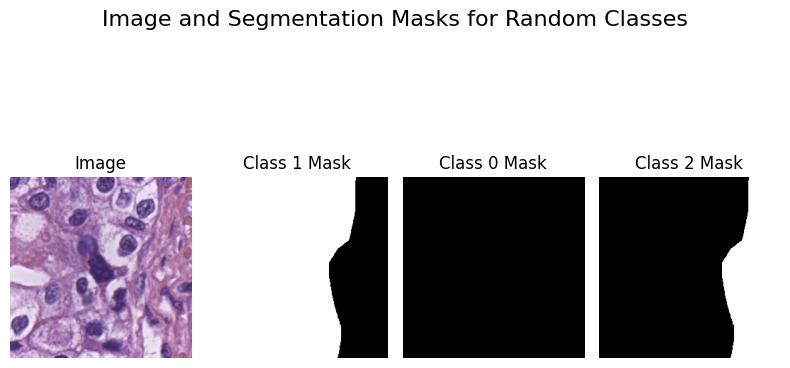

In [17]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 188MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


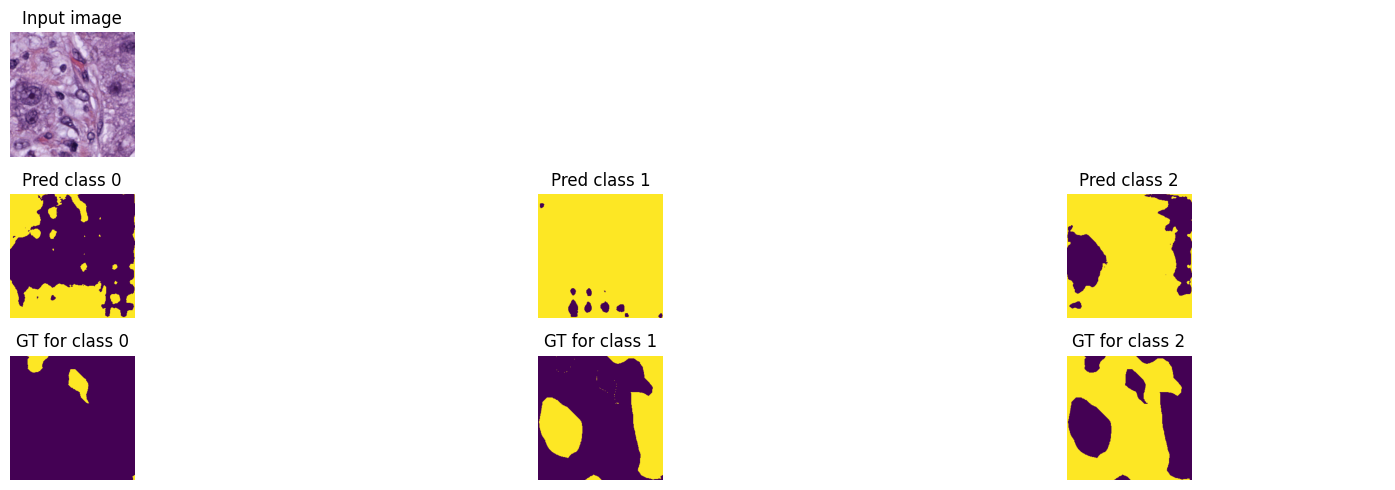

Train loss: 0.62345 | Time: 2m 13s | Val loss: 0.58582
Train_DICE_avg: 0.40204 | Train_Jaccard_avg: 0.33345 | Train_Sensitivity_avg: 0.37156 | Train_Specificity_avg: 0.83272 
Class 0 - Train_DICE: 0.28785 | Train_Jaccard: 0.22960 | Train_Sensitivity: 0.26061 | Train_Specificity: 0.88033 
Class 1 - Train_DICE: 0.48049 | Train_Jaccard: 0.41485 | Train_Sensitivity: 0.46052 | Train_Specificity: 0.78788 
Class 2 - Train_DICE: 0.43780 | Train_Jaccard: 0.35589 | Train_Sensitivity: 0.39356 | Train_Specificity: 0.82993 
Val_DICE_avg: 0.42776 | Val_Jaccard_avg: 0.36333 | Val_Sensitivity_avg: 0.38586 | Val_Specificity_avg: 0.84060 
Class 0 - Val_DICE: 0.30386 | Val_Jaccard: 0.24886 | Val_Sensitivity: 0.25585 | Val_Specificity: 0.93281 
Class 1 - Val_DICE: 0.52273 | Val_Jaccard: 0.46396 | Val_Sensitivity: 0.49561 | Val_Specificity: 0.75308 
Class 2 - Val_DICE: 0.45669 | Val_Jaccard: 0.37718 | Val_Sensitivity: 0.40612 | Val_Specificity: 0.83590 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.59123 | Time: 4m 25s | Val loss: 0.57620
Train_DICE_avg: 0.42025 | Train_Jaccard_avg: 0.35261 | Train_Sensitivity_avg: 0.37999 | Train_Specificity_avg: 0.85473 
Class 0 - Train_DICE: 0.30990 | Train_Jaccard: 0.25059 | Train_Sensitivity: 0.27160 | Train_Specificity: 0.89762 
Class 1 - Train_DICE: 0.49733 | Train_Jaccard: 0.43462 | Train_Sensitivity: 0.46565 | Train_Specificity: 0.81836 
Class 2 - Train_DICE: 0.45351 | Train_Jaccard: 0.37261 | Train_Sensitivity: 0.40272 | Train_Specificity: 0.84819 
Val_DICE_avg: 0.43227 | Val_Jaccard_avg: 0.36784 | Val_Sensitivity_avg: 0.38929 | Val_Specificity_avg: 0.83261 
Class 0 - Val_DICE: 0.30984 | Val_Jaccard: 0.25363 | Val_Sensitivity: 0.26357 | Val_Specificity: 0.91866 
Class 1 - Val_DICE: 0.52571 | Val_Jaccard: 0.46807 | Val_Sensitivity: 0.49324 | Val_Specificity: 0.74863 
Class 2 - Val_DICE: 0.46126 | Val_Jaccard: 0.38182 | Val_Sensitivity: 0.41106 | Val_Specificity: 0.83055 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.58411 | Time: 6m 38s | Val loss: 0.57182
Train_DICE_avg: 0.42382 | Train_Jaccard_avg: 0.35613 | Train_Sensitivity_avg: 0.38485 | Train_Specificity_avg: 0.85546 
Class 0 - Train_DICE: 0.31387 | Train_Jaccard: 0.25398 | Train_Sensitivity: 0.27748 | Train_Specificity: 0.89548 
Class 1 - Train_DICE: 0.50028 | Train_Jaccard: 0.43766 | Train_Sensitivity: 0.46965 | Train_Specificity: 0.82155 
Class 2 - Train_DICE: 0.45731 | Train_Jaccard: 0.37676 | Train_Sensitivity: 0.40741 | Train_Specificity: 0.84936 
Val_DICE_avg: 0.43448 | Val_Jaccard_avg: 0.36998 | Val_Sensitivity_avg: 0.39325 | Val_Specificity_avg: 0.83297 
Class 0 - Val_DICE: 0.31291 | Val_Jaccard: 0.25640 | Val_Sensitivity: 0.26738 | Val_Specificity: 0.91191 
Class 1 - Val_DICE: 0.52720 | Val_Jaccard: 0.47005 | Val_Sensitivity: 0.49194 | Val_Specificity: 0.76427 
Class 2 - Val_DICE: 0.46332 | Val_Jaccard: 0.38350 | Val_Sensitivity: 0.42041 | Val_Specificity: 0.82273 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.57986 | Time: 8m 49s | Val loss: 0.56824
Train_DICE_avg: 0.42629 | Train_Jaccard_avg: 0.35820 | Train_Sensitivity_avg: 0.38895 | Train_Specificity_avg: 0.85370 
Class 0 - Train_DICE: 0.31620 | Train_Jaccard: 0.25581 | Train_Sensitivity: 0.28137 | Train_Specificity: 0.89312 
Class 1 - Train_DICE: 0.50244 | Train_Jaccard: 0.43954 | Train_Sensitivity: 0.47339 | Train_Specificity: 0.81967 
Class 2 - Train_DICE: 0.46024 | Train_Jaccard: 0.37924 | Train_Sensitivity: 0.41207 | Train_Specificity: 0.84830 
Val_DICE_avg: 0.43664 | Val_Jaccard_avg: 0.37213 | Val_Sensitivity_avg: 0.39537 | Val_Specificity_avg: 0.83725 
Class 0 - Val_DICE: 0.31638 | Val_Jaccard: 0.25982 | Val_Sensitivity: 0.27119 | Val_Specificity: 0.91215 
Class 1 - Val_DICE: 0.52697 | Val_Jaccard: 0.46982 | Val_Sensitivity: 0.49217 | Val_Specificity: 0.77816 
Class 2 - Val_DICE: 0.46658 | Val_Jaccard: 0.38674 | Val_Sensitivity: 0.42275 | Val_Specificity: 0.82144 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.57724 | Time: 11m 1s | Val loss: 0.56528
Train_DICE_avg: 0.42778 | Train_Jaccard_avg: 0.35974 | Train_Sensitivity_avg: 0.39141 | Train_Specificity_avg: 0.85453 
Class 0 - Train_DICE: 0.31773 | Train_Jaccard: 0.25742 | Train_Sensitivity: 0.28379 | Train_Specificity: 0.89320 
Class 1 - Train_DICE: 0.50488 | Train_Jaccard: 0.44210 | Train_Sensitivity: 0.47689 | Train_Specificity: 0.82337 
Class 2 - Train_DICE: 0.46075 | Train_Jaccard: 0.37970 | Train_Sensitivity: 0.41356 | Train_Specificity: 0.84703 
Val_DICE_avg: 0.43892 | Val_Jaccard_avg: 0.37411 | Val_Sensitivity_avg: 0.40113 | Val_Specificity_avg: 0.83543 
Class 0 - Val_DICE: 0.31880 | Val_Jaccard: 0.26207 | Val_Sensitivity: 0.27625 | Val_Specificity: 0.91175 
Class 1 - Val_DICE: 0.52985 | Val_Jaccard: 0.47210 | Val_Sensitivity: 0.49740 | Val_Specificity: 0.77928 
Class 2 - Val_DICE: 0.46812 | Val_Jaccard: 0.38815 | Val_Sensitivity: 0.42976 | Val_Specificity: 0.81525 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


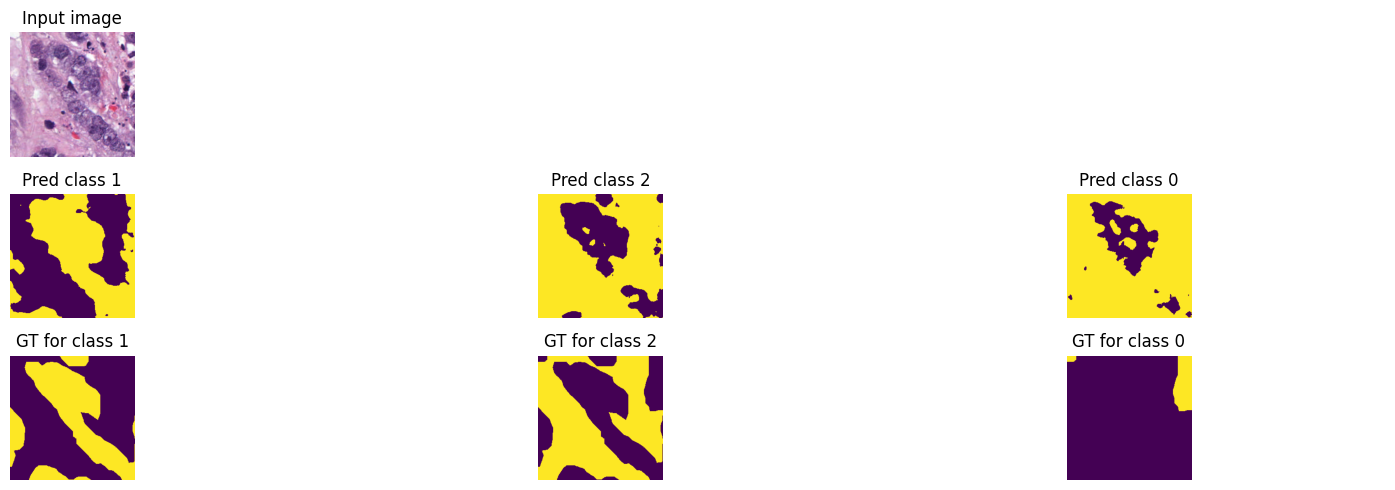

Train loss: 0.57481 | Time: 13m 14s | Val loss: 0.56483
Train_DICE_avg: 0.42949 | Train_Jaccard_avg: 0.36147 | Train_Sensitivity_avg: 0.39452 | Train_Specificity_avg: 0.85241 
Class 0 - Train_DICE: 0.32020 | Train_Jaccard: 0.25959 | Train_Sensitivity: 0.28758 | Train_Specificity: 0.89147 
Class 1 - Train_DICE: 0.50583 | Train_Jaccard: 0.44322 | Train_Sensitivity: 0.47971 | Train_Specificity: 0.82355 
Class 2 - Train_DICE: 0.46244 | Train_Jaccard: 0.38159 | Train_Sensitivity: 0.41627 | Train_Specificity: 0.84222 
Val_DICE_avg: 0.43859 | Val_Jaccard_avg: 0.37376 | Val_Sensitivity_avg: 0.40030 | Val_Specificity_avg: 0.83434 
Class 0 - Val_DICE: 0.31560 | Val_Jaccard: 0.25915 | Val_Sensitivity: 0.27094 | Val_Specificity: 0.91290 
Class 1 - Val_DICE: 0.53115 | Val_Jaccard: 0.47341 | Val_Sensitivity: 0.49838 | Val_Specificity: 0.77167 
Class 2 - Val_DICE: 0.46903 | Val_Jaccard: 0.38872 | Val_Sensitivity: 0.43157 | Val_Specificity: 0.81846 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.57320 | Time: 15m 26s | Val loss: 0.56239
Train_DICE_avg: 0.43055 | Train_Jaccard_avg: 0.36237 | Train_Sensitivity_avg: 0.39688 | Train_Specificity_avg: 0.85231 
Class 0 - Train_DICE: 0.32059 | Train_Jaccard: 0.25972 | Train_Sensitivity: 0.28934 | Train_Specificity: 0.89245 
Class 1 - Train_DICE: 0.50743 | Train_Jaccard: 0.44470 | Train_Sensitivity: 0.48258 | Train_Specificity: 0.81943 
Class 2 - Train_DICE: 0.46363 | Train_Jaccard: 0.38268 | Train_Sensitivity: 0.41873 | Train_Specificity: 0.84505 
Val_DICE_avg: 0.44082 | Val_Jaccard_avg: 0.37583 | Val_Sensitivity_avg: 0.40427 | Val_Specificity_avg: 0.83864 
Class 0 - Val_DICE: 0.31942 | Val_Jaccard: 0.26222 | Val_Sensitivity: 0.27640 | Val_Specificity: 0.91644 
Class 1 - Val_DICE: 0.53331 | Val_Jaccard: 0.47573 | Val_Sensitivity: 0.50231 | Val_Specificity: 0.78165 
Class 2 - Val_DICE: 0.46975 | Val_Jaccard: 0.38955 | Val_Sensitivity: 0.43411 | Val_Specificity: 0.81784 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.57185 | Time: 17m 37s | Val loss: 0.56102
Train_DICE_avg: 0.43147 | Train_Jaccard_avg: 0.36330 | Train_Sensitivity_avg: 0.39852 | Train_Specificity_avg: 0.85268 
Class 0 - Train_DICE: 0.32182 | Train_Jaccard: 0.26095 | Train_Sensitivity: 0.29100 | Train_Specificity: 0.89174 
Class 1 - Train_DICE: 0.50802 | Train_Jaccard: 0.44533 | Train_Sensitivity: 0.48410 | Train_Specificity: 0.82113 
Class 2 - Train_DICE: 0.46457 | Train_Jaccard: 0.38363 | Train_Sensitivity: 0.42046 | Train_Specificity: 0.84517 
Val_DICE_avg: 0.44203 | Val_Jaccard_avg: 0.37717 | Val_Sensitivity_avg: 0.40532 | Val_Specificity_avg: 0.83772 
Class 0 - Val_DICE: 0.32053 | Val_Jaccard: 0.26355 | Val_Sensitivity: 0.27722 | Val_Specificity: 0.91931 
Class 1 - Val_DICE: 0.53496 | Val_Jaccard: 0.47740 | Val_Sensitivity: 0.50364 | Val_Specificity: 0.77600 
Class 2 - Val_DICE: 0.47061 | Val_Jaccard: 0.39055 | Val_Sensitivity: 0.43509 | Val_Specificity: 0.81785 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.56986 | Time: 19m 48s | Val loss: 0.55999
Train_DICE_avg: 0.43321 | Train_Jaccard_avg: 0.36508 | Train_Sensitivity_avg: 0.40084 | Train_Specificity_avg: 0.85353 
Class 0 - Train_DICE: 0.32346 | Train_Jaccard: 0.26249 | Train_Sensitivity: 0.29362 | Train_Specificity: 0.89417 
Class 1 - Train_DICE: 0.50942 | Train_Jaccard: 0.44674 | Train_Sensitivity: 0.48596 | Train_Specificity: 0.81859 
Class 2 - Train_DICE: 0.46675 | Train_Jaccard: 0.38600 | Train_Sensitivity: 0.42293 | Train_Specificity: 0.84784 
Val_DICE_avg: 0.44301 | Val_Jaccard_avg: 0.37814 | Val_Sensitivity_avg: 0.40646 | Val_Specificity_avg: 0.84363 
Class 0 - Val_DICE: 0.32255 | Val_Jaccard: 0.26506 | Val_Sensitivity: 0.28371 | Val_Specificity: 0.91012 
Class 1 - Val_DICE: 0.53534 | Val_Jaccard: 0.47803 | Val_Sensitivity: 0.50198 | Val_Specificity: 0.79811 
Class 2 - Val_DICE: 0.47113 | Val_Jaccard: 0.39133 | Val_Sensitivity: 0.43369 | Val_Specificity: 0.82265 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.56884 | Time: 22m 0s | Val loss: 0.55851
Train_DICE_avg: 0.43401 | Train_Jaccard_avg: 0.36581 | Train_Sensitivity_avg: 0.40216 | Train_Specificity_avg: 0.85467 
Class 0 - Train_DICE: 0.32408 | Train_Jaccard: 0.26306 | Train_Sensitivity: 0.29464 | Train_Specificity: 0.89293 
Class 1 - Train_DICE: 0.51036 | Train_Jaccard: 0.44764 | Train_Sensitivity: 0.48780 | Train_Specificity: 0.82270 
Class 2 - Train_DICE: 0.46759 | Train_Jaccard: 0.38673 | Train_Sensitivity: 0.42404 | Train_Specificity: 0.84840 
Val_DICE_avg: 0.44449 | Val_Jaccard_avg: 0.37943 | Val_Sensitivity_avg: 0.41002 | Val_Specificity_avg: 0.83399 
Class 0 - Val_DICE: 0.32375 | Val_Jaccard: 0.26626 | Val_Sensitivity: 0.28468 | Val_Specificity: 0.90823 
Class 1 - Val_DICE: 0.53828 | Val_Jaccard: 0.48051 | Val_Sensitivity: 0.50737 | Val_Specificity: 0.77533 
Class 2 - Val_DICE: 0.47145 | Val_Jaccard: 0.39152 | Val_Sensitivity: 0.43802 | Val_Specificity: 0.81839 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


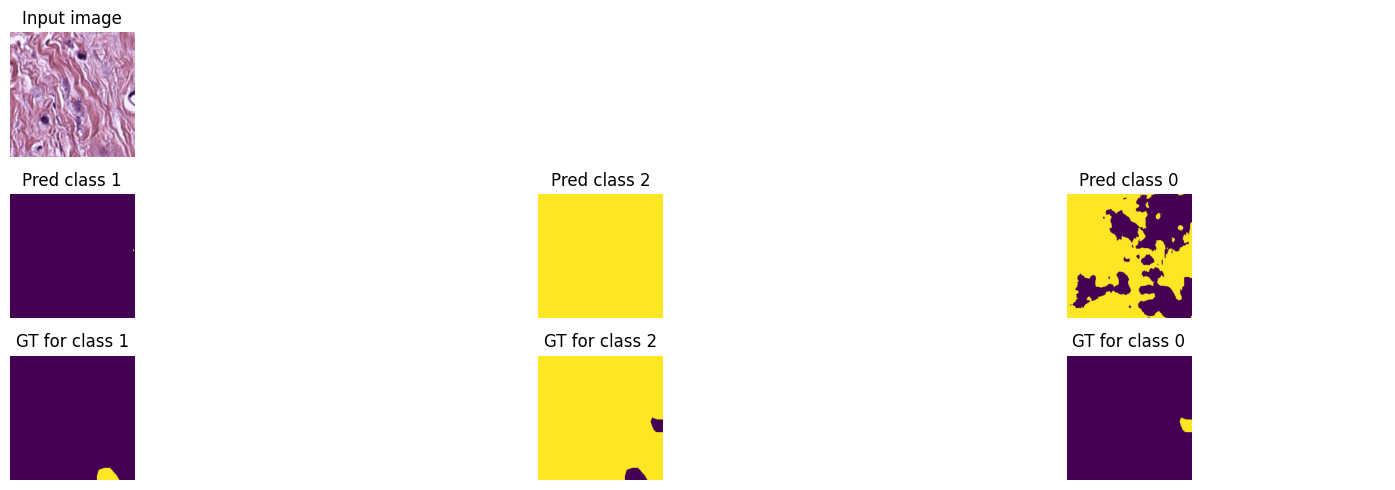

Train loss: 0.56776 | Time: 24m 15s | Val loss: 0.55741
Train_DICE_avg: 0.43483 | Train_Jaccard_avg: 0.36676 | Train_Sensitivity_avg: 0.40346 | Train_Specificity_avg: 0.85499 
Class 0 - Train_DICE: 0.32431 | Train_Jaccard: 0.26360 | Train_Sensitivity: 0.29487 | Train_Specificity: 0.89531 
Class 1 - Train_DICE: 0.51222 | Train_Jaccard: 0.44939 | Train_Sensitivity: 0.49097 | Train_Specificity: 0.82082 
Class 2 - Train_DICE: 0.46798 | Train_Jaccard: 0.38729 | Train_Sensitivity: 0.42454 | Train_Specificity: 0.84885 
Val_DICE_avg: 0.44612 | Val_Jaccard_avg: 0.38126 | Val_Sensitivity_avg: 0.41031 | Val_Specificity_avg: 0.83679 
Class 0 - Val_DICE: 0.32332 | Val_Jaccard: 0.26587 | Val_Sensitivity: 0.28470 | Val_Specificity: 0.90772 
Class 1 - Val_DICE: 0.54236 | Val_Jaccard: 0.48489 | Val_Sensitivity: 0.51388 | Val_Specificity: 0.77393 
Class 2 - Val_DICE: 0.47270 | Val_Jaccard: 0.39303 | Val_Sensitivity: 0.43234 | Val_Specificity: 0.82872 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.56642 | Time: 26m 30s | Val loss: 0.55647
Train_DICE_avg: 0.43586 | Train_Jaccard_avg: 0.36782 | Train_Sensitivity_avg: 0.40514 | Train_Specificity_avg: 0.85329 
Class 0 - Train_DICE: 0.32606 | Train_Jaccard: 0.26513 | Train_Sensitivity: 0.29771 | Train_Specificity: 0.89358 
Class 1 - Train_DICE: 0.51203 | Train_Jaccard: 0.44945 | Train_Sensitivity: 0.49088 | Train_Specificity: 0.81777 
Class 2 - Train_DICE: 0.46948 | Train_Jaccard: 0.38887 | Train_Sensitivity: 0.42683 | Train_Specificity: 0.84853 
Val_DICE_avg: 0.44564 | Val_Jaccard_avg: 0.38090 | Val_Sensitivity_avg: 0.41079 | Val_Specificity_avg: 0.84309 
Class 0 - Val_DICE: 0.32519 | Val_Jaccard: 0.26748 | Val_Sensitivity: 0.28852 | Val_Specificity: 0.90789 
Class 1 - Val_DICE: 0.53765 | Val_Jaccard: 0.48091 | Val_Sensitivity: 0.50412 | Val_Specificity: 0.79797 
Class 2 - Val_DICE: 0.47408 | Val_Jaccard: 0.39432 | Val_Sensitivity: 0.43974 | Val_Specificity: 0.82340 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.56478 | Time: 28m 44s | Val loss: 0.55591
Train_DICE_avg: 0.43755 | Train_Jaccard_avg: 0.36938 | Train_Sensitivity_avg: 0.40767 | Train_Specificity_avg: 0.85458 
Class 0 - Train_DICE: 0.32778 | Train_Jaccard: 0.26656 | Train_Sensitivity: 0.30053 | Train_Specificity: 0.89413 
Class 1 - Train_DICE: 0.51421 | Train_Jaccard: 0.45138 | Train_Sensitivity: 0.49382 | Train_Specificity: 0.82129 
Class 2 - Train_DICE: 0.47064 | Train_Jaccard: 0.39018 | Train_Sensitivity: 0.42865 | Train_Specificity: 0.84833 
Val_DICE_avg: 0.44635 | Val_Jaccard_avg: 0.38167 | Val_Sensitivity_avg: 0.41352 | Val_Specificity_avg: 0.84343 
Class 0 - Val_DICE: 0.32619 | Val_Jaccard: 0.26854 | Val_Sensitivity: 0.28871 | Val_Specificity: 0.90958 
Class 1 - Val_DICE: 0.53938 | Val_Jaccard: 0.48281 | Val_Sensitivity: 0.50410 | Val_Specificity: 0.80114 
Class 2 - Val_DICE: 0.47347 | Val_Jaccard: 0.39367 | Val_Sensitivity: 0.44776 | Val_Specificity: 0.81958 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.56404 | Time: 30m 59s | Val loss: 0.55518
Train_DICE_avg: 0.43809 | Train_Jaccard_avg: 0.37001 | Train_Sensitivity_avg: 0.40896 | Train_Specificity_avg: 0.85507 
Class 0 - Train_DICE: 0.32825 | Train_Jaccard: 0.26691 | Train_Sensitivity: 0.30116 | Train_Specificity: 0.89318 
Class 1 - Train_DICE: 0.51514 | Train_Jaccard: 0.45260 | Train_Sensitivity: 0.49645 | Train_Specificity: 0.82331 
Class 2 - Train_DICE: 0.47087 | Train_Jaccard: 0.39053 | Train_Sensitivity: 0.42927 | Train_Specificity: 0.84873 
Val_DICE_avg: 0.44775 | Val_Jaccard_avg: 0.38289 | Val_Sensitivity_avg: 0.41730 | Val_Specificity_avg: 0.83291 
Class 0 - Val_DICE: 0.32491 | Val_Jaccard: 0.26761 | Val_Sensitivity: 0.28541 | Val_Specificity: 0.91278 
Class 1 - Val_DICE: 0.54388 | Val_Jaccard: 0.48634 | Val_Sensitivity: 0.51742 | Val_Specificity: 0.76964 
Class 2 - Val_DICE: 0.47446 | Val_Jaccard: 0.39472 | Val_Sensitivity: 0.44908 | Val_Specificity: 0.81632 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.56281 | Time: 33m 14s | Val loss: 0.55531
Train_DICE_avg: 0.43931 | Train_Jaccard_avg: 0.37131 | Train_Sensitivity_avg: 0.41072 | Train_Specificity_avg: 0.85435 
Class 0 - Train_DICE: 0.32891 | Train_Jaccard: 0.26783 | Train_Sensitivity: 0.30283 | Train_Specificity: 0.89170 
Class 1 - Train_DICE: 0.51670 | Train_Jaccard: 0.45427 | Train_Sensitivity: 0.49824 | Train_Specificity: 0.82359 
Class 2 - Train_DICE: 0.47233 | Train_Jaccard: 0.39181 | Train_Sensitivity: 0.43109 | Train_Specificity: 0.84777 
Val_DICE_avg: 0.44863 | Val_Jaccard_avg: 0.38372 | Val_Sensitivity_avg: 0.41821 | Val_Specificity_avg: 0.83904 
Class 0 - Val_DICE: 0.32542 | Val_Jaccard: 0.26761 | Val_Sensitivity: 0.28849 | Val_Specificity: 0.90930 
Class 1 - Val_DICE: 0.54483 | Val_Jaccard: 0.48784 | Val_Sensitivity: 0.51247 | Val_Specificity: 0.79144 
Class 2 - Val_DICE: 0.47564 | Val_Jaccard: 0.39572 | Val_Sensitivity: 0.45369 | Val_Specificity: 0.81638 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


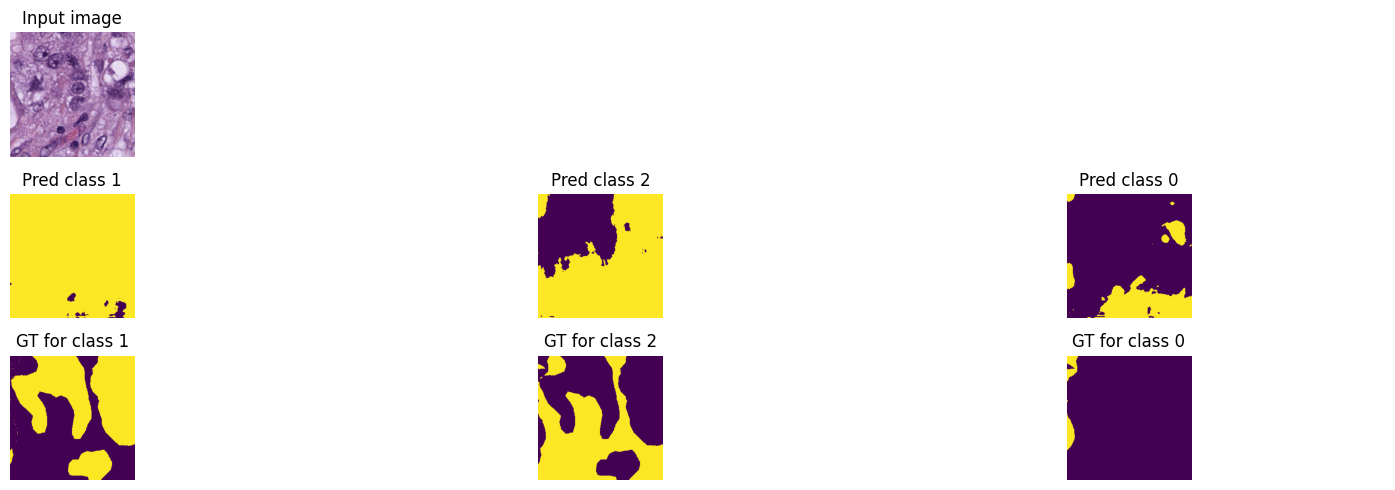

Train loss: 0.56201 | Time: 35m 30s | Val loss: 0.55336
Train_DICE_avg: 0.43990 | Train_Jaccard_avg: 0.37186 | Train_Sensitivity_avg: 0.41159 | Train_Specificity_avg: 0.85495 
Class 0 - Train_DICE: 0.32949 | Train_Jaccard: 0.26816 | Train_Sensitivity: 0.30321 | Train_Specificity: 0.89332 
Class 1 - Train_DICE: 0.51727 | Train_Jaccard: 0.45487 | Train_Sensitivity: 0.49969 | Train_Specificity: 0.81898 
Class 2 - Train_DICE: 0.47294 | Train_Jaccard: 0.39255 | Train_Sensitivity: 0.43187 | Train_Specificity: 0.85256 
Val_DICE_avg: 0.44958 | Val_Jaccard_avg: 0.38495 | Val_Sensitivity_avg: 0.41793 | Val_Specificity_avg: 0.83706 
Class 0 - Val_DICE: 0.32776 | Val_Jaccard: 0.26977 | Val_Sensitivity: 0.28935 | Val_Specificity: 0.90787 
Class 1 - Val_DICE: 0.54758 | Val_Jaccard: 0.49068 | Val_Sensitivity: 0.52165 | Val_Specificity: 0.78134 
Class 2 - Val_DICE: 0.47339 | Val_Jaccard: 0.39439 | Val_Sensitivity: 0.44280 | Val_Specificity: 0.82197 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.56063 | Time: 37m 46s | Val loss: 0.55257
Train_DICE_avg: 0.44144 | Train_Jaccard_avg: 0.37348 | Train_Sensitivity_avg: 0.41332 | Train_Specificity_avg: 0.85548 
Class 0 - Train_DICE: 0.33143 | Train_Jaccard: 0.26998 | Train_Sensitivity: 0.30505 | Train_Specificity: 0.89244 
Class 1 - Train_DICE: 0.51882 | Train_Jaccard: 0.45669 | Train_Sensitivity: 0.50136 | Train_Specificity: 0.82428 
Class 2 - Train_DICE: 0.47406 | Train_Jaccard: 0.39377 | Train_Sensitivity: 0.43356 | Train_Specificity: 0.84972 
Val_DICE_avg: 0.45077 | Val_Jaccard_avg: 0.38634 | Val_Sensitivity_avg: 0.42289 | Val_Specificity_avg: 0.84454 
Class 0 - Val_DICE: 0.33031 | Val_Jaccard: 0.27255 | Val_Sensitivity: 0.29478 | Val_Specificity: 0.91045 
Class 1 - Val_DICE: 0.54663 | Val_Jaccard: 0.49037 | Val_Sensitivity: 0.51815 | Val_Specificity: 0.80229 
Class 2 - Val_DICE: 0.47537 | Val_Jaccard: 0.39611 | Val_Sensitivity: 0.45575 | Val_Specificity: 0.82087 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.56003 | Time: 40m 1s | Val loss: 0.55121
Train_DICE_avg: 0.44231 | Train_Jaccard_avg: 0.37444 | Train_Sensitivity_avg: 0.41499 | Train_Specificity_avg: 0.85663 
Class 0 - Train_DICE: 0.33186 | Train_Jaccard: 0.27044 | Train_Sensitivity: 0.30694 | Train_Specificity: 0.89373 
Class 1 - Train_DICE: 0.52032 | Train_Jaccard: 0.45819 | Train_Sensitivity: 0.50390 | Train_Specificity: 0.82131 
Class 2 - Train_DICE: 0.47475 | Train_Jaccard: 0.39469 | Train_Sensitivity: 0.43412 | Train_Specificity: 0.85484 
Val_DICE_avg: 0.45330 | Val_Jaccard_avg: 0.38902 | Val_Sensitivity_avg: 0.42438 | Val_Specificity_avg: 0.84351 
Class 0 - Val_DICE: 0.32901 | Val_Jaccard: 0.27136 | Val_Sensitivity: 0.29186 | Val_Specificity: 0.91194 
Class 1 - Val_DICE: 0.55374 | Val_Jaccard: 0.49754 | Val_Sensitivity: 0.52851 | Val_Specificity: 0.79040 
Class 2 - Val_DICE: 0.47715 | Val_Jaccard: 0.39816 | Val_Sensitivity: 0.45277 | Val_Specificity: 0.82820 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.55905 | Time: 42m 17s | Val loss: 0.54909
Train_DICE_avg: 0.44370 | Train_Jaccard_avg: 0.37572 | Train_Sensitivity_avg: 0.41651 | Train_Specificity_avg: 0.85787 
Class 0 - Train_DICE: 0.33277 | Train_Jaccard: 0.27124 | Train_Sensitivity: 0.30746 | Train_Specificity: 0.89259 
Class 1 - Train_DICE: 0.52315 | Train_Jaccard: 0.46102 | Train_Sensitivity: 0.50787 | Train_Specificity: 0.82641 
Class 2 - Train_DICE: 0.47519 | Train_Jaccard: 0.39489 | Train_Sensitivity: 0.43420 | Train_Specificity: 0.85462 
Val_DICE_avg: 0.45567 | Val_Jaccard_avg: 0.39112 | Val_Sensitivity_avg: 0.43050 | Val_Specificity_avg: 0.84572 
Class 0 - Val_DICE: 0.32935 | Val_Jaccard: 0.27161 | Val_Sensitivity: 0.29133 | Val_Specificity: 0.91519 
Class 1 - Val_DICE: 0.56419 | Val_Jaccard: 0.50763 | Val_Sensitivity: 0.54437 | Val_Specificity: 0.79628 
Class 2 - Val_DICE: 0.47346 | Val_Jaccard: 0.39413 | Val_Sensitivity: 0.45580 | Val_Specificity: 0.82569 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.55751 | Time: 44m 32s | Val loss: 0.52850
Train_DICE_avg: 0.44652 | Train_Jaccard_avg: 0.37884 | Train_Sensitivity_avg: 0.42216 | Train_Specificity_avg: 0.85518 
Class 0 - Train_DICE: 0.33374 | Train_Jaccard: 0.27239 | Train_Sensitivity: 0.30857 | Train_Specificity: 0.89491 
Class 1 - Train_DICE: 0.53110 | Train_Jaccard: 0.46952 | Train_Sensitivity: 0.52396 | Train_Specificity: 0.81608 
Class 2 - Train_DICE: 0.47470 | Train_Jaccard: 0.39461 | Train_Sensitivity: 0.43394 | Train_Specificity: 0.85456 
Val_DICE_avg: 0.47794 | Val_Jaccard_avg: 0.41394 | Val_Sensitivity_avg: 0.46758 | Val_Specificity_avg: 0.84474 
Class 0 - Val_DICE: 0.32850 | Val_Jaccard: 0.27109 | Val_Sensitivity: 0.28998 | Val_Specificity: 0.92285 
Class 1 - Val_DICE: 0.62965 | Val_Jaccard: 0.57436 | Val_Sensitivity: 0.65407 | Val_Specificity: 0.77420 
Class 2 - Val_DICE: 0.47565 | Val_Jaccard: 0.39638 | Val_Sensitivity: 0.45868 | Val_Specificity: 0.83717 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


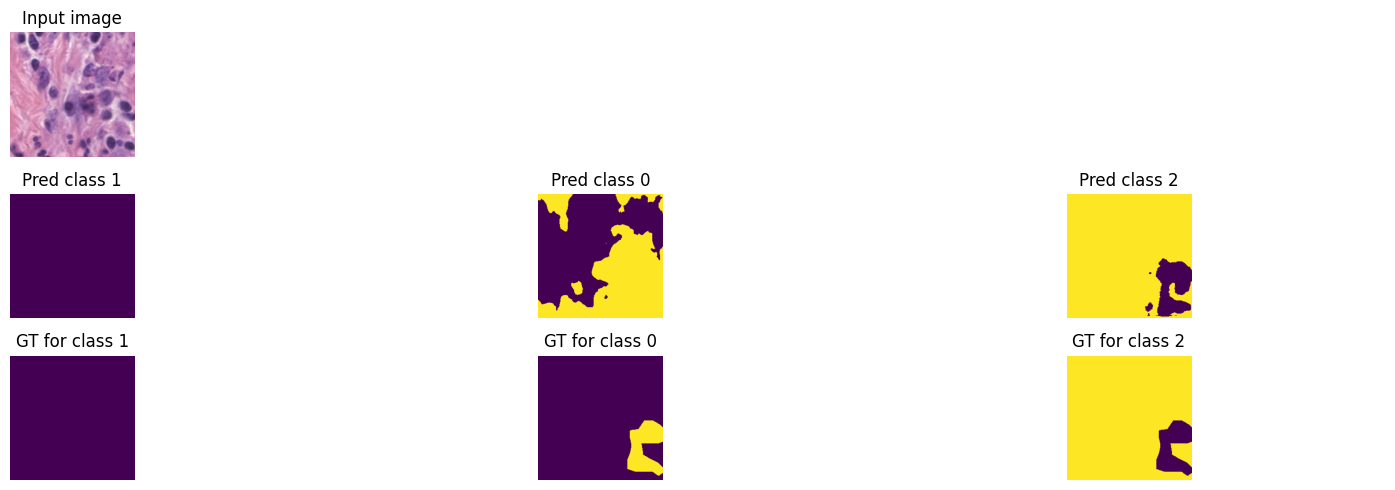

Train loss: 0.54697 | Time: 46m 48s | Val loss: 0.51235
Train_DICE_avg: 0.45948 | Train_Jaccard_avg: 0.39341 | Train_Sensitivity_avg: 0.45181 | Train_Specificity_avg: 0.86315 
Class 0 - Train_DICE: 0.33269 | Train_Jaccard: 0.27148 | Train_Sensitivity: 0.30722 | Train_Specificity: 0.89463 
Class 1 - Train_DICE: 0.57118 | Train_Jaccard: 0.51415 | Train_Sensitivity: 0.61551 | Train_Specificity: 0.82950 
Class 2 - Train_DICE: 0.47458 | Train_Jaccard: 0.39462 | Train_Sensitivity: 0.43268 | Train_Specificity: 0.86532 
Val_DICE_avg: 0.49295 | Val_Jaccard_avg: 0.43103 | Val_Sensitivity_avg: 0.49790 | Val_Specificity_avg: 0.85592 
Class 0 - Val_DICE: 0.32987 | Val_Jaccard: 0.27200 | Val_Sensitivity: 0.29366 | Val_Specificity: 0.92622 
Class 1 - Val_DICE: 0.67205 | Val_Jaccard: 0.62242 | Val_Sensitivity: 0.75798 | Val_Specificity: 0.79311 
Class 2 - Val_DICE: 0.47693 | Val_Jaccard: 0.39865 | Val_Sensitivity: 0.44205 | Val_Specificity: 0.84844 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.53064 | Time: 49m 3s | Val loss: 0.50131
Train_DICE_avg: 0.47540 | Train_Jaccard_avg: 0.41043 | Train_Sensitivity_avg: 0.48357 | Train_Specificity_avg: 0.86030 
Class 0 - Train_DICE: 0.33238 | Train_Jaccard: 0.27057 | Train_Sensitivity: 0.30721 | Train_Specificity: 0.89266 
Class 1 - Train_DICE: 0.61949 | Train_Jaccard: 0.56646 | Train_Sensitivity: 0.71067 | Train_Specificity: 0.82546 
Class 2 - Train_DICE: 0.47435 | Train_Jaccard: 0.39424 | Train_Sensitivity: 0.43284 | Train_Specificity: 0.86279 
Val_DICE_avg: 0.50053 | Val_Jaccard_avg: 0.43978 | Val_Sensitivity_avg: 0.52488 | Val_Specificity_avg: 0.83830 
Class 0 - Val_DICE: 0.32666 | Val_Jaccard: 0.26929 | Val_Sensitivity: 0.28491 | Val_Specificity: 0.93127 
Class 1 - Val_DICE: 0.69976 | Val_Jaccard: 0.65299 | Val_Sensitivity: 0.83364 | Val_Specificity: 0.75854 
Class 2 - Val_DICE: 0.47517 | Val_Jaccard: 0.39707 | Val_Sensitivity: 0.45608 | Val_Specificity: 0.82509 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.52199 | Time: 51m 18s | Val loss: 0.49591
Train_DICE_avg: 0.48245 | Train_Jaccard_avg: 0.41876 | Train_Sensitivity_avg: 0.50299 | Train_Specificity_avg: 0.85928 
Class 0 - Train_DICE: 0.33557 | Train_Jaccard: 0.27395 | Train_Sensitivity: 0.31097 | Train_Specificity: 0.89570 
Class 1 - Train_DICE: 0.63752 | Train_Jaccard: 0.58812 | Train_Sensitivity: 0.76436 | Train_Specificity: 0.82355 
Class 2 - Train_DICE: 0.47424 | Train_Jaccard: 0.39422 | Train_Sensitivity: 0.43363 | Train_Specificity: 0.85858 
Val_DICE_avg: 0.50811 | Val_Jaccard_avg: 0.44837 | Val_Sensitivity_avg: 0.53484 | Val_Specificity_avg: 0.84117 
Class 0 - Val_DICE: 0.33185 | Val_Jaccard: 0.27446 | Val_Sensitivity: 0.29274 | Val_Specificity: 0.92807 
Class 1 - Val_DICE: 0.71234 | Val_Jaccard: 0.66904 | Val_Sensitivity: 0.85614 | Val_Specificity: 0.76922 
Class 2 - Val_DICE: 0.48014 | Val_Jaccard: 0.40160 | Val_Sensitivity: 0.45564 | Val_Specificity: 0.82621 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.51595 | Time: 53m 33s | Val loss: 0.49319
Train_DICE_avg: 0.48736 | Train_Jaccard_avg: 0.42360 | Train_Sensitivity_avg: 0.50799 | Train_Specificity_avg: 0.85652 
Class 0 - Train_DICE: 0.33599 | Train_Jaccard: 0.27444 | Train_Sensitivity: 0.31217 | Train_Specificity: 0.89528 
Class 1 - Train_DICE: 0.64987 | Train_Jaccard: 0.60002 | Train_Sensitivity: 0.77618 | Train_Specificity: 0.81515 
Class 2 - Train_DICE: 0.47622 | Train_Jaccard: 0.39636 | Train_Sensitivity: 0.43562 | Train_Specificity: 0.85914 
Val_DICE_avg: 0.50906 | Val_Jaccard_avg: 0.44867 | Val_Sensitivity_avg: 0.53413 | Val_Specificity_avg: 0.83258 
Class 0 - Val_DICE: 0.33178 | Val_Jaccard: 0.27419 | Val_Sensitivity: 0.29324 | Val_Specificity: 0.92074 
Class 1 - Val_DICE: 0.71636 | Val_Jaccard: 0.67123 | Val_Sensitivity: 0.85582 | Val_Specificity: 0.74698 
Class 2 - Val_DICE: 0.47905 | Val_Jaccard: 0.40059 | Val_Sensitivity: 0.45334 | Val_Specificity: 0.83001 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.51323 | Time: 55m 48s | Val loss: 0.49008
Train_DICE_avg: 0.49012 | Train_Jaccard_avg: 0.42653 | Train_Sensitivity_avg: 0.51247 | Train_Specificity_avg: 0.85414 
Class 0 - Train_DICE: 0.33619 | Train_Jaccard: 0.27473 | Train_Sensitivity: 0.31259 | Train_Specificity: 0.89517 
Class 1 - Train_DICE: 0.65762 | Train_Jaccard: 0.60813 | Train_Sensitivity: 0.78828 | Train_Specificity: 0.80547 
Class 2 - Train_DICE: 0.47654 | Train_Jaccard: 0.39674 | Train_Sensitivity: 0.43655 | Train_Specificity: 0.86179 
Val_DICE_avg: 0.51291 | Val_Jaccard_avg: 0.45291 | Val_Sensitivity_avg: 0.53709 | Val_Specificity_avg: 0.84187 
Class 0 - Val_DICE: 0.33478 | Val_Jaccard: 0.27695 | Val_Sensitivity: 0.29977 | Val_Specificity: 0.92608 
Class 1 - Val_DICE: 0.72243 | Val_Jaccard: 0.67802 | Val_Sensitivity: 0.85791 | Val_Specificity: 0.76736 
Class 2 - Val_DICE: 0.48152 | Val_Jaccard: 0.40377 | Val_Sensitivity: 0.45360 | Val_Specificity: 0.83218 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


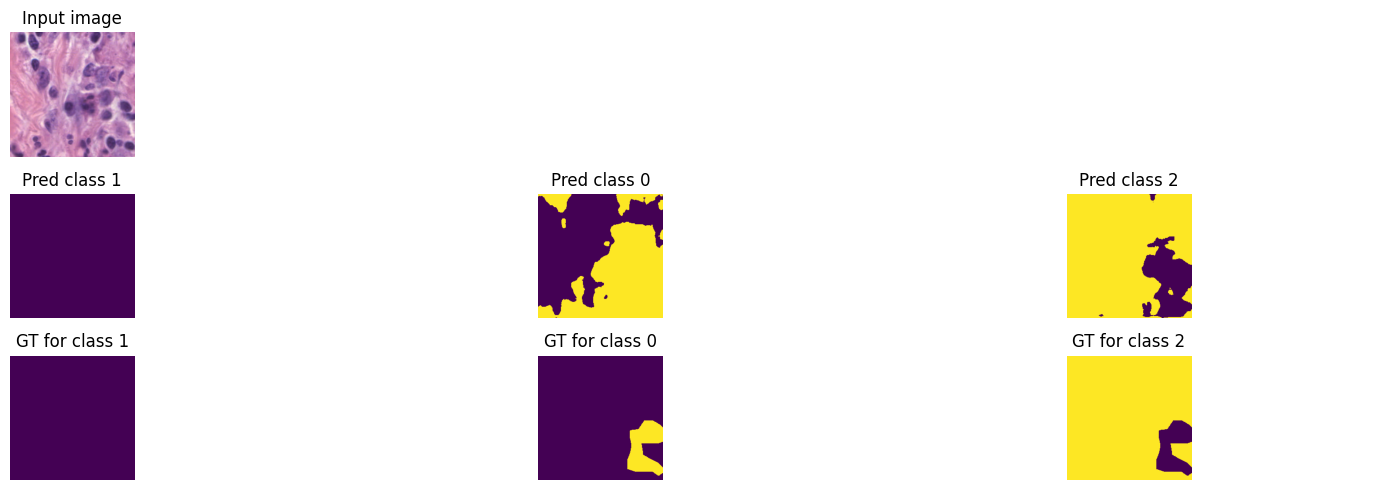

Train loss: 0.51295 | Time: 58m 4s | Val loss: 0.49255
Train_DICE_avg: 0.49009 | Train_Jaccard_avg: 0.42704 | Train_Sensitivity_avg: 0.51801 | Train_Specificity_avg: 0.85269 
Class 0 - Train_DICE: 0.33706 | Train_Jaccard: 0.27538 | Train_Sensitivity: 0.31432 | Train_Specificity: 0.89173 
Class 1 - Train_DICE: 0.65522 | Train_Jaccard: 0.60745 | Train_Sensitivity: 0.80120 | Train_Specificity: 0.80683 
Class 2 - Train_DICE: 0.47799 | Train_Jaccard: 0.39828 | Train_Sensitivity: 0.43853 | Train_Specificity: 0.85952 
Val_DICE_avg: 0.50984 | Val_Jaccard_avg: 0.45075 | Val_Sensitivity_avg: 0.54783 | Val_Specificity_avg: 0.83308 
Class 0 - Val_DICE: 0.32961 | Val_Jaccard: 0.27283 | Val_Sensitivity: 0.28698 | Val_Specificity: 0.93549 
Class 1 - Val_DICE: 0.72005 | Val_Jaccard: 0.67878 | Val_Sensitivity: 0.88832 | Val_Specificity: 0.75222 
Class 2 - Val_DICE: 0.47985 | Val_Jaccard: 0.40064 | Val_Sensitivity: 0.46819 | Val_Specificity: 0.81154 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.50841 | Time: 60m 19s | Val loss: 0.49143
Train_DICE_avg: 0.49425 | Train_Jaccard_avg: 0.43112 | Train_Sensitivity_avg: 0.51983 | Train_Specificity_avg: 0.85265 
Class 0 - Train_DICE: 0.33896 | Train_Jaccard: 0.27720 | Train_Sensitivity: 0.31667 | Train_Specificity: 0.89371 
Class 1 - Train_DICE: 0.66461 | Train_Jaccard: 0.61673 | Train_Sensitivity: 0.80275 | Train_Specificity: 0.80480 
Class 2 - Train_DICE: 0.47919 | Train_Jaccard: 0.39945 | Train_Sensitivity: 0.44005 | Train_Specificity: 0.85944 
Val_DICE_avg: 0.51138 | Val_Jaccard_avg: 0.45014 | Val_Sensitivity_avg: 0.52940 | Val_Specificity_avg: 0.83278 
Class 0 - Val_DICE: 0.33460 | Val_Jaccard: 0.27688 | Val_Sensitivity: 0.29618 | Val_Specificity: 0.92427 
Class 1 - Val_DICE: 0.71981 | Val_Jaccard: 0.67275 | Val_Sensitivity: 0.82695 | Val_Specificity: 0.75740 
Class 2 - Val_DICE: 0.47974 | Val_Jaccard: 0.40079 | Val_Sensitivity: 0.46506 | Val_Specificity: 0.81666 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.50720 | Time: 62m 34s | Val loss: 0.48939
Train_DICE_avg: 0.49580 | Train_Jaccard_avg: 0.43271 | Train_Sensitivity_avg: 0.52142 | Train_Specificity_avg: 0.85344 
Class 0 - Train_DICE: 0.33948 | Train_Jaccard: 0.27798 | Train_Sensitivity: 0.31760 | Train_Specificity: 0.89770 
Class 1 - Train_DICE: 0.66803 | Train_Jaccard: 0.61977 | Train_Sensitivity: 0.80654 | Train_Specificity: 0.80204 
Class 2 - Train_DICE: 0.47988 | Train_Jaccard: 0.40039 | Train_Sensitivity: 0.44012 | Train_Specificity: 0.86058 
Val_DICE_avg: 0.51329 | Val_Jaccard_avg: 0.45305 | Val_Sensitivity_avg: 0.53496 | Val_Specificity_avg: 0.84906 
Class 0 - Val_DICE: 0.33505 | Val_Jaccard: 0.27749 | Val_Sensitivity: 0.29853 | Val_Specificity: 0.92571 
Class 1 - Val_DICE: 0.72195 | Val_Jaccard: 0.67755 | Val_Sensitivity: 0.83683 | Val_Specificity: 0.80339 
Class 2 - Val_DICE: 0.48286 | Val_Jaccard: 0.40410 | Val_Sensitivity: 0.46952 | Val_Specificity: 0.81809 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.50356 | Time: 64m 49s | Val loss: 0.48707
Train_DICE_avg: 0.49902 | Train_Jaccard_avg: 0.43557 | Train_Sensitivity_avg: 0.52458 | Train_Specificity_avg: 0.85314 
Class 0 - Train_DICE: 0.34226 | Train_Jaccard: 0.28032 | Train_Sensitivity: 0.32081 | Train_Specificity: 0.89669 
Class 1 - Train_DICE: 0.67404 | Train_Jaccard: 0.62531 | Train_Sensitivity: 0.81053 | Train_Specificity: 0.80358 
Class 2 - Train_DICE: 0.48078 | Train_Jaccard: 0.40109 | Train_Sensitivity: 0.44239 | Train_Specificity: 0.85915 
Val_DICE_avg: 0.51625 | Val_Jaccard_avg: 0.45530 | Val_Sensitivity_avg: 0.53694 | Val_Specificity_avg: 0.83852 
Class 0 - Val_DICE: 0.34006 | Val_Jaccard: 0.28184 | Val_Sensitivity: 0.30716 | Val_Specificity: 0.91895 
Class 1 - Val_DICE: 0.72439 | Val_Jaccard: 0.67829 | Val_Sensitivity: 0.83316 | Val_Specificity: 0.77738 
Class 2 - Val_DICE: 0.48431 | Val_Jaccard: 0.40578 | Val_Sensitivity: 0.47051 | Val_Specificity: 0.81924 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.50141 | Time: 67m 4s | Val loss: 0.48851
Train_DICE_avg: 0.50108 | Train_Jaccard_avg: 0.43788 | Train_Sensitivity_avg: 0.52307 | Train_Specificity_avg: 0.85459 
Class 0 - Train_DICE: 0.34264 | Train_Jaccard: 0.28114 | Train_Sensitivity: 0.32155 | Train_Specificity: 0.89778 
Class 1 - Train_DICE: 0.67903 | Train_Jaccard: 0.63024 | Train_Sensitivity: 0.80580 | Train_Specificity: 0.80445 
Class 2 - Train_DICE: 0.48156 | Train_Jaccard: 0.40226 | Train_Sensitivity: 0.44187 | Train_Specificity: 0.86153 
Val_DICE_avg: 0.51438 | Val_Jaccard_avg: 0.45411 | Val_Sensitivity_avg: 0.53624 | Val_Specificity_avg: 0.84288 
Class 0 - Val_DICE: 0.33770 | Val_Jaccard: 0.27937 | Val_Sensitivity: 0.30358 | Val_Specificity: 0.91994 
Class 1 - Val_DICE: 0.72091 | Val_Jaccard: 0.67638 | Val_Sensitivity: 0.83791 | Val_Specificity: 0.77761 
Class 2 - Val_DICE: 0.48452 | Val_Jaccard: 0.40659 | Val_Sensitivity: 0.46724 | Val_Specificity: 0.83110 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


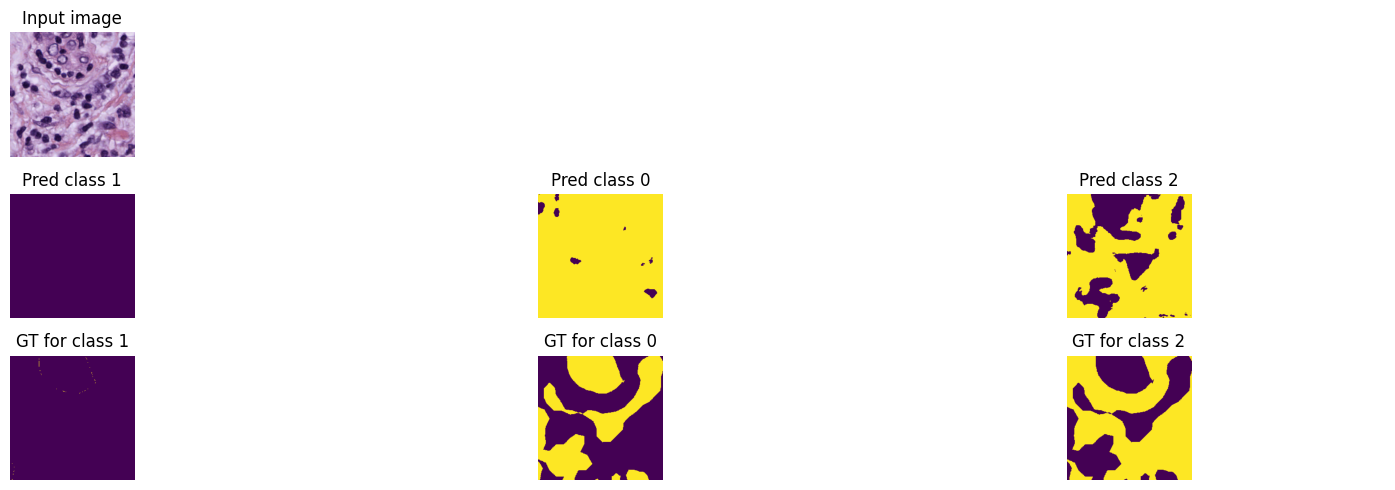

Train loss: 0.50150 | Time: 69m 20s | Val loss: 0.48188
Train_DICE_avg: 0.50086 | Train_Jaccard_avg: 0.43787 | Train_Sensitivity_avg: 0.52484 | Train_Specificity_avg: 0.85692 
Class 0 - Train_DICE: 0.34257 | Train_Jaccard: 0.28122 | Train_Sensitivity: 0.32223 | Train_Specificity: 0.89743 
Class 1 - Train_DICE: 0.67747 | Train_Jaccard: 0.62915 | Train_Sensitivity: 0.80870 | Train_Specificity: 0.81188 
Class 2 - Train_DICE: 0.48254 | Train_Jaccard: 0.40323 | Train_Sensitivity: 0.44358 | Train_Specificity: 0.86146 
Val_DICE_avg: 0.52491 | Val_Jaccard_avg: 0.46514 | Val_Sensitivity_avg: 0.54933 | Val_Specificity_avg: 0.85256 
Class 0 - Val_DICE: 0.34973 | Val_Jaccard: 0.29215 | Val_Sensitivity: 0.31426 | Val_Specificity: 0.92893 
Class 1 - Val_DICE: 0.73857 | Val_Jaccard: 0.69404 | Val_Sensitivity: 0.85733 | Val_Specificity: 0.80097 
Class 2 - Val_DICE: 0.48644 | Val_Jaccard: 0.40921 | Val_Sensitivity: 0.47641 | Val_Specificity: 0.82778 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.49488 | Time: 71m 35s | Val loss: 0.43273
Train_DICE_avg: 0.51112 | Train_Jaccard_avg: 0.44920 | Train_Sensitivity_avg: 0.54185 | Train_Specificity_avg: 0.85905 
Class 0 - Train_DICE: 0.36563 | Train_Jaccard: 0.30652 | Train_Sensitivity: 0.35963 | Train_Specificity: 0.89987 
Class 1 - Train_DICE: 0.68354 | Train_Jaccard: 0.63563 | Train_Sensitivity: 0.82183 | Train_Specificity: 0.81062 
Class 2 - Train_DICE: 0.48420 | Train_Jaccard: 0.40544 | Train_Sensitivity: 0.44408 | Train_Specificity: 0.86667 
Val_DICE_avg: 0.57833 | Val_Jaccard_avg: 0.52022 | Val_Sensitivity_avg: 0.61773 | Val_Specificity_avg: 0.87292 
Class 0 - Val_DICE: 0.52446 | Val_Jaccard: 0.47375 | Val_Sensitivity: 0.55152 | Val_Specificity: 0.92004 
Class 1 - Val_DICE: 0.72478 | Val_Jaccard: 0.67932 | Val_Sensitivity: 0.82854 | Val_Specificity: 0.87135 
Class 2 - Val_DICE: 0.48574 | Val_Jaccard: 0.40758 | Val_Sensitivity: 0.47312 | Val_Specificity: 0.82736 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.45458 | Time: 73m 51s | Val loss: 0.40399
Train_DICE_avg: 0.55520 | Train_Jaccard_avg: 0.49762 | Train_Sensitivity_avg: 0.62105 | Train_Specificity_avg: 0.85842 
Class 0 - Train_DICE: 0.49738 | Train_Jaccard: 0.45145 | Train_Sensitivity: 0.59305 | Train_Specificity: 0.89544 
Class 1 - Train_DICE: 0.68547 | Train_Jaccard: 0.63788 | Train_Sensitivity: 0.82729 | Train_Specificity: 0.81148 
Class 2 - Train_DICE: 0.48275 | Train_Jaccard: 0.40352 | Train_Sensitivity: 0.44281 | Train_Specificity: 0.86833 
Val_DICE_avg: 0.60301 | Val_Jaccard_avg: 0.54807 | Val_Sensitivity_avg: 0.66817 | Val_Specificity_avg: 0.86283 
Class 0 - Val_DICE: 0.59116 | Val_Jaccard: 0.54578 | Val_Sensitivity: 0.66113 | Val_Specificity: 0.93656 
Class 1 - Val_DICE: 0.73415 | Val_Jaccard: 0.69168 | Val_Sensitivity: 0.87675 | Val_Specificity: 0.80831 
Class 2 - Val_DICE: 0.48373 | Val_Jaccard: 0.40674 | Val_Sensitivity: 0.46664 | Val_Specificity: 0.84362 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.43411 | Time: 76m 6s | Val loss: 0.39751
Train_DICE_avg: 0.57286 | Train_Jaccard_avg: 0.51735 | Train_Sensitivity_avg: 0.65962 | Train_Specificity_avg: 0.85382 
Class 0 - Train_DICE: 0.54588 | Train_Jaccard: 0.50452 | Train_Sensitivity: 0.69380 | Train_Specificity: 0.88950 
Class 1 - Train_DICE: 0.69140 | Train_Jaccard: 0.64534 | Train_Sensitivity: 0.84343 | Train_Specificity: 0.80481 
Class 2 - Train_DICE: 0.48130 | Train_Jaccard: 0.40220 | Train_Sensitivity: 0.44162 | Train_Specificity: 0.86716 
Val_DICE_avg: 0.60686 | Val_Jaccard_avg: 0.55400 | Val_Sensitivity_avg: 0.68456 | Val_Specificity_avg: 0.85985 
Class 0 - Val_DICE: 0.60608 | Val_Jaccard: 0.56462 | Val_Sensitivity: 0.71134 | Val_Specificity: 0.92076 
Class 1 - Val_DICE: 0.72858 | Val_Jaccard: 0.68860 | Val_Sensitivity: 0.87697 | Val_Specificity: 0.81306 
Class 2 - Val_DICE: 0.48592 | Val_Jaccard: 0.40878 | Val_Sensitivity: 0.46536 | Val_Specificity: 0.84574 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.42486 | Time: 78m 22s | Val loss: 0.39409
Train_DICE_avg: 0.58061 | Train_Jaccard_avg: 0.52541 | Train_Sensitivity_avg: 0.67109 | Train_Specificity_avg: 0.85311 
Class 0 - Train_DICE: 0.56150 | Train_Jaccard: 0.52185 | Train_Sensitivity: 0.73117 | Train_Specificity: 0.88896 
Class 1 - Train_DICE: 0.69602 | Train_Jaccard: 0.64905 | Train_Sensitivity: 0.83657 | Train_Specificity: 0.80320 
Class 2 - Train_DICE: 0.48433 | Train_Jaccard: 0.40535 | Train_Sensitivity: 0.44552 | Train_Specificity: 0.86718 
Val_DICE_avg: 0.61096 | Val_Jaccard_avg: 0.55682 | Val_Sensitivity_avg: 0.68567 | Val_Specificity_avg: 0.86054 
Class 0 - Val_DICE: 0.60882 | Val_Jaccard: 0.56511 | Val_Sensitivity: 0.69746 | Val_Specificity: 0.93964 
Class 1 - Val_DICE: 0.73969 | Val_Jaccard: 0.69753 | Val_Sensitivity: 0.88488 | Val_Specificity: 0.80516 
Class 2 - Val_DICE: 0.48438 | Val_Jaccard: 0.40780 | Val_Sensitivity: 0.47465 | Val_Specificity: 0.83683 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


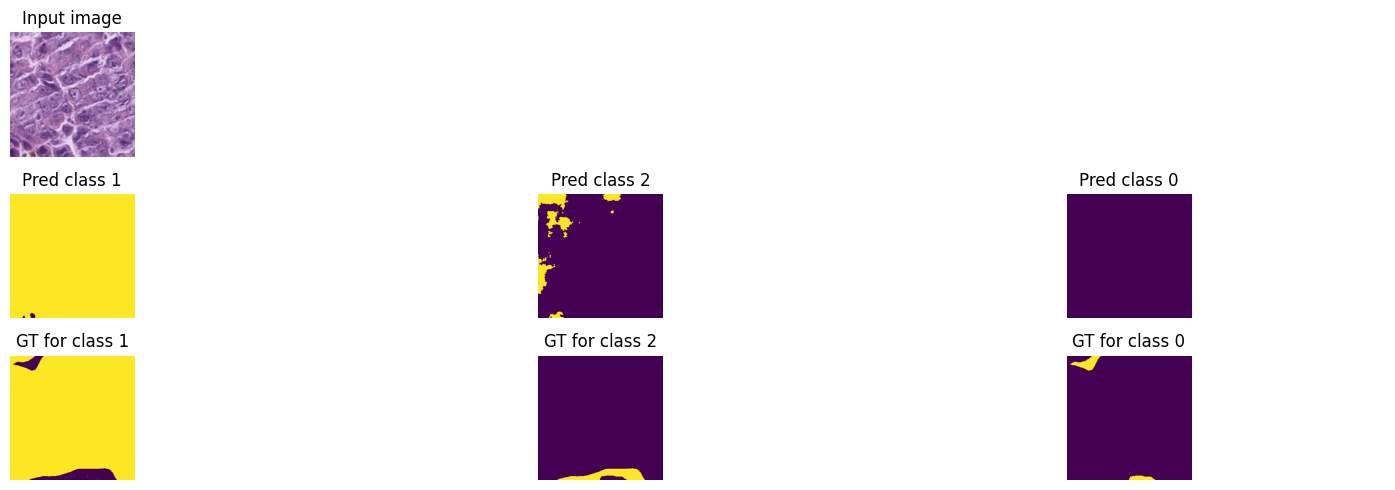

Train loss: 0.41759 | Time: 80m 39s | Val loss: 0.38642
Train_DICE_avg: 0.58775 | Train_Jaccard_avg: 0.53310 | Train_Sensitivity_avg: 0.68130 | Train_Specificity_avg: 0.85328 
Class 0 - Train_DICE: 0.57258 | Train_Jaccard: 0.53500 | Train_Sensitivity: 0.75641 | Train_Specificity: 0.88409 
Class 1 - Train_DICE: 0.70578 | Train_Jaccard: 0.65824 | Train_Sensitivity: 0.84176 | Train_Specificity: 0.80605 
Class 2 - Train_DICE: 0.48491 | Train_Jaccard: 0.40605 | Train_Sensitivity: 0.44573 | Train_Specificity: 0.86969 
Val_DICE_avg: 0.61990 | Val_Jaccard_avg: 0.56517 | Val_Sensitivity_avg: 0.69816 | Val_Specificity_avg: 0.85327 
Class 0 - Val_DICE: 0.62983 | Val_Jaccard: 0.58785 | Val_Sensitivity: 0.74740 | Val_Specificity: 0.91015 
Class 1 - Val_DICE: 0.74621 | Val_Jaccard: 0.70150 | Val_Sensitivity: 0.85862 | Val_Specificity: 0.82347 
Class 2 - Val_DICE: 0.48364 | Val_Jaccard: 0.40616 | Val_Sensitivity: 0.48846 | Val_Specificity: 0.82618 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.41011 | Time: 82m 54s | Val loss: 0.37843
Train_DICE_avg: 0.59388 | Train_Jaccard_avg: 0.53890 | Train_Sensitivity_avg: 0.68628 | Train_Specificity_avg: 0.85349 
Class 0 - Train_DICE: 0.58281 | Train_Jaccard: 0.54522 | Train_Sensitivity: 0.76950 | Train_Specificity: 0.88267 
Class 1 - Train_DICE: 0.71232 | Train_Jaccard: 0.66377 | Train_Sensitivity: 0.84105 | Train_Specificity: 0.81001 
Class 2 - Train_DICE: 0.48652 | Train_Jaccard: 0.40772 | Train_Sensitivity: 0.44828 | Train_Specificity: 0.86780 
Val_DICE_avg: 0.62569 | Val_Jaccard_avg: 0.57153 | Val_Sensitivity_avg: 0.70685 | Val_Specificity_avg: 0.85669 
Class 0 - Val_DICE: 0.64285 | Val_Jaccard: 0.60128 | Val_Sensitivity: 0.76937 | Val_Specificity: 0.91199 
Class 1 - Val_DICE: 0.74716 | Val_Jaccard: 0.70322 | Val_Sensitivity: 0.86855 | Val_Specificity: 0.81750 
Class 2 - Val_DICE: 0.48706 | Val_Jaccard: 0.41010 | Val_Sensitivity: 0.48263 | Val_Specificity: 0.84059 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.40643 | Time: 85m 9s | Val loss: 0.37649
Train_DICE_avg: 0.59746 | Train_Jaccard_avg: 0.54241 | Train_Sensitivity_avg: 0.68938 | Train_Specificity_avg: 0.85481 
Class 0 - Train_DICE: 0.58990 | Train_Jaccard: 0.55215 | Train_Sensitivity: 0.77611 | Train_Specificity: 0.88208 
Class 1 - Train_DICE: 0.71503 | Train_Jaccard: 0.66659 | Train_Sensitivity: 0.84328 | Train_Specificity: 0.81063 
Class 2 - Train_DICE: 0.48743 | Train_Jaccard: 0.40850 | Train_Sensitivity: 0.44875 | Train_Specificity: 0.87174 
Val_DICE_avg: 0.62696 | Val_Jaccard_avg: 0.57295 | Val_Sensitivity_avg: 0.70855 | Val_Specificity_avg: 0.84961 
Class 0 - Val_DICE: 0.65048 | Val_Jaccard: 0.60906 | Val_Sensitivity: 0.77841 | Val_Specificity: 0.90167 
Class 1 - Val_DICE: 0.74452 | Val_Jaccard: 0.70074 | Val_Sensitivity: 0.86628 | Val_Specificity: 0.80688 
Class 2 - Val_DICE: 0.48587 | Val_Jaccard: 0.40904 | Val_Sensitivity: 0.48097 | Val_Specificity: 0.84028 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.40474 | Time: 87m 25s | Val loss: 0.37607
Train_DICE_avg: 0.59873 | Train_Jaccard_avg: 0.54374 | Train_Sensitivity_avg: 0.68874 | Train_Specificity_avg: 0.85621 
Class 0 - Train_DICE: 0.59147 | Train_Jaccard: 0.55317 | Train_Sensitivity: 0.77119 | Train_Specificity: 0.88192 
Class 1 - Train_DICE: 0.71651 | Train_Jaccard: 0.66847 | Train_Sensitivity: 0.84513 | Train_Specificity: 0.81380 
Class 2 - Train_DICE: 0.48821 | Train_Jaccard: 0.40959 | Train_Sensitivity: 0.44991 | Train_Specificity: 0.87289 
Val_DICE_avg: 0.62862 | Val_Jaccard_avg: 0.57380 | Val_Sensitivity_avg: 0.70549 | Val_Specificity_avg: 0.84839 
Class 0 - Val_DICE: 0.65360 | Val_Jaccard: 0.61255 | Val_Sensitivity: 0.78241 | Val_Specificity: 0.89711 
Class 1 - Val_DICE: 0.75008 | Val_Jaccard: 0.70418 | Val_Sensitivity: 0.84911 | Val_Specificity: 0.82006 
Class 2 - Val_DICE: 0.48217 | Val_Jaccard: 0.40467 | Val_Sensitivity: 0.48494 | Val_Specificity: 0.82799 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.40007 | Time: 89m 40s | Val loss: 0.37643
Train_DICE_avg: 0.60383 | Train_Jaccard_avg: 0.54876 | Train_Sensitivity_avg: 0.69471 | Train_Specificity_avg: 0.85889 
Class 0 - Train_DICE: 0.59754 | Train_Jaccard: 0.55982 | Train_Sensitivity: 0.78837 | Train_Specificity: 0.88068 
Class 1 - Train_DICE: 0.72441 | Train_Jaccard: 0.67552 | Train_Sensitivity: 0.84466 | Train_Specificity: 0.82107 
Class 2 - Train_DICE: 0.48953 | Train_Jaccard: 0.41095 | Train_Sensitivity: 0.45109 | Train_Specificity: 0.87492 
Val_DICE_avg: 0.63099 | Val_Jaccard_avg: 0.57610 | Val_Sensitivity_avg: 0.70556 | Val_Specificity_avg: 0.84719 
Class 0 - Val_DICE: 0.65105 | Val_Jaccard: 0.61056 | Val_Sensitivity: 0.78154 | Val_Specificity: 0.89605 
Class 1 - Val_DICE: 0.75435 | Val_Jaccard: 0.70784 | Val_Sensitivity: 0.85404 | Val_Specificity: 0.81038 
Class 2 - Val_DICE: 0.48756 | Val_Jaccard: 0.40989 | Val_Sensitivity: 0.48109 | Val_Specificity: 0.83515 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


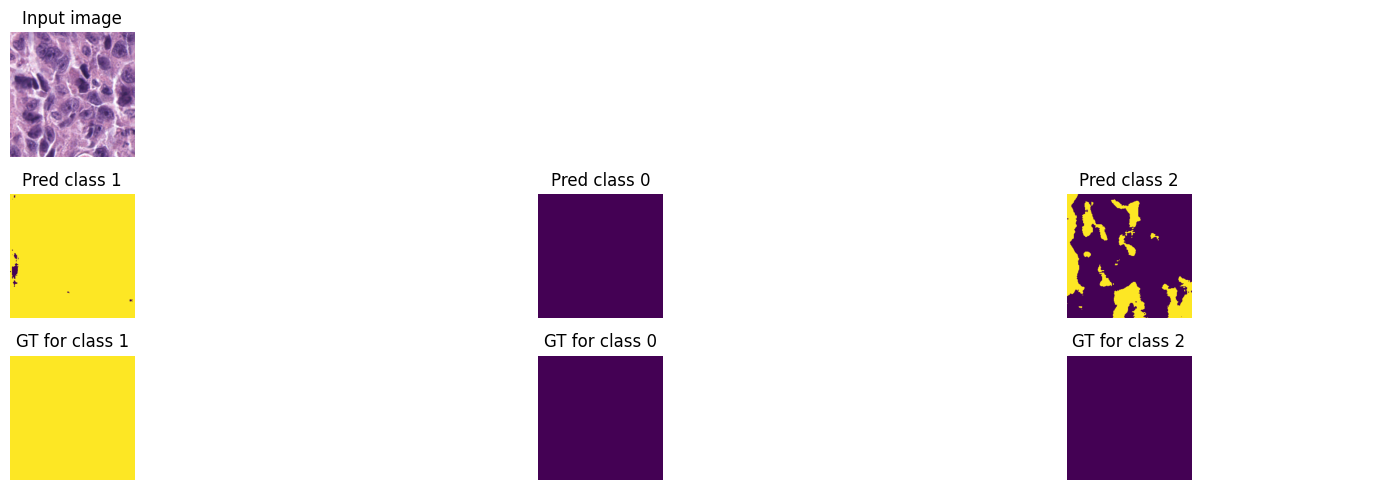

Train loss: 0.39857 | Time: 91m 56s | Val loss: 0.37316
Train_DICE_avg: 0.60510 | Train_Jaccard_avg: 0.55054 | Train_Sensitivity_avg: 0.69975 | Train_Specificity_avg: 0.85613 
Class 0 - Train_DICE: 0.59809 | Train_Jaccard: 0.56195 | Train_Sensitivity: 0.80202 | Train_Specificity: 0.88245 
Class 1 - Train_DICE: 0.72724 | Train_Jaccard: 0.67825 | Train_Sensitivity: 0.84521 | Train_Specificity: 0.81614 
Class 2 - Train_DICE: 0.48997 | Train_Jaccard: 0.41143 | Train_Sensitivity: 0.45201 | Train_Specificity: 0.86980 
Val_DICE_avg: 0.63068 | Val_Jaccard_avg: 0.57576 | Val_Sensitivity_avg: 0.70632 | Val_Specificity_avg: 0.85048 
Class 0 - Val_DICE: 0.65148 | Val_Jaccard: 0.60999 | Val_Sensitivity: 0.77331 | Val_Specificity: 0.89696 
Class 1 - Val_DICE: 0.75411 | Val_Jaccard: 0.70827 | Val_Sensitivity: 0.86118 | Val_Specificity: 0.81866 
Class 2 - Val_DICE: 0.48645 | Val_Jaccard: 0.40902 | Val_Sensitivity: 0.48446 | Val_Specificity: 0.83582 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.39592 | Time: 94m 12s | Val loss: 0.36871
Train_DICE_avg: 0.60755 | Train_Jaccard_avg: 0.55268 | Train_Sensitivity_avg: 0.69848 | Train_Specificity_avg: 0.85776 
Class 0 - Train_DICE: 0.60164 | Train_Jaccard: 0.56425 | Train_Sensitivity: 0.78993 | Train_Specificity: 0.88090 
Class 1 - Train_DICE: 0.73067 | Train_Jaccard: 0.68199 | Train_Sensitivity: 0.85293 | Train_Specificity: 0.81845 
Class 2 - Train_DICE: 0.49035 | Train_Jaccard: 0.41180 | Train_Sensitivity: 0.45257 | Train_Specificity: 0.87395 
Val_DICE_avg: 0.63658 | Val_Jaccard_avg: 0.58205 | Val_Sensitivity_avg: 0.71631 | Val_Specificity_avg: 0.85042 
Class 0 - Val_DICE: 0.66388 | Val_Jaccard: 0.62347 | Val_Sensitivity: 0.80082 | Val_Specificity: 0.89231 
Class 1 - Val_DICE: 0.75745 | Val_Jaccard: 0.71129 | Val_Sensitivity: 0.85645 | Val_Specificity: 0.82143 
Class 2 - Val_DICE: 0.48842 | Val_Jaccard: 0.41140 | Val_Sensitivity: 0.49166 | Val_Specificity: 0.83752 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.39175 | Time: 96m 26s | Val loss: 0.37021
Train_DICE_avg: 0.61153 | Train_Jaccard_avg: 0.55659 | Train_Sensitivity_avg: 0.70055 | Train_Specificity_avg: 0.85977 
Class 0 - Train_DICE: 0.60821 | Train_Jaccard: 0.57111 | Train_Sensitivity: 0.79769 | Train_Specificity: 0.88061 
Class 1 - Train_DICE: 0.73471 | Train_Jaccard: 0.68544 | Train_Sensitivity: 0.84897 | Train_Specificity: 0.82599 
Class 2 - Train_DICE: 0.49167 | Train_Jaccard: 0.41323 | Train_Sensitivity: 0.45499 | Train_Specificity: 0.87272 
Val_DICE_avg: 0.63486 | Val_Jaccard_avg: 0.58024 | Val_Sensitivity_avg: 0.71710 | Val_Specificity_avg: 0.84645 
Class 0 - Val_DICE: 0.65914 | Val_Jaccard: 0.61735 | Val_Sensitivity: 0.78602 | Val_Specificity: 0.89172 
Class 1 - Val_DICE: 0.75615 | Val_Jaccard: 0.71141 | Val_Sensitivity: 0.87278 | Val_Specificity: 0.80877 
Class 2 - Val_DICE: 0.48928 | Val_Jaccard: 0.41198 | Val_Sensitivity: 0.49251 | Val_Specificity: 0.83885 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.39173 | Time: 98m 41s | Val loss: 0.36568
Train_DICE_avg: 0.61139 | Train_Jaccard_avg: 0.55586 | Train_Sensitivity_avg: 0.69753 | Train_Specificity_avg: 0.85576 
Class 0 - Train_DICE: 0.60850 | Train_Jaccard: 0.57038 | Train_Sensitivity: 0.79195 | Train_Specificity: 0.87823 
Class 1 - Train_DICE: 0.73371 | Train_Jaccard: 0.68366 | Train_Sensitivity: 0.84492 | Train_Specificity: 0.81768 
Class 2 - Train_DICE: 0.49197 | Train_Jaccard: 0.41353 | Train_Sensitivity: 0.45574 | Train_Specificity: 0.87137 
Val_DICE_avg: 0.63975 | Val_Jaccard_avg: 0.58462 | Val_Sensitivity_avg: 0.71464 | Val_Specificity_avg: 0.85361 
Class 0 - Val_DICE: 0.66405 | Val_Jaccard: 0.62200 | Val_Sensitivity: 0.79298 | Val_Specificity: 0.89843 
Class 1 - Val_DICE: 0.75973 | Val_Jaccard: 0.71384 | Val_Sensitivity: 0.85834 | Val_Specificity: 0.82046 
Class 2 - Val_DICE: 0.49548 | Val_Jaccard: 0.41802 | Val_Sensitivity: 0.49261 | Val_Specificity: 0.84195 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.38939 | Time: 100m 57s | Val loss: 0.36700
Train_DICE_avg: 0.61384 | Train_Jaccard_avg: 0.55855 | Train_Sensitivity_avg: 0.70183 | Train_Specificity_avg: 0.85684 
Class 0 - Train_DICE: 0.61031 | Train_Jaccard: 0.57170 | Train_Sensitivity: 0.79285 | Train_Specificity: 0.88011 
Class 1 - Train_DICE: 0.73825 | Train_Jaccard: 0.68951 | Train_Sensitivity: 0.85714 | Train_Specificity: 0.81576 
Class 2 - Train_DICE: 0.49296 | Train_Jaccard: 0.41445 | Train_Sensitivity: 0.45551 | Train_Specificity: 0.87467 
Val_DICE_avg: 0.63701 | Val_Jaccard_avg: 0.58217 | Val_Sensitivity_avg: 0.71110 | Val_Specificity_avg: 0.85121 
Class 0 - Val_DICE: 0.66114 | Val_Jaccard: 0.61911 | Val_Sensitivity: 0.78069 | Val_Specificity: 0.89758 
Class 1 - Val_DICE: 0.75968 | Val_Jaccard: 0.71446 | Val_Sensitivity: 0.86773 | Val_Specificity: 0.81760 
Class 2 - Val_DICE: 0.49020 | Val_Jaccard: 0.41294 | Val_Sensitivity: 0.48488 | Val_Specificity: 0.83844 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


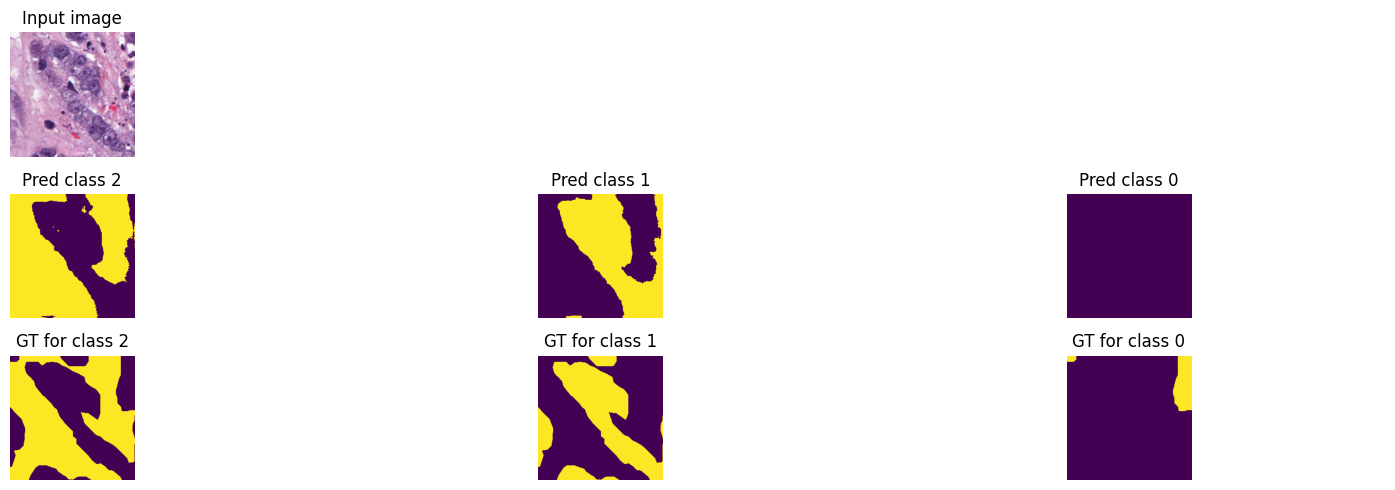

Train loss: 0.38821 | Time: 103m 11s | Val loss: 0.36633
Train_DICE_avg: 0.61454 | Train_Jaccard_avg: 0.55929 | Train_Sensitivity_avg: 0.70148 | Train_Specificity_avg: 0.85651 
Class 0 - Train_DICE: 0.61279 | Train_Jaccard: 0.57366 | Train_Sensitivity: 0.79236 | Train_Specificity: 0.87644 
Class 1 - Train_DICE: 0.73728 | Train_Jaccard: 0.68889 | Train_Sensitivity: 0.85500 | Train_Specificity: 0.82039 
Class 2 - Train_DICE: 0.49357 | Train_Jaccard: 0.41533 | Train_Sensitivity: 0.45708 | Train_Specificity: 0.87270 
Val_DICE_avg: 0.63873 | Val_Jaccard_avg: 0.58281 | Val_Sensitivity_avg: 0.70578 | Val_Specificity_avg: 0.84712 
Class 0 - Val_DICE: 0.66053 | Val_Jaccard: 0.61574 | Val_Sensitivity: 0.75546 | Val_Specificity: 0.90254 
Class 1 - Val_DICE: 0.76518 | Val_Jaccard: 0.71926 | Val_Sensitivity: 0.87277 | Val_Specificity: 0.79916 
Class 2 - Val_DICE: 0.49048 | Val_Jaccard: 0.41343 | Val_Sensitivity: 0.48911 | Val_Specificity: 0.83965 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.38671 | Time: 105m 26s | Val loss: 0.36824
Train_DICE_avg: 0.61652 | Train_Jaccard_avg: 0.56088 | Train_Sensitivity_avg: 0.70091 | Train_Specificity_avg: 0.85880 
Class 0 - Train_DICE: 0.61335 | Train_Jaccard: 0.57374 | Train_Sensitivity: 0.78986 | Train_Specificity: 0.87567 
Class 1 - Train_DICE: 0.74199 | Train_Jaccard: 0.69296 | Train_Sensitivity: 0.85539 | Train_Specificity: 0.82625 
Class 2 - Train_DICE: 0.49422 | Train_Jaccard: 0.41592 | Train_Sensitivity: 0.45748 | Train_Specificity: 0.87447 
Val_DICE_avg: 0.63645 | Val_Jaccard_avg: 0.58100 | Val_Sensitivity_avg: 0.70583 | Val_Specificity_avg: 0.84716 
Class 0 - Val_DICE: 0.65625 | Val_Jaccard: 0.61285 | Val_Sensitivity: 0.76576 | Val_Specificity: 0.89472 
Class 1 - Val_DICE: 0.76258 | Val_Jaccard: 0.71691 | Val_Sensitivity: 0.86426 | Val_Specificity: 0.81398 
Class 2 - Val_DICE: 0.49052 | Val_Jaccard: 0.41325 | Val_Sensitivity: 0.48748 | Val_Specificity: 0.83277 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.38529 | Time: 107m 41s | Val loss: 0.37152
Train_DICE_avg: 0.61772 | Train_Jaccard_avg: 0.56197 | Train_Sensitivity_avg: 0.69929 | Train_Specificity_avg: 0.85568 
Class 0 - Train_DICE: 0.61643 | Train_Jaccard: 0.57655 | Train_Sensitivity: 0.78859 | Train_Specificity: 0.87371 
Class 1 - Train_DICE: 0.74210 | Train_Jaccard: 0.69325 | Train_Sensitivity: 0.85117 | Train_Specificity: 0.82076 
Class 2 - Train_DICE: 0.49462 | Train_Jaccard: 0.41611 | Train_Sensitivity: 0.45810 | Train_Specificity: 0.87258 
Val_DICE_avg: 0.63526 | Val_Jaccard_avg: 0.57967 | Val_Sensitivity_avg: 0.70720 | Val_Specificity_avg: 0.85195 
Class 0 - Val_DICE: 0.65289 | Val_Jaccard: 0.60900 | Val_Sensitivity: 0.75687 | Val_Specificity: 0.90309 
Class 1 - Val_DICE: 0.76066 | Val_Jaccard: 0.71543 | Val_Sensitivity: 0.86695 | Val_Specificity: 0.82391 
Class 2 - Val_DICE: 0.49223 | Val_Jaccard: 0.41458 | Val_Sensitivity: 0.49778 | Val_Specificity: 0.82885 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.38286 | Time: 109m 56s | Val loss: 0.36826
Train_DICE_avg: 0.62003 | Train_Jaccard_avg: 0.56481 | Train_Sensitivity_avg: 0.70565 | Train_Specificity_avg: 0.85928 
Class 0 - Train_DICE: 0.62179 | Train_Jaccard: 0.58291 | Train_Sensitivity: 0.80186 | Train_Specificity: 0.87429 
Class 1 - Train_DICE: 0.74309 | Train_Jaccard: 0.69441 | Train_Sensitivity: 0.85658 | Train_Specificity: 0.82619 
Class 2 - Train_DICE: 0.49521 | Train_Jaccard: 0.41710 | Train_Sensitivity: 0.45852 | Train_Specificity: 0.87736 
Val_DICE_avg: 0.63603 | Val_Jaccard_avg: 0.58088 | Val_Sensitivity_avg: 0.70939 | Val_Specificity_avg: 0.84487 
Class 0 - Val_DICE: 0.65691 | Val_Jaccard: 0.61302 | Val_Sensitivity: 0.76053 | Val_Specificity: 0.90267 
Class 1 - Val_DICE: 0.75889 | Val_Jaccard: 0.71470 | Val_Sensitivity: 0.88481 | Val_Specificity: 0.78967 
Class 2 - Val_DICE: 0.49228 | Val_Jaccard: 0.41493 | Val_Sensitivity: 0.48281 | Val_Specificity: 0.84226 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.38026 | Time: 112m 11s | Val loss: 0.36440
Train_DICE_avg: 0.62267 | Train_Jaccard_avg: 0.56755 | Train_Sensitivity_avg: 0.70852 | Train_Specificity_avg: 0.85922 
Class 0 - Train_DICE: 0.62457 | Train_Jaccard: 0.58609 | Train_Sensitivity: 0.80797 | Train_Specificity: 0.87798 
Class 1 - Train_DICE: 0.74794 | Train_Jaccard: 0.69940 | Train_Sensitivity: 0.85935 | Train_Specificity: 0.82442 
Class 2 - Train_DICE: 0.49549 | Train_Jaccard: 0.41717 | Train_Sensitivity: 0.45824 | Train_Specificity: 0.87527 
Val_DICE_avg: 0.63963 | Val_Jaccard_avg: 0.58393 | Val_Sensitivity_avg: 0.70898 | Val_Specificity_avg: 0.84856 
Class 0 - Val_DICE: 0.66722 | Val_Jaccard: 0.62348 | Val_Sensitivity: 0.77942 | Val_Specificity: 0.90456 
Class 1 - Val_DICE: 0.76282 | Val_Jaccard: 0.71710 | Val_Sensitivity: 0.86601 | Val_Specificity: 0.79991 
Class 2 - Val_DICE: 0.48884 | Val_Jaccard: 0.41121 | Val_Sensitivity: 0.48152 | Val_Specificity: 0.84122 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


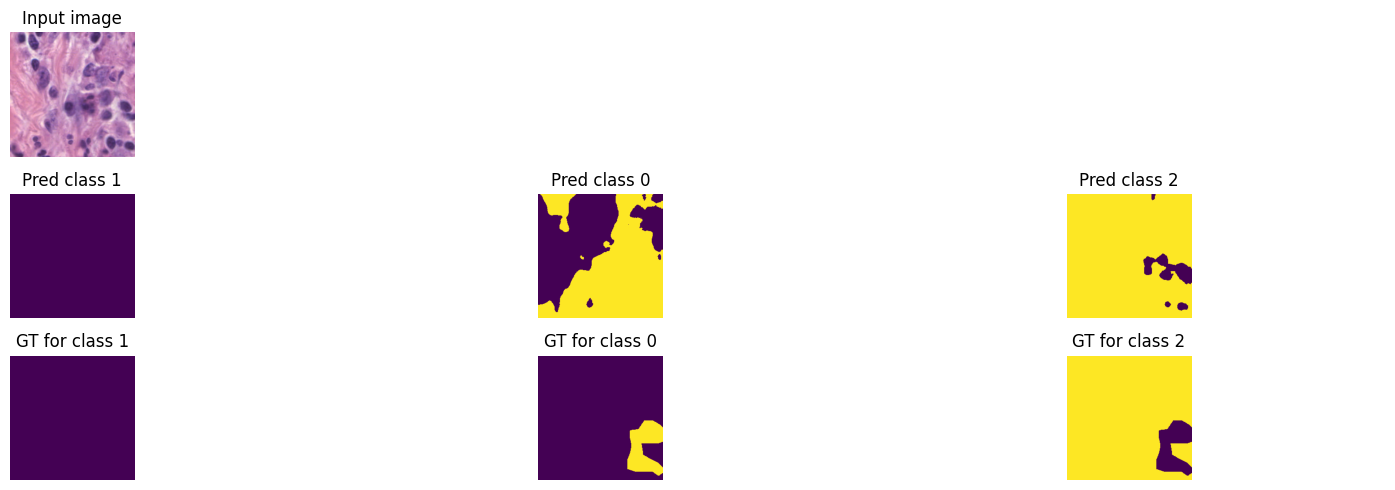

Train loss: 0.38047 | Time: 114m 26s | Val loss: 0.36647
Train_DICE_avg: 0.62243 | Train_Jaccard_avg: 0.56762 | Train_Sensitivity_avg: 0.71165 | Train_Specificity_avg: 0.86089 
Class 0 - Train_DICE: 0.62427 | Train_Jaccard: 0.58624 | Train_Sensitivity: 0.81222 | Train_Specificity: 0.87750 
Class 1 - Train_DICE: 0.74685 | Train_Jaccard: 0.69891 | Train_Sensitivity: 0.86335 | Train_Specificity: 0.82706 
Class 2 - Train_DICE: 0.49618 | Train_Jaccard: 0.41771 | Train_Sensitivity: 0.45937 | Train_Specificity: 0.87811 
Val_DICE_avg: 0.63798 | Val_Jaccard_avg: 0.58291 | Val_Sensitivity_avg: 0.71269 | Val_Specificity_avg: 0.84773 
Class 0 - Val_DICE: 0.66331 | Val_Jaccard: 0.61994 | Val_Sensitivity: 0.77794 | Val_Specificity: 0.89975 
Class 1 - Val_DICE: 0.76365 | Val_Jaccard: 0.71881 | Val_Sensitivity: 0.87561 | Val_Specificity: 0.80647 
Class 2 - Val_DICE: 0.48697 | Val_Jaccard: 0.40999 | Val_Sensitivity: 0.48454 | Val_Specificity: 0.83697 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.38042 | Time: 116m 42s | Val loss: 0.36426
Train_DICE_avg: 0.62198 | Train_Jaccard_avg: 0.56689 | Train_Sensitivity_avg: 0.70889 | Train_Specificity_avg: 0.86019 
Class 0 - Train_DICE: 0.62430 | Train_Jaccard: 0.58589 | Train_Sensitivity: 0.81042 | Train_Specificity: 0.87827 
Class 1 - Train_DICE: 0.74643 | Train_Jaccard: 0.69775 | Train_Sensitivity: 0.85754 | Train_Specificity: 0.82510 
Class 2 - Train_DICE: 0.49521 | Train_Jaccard: 0.41703 | Train_Sensitivity: 0.45872 | Train_Specificity: 0.87721 
Val_DICE_avg: 0.63980 | Val_Jaccard_avg: 0.58468 | Val_Sensitivity_avg: 0.71251 | Val_Specificity_avg: 0.85240 
Class 0 - Val_DICE: 0.66389 | Val_Jaccard: 0.62017 | Val_Sensitivity: 0.77243 | Val_Specificity: 0.90420 
Class 1 - Val_DICE: 0.76373 | Val_Jaccard: 0.71876 | Val_Sensitivity: 0.88144 | Val_Specificity: 0.80683 
Class 2 - Val_DICE: 0.49177 | Val_Jaccard: 0.41513 | Val_Sensitivity: 0.48366 | Val_Specificity: 0.84615 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.37697 | Time: 118m 57s | Val loss: 0.36426
Train_DICE_avg: 0.62551 | Train_Jaccard_avg: 0.56999 | Train_Sensitivity_avg: 0.70788 | Train_Specificity_avg: 0.86117 
Class 0 - Train_DICE: 0.62670 | Train_Jaccard: 0.58740 | Train_Sensitivity: 0.80415 | Train_Specificity: 0.87917 
Class 1 - Train_DICE: 0.75210 | Train_Jaccard: 0.70299 | Train_Sensitivity: 0.85838 | Train_Specificity: 0.82896 
Class 2 - Train_DICE: 0.49774 | Train_Jaccard: 0.41958 | Train_Sensitivity: 0.46110 | Train_Specificity: 0.87537 
Val_DICE_avg: 0.64192 | Val_Jaccard_avg: 0.58601 | Val_Sensitivity_avg: 0.71000 | Val_Specificity_avg: 0.84429 
Class 0 - Val_DICE: 0.66952 | Val_Jaccard: 0.62570 | Val_Sensitivity: 0.77875 | Val_Specificity: 0.89850 
Class 1 - Val_DICE: 0.76389 | Val_Jaccard: 0.71723 | Val_Sensitivity: 0.85952 | Val_Specificity: 0.79777 
Class 2 - Val_DICE: 0.49235 | Val_Jaccard: 0.41509 | Val_Sensitivity: 0.49171 | Val_Specificity: 0.83660 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.37563 | Time: 121m 13s | Val loss: 0.36514
Train_DICE_avg: 0.62660 | Train_Jaccard_avg: 0.57077 | Train_Sensitivity_avg: 0.70571 | Train_Specificity_avg: 0.86016 
Class 0 - Train_DICE: 0.63144 | Train_Jaccard: 0.59128 | Train_Sensitivity: 0.79886 | Train_Specificity: 0.87940 
Class 1 - Train_DICE: 0.75097 | Train_Jaccard: 0.70213 | Train_Sensitivity: 0.85701 | Train_Specificity: 0.82821 
Class 2 - Train_DICE: 0.49740 | Train_Jaccard: 0.41891 | Train_Sensitivity: 0.46127 | Train_Specificity: 0.87287 
Val_DICE_avg: 0.63955 | Val_Jaccard_avg: 0.58378 | Val_Sensitivity_avg: 0.70762 | Val_Specificity_avg: 0.85166 
Class 0 - Val_DICE: 0.66729 | Val_Jaccard: 0.62268 | Val_Sensitivity: 0.76820 | Val_Specificity: 0.89875 
Class 1 - Val_DICE: 0.76375 | Val_Jaccard: 0.71810 | Val_Sensitivity: 0.86374 | Val_Specificity: 0.82068 
Class 2 - Val_DICE: 0.48760 | Val_Jaccard: 0.41058 | Val_Sensitivity: 0.49092 | Val_Specificity: 0.83556 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.37557 | Time: 123m 28s | Val loss: 0.36131
Train_DICE_avg: 0.62706 | Train_Jaccard_avg: 0.57106 | Train_Sensitivity_avg: 0.70462 | Train_Specificity_avg: 0.86182 
Class 0 - Train_DICE: 0.62989 | Train_Jaccard: 0.58908 | Train_Sensitivity: 0.79453 | Train_Specificity: 0.87915 
Class 1 - Train_DICE: 0.75395 | Train_Jaccard: 0.70499 | Train_Sensitivity: 0.85758 | Train_Specificity: 0.82862 
Class 2 - Train_DICE: 0.49733 | Train_Jaccard: 0.41911 | Train_Sensitivity: 0.46176 | Train_Specificity: 0.87771 
Val_DICE_avg: 0.64222 | Val_Jaccard_avg: 0.58692 | Val_Sensitivity_avg: 0.71143 | Val_Specificity_avg: 0.85051 
Class 0 - Val_DICE: 0.67090 | Val_Jaccard: 0.62730 | Val_Sensitivity: 0.78230 | Val_Specificity: 0.88855 
Class 1 - Val_DICE: 0.76354 | Val_Jaccard: 0.71784 | Val_Sensitivity: 0.86726 | Val_Specificity: 0.80872 
Class 2 - Val_DICE: 0.49224 | Val_Jaccard: 0.41562 | Val_Sensitivity: 0.48471 | Val_Specificity: 0.85426 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


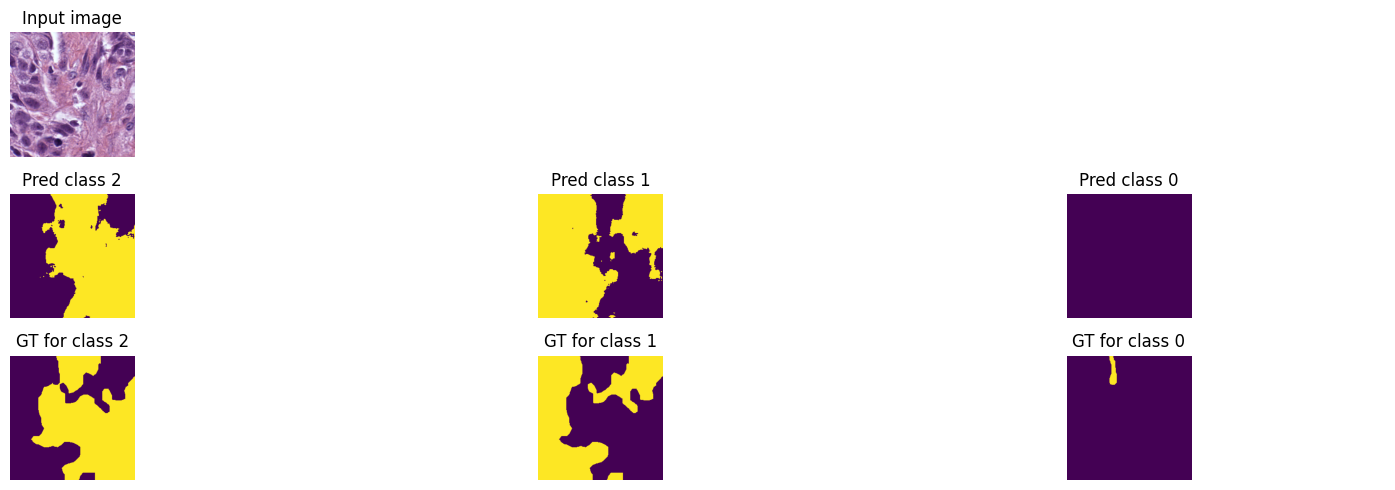

Train loss: 0.37483 | Time: 125m 44s | Val loss: 0.36328
Train_DICE_avg: 0.62770 | Train_Jaccard_avg: 0.57208 | Train_Sensitivity_avg: 0.70822 | Train_Specificity_avg: 0.85991 
Class 0 - Train_DICE: 0.63125 | Train_Jaccard: 0.59138 | Train_Sensitivity: 0.80133 | Train_Specificity: 0.87901 
Class 1 - Train_DICE: 0.75372 | Train_Jaccard: 0.70517 | Train_Sensitivity: 0.86075 | Train_Specificity: 0.82529 
Class 2 - Train_DICE: 0.49814 | Train_Jaccard: 0.41969 | Train_Sensitivity: 0.46258 | Train_Specificity: 0.87542 
Val_DICE_avg: 0.64269 | Val_Jaccard_avg: 0.58698 | Val_Sensitivity_avg: 0.71107 | Val_Specificity_avg: 0.84754 
Class 0 - Val_DICE: 0.66792 | Val_Jaccard: 0.62341 | Val_Sensitivity: 0.77043 | Val_Specificity: 0.89633 
Class 1 - Val_DICE: 0.76503 | Val_Jaccard: 0.71914 | Val_Sensitivity: 0.87070 | Val_Specificity: 0.80340 
Class 2 - Val_DICE: 0.49513 | Val_Jaccard: 0.41839 | Val_Sensitivity: 0.49209 | Val_Specificity: 0.84290 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.37515 | Time: 127m 59s | Val loss: 0.35939
Train_DICE_avg: 0.62722 | Train_Jaccard_avg: 0.57161 | Train_Sensitivity_avg: 0.70848 | Train_Specificity_avg: 0.85967 
Class 0 - Train_DICE: 0.63198 | Train_Jaccard: 0.59236 | Train_Sensitivity: 0.80616 | Train_Specificity: 0.87812 
Class 1 - Train_DICE: 0.75173 | Train_Jaccard: 0.70275 | Train_Sensitivity: 0.85826 | Train_Specificity: 0.82479 
Class 2 - Train_DICE: 0.49794 | Train_Jaccard: 0.41972 | Train_Sensitivity: 0.46102 | Train_Specificity: 0.87610 
Val_DICE_avg: 0.64202 | Val_Jaccard_avg: 0.58690 | Val_Sensitivity_avg: 0.71219 | Val_Specificity_avg: 0.85062 
Class 0 - Val_DICE: 0.67100 | Val_Jaccard: 0.62773 | Val_Sensitivity: 0.78614 | Val_Specificity: 0.89423 
Class 1 - Val_DICE: 0.76442 | Val_Jaccard: 0.71879 | Val_Sensitivity: 0.87480 | Val_Specificity: 0.80004 
Class 2 - Val_DICE: 0.49065 | Val_Jaccard: 0.41420 | Val_Sensitivity: 0.47564 | Val_Specificity: 0.85758 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.37300 | Time: 130m 14s | Val loss: 0.36037
Train_DICE_avg: 0.62944 | Train_Jaccard_avg: 0.57411 | Train_Sensitivity_avg: 0.71187 | Train_Specificity_avg: 0.86233 
Class 0 - Train_DICE: 0.63544 | Train_Jaccard: 0.59575 | Train_Sensitivity: 0.80906 | Train_Specificity: 0.87757 
Class 1 - Train_DICE: 0.75462 | Train_Jaccard: 0.70655 | Train_Sensitivity: 0.86510 | Train_Specificity: 0.83006 
Class 2 - Train_DICE: 0.49827 | Train_Jaccard: 0.42003 | Train_Sensitivity: 0.46145 | Train_Specificity: 0.87936 
Val_DICE_avg: 0.64289 | Val_Jaccard_avg: 0.58744 | Val_Sensitivity_avg: 0.71296 | Val_Specificity_avg: 0.84917 
Class 0 - Val_DICE: 0.67490 | Val_Jaccard: 0.63080 | Val_Sensitivity: 0.78231 | Val_Specificity: 0.89827 
Class 1 - Val_DICE: 0.76540 | Val_Jaccard: 0.71982 | Val_Sensitivity: 0.87296 | Val_Specificity: 0.80473 
Class 2 - Val_DICE: 0.48837 | Val_Jaccard: 0.41170 | Val_Sensitivity: 0.48362 | Val_Specificity: 0.84452 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.37159 | Time: 132m 28s | Val loss: 0.35805
Train_DICE_avg: 0.63091 | Train_Jaccard_avg: 0.57540 | Train_Sensitivity_avg: 0.71246 | Train_Specificity_avg: 0.86285 
Class 0 - Train_DICE: 0.63772 | Train_Jaccard: 0.59772 | Train_Sensitivity: 0.80775 | Train_Specificity: 0.87926 
Class 1 - Train_DICE: 0.75501 | Train_Jaccard: 0.70658 | Train_Sensitivity: 0.86538 | Train_Specificity: 0.82885 
Class 2 - Train_DICE: 0.50001 | Train_Jaccard: 0.42189 | Train_Sensitivity: 0.46425 | Train_Specificity: 0.88042 
Val_DICE_avg: 0.64668 | Val_Jaccard_avg: 0.59147 | Val_Sensitivity_avg: 0.71658 | Val_Specificity_avg: 0.85229 
Class 0 - Val_DICE: 0.67522 | Val_Jaccard: 0.63165 | Val_Sensitivity: 0.78762 | Val_Specificity: 0.89888 
Class 1 - Val_DICE: 0.76462 | Val_Jaccard: 0.71905 | Val_Sensitivity: 0.86996 | Val_Specificity: 0.80420 
Class 2 - Val_DICE: 0.50020 | Val_Jaccard: 0.42371 | Val_Sensitivity: 0.49216 | Val_Specificity: 0.85379 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.37203 | Time: 134m 43s | Val loss: 0.35789
Train_DICE_avg: 0.63032 | Train_Jaccard_avg: 0.57475 | Train_Sensitivity_avg: 0.71013 | Train_Specificity_avg: 0.86162 
Class 0 - Train_DICE: 0.63773 | Train_Jaccard: 0.59739 | Train_Sensitivity: 0.80496 | Train_Specificity: 0.87946 
Class 1 - Train_DICE: 0.75501 | Train_Jaccard: 0.70659 | Train_Sensitivity: 0.86254 | Train_Specificity: 0.82582 
Class 2 - Train_DICE: 0.49822 | Train_Jaccard: 0.42027 | Train_Sensitivity: 0.46290 | Train_Specificity: 0.87959 
Val_DICE_avg: 0.64568 | Val_Jaccard_avg: 0.59029 | Val_Sensitivity_avg: 0.71617 | Val_Specificity_avg: 0.84870 
Class 0 - Val_DICE: 0.67213 | Val_Jaccard: 0.62831 | Val_Sensitivity: 0.78071 | Val_Specificity: 0.89629 
Class 1 - Val_DICE: 0.76613 | Val_Jaccard: 0.72054 | Val_Sensitivity: 0.87240 | Val_Specificity: 0.80374 
Class 2 - Val_DICE: 0.49877 | Val_Jaccard: 0.42201 | Val_Sensitivity: 0.49539 | Val_Specificity: 0.84606 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


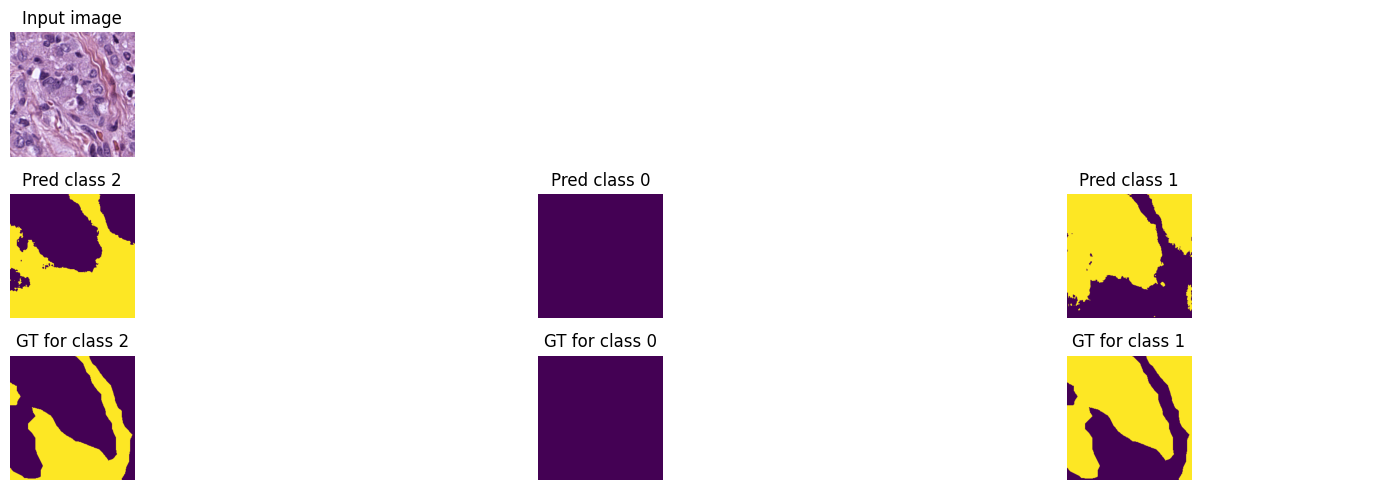

Train loss: 0.37061 | Time: 136m 59s | Val loss: 0.35784
Train_DICE_avg: 0.63211 | Train_Jaccard_avg: 0.57629 | Train_Sensitivity_avg: 0.71184 | Train_Specificity_avg: 0.86232 
Class 0 - Train_DICE: 0.63962 | Train_Jaccard: 0.59909 | Train_Sensitivity: 0.80778 | Train_Specificity: 0.87815 
Class 1 - Train_DICE: 0.75744 | Train_Jaccard: 0.70854 | Train_Sensitivity: 0.86435 | Train_Specificity: 0.83070 
Class 2 - Train_DICE: 0.49925 | Train_Jaccard: 0.42123 | Train_Sensitivity: 0.46340 | Train_Specificity: 0.87810 
Val_DICE_avg: 0.64425 | Val_Jaccard_avg: 0.58884 | Val_Sensitivity_avg: 0.71473 | Val_Specificity_avg: 0.84763 
Class 0 - Val_DICE: 0.67740 | Val_Jaccard: 0.63365 | Val_Sensitivity: 0.79086 | Val_Specificity: 0.89598 
Class 1 - Val_DICE: 0.76427 | Val_Jaccard: 0.71846 | Val_Sensitivity: 0.86916 | Val_Specificity: 0.79925 
Class 2 - Val_DICE: 0.49106 | Val_Jaccard: 0.41442 | Val_Sensitivity: 0.48417 | Val_Specificity: 0.84765 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [18]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 233MB/s]


<All keys matched successfully>

In [19]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:12<00:00,  2.47it/s]



Global Performance Metrics:
Loss mean: 0.36081, std: 0.04796
Dice Coefficient mean: 0.64745, std: 0.20208
Jaccard Index mean: 0.59226, std: 0.21038
Sensitivity mean: 0.81339, std: 0.18901
Specificity mean: 0.74646, std: 0.16871

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.68323, std: 0.39643
Jaccard mean: 0.63964, std: 0.40511
Sensitivity mean: 0.80238, std: 0.36399
Specificity mean: 0.77040, std: 0.35131

Class 1:
Dice mean: 0.76683, std: 0.34793
Jaccard mean: 0.72213, std: 0.35626
Sensitivity mean: 0.82914, std: 0.32911
Specificity mean: 0.79116, std: 0.33634

Class 2:
Dice mean: 0.49229, std: 0.37680
Jaccard mean: 0.41501, std: 0.35792
Sensitivity mean: 0.80865, std: 0.27829
Specificity mean: 0.67782, std: 0.30784


### Cross-Entropy Loss

In [20]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-DeepLabV3+-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.57 GB
GPU Memory - Reserved: 1.29 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


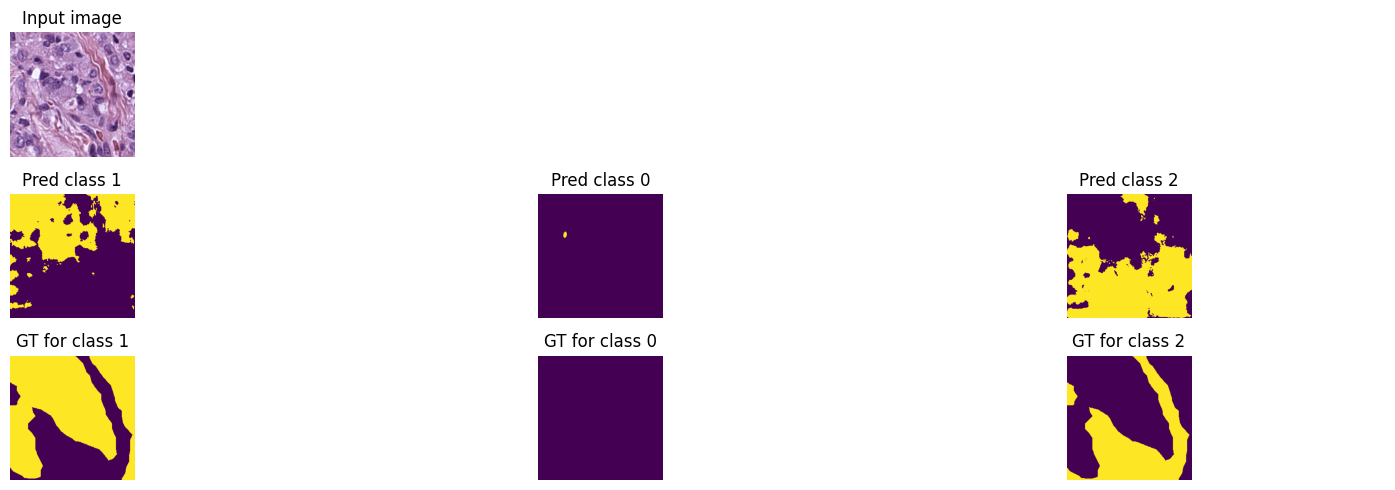

Train loss: 0.49825 | Time: 2m 11s | Val loss: 0.37003
Train_DICE_avg: 0.39817 | Train_Jaccard_avg: 0.34502 | Train_Sensitivity_avg: 0.64062 | Train_Specificity_avg: 0.73664 
Class 0 - Train_DICE: 0.36844 | Train_Jaccard: 0.33440 | Train_Sensitivity: 0.63581 | Train_Specificity: 0.79575 
Class 1 - Train_DICE: 0.48429 | Train_Jaccard: 0.41968 | Train_Sensitivity: 0.67836 | Train_Specificity: 0.68613 
Class 2 - Train_DICE: 0.34179 | Train_Jaccard: 0.28098 | Train_Sensitivity: 0.60769 | Train_Specificity: 0.72805 
Val_DICE_avg: 0.51955 | Val_Jaccard_avg: 0.47230 | Val_Sensitivity_avg: 0.79649 | Val_Specificity_avg: 0.73271 
Class 0 - Val_DICE: 0.52675 | Val_Jaccard: 0.48996 | Val_Sensitivity: 0.75542 | Val_Specificity: 0.80764 
Class 1 - Val_DICE: 0.63215 | Val_Jaccard: 0.57504 | Val_Sensitivity: 0.77759 | Val_Specificity: 0.67395 
Class 2 - Val_DICE: 0.39974 | Val_Jaccard: 0.35189 | Val_Sensitivity: 0.85646 | Val_Specificity: 0.71653 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


Train loss: 0.43382 | Time: 4m 21s | Val loss: 0.35420
Train_DICE_avg: 0.43562 | Train_Jaccard_avg: 0.38492 | Train_Sensitivity_avg: 0.72883 | Train_Specificity_avg: 0.73953 
Class 0 - Train_DICE: 0.43579 | Train_Jaccard: 0.40381 | Train_Sensitivity: 0.76031 | Train_Specificity: 0.79580 
Class 1 - Train_DICE: 0.52032 | Train_Jaccard: 0.45636 | Train_Sensitivity: 0.72140 | Train_Specificity: 0.69874 
Class 2 - Train_DICE: 0.35074 | Train_Jaccard: 0.29457 | Train_Sensitivity: 0.70477 | Train_Specificity: 0.72405 
Val_DICE_avg: 0.53107 | Val_Jaccard_avg: 0.48524 | Val_Sensitivity_avg: 0.82518 | Val_Specificity_avg: 0.74062 
Class 0 - Val_DICE: 0.54261 | Val_Jaccard: 0.50796 | Val_Sensitivity: 0.80027 | Val_Specificity: 0.80693 
Class 1 - Val_DICE: 0.64308 | Val_Jaccard: 0.58653 | Val_Sensitivity: 0.77469 | Val_Specificity: 0.70126 
Class 2 - Val_DICE: 0.40752 | Val_Jaccard: 0.36123 | Val_Sensitivity: 0.90060 | Val_Specificity: 0.71366 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.42338 | Time: 6m 32s | Val loss: 0.34849
Train_DICE_avg: 0.44212 | Train_Jaccard_avg: 0.39184 | Train_Sensitivity_avg: 0.74287 | Train_Specificity_avg: 0.74072 
Class 0 - Train_DICE: 0.44279 | Train_Jaccard: 0.41202 | Train_Sensitivity: 0.77667 | Train_Specificity: 0.79624 
Class 1 - Train_DICE: 0.52540 | Train_Jaccard: 0.46071 | Train_Sensitivity: 0.72918 | Train_Specificity: 0.70139 
Class 2 - Train_DICE: 0.35816 | Train_Jaccard: 0.30279 | Train_Sensitivity: 0.72277 | Train_Specificity: 0.72452 
Val_DICE_avg: 0.52932 | Val_Jaccard_avg: 0.48291 | Val_Sensitivity_avg: 0.81927 | Val_Specificity_avg: 0.74340 
Class 0 - Val_DICE: 0.54791 | Val_Jaccard: 0.51119 | Val_Sensitivity: 0.78312 | Val_Specificity: 0.81292 
Class 1 - Val_DICE: 0.64198 | Val_Jaccard: 0.58545 | Val_Sensitivity: 0.77769 | Val_Specificity: 0.70341 
Class 2 - Val_DICE: 0.39806 | Val_Jaccard: 0.35210 | Val_Sensitivity: 0.89700 | Val_Specificity: 0.71388 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.41616 | Time: 8m 42s | Val loss: 0.34390
Train_DICE_avg: 0.44889 | Train_Jaccard_avg: 0.39868 | Train_Sensitivity_avg: 0.74994 | Train_Specificity_avg: 0.74387 
Class 0 - Train_DICE: 0.45043 | Train_Jaccard: 0.41907 | Train_Sensitivity: 0.78382 | Train_Specificity: 0.79880 
Class 1 - Train_DICE: 0.53177 | Train_Jaccard: 0.46803 | Train_Sensitivity: 0.73587 | Train_Specificity: 0.70575 
Class 2 - Train_DICE: 0.36447 | Train_Jaccard: 0.30894 | Train_Sensitivity: 0.73014 | Train_Specificity: 0.72707 
Val_DICE_avg: 0.54047 | Val_Jaccard_avg: 0.49479 | Val_Sensitivity_avg: 0.83230 | Val_Specificity_avg: 0.74550 
Class 0 - Val_DICE: 0.55726 | Val_Jaccard: 0.52264 | Val_Sensitivity: 0.81362 | Val_Specificity: 0.81113 
Class 1 - Val_DICE: 0.65641 | Val_Jaccard: 0.60014 | Val_Sensitivity: 0.77896 | Val_Specificity: 0.70933 
Class 2 - Val_DICE: 0.40773 | Val_Jaccard: 0.36160 | Val_Sensitivity: 0.90432 | Val_Specificity: 0.71605 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


Train loss: 0.41173 | Time: 10m 52s | Val loss: 0.34492
Train_DICE_avg: 0.45347 | Train_Jaccard_avg: 0.40328 | Train_Sensitivity_avg: 0.75175 | Train_Specificity_avg: 0.74495 
Class 0 - Train_DICE: 0.45447 | Train_Jaccard: 0.42327 | Train_Sensitivity: 0.78001 | Train_Specificity: 0.80130 
Class 1 - Train_DICE: 0.53958 | Train_Jaccard: 0.47601 | Train_Sensitivity: 0.74509 | Train_Specificity: 0.70451 
Class 2 - Train_DICE: 0.36636 | Train_Jaccard: 0.31058 | Train_Sensitivity: 0.73016 | Train_Specificity: 0.72903 
Val_DICE_avg: 0.53557 | Val_Jaccard_avg: 0.48991 | Val_Sensitivity_avg: 0.82735 | Val_Specificity_avg: 0.74693 
Class 0 - Val_DICE: 0.56038 | Val_Jaccard: 0.52523 | Val_Sensitivity: 0.80477 | Val_Specificity: 0.81393 
Class 1 - Val_DICE: 0.64761 | Val_Jaccard: 0.59142 | Val_Sensitivity: 0.76837 | Val_Specificity: 0.71460 
Class 2 - Val_DICE: 0.39871 | Val_Jaccard: 0.35308 | Val_Sensitivity: 0.90890 | Val_Specificity: 0.71224 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


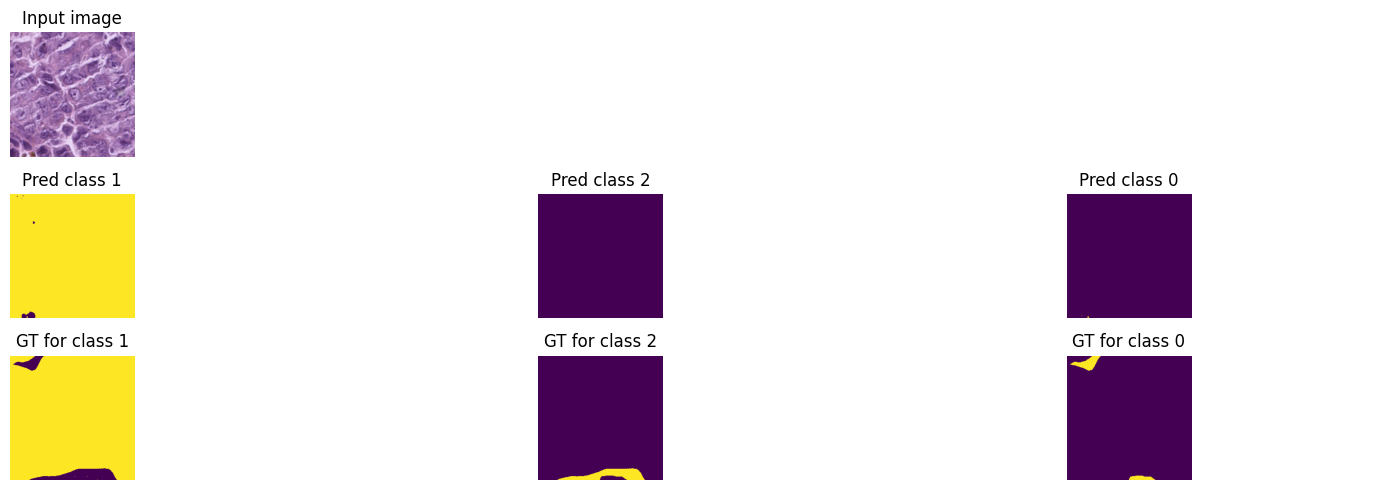

Train loss: 0.40629 | Time: 13m 3s | Val loss: 0.33778
Train_DICE_avg: 0.45782 | Train_Jaccard_avg: 0.40727 | Train_Sensitivity_avg: 0.75125 | Train_Specificity_avg: 0.74644 
Class 0 - Train_DICE: 0.45903 | Train_Jaccard: 0.42752 | Train_Sensitivity: 0.78191 | Train_Specificity: 0.80190 
Class 1 - Train_DICE: 0.54014 | Train_Jaccard: 0.47652 | Train_Sensitivity: 0.74169 | Train_Specificity: 0.70661 
Class 2 - Train_DICE: 0.37429 | Train_Jaccard: 0.31779 | Train_Sensitivity: 0.73014 | Train_Specificity: 0.73079 
Val_DICE_avg: 0.54524 | Val_Jaccard_avg: 0.49940 | Val_Sensitivity_avg: 0.83481 | Val_Specificity_avg: 0.74927 
Class 0 - Val_DICE: 0.57044 | Val_Jaccard: 0.53535 | Val_Sensitivity: 0.82206 | Val_Specificity: 0.81359 
Class 1 - Val_DICE: 0.65470 | Val_Jaccard: 0.59869 | Val_Sensitivity: 0.77816 | Val_Specificity: 0.71653 
Class 2 - Val_DICE: 0.41059 | Val_Jaccard: 0.36417 | Val_Sensitivity: 0.90420 | Val_Specificity: 0.71767 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


Train loss: 0.40410 | Time: 15m 14s | Val loss: 0.34379
Train_DICE_avg: 0.46158 | Train_Jaccard_avg: 0.41109 | Train_Sensitivity_avg: 0.75206 | Train_Specificity_avg: 0.74905 
Class 0 - Train_DICE: 0.46042 | Train_Jaccard: 0.42848 | Train_Sensitivity: 0.78003 | Train_Specificity: 0.80317 
Class 1 - Train_DICE: 0.54737 | Train_Jaccard: 0.48382 | Train_Sensitivity: 0.74590 | Train_Specificity: 0.71034 
Class 2 - Train_DICE: 0.37695 | Train_Jaccard: 0.32096 | Train_Sensitivity: 0.73024 | Train_Specificity: 0.73363 
Val_DICE_avg: 0.54210 | Val_Jaccard_avg: 0.49652 | Val_Sensitivity_avg: 0.83132 | Val_Specificity_avg: 0.74940 
Class 0 - Val_DICE: 0.56405 | Val_Jaccard: 0.52797 | Val_Sensitivity: 0.79396 | Val_Specificity: 0.81861 
Class 1 - Val_DICE: 0.65823 | Val_Jaccard: 0.60141 | Val_Sensitivity: 0.77973 | Val_Specificity: 0.71758 
Class 2 - Val_DICE: 0.40403 | Val_Jaccard: 0.36017 | Val_Sensitivity: 0.92027 | Val_Specificity: 0.71201 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


Train loss: 0.39989 | Time: 17m 24s | Val loss: 0.33805
Train_DICE_avg: 0.46359 | Train_Jaccard_avg: 0.41328 | Train_Sensitivity_avg: 0.75530 | Train_Specificity_avg: 0.74965 
Class 0 - Train_DICE: 0.46536 | Train_Jaccard: 0.43292 | Train_Sensitivity: 0.78275 | Train_Specificity: 0.80475 
Class 1 - Train_DICE: 0.54700 | Train_Jaccard: 0.48367 | Train_Sensitivity: 0.74606 | Train_Specificity: 0.71134 
Class 2 - Train_DICE: 0.37842 | Train_Jaccard: 0.32325 | Train_Sensitivity: 0.73708 | Train_Specificity: 0.73286 
Val_DICE_avg: 0.54543 | Val_Jaccard_avg: 0.50014 | Val_Sensitivity_avg: 0.83904 | Val_Specificity_avg: 0.75219 
Class 0 - Val_DICE: 0.56511 | Val_Jaccard: 0.52960 | Val_Sensitivity: 0.80957 | Val_Specificity: 0.81905 
Class 1 - Val_DICE: 0.66216 | Val_Jaccard: 0.60669 | Val_Sensitivity: 0.79465 | Val_Specificity: 0.72010 
Class 2 - Val_DICE: 0.40901 | Val_Jaccard: 0.36413 | Val_Sensitivity: 0.91291 | Val_Specificity: 0.71741 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.39655 | Time: 19m 34s | Val loss: 0.33791
Train_DICE_avg: 0.46815 | Train_Jaccard_avg: 0.41773 | Train_Sensitivity_avg: 0.75837 | Train_Specificity_avg: 0.75099 
Class 0 - Train_DICE: 0.46787 | Train_Jaccard: 0.43557 | Train_Sensitivity: 0.78733 | Train_Specificity: 0.80498 
Class 1 - Train_DICE: 0.55409 | Train_Jaccard: 0.49088 | Train_Sensitivity: 0.75206 | Train_Specificity: 0.71302 
Class 2 - Train_DICE: 0.38249 | Train_Jaccard: 0.32673 | Train_Sensitivity: 0.73571 | Train_Specificity: 0.73497 
Val_DICE_avg: 0.54963 | Val_Jaccard_avg: 0.50472 | Val_Sensitivity_avg: 0.83871 | Val_Specificity_avg: 0.75713 
Class 0 - Val_DICE: 0.57381 | Val_Jaccard: 0.53870 | Val_Sensitivity: 0.81977 | Val_Specificity: 0.81900 
Class 1 - Val_DICE: 0.66517 | Val_Jaccard: 0.60970 | Val_Sensitivity: 0.77934 | Val_Specificity: 0.73423 
Class 2 - Val_DICE: 0.40990 | Val_Jaccard: 0.36575 | Val_Sensitivity: 0.91704 | Val_Specificity: 0.71816 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.39433 | Time: 21m 45s | Val loss: 0.33366
Train_DICE_avg: 0.47060 | Train_Jaccard_avg: 0.42003 | Train_Sensitivity_avg: 0.76010 | Train_Specificity_avg: 0.75224 
Class 0 - Train_DICE: 0.47294 | Train_Jaccard: 0.44040 | Train_Sensitivity: 0.78942 | Train_Specificity: 0.80758 
Class 1 - Train_DICE: 0.55696 | Train_Jaccard: 0.49350 | Train_Sensitivity: 0.75335 | Train_Specificity: 0.71420 
Class 2 - Train_DICE: 0.38190 | Train_Jaccard: 0.32620 | Train_Sensitivity: 0.73753 | Train_Specificity: 0.73495 
Val_DICE_avg: 0.54739 | Val_Jaccard_avg: 0.50160 | Val_Sensitivity_avg: 0.83205 | Val_Specificity_avg: 0.75116 
Class 0 - Val_DICE: 0.55726 | Val_Jaccard: 0.52151 | Val_Sensitivity: 0.79509 | Val_Specificity: 0.81867 
Class 1 - Val_DICE: 0.65788 | Val_Jaccard: 0.60277 | Val_Sensitivity: 0.80031 | Val_Specificity: 0.70943 
Class 2 - Val_DICE: 0.42704 | Val_Jaccard: 0.38051 | Val_Sensitivity: 0.90075 | Val_Specificity: 0.72537 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


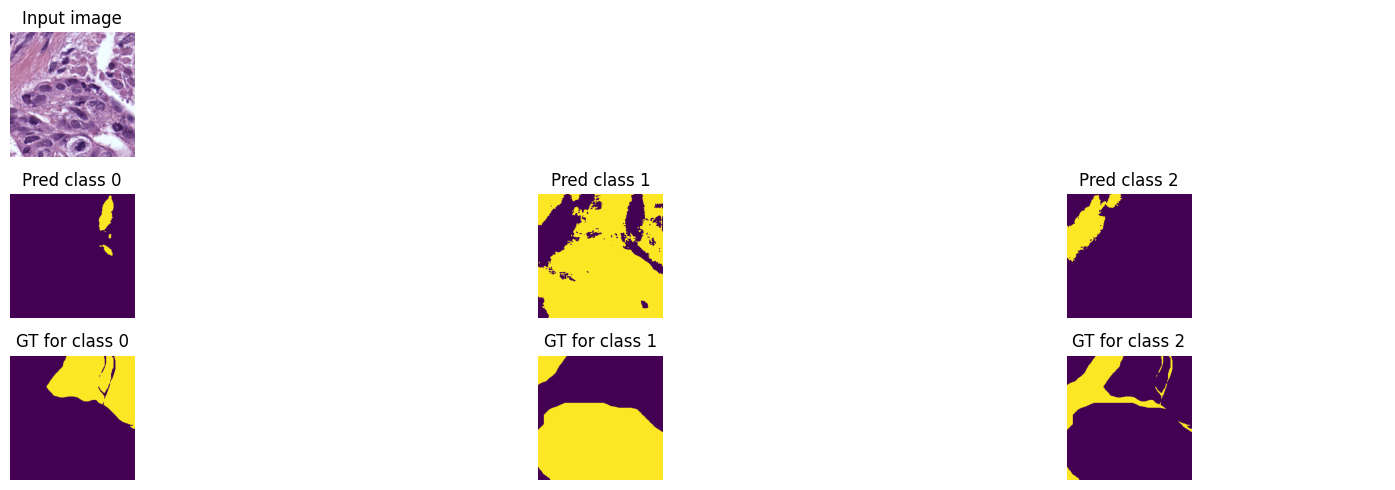

Train loss: 0.39332 | Time: 23m 59s | Val loss: 0.33635
Train_DICE_avg: 0.46989 | Train_Jaccard_avg: 0.41908 | Train_Sensitivity_avg: 0.75514 | Train_Specificity_avg: 0.75424 
Class 0 - Train_DICE: 0.47127 | Train_Jaccard: 0.43804 | Train_Sensitivity: 0.78295 | Train_Specificity: 0.80884 
Class 1 - Train_DICE: 0.55526 | Train_Jaccard: 0.49170 | Train_Sensitivity: 0.75042 | Train_Specificity: 0.71492 
Class 2 - Train_DICE: 0.38316 | Train_Jaccard: 0.32751 | Train_Sensitivity: 0.73204 | Train_Specificity: 0.73896 
Val_DICE_avg: 0.54838 | Val_Jaccard_avg: 0.50308 | Val_Sensitivity_avg: 0.83499 | Val_Specificity_avg: 0.75543 
Class 0 - Val_DICE: 0.56619 | Val_Jaccard: 0.52987 | Val_Sensitivity: 0.81189 | Val_Specificity: 0.81739 
Class 1 - Val_DICE: 0.66360 | Val_Jaccard: 0.60826 | Val_Sensitivity: 0.77299 | Val_Specificity: 0.72975 
Class 2 - Val_DICE: 0.41537 | Val_Jaccard: 0.37112 | Val_Sensitivity: 0.92008 | Val_Specificity: 0.71914 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.38809 | Time: 26m 13s | Val loss: 0.33629
Train_DICE_avg: 0.47589 | Train_Jaccard_avg: 0.42527 | Train_Sensitivity_avg: 0.75903 | Train_Specificity_avg: 0.75541 
Class 0 - Train_DICE: 0.47730 | Train_Jaccard: 0.44433 | Train_Sensitivity: 0.78549 | Train_Specificity: 0.80843 
Class 1 - Train_DICE: 0.55983 | Train_Jaccard: 0.49691 | Train_Sensitivity: 0.75318 | Train_Specificity: 0.71935 
Class 2 - Train_DICE: 0.39053 | Train_Jaccard: 0.33456 | Train_Sensitivity: 0.73843 | Train_Specificity: 0.73844 
Val_DICE_avg: 0.55684 | Val_Jaccard_avg: 0.51114 | Val_Sensitivity_avg: 0.83693 | Val_Specificity_avg: 0.75743 
Class 0 - Val_DICE: 0.57519 | Val_Jaccard: 0.53927 | Val_Sensitivity: 0.81884 | Val_Specificity: 0.81708 
Class 1 - Val_DICE: 0.66677 | Val_Jaccard: 0.61178 | Val_Sensitivity: 0.78186 | Val_Specificity: 0.73273 
Class 2 - Val_DICE: 0.42855 | Val_Jaccard: 0.38236 | Val_Sensitivity: 0.91010 | Val_Specificity: 0.72247 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.38444 | Time: 28m 26s | Val loss: 0.33473
Train_DICE_avg: 0.47846 | Train_Jaccard_avg: 0.42785 | Train_Sensitivity_avg: 0.76120 | Train_Specificity_avg: 0.75623 
Class 0 - Train_DICE: 0.47914 | Train_Jaccard: 0.44604 | Train_Sensitivity: 0.79043 | Train_Specificity: 0.80937 
Class 1 - Train_DICE: 0.56441 | Train_Jaccard: 0.50203 | Train_Sensitivity: 0.75674 | Train_Specificity: 0.71859 
Class 2 - Train_DICE: 0.39182 | Train_Jaccard: 0.33547 | Train_Sensitivity: 0.73643 | Train_Specificity: 0.74072 
Val_DICE_avg: 0.55394 | Val_Jaccard_avg: 0.50811 | Val_Sensitivity_avg: 0.83594 | Val_Specificity_avg: 0.75772 
Class 0 - Val_DICE: 0.57904 | Val_Jaccard: 0.54198 | Val_Sensitivity: 0.80748 | Val_Specificity: 0.82571 
Class 1 - Val_DICE: 0.66114 | Val_Jaccard: 0.60684 | Val_Sensitivity: 0.78680 | Val_Specificity: 0.72780 
Class 2 - Val_DICE: 0.42165 | Val_Jaccard: 0.37551 | Val_Sensitivity: 0.91354 | Val_Specificity: 0.71966 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


Train loss: 0.38171 | Time: 30m 40s | Val loss: 0.32920
Train_DICE_avg: 0.48659 | Train_Jaccard_avg: 0.43596 | Train_Sensitivity_avg: 0.76611 | Train_Specificity_avg: 0.75868 
Class 0 - Train_DICE: 0.48287 | Train_Jaccard: 0.44960 | Train_Sensitivity: 0.78986 | Train_Specificity: 0.81180 
Class 1 - Train_DICE: 0.57688 | Train_Jaccard: 0.51471 | Train_Sensitivity: 0.76679 | Train_Specificity: 0.72234 
Class 2 - Train_DICE: 0.40003 | Train_Jaccard: 0.34357 | Train_Sensitivity: 0.74169 | Train_Specificity: 0.74189 
Val_DICE_avg: 0.56307 | Val_Jaccard_avg: 0.51752 | Val_Sensitivity_avg: 0.84466 | Val_Specificity_avg: 0.76226 
Class 0 - Val_DICE: 0.59171 | Val_Jaccard: 0.55642 | Val_Sensitivity: 0.84704 | Val_Specificity: 0.81735 
Class 1 - Val_DICE: 0.66732 | Val_Jaccard: 0.61245 | Val_Sensitivity: 0.77847 | Val_Specificity: 0.74313 
Class 2 - Val_DICE: 0.43019 | Val_Jaccard: 0.38370 | Val_Sensitivity: 0.90847 | Val_Specificity: 0.72632 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.37835 | Time: 32m 54s | Val loss: 0.32921
Train_DICE_avg: 0.48467 | Train_Jaccard_avg: 0.43377 | Train_Sensitivity_avg: 0.76276 | Train_Specificity_avg: 0.75879 
Class 0 - Train_DICE: 0.47905 | Train_Jaccard: 0.44490 | Train_Sensitivity: 0.78454 | Train_Specificity: 0.81228 
Class 1 - Train_DICE: 0.57312 | Train_Jaccard: 0.51128 | Train_Sensitivity: 0.76295 | Train_Specificity: 0.71963 
Class 2 - Train_DICE: 0.40185 | Train_Jaccard: 0.34514 | Train_Sensitivity: 0.74078 | Train_Specificity: 0.74447 
Val_DICE_avg: 0.56291 | Val_Jaccard_avg: 0.51679 | Val_Sensitivity_avg: 0.84329 | Val_Specificity_avg: 0.75929 
Class 0 - Val_DICE: 0.58072 | Val_Jaccard: 0.54360 | Val_Sensitivity: 0.81678 | Val_Specificity: 0.82185 
Class 1 - Val_DICE: 0.67053 | Val_Jaccard: 0.61642 | Val_Sensitivity: 0.80575 | Val_Specificity: 0.72696 
Class 2 - Val_DICE: 0.43748 | Val_Jaccard: 0.39036 | Val_Sensitivity: 0.90735 | Val_Specificity: 0.72905 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


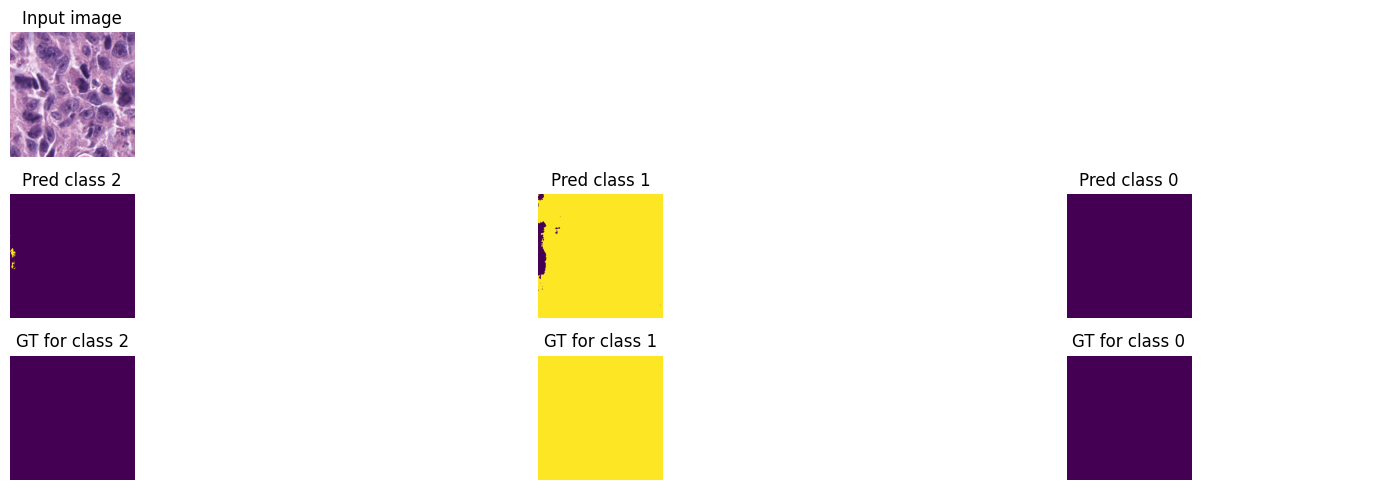

Train loss: 0.37689 | Time: 35m 8s | Val loss: 0.32609
Train_DICE_avg: 0.48776 | Train_Jaccard_avg: 0.43688 | Train_Sensitivity_avg: 0.76406 | Train_Specificity_avg: 0.75930 
Class 0 - Train_DICE: 0.48841 | Train_Jaccard: 0.45451 | Train_Sensitivity: 0.79236 | Train_Specificity: 0.81175 
Class 1 - Train_DICE: 0.57263 | Train_Jaccard: 0.51040 | Train_Sensitivity: 0.76080 | Train_Specificity: 0.72140 
Class 2 - Train_DICE: 0.40224 | Train_Jaccard: 0.34573 | Train_Sensitivity: 0.73901 | Train_Specificity: 0.74474 
Val_DICE_avg: 0.56463 | Val_Jaccard_avg: 0.51835 | Val_Sensitivity_avg: 0.84144 | Val_Specificity_avg: 0.76309 
Class 0 - Val_DICE: 0.57568 | Val_Jaccard: 0.53838 | Val_Sensitivity: 0.81332 | Val_Specificity: 0.82207 
Class 1 - Val_DICE: 0.67081 | Val_Jaccard: 0.61720 | Val_Sensitivity: 0.80936 | Val_Specificity: 0.73096 
Class 2 - Val_DICE: 0.44739 | Val_Jaccard: 0.39948 | Val_Sensitivity: 0.90162 | Val_Specificity: 0.73623 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.36987 | Time: 37m 22s | Val loss: 0.33363
Train_DICE_avg: 0.49296 | Train_Jaccard_avg: 0.44223 | Train_Sensitivity_avg: 0.76250 | Train_Specificity_avg: 0.76168 
Class 0 - Train_DICE: 0.49176 | Train_Jaccard: 0.45718 | Train_Sensitivity: 0.78957 | Train_Specificity: 0.81300 
Class 1 - Train_DICE: 0.57895 | Train_Jaccard: 0.51817 | Train_Sensitivity: 0.76239 | Train_Specificity: 0.72559 
Class 2 - Train_DICE: 0.40819 | Train_Jaccard: 0.35133 | Train_Sensitivity: 0.73555 | Train_Specificity: 0.74646 
Val_DICE_avg: 0.56232 | Val_Jaccard_avg: 0.51680 | Val_Sensitivity_avg: 0.84056 | Val_Specificity_avg: 0.76561 
Class 0 - Val_DICE: 0.58546 | Val_Jaccard: 0.54738 | Val_Sensitivity: 0.80314 | Val_Specificity: 0.82675 
Class 1 - Val_DICE: 0.67788 | Val_Jaccard: 0.62412 | Val_Sensitivity: 0.79558 | Val_Specificity: 0.74553 
Class 2 - Val_DICE: 0.42363 | Val_Jaccard: 0.37889 | Val_Sensitivity: 0.92296 | Val_Specificity: 0.72456 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.36869 | Time: 39m 35s | Val loss: 0.33048
Train_DICE_avg: 0.49653 | Train_Jaccard_avg: 0.44556 | Train_Sensitivity_avg: 0.76809 | Train_Specificity_avg: 0.76339 
Class 0 - Train_DICE: 0.49614 | Train_Jaccard: 0.46145 | Train_Sensitivity: 0.79666 | Train_Specificity: 0.81512 
Class 1 - Train_DICE: 0.58284 | Train_Jaccard: 0.52151 | Train_Sensitivity: 0.76556 | Train_Specificity: 0.72699 
Class 2 - Train_DICE: 0.41061 | Train_Jaccard: 0.35372 | Train_Sensitivity: 0.74204 | Train_Specificity: 0.74805 
Val_DICE_avg: 0.56193 | Val_Jaccard_avg: 0.51631 | Val_Sensitivity_avg: 0.83628 | Val_Specificity_avg: 0.76628 
Class 0 - Val_DICE: 0.57865 | Val_Jaccard: 0.53956 | Val_Sensitivity: 0.78611 | Val_Specificity: 0.82993 
Class 1 - Val_DICE: 0.68172 | Val_Jaccard: 0.62839 | Val_Sensitivity: 0.80602 | Val_Specificity: 0.74417 
Class 2 - Val_DICE: 0.42541 | Val_Jaccard: 0.38099 | Val_Sensitivity: 0.91672 | Val_Specificity: 0.72472 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.36366 | Time: 41m 50s | Val loss: 0.32862
Train_DICE_avg: 0.49932 | Train_Jaccard_avg: 0.44828 | Train_Sensitivity_avg: 0.76724 | Train_Specificity_avg: 0.76591 
Class 0 - Train_DICE: 0.49620 | Train_Jaccard: 0.46091 | Train_Sensitivity: 0.78750 | Train_Specificity: 0.81602 
Class 1 - Train_DICE: 0.58617 | Train_Jaccard: 0.52578 | Train_Sensitivity: 0.76947 | Train_Specificity: 0.73150 
Class 2 - Train_DICE: 0.41560 | Train_Jaccard: 0.35814 | Train_Sensitivity: 0.74477 | Train_Specificity: 0.75021 
Val_DICE_avg: 0.56578 | Val_Jaccard_avg: 0.52065 | Val_Sensitivity_avg: 0.84485 | Val_Specificity_avg: 0.76598 
Class 0 - Val_DICE: 0.59690 | Val_Jaccard: 0.55907 | Val_Sensitivity: 0.82832 | Val_Specificity: 0.82310 
Class 1 - Val_DICE: 0.67771 | Val_Jaccard: 0.62422 | Val_Sensitivity: 0.78640 | Val_Specificity: 0.74975 
Class 2 - Val_DICE: 0.42272 | Val_Jaccard: 0.37865 | Val_Sensitivity: 0.91983 | Val_Specificity: 0.72510 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.36134 | Time: 44m 5s | Val loss: 0.32550
Train_DICE_avg: 0.50305 | Train_Jaccard_avg: 0.45174 | Train_Sensitivity_avg: 0.76873 | Train_Specificity_avg: 0.76516 
Class 0 - Train_DICE: 0.49943 | Train_Jaccard: 0.46407 | Train_Sensitivity: 0.79272 | Train_Specificity: 0.81532 
Class 1 - Train_DICE: 0.59173 | Train_Jaccard: 0.53045 | Train_Sensitivity: 0.76906 | Train_Specificity: 0.73027 
Class 2 - Train_DICE: 0.41798 | Train_Jaccard: 0.36069 | Train_Sensitivity: 0.74442 | Train_Specificity: 0.74987 
Val_DICE_avg: 0.56618 | Val_Jaccard_avg: 0.52020 | Val_Sensitivity_avg: 0.83981 | Val_Specificity_avg: 0.76396 
Class 0 - Val_DICE: 0.57846 | Val_Jaccard: 0.54049 | Val_Sensitivity: 0.80740 | Val_Specificity: 0.82032 
Class 1 - Val_DICE: 0.67556 | Val_Jaccard: 0.62245 | Val_Sensitivity: 0.80995 | Val_Specificity: 0.73555 
Class 2 - Val_DICE: 0.44452 | Val_Jaccard: 0.39767 | Val_Sensitivity: 0.90208 | Val_Specificity: 0.73601 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


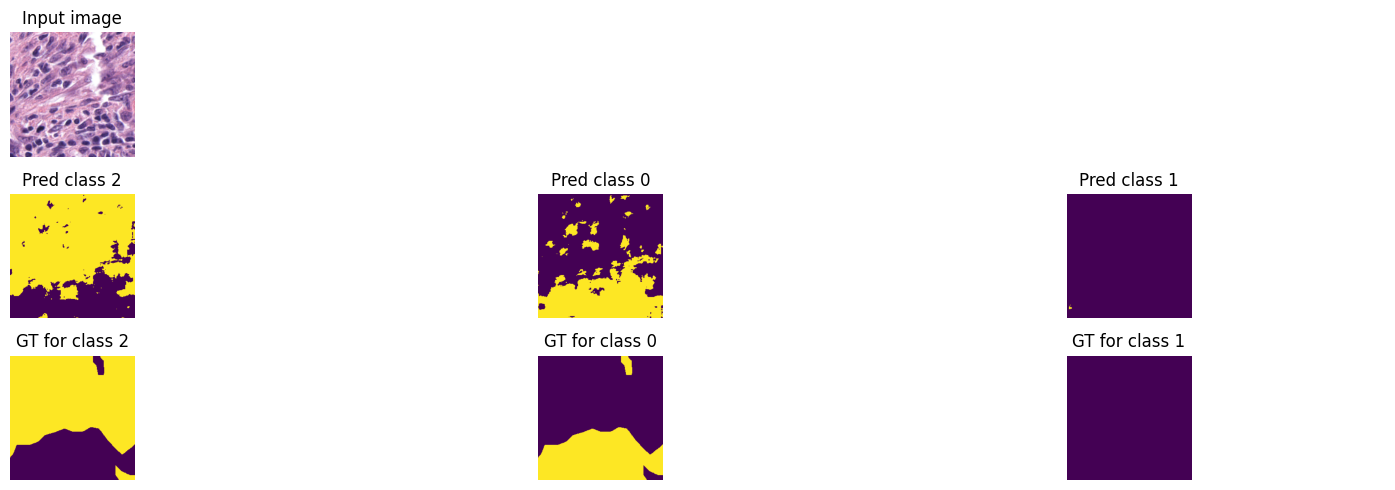

Train loss: 0.36232 | Time: 46m 20s | Val loss: 0.31979
Train_DICE_avg: 0.50462 | Train_Jaccard_avg: 0.45410 | Train_Sensitivity_avg: 0.77329 | Train_Specificity_avg: 0.76611 
Class 0 - Train_DICE: 0.50050 | Train_Jaccard: 0.46564 | Train_Sensitivity: 0.79538 | Train_Specificity: 0.81755 
Class 1 - Train_DICE: 0.59362 | Train_Jaccard: 0.53345 | Train_Sensitivity: 0.77464 | Train_Specificity: 0.72998 
Class 2 - Train_DICE: 0.41974 | Train_Jaccard: 0.36321 | Train_Sensitivity: 0.74986 | Train_Specificity: 0.75078 
Val_DICE_avg: 0.56847 | Val_Jaccard_avg: 0.52184 | Val_Sensitivity_avg: 0.84791 | Val_Specificity_avg: 0.76188 
Class 0 - Val_DICE: 0.58285 | Val_Jaccard: 0.54552 | Val_Sensitivity: 0.82866 | Val_Specificity: 0.81861 
Class 1 - Val_DICE: 0.67122 | Val_Jaccard: 0.61730 | Val_Sensitivity: 0.82160 | Val_Specificity: 0.72724 
Class 2 - Val_DICE: 0.45133 | Val_Jaccard: 0.40270 | Val_Sensitivity: 0.89348 | Val_Specificity: 0.73979 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.35500 | Time: 48m 34s | Val loss: 0.32066
Train_DICE_avg: 0.50997 | Train_Jaccard_avg: 0.45919 | Train_Sensitivity_avg: 0.77405 | Train_Specificity_avg: 0.76996 
Class 0 - Train_DICE: 0.50467 | Train_Jaccard: 0.46913 | Train_Sensitivity: 0.79541 | Train_Specificity: 0.81838 
Class 1 - Train_DICE: 0.60056 | Train_Jaccard: 0.54061 | Train_Sensitivity: 0.77701 | Train_Specificity: 0.73849 
Class 2 - Train_DICE: 0.42467 | Train_Jaccard: 0.36782 | Train_Sensitivity: 0.74974 | Train_Specificity: 0.75302 
Val_DICE_avg: 0.56826 | Val_Jaccard_avg: 0.52179 | Val_Sensitivity_avg: 0.84441 | Val_Specificity_avg: 0.76481 
Class 0 - Val_DICE: 0.58701 | Val_Jaccard: 0.55066 | Val_Sensitivity: 0.84133 | Val_Specificity: 0.81847 
Class 1 - Val_DICE: 0.66778 | Val_Jaccard: 0.61309 | Val_Sensitivity: 0.79707 | Val_Specificity: 0.73601 
Class 2 - Val_DICE: 0.44998 | Val_Jaccard: 0.40163 | Val_Sensitivity: 0.89484 | Val_Specificity: 0.73995 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.34787 | Time: 50m 48s | Val loss: 0.31606
Train_DICE_avg: 0.52123 | Train_Jaccard_avg: 0.47065 | Train_Sensitivity_avg: 0.78087 | Train_Specificity_avg: 0.77357 
Class 0 - Train_DICE: 0.51454 | Train_Jaccard: 0.47881 | Train_Sensitivity: 0.80059 | Train_Specificity: 0.82399 
Class 1 - Train_DICE: 0.61471 | Train_Jaccard: 0.55553 | Train_Sensitivity: 0.78816 | Train_Specificity: 0.74050 
Class 2 - Train_DICE: 0.43443 | Train_Jaccard: 0.37762 | Train_Sensitivity: 0.75387 | Train_Specificity: 0.75621 
Val_DICE_avg: 0.57820 | Val_Jaccard_avg: 0.53133 | Val_Sensitivity_avg: 0.84706 | Val_Specificity_avg: 0.76683 
Class 0 - Val_DICE: 0.58556 | Val_Jaccard: 0.54660 | Val_Sensitivity: 0.80127 | Val_Specificity: 0.82972 
Class 1 - Val_DICE: 0.69007 | Val_Jaccard: 0.63648 | Val_Sensitivity: 0.83813 | Val_Specificity: 0.72731 
Class 2 - Val_DICE: 0.45896 | Val_Jaccard: 0.41090 | Val_Sensitivity: 0.90178 | Val_Specificity: 0.74347 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.34134 | Time: 53m 1s | Val loss: 0.31214
Train_DICE_avg: 0.52797 | Train_Jaccard_avg: 0.47746 | Train_Sensitivity_avg: 0.78474 | Train_Specificity_avg: 0.77510 
Class 0 - Train_DICE: 0.52074 | Train_Jaccard: 0.48474 | Train_Sensitivity: 0.80802 | Train_Specificity: 0.82130 
Class 1 - Train_DICE: 0.62077 | Train_Jaccard: 0.56224 | Train_Sensitivity: 0.78822 | Train_Specificity: 0.74538 
Class 2 - Train_DICE: 0.44240 | Train_Jaccard: 0.38539 | Train_Sensitivity: 0.75797 | Train_Specificity: 0.75862 
Val_DICE_avg: 0.58061 | Val_Jaccard_avg: 0.53429 | Val_Sensitivity_avg: 0.85134 | Val_Specificity_avg: 0.77148 
Class 0 - Val_DICE: 0.58496 | Val_Jaccard: 0.54816 | Val_Sensitivity: 0.82671 | Val_Specificity: 0.82608 
Class 1 - Val_DICE: 0.68962 | Val_Jaccard: 0.63660 | Val_Sensitivity: 0.83745 | Val_Specificity: 0.74200 
Class 2 - Val_DICE: 0.46726 | Val_Jaccard: 0.41811 | Val_Sensitivity: 0.88987 | Val_Specificity: 0.74637 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.33393 | Time: 55m 16s | Val loss: 0.31434
Train_DICE_avg: 0.53515 | Train_Jaccard_avg: 0.48435 | Train_Sensitivity_avg: 0.78528 | Train_Specificity_avg: 0.77861 
Class 0 - Train_DICE: 0.52652 | Train_Jaccard: 0.49023 | Train_Sensitivity: 0.80462 | Train_Specificity: 0.82471 
Class 1 - Train_DICE: 0.62715 | Train_Jaccard: 0.56923 | Train_Sensitivity: 0.79522 | Train_Specificity: 0.74869 
Class 2 - Train_DICE: 0.45177 | Train_Jaccard: 0.39361 | Train_Sensitivity: 0.75599 | Train_Specificity: 0.76244 
Val_DICE_avg: 0.57942 | Val_Jaccard_avg: 0.53243 | Val_Sensitivity_avg: 0.84890 | Val_Specificity_avg: 0.77018 
Class 0 - Val_DICE: 0.59131 | Val_Jaccard: 0.55303 | Val_Sensitivity: 0.82795 | Val_Specificity: 0.82516 
Class 1 - Val_DICE: 0.68585 | Val_Jaccard: 0.63201 | Val_Sensitivity: 0.81680 | Val_Specificity: 0.74133 
Class 2 - Val_DICE: 0.46110 | Val_Jaccard: 0.41226 | Val_Sensitivity: 0.90194 | Val_Specificity: 0.74406 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


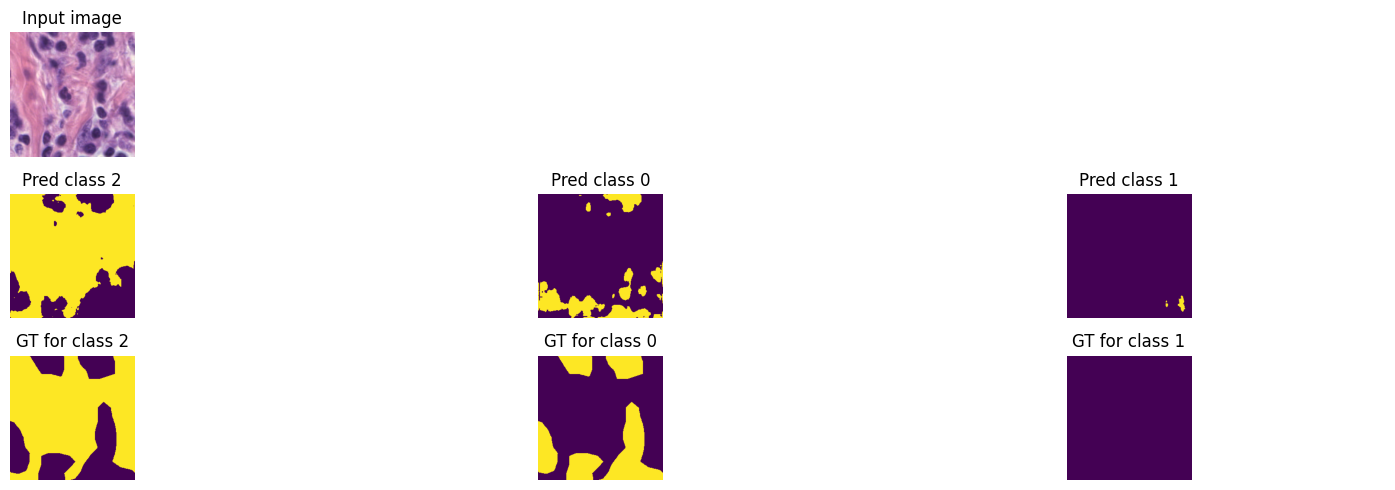

Train loss: 0.32795 | Time: 57m 31s | Val loss: 0.31008
Train_DICE_avg: 0.53886 | Train_Jaccard_avg: 0.48822 | Train_Sensitivity_avg: 0.78662 | Train_Specificity_avg: 0.78098 
Class 0 - Train_DICE: 0.52384 | Train_Jaccard: 0.48719 | Train_Sensitivity: 0.80015 | Train_Specificity: 0.82565 
Class 1 - Train_DICE: 0.63548 | Train_Jaccard: 0.57814 | Train_Sensitivity: 0.79861 | Train_Specificity: 0.75122 
Class 2 - Train_DICE: 0.45726 | Train_Jaccard: 0.39933 | Train_Sensitivity: 0.76110 | Train_Specificity: 0.76606 
Val_DICE_avg: 0.58405 | Val_Jaccard_avg: 0.53584 | Val_Sensitivity_avg: 0.84563 | Val_Specificity_avg: 0.77151 
Class 0 - Val_DICE: 0.59023 | Val_Jaccard: 0.55023 | Val_Sensitivity: 0.80101 | Val_Specificity: 0.83271 
Class 1 - Val_DICE: 0.69144 | Val_Jaccard: 0.63754 | Val_Sensitivity: 0.84627 | Val_Specificity: 0.73446 
Class 2 - Val_DICE: 0.47047 | Val_Jaccard: 0.41976 | Val_Sensitivity: 0.88961 | Val_Specificity: 0.74738 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.32323 | Time: 59m 46s | Val loss: 0.31640
Train_DICE_avg: 0.54401 | Train_Jaccard_avg: 0.49333 | Train_Sensitivity_avg: 0.78954 | Train_Specificity_avg: 0.78375 
Class 0 - Train_DICE: 0.53125 | Train_Jaccard: 0.49432 | Train_Sensitivity: 0.80582 | Train_Specificity: 0.82624 
Class 1 - Train_DICE: 0.64187 | Train_Jaccard: 0.58461 | Train_Sensitivity: 0.80106 | Train_Specificity: 0.75893 
Class 2 - Train_DICE: 0.45891 | Train_Jaccard: 0.40106 | Train_Sensitivity: 0.76174 | Train_Specificity: 0.76609 
Val_DICE_avg: 0.58161 | Val_Jaccard_avg: 0.53540 | Val_Sensitivity_avg: 0.84584 | Val_Specificity_avg: 0.77769 
Class 0 - Val_DICE: 0.59213 | Val_Jaccard: 0.55318 | Val_Sensitivity: 0.80956 | Val_Specificity: 0.83339 
Class 1 - Val_DICE: 0.69050 | Val_Jaccard: 0.63866 | Val_Sensitivity: 0.81756 | Val_Specificity: 0.75770 
Class 2 - Val_DICE: 0.46219 | Val_Jaccard: 0.41435 | Val_Sensitivity: 0.91039 | Val_Specificity: 0.74198 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.31708 | Time: 62m 0s | Val loss: 0.30989
Train_DICE_avg: 0.55037 | Train_Jaccard_avg: 0.50004 | Train_Sensitivity_avg: 0.79285 | Train_Specificity_avg: 0.78766 
Class 0 - Train_DICE: 0.54132 | Train_Jaccard: 0.50448 | Train_Sensitivity: 0.80929 | Train_Specificity: 0.82909 
Class 1 - Train_DICE: 0.64693 | Train_Jaccard: 0.59025 | Train_Sensitivity: 0.80745 | Train_Specificity: 0.76237 
Class 2 - Train_DICE: 0.46286 | Train_Jaccard: 0.40539 | Train_Sensitivity: 0.76182 | Train_Specificity: 0.77152 
Val_DICE_avg: 0.58596 | Val_Jaccard_avg: 0.53907 | Val_Sensitivity_avg: 0.84841 | Val_Specificity_avg: 0.77500 
Class 0 - Val_DICE: 0.60085 | Val_Jaccard: 0.56285 | Val_Sensitivity: 0.84029 | Val_Specificity: 0.82808 
Class 1 - Val_DICE: 0.68893 | Val_Jaccard: 0.63595 | Val_Sensitivity: 0.80950 | Val_Specificity: 0.74978 
Class 2 - Val_DICE: 0.46810 | Val_Jaccard: 0.41841 | Val_Sensitivity: 0.89545 | Val_Specificity: 0.74713 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.31283 | Time: 64m 14s | Val loss: 0.31137
Train_DICE_avg: 0.55636 | Train_Jaccard_avg: 0.50575 | Train_Sensitivity_avg: 0.79491 | Train_Specificity_avg: 0.78973 
Class 0 - Train_DICE: 0.54601 | Train_Jaccard: 0.50826 | Train_Sensitivity: 0.81139 | Train_Specificity: 0.83146 
Class 1 - Train_DICE: 0.65439 | Train_Jaccard: 0.59808 | Train_Sensitivity: 0.80960 | Train_Specificity: 0.76658 
Class 2 - Train_DICE: 0.46870 | Train_Jaccard: 0.41091 | Train_Sensitivity: 0.76373 | Train_Specificity: 0.77115 
Val_DICE_avg: 0.58536 | Val_Jaccard_avg: 0.53724 | Val_Sensitivity_avg: 0.84094 | Val_Specificity_avg: 0.77211 
Class 0 - Val_DICE: 0.58966 | Val_Jaccard: 0.54993 | Val_Sensitivity: 0.80292 | Val_Specificity: 0.82905 
Class 1 - Val_DICE: 0.68806 | Val_Jaccard: 0.63375 | Val_Sensitivity: 0.82953 | Val_Specificity: 0.73541 
Class 2 - Val_DICE: 0.47834 | Val_Jaccard: 0.42805 | Val_Sensitivity: 0.89037 | Val_Specificity: 0.75187 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.30890 | Time: 66m 29s | Val loss: 0.31678
Train_DICE_avg: 0.55766 | Train_Jaccard_avg: 0.50686 | Train_Sensitivity_avg: 0.79417 | Train_Specificity_avg: 0.78973 
Class 0 - Train_DICE: 0.54884 | Train_Jaccard: 0.51117 | Train_Sensitivity: 0.80981 | Train_Specificity: 0.83234 
Class 1 - Train_DICE: 0.65378 | Train_Jaccard: 0.59727 | Train_Sensitivity: 0.80977 | Train_Specificity: 0.76479 
Class 2 - Train_DICE: 0.47035 | Train_Jaccard: 0.41214 | Train_Sensitivity: 0.76293 | Train_Specificity: 0.77206 
Val_DICE_avg: 0.58228 | Val_Jaccard_avg: 0.53471 | Val_Sensitivity_avg: 0.84436 | Val_Specificity_avg: 0.77434 
Class 0 - Val_DICE: 0.59448 | Val_Jaccard: 0.55406 | Val_Sensitivity: 0.80743 | Val_Specificity: 0.83065 
Class 1 - Val_DICE: 0.69485 | Val_Jaccard: 0.64140 | Val_Sensitivity: 0.81478 | Val_Specificity: 0.75716 
Class 2 - Val_DICE: 0.45752 | Val_Jaccard: 0.40866 | Val_Sensitivity: 0.91089 | Val_Specificity: 0.73522 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


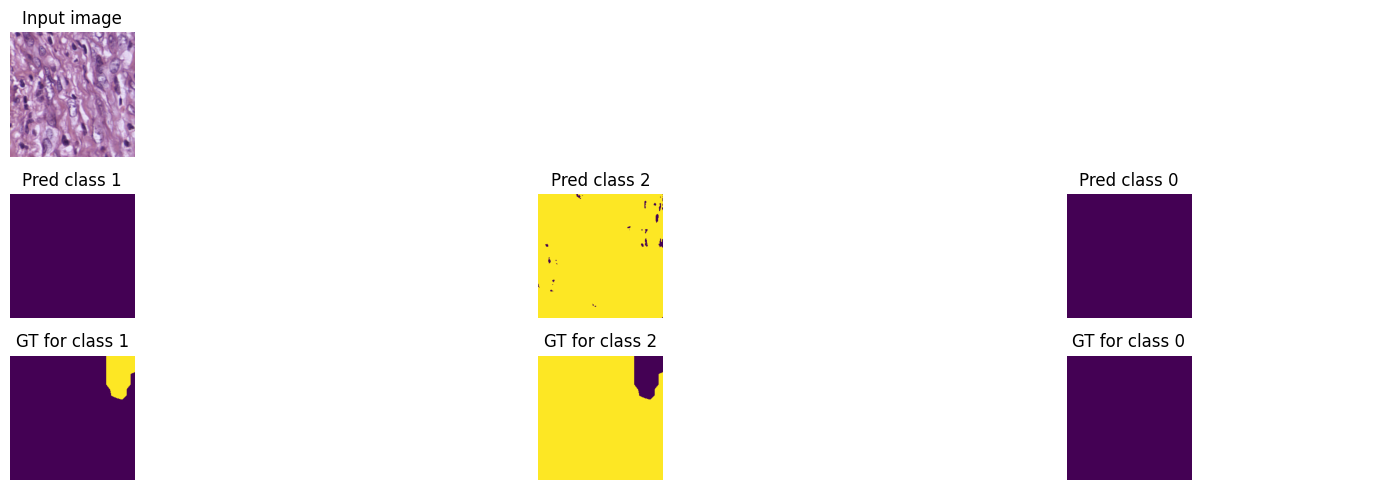

Train loss: 0.30322 | Time: 68m 44s | Val loss: 0.31578
Train_DICE_avg: 0.56373 | Train_Jaccard_avg: 0.51342 | Train_Sensitivity_avg: 0.79773 | Train_Specificity_avg: 0.79487 
Class 0 - Train_DICE: 0.54957 | Train_Jaccard: 0.51218 | Train_Sensitivity: 0.80874 | Train_Specificity: 0.83531 
Class 1 - Train_DICE: 0.66313 | Train_Jaccard: 0.60723 | Train_Sensitivity: 0.81514 | Train_Specificity: 0.77311 
Class 2 - Train_DICE: 0.47851 | Train_Jaccard: 0.42086 | Train_Sensitivity: 0.76932 | Train_Specificity: 0.77617 
Val_DICE_avg: 0.57775 | Val_Jaccard_avg: 0.52911 | Val_Sensitivity_avg: 0.82969 | Val_Specificity_avg: 0.77556 
Class 0 - Val_DICE: 0.57763 | Val_Jaccard: 0.53486 | Val_Sensitivity: 0.75934 | Val_Specificity: 0.84118 
Class 1 - Val_DICE: 0.69254 | Val_Jaccard: 0.63898 | Val_Sensitivity: 0.83331 | Val_Specificity: 0.74293 
Class 2 - Val_DICE: 0.46307 | Val_Jaccard: 0.41350 | Val_Sensitivity: 0.89641 | Val_Specificity: 0.74256 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.29475 | Time: 70m 58s | Val loss: 0.30828
Train_DICE_avg: 0.57272 | Train_Jaccard_avg: 0.52210 | Train_Sensitivity_avg: 0.79954 | Train_Specificity_avg: 0.79872 
Class 0 - Train_DICE: 0.55957 | Train_Jaccard: 0.52084 | Train_Sensitivity: 0.80926 | Train_Specificity: 0.83828 
Class 1 - Train_DICE: 0.67331 | Train_Jaccard: 0.61835 | Train_Sensitivity: 0.82052 | Train_Specificity: 0.77695 
Class 2 - Train_DICE: 0.48527 | Train_Jaccard: 0.42711 | Train_Sensitivity: 0.76884 | Train_Specificity: 0.78093 
Val_DICE_avg: 0.58879 | Val_Jaccard_avg: 0.54001 | Val_Sensitivity_avg: 0.83659 | Val_Specificity_avg: 0.77541 
Class 0 - Val_DICE: 0.58559 | Val_Jaccard: 0.54440 | Val_Sensitivity: 0.79670 | Val_Specificity: 0.83383 
Class 1 - Val_DICE: 0.69527 | Val_Jaccard: 0.64266 | Val_Sensitivity: 0.83992 | Val_Specificity: 0.73883 
Class 2 - Val_DICE: 0.48550 | Val_Jaccard: 0.43297 | Val_Sensitivity: 0.87316 | Val_Specificity: 0.75357 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.28775 | Time: 73m 13s | Val loss: 0.31111
Train_DICE_avg: 0.57564 | Train_Jaccard_avg: 0.52514 | Train_Sensitivity_avg: 0.80250 | Train_Specificity_avg: 0.79864 
Class 0 - Train_DICE: 0.56261 | Train_Jaccard: 0.52385 | Train_Sensitivity: 0.81090 | Train_Specificity: 0.83760 
Class 1 - Train_DICE: 0.67482 | Train_Jaccard: 0.62008 | Train_Sensitivity: 0.81954 | Train_Specificity: 0.77708 
Class 2 - Train_DICE: 0.48950 | Train_Jaccard: 0.43150 | Train_Sensitivity: 0.77706 | Train_Specificity: 0.78123 
Val_DICE_avg: 0.59095 | Val_Jaccard_avg: 0.54356 | Val_Sensitivity_avg: 0.84178 | Val_Specificity_avg: 0.78305 
Class 0 - Val_DICE: 0.60266 | Val_Jaccard: 0.56291 | Val_Sensitivity: 0.82760 | Val_Specificity: 0.83022 
Class 1 - Val_DICE: 0.69196 | Val_Jaccard: 0.63918 | Val_Sensitivity: 0.80432 | Val_Specificity: 0.76740 
Class 2 - Val_DICE: 0.47824 | Val_Jaccard: 0.42858 | Val_Sensitivity: 0.89341 | Val_Specificity: 0.75154 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.28045 | Time: 75m 27s | Val loss: 0.31150
Train_DICE_avg: 0.58441 | Train_Jaccard_avg: 0.53414 | Train_Sensitivity_avg: 0.80543 | Train_Specificity_avg: 0.80445 
Class 0 - Train_DICE: 0.57501 | Train_Jaccard: 0.53579 | Train_Sensitivity: 0.81778 | Train_Specificity: 0.84041 
Class 1 - Train_DICE: 0.68218 | Train_Jaccard: 0.62828 | Train_Sensitivity: 0.82372 | Train_Specificity: 0.78775 
Class 2 - Train_DICE: 0.49603 | Train_Jaccard: 0.43834 | Train_Sensitivity: 0.77480 | Train_Specificity: 0.78519 
Val_DICE_avg: 0.58452 | Val_Jaccard_avg: 0.53595 | Val_Sensitivity_avg: 0.83050 | Val_Specificity_avg: 0.77432 
Class 0 - Val_DICE: 0.58064 | Val_Jaccard: 0.54033 | Val_Sensitivity: 0.78470 | Val_Specificity: 0.83149 
Class 1 - Val_DICE: 0.69423 | Val_Jaccard: 0.64083 | Val_Sensitivity: 0.82276 | Val_Specificity: 0.74377 
Class 2 - Val_DICE: 0.47869 | Val_Jaccard: 0.42668 | Val_Sensitivity: 0.88405 | Val_Specificity: 0.74771 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.27351 | Time: 77m 42s | Val loss: 0.31361
Train_DICE_avg: 0.59017 | Train_Jaccard_avg: 0.53989 | Train_Sensitivity_avg: 0.80829 | Train_Specificity_avg: 0.80728 
Class 0 - Train_DICE: 0.58028 | Train_Jaccard: 0.54074 | Train_Sensitivity: 0.81828 | Train_Specificity: 0.84574 
Class 1 - Train_DICE: 0.68751 | Train_Jaccard: 0.63412 | Train_Sensitivity: 0.82634 | Train_Specificity: 0.78823 
Class 2 - Train_DICE: 0.50271 | Train_Jaccard: 0.44481 | Train_Sensitivity: 0.78026 | Train_Specificity: 0.78787 
Val_DICE_avg: 0.59150 | Val_Jaccard_avg: 0.54402 | Val_Sensitivity_avg: 0.83795 | Val_Specificity_avg: 0.78604 
Class 0 - Val_DICE: 0.59925 | Val_Jaccard: 0.55953 | Val_Sensitivity: 0.81807 | Val_Specificity: 0.82724 
Class 1 - Val_DICE: 0.70030 | Val_Jaccard: 0.64815 | Val_Sensitivity: 0.79535 | Val_Specificity: 0.78786 
Class 2 - Val_DICE: 0.47494 | Val_Jaccard: 0.42438 | Val_Sensitivity: 0.90042 | Val_Specificity: 0.74302 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


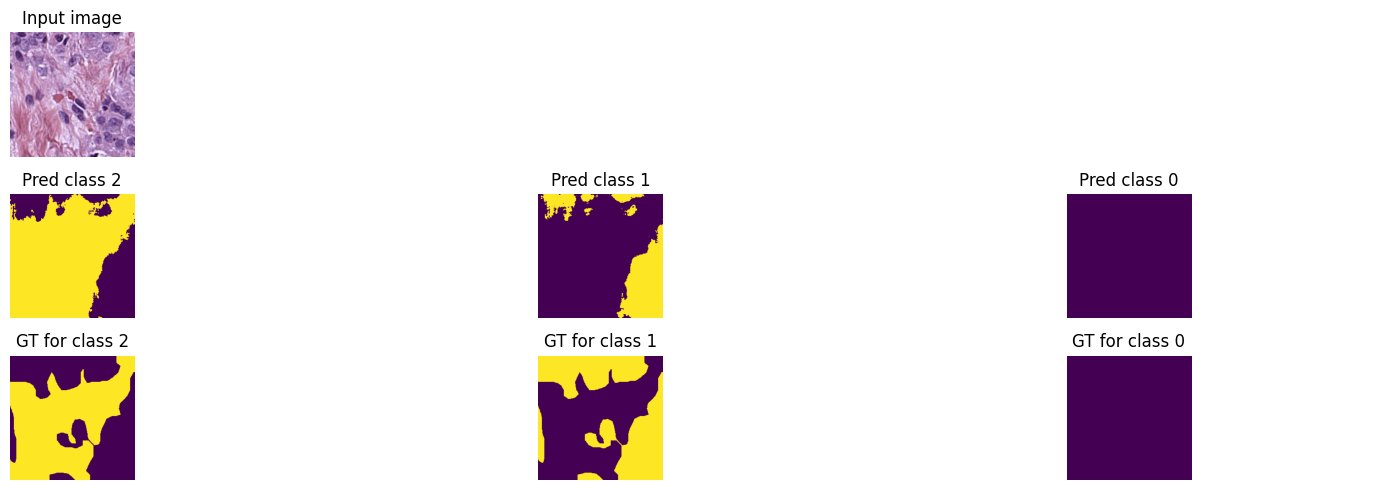

Train loss: 0.26617 | Time: 79m 57s | Val loss: 0.30624
Train_DICE_avg: 0.59832 | Train_Jaccard_avg: 0.54812 | Train_Sensitivity_avg: 0.81238 | Train_Specificity_avg: 0.81032 
Class 0 - Train_DICE: 0.58456 | Train_Jaccard: 0.54496 | Train_Sensitivity: 0.81859 | Train_Specificity: 0.84714 
Class 1 - Train_DICE: 0.69872 | Train_Jaccard: 0.64576 | Train_Sensitivity: 0.83416 | Train_Specificity: 0.79137 
Class 2 - Train_DICE: 0.51168 | Train_Jaccard: 0.45365 | Train_Sensitivity: 0.78438 | Train_Specificity: 0.79244 
Val_DICE_avg: 0.59788 | Val_Jaccard_avg: 0.55011 | Val_Sensitivity_avg: 0.83998 | Val_Specificity_avg: 0.78686 
Class 0 - Val_DICE: 0.59299 | Val_Jaccard: 0.55335 | Val_Sensitivity: 0.80044 | Val_Specificity: 0.83906 
Class 1 - Val_DICE: 0.71011 | Val_Jaccard: 0.65773 | Val_Sensitivity: 0.83962 | Val_Specificity: 0.76375 
Class 2 - Val_DICE: 0.49055 | Val_Jaccard: 0.43924 | Val_Sensitivity: 0.87989 | Val_Specificity: 0.75776 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.26213 | Time: 82m 11s | Val loss: 0.30819
Train_DICE_avg: 0.60131 | Train_Jaccard_avg: 0.55086 | Train_Sensitivity_avg: 0.81260 | Train_Specificity_avg: 0.81236 
Class 0 - Train_DICE: 0.59111 | Train_Jaccard: 0.55107 | Train_Sensitivity: 0.82412 | Train_Specificity: 0.84737 
Class 1 - Train_DICE: 0.69716 | Train_Jaccard: 0.64432 | Train_Sensitivity: 0.83027 | Train_Specificity: 0.79620 
Class 2 - Train_DICE: 0.51566 | Train_Jaccard: 0.45718 | Train_Sensitivity: 0.78343 | Train_Specificity: 0.79351 
Val_DICE_avg: 0.59517 | Val_Jaccard_avg: 0.54755 | Val_Sensitivity_avg: 0.83622 | Val_Specificity_avg: 0.78545 
Class 0 - Val_DICE: 0.59009 | Val_Jaccard: 0.55167 | Val_Sensitivity: 0.82614 | Val_Specificity: 0.82689 
Class 1 - Val_DICE: 0.70084 | Val_Jaccard: 0.64834 | Val_Sensitivity: 0.80073 | Val_Specificity: 0.77432 
Class 2 - Val_DICE: 0.49459 | Val_Jaccard: 0.44264 | Val_Sensitivity: 0.88180 | Val_Specificity: 0.75515 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.25746 | Time: 84m 26s | Val loss: 0.30594
Train_DICE_avg: 0.60398 | Train_Jaccard_avg: 0.55359 | Train_Sensitivity_avg: 0.81150 | Train_Specificity_avg: 0.81679 
Class 0 - Train_DICE: 0.59179 | Train_Jaccard: 0.55155 | Train_Sensitivity: 0.81756 | Train_Specificity: 0.85194 
Class 1 - Train_DICE: 0.69947 | Train_Jaccard: 0.64712 | Train_Sensitivity: 0.83166 | Train_Specificity: 0.80036 
Class 2 - Train_DICE: 0.52067 | Train_Jaccard: 0.46210 | Train_Sensitivity: 0.78526 | Train_Specificity: 0.79805 
Val_DICE_avg: 0.59482 | Val_Jaccard_avg: 0.54696 | Val_Sensitivity_avg: 0.83456 | Val_Specificity_avg: 0.78690 
Class 0 - Val_DICE: 0.59092 | Val_Jaccard: 0.55175 | Val_Sensitivity: 0.82164 | Val_Specificity: 0.82881 
Class 1 - Val_DICE: 0.70040 | Val_Jaccard: 0.64804 | Val_Sensitivity: 0.80420 | Val_Specificity: 0.77458 
Class 2 - Val_DICE: 0.49314 | Val_Jaccard: 0.44110 | Val_Sensitivity: 0.87785 | Val_Specificity: 0.75732 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.25206 | Time: 86m 40s | Val loss: 0.30928
Train_DICE_avg: 0.61040 | Train_Jaccard_avg: 0.56034 | Train_Sensitivity_avg: 0.81610 | Train_Specificity_avg: 0.81715 
Class 0 - Train_DICE: 0.59897 | Train_Jaccard: 0.55899 | Train_Sensitivity: 0.82088 | Train_Specificity: 0.85334 
Class 1 - Train_DICE: 0.70744 | Train_Jaccard: 0.65524 | Train_Sensitivity: 0.83588 | Train_Specificity: 0.79814 
Class 2 - Train_DICE: 0.52481 | Train_Jaccard: 0.46679 | Train_Sensitivity: 0.79156 | Train_Specificity: 0.79996 
Val_DICE_avg: 0.58996 | Val_Jaccard_avg: 0.54106 | Val_Sensitivity_avg: 0.82545 | Val_Specificity_avg: 0.78682 
Class 0 - Val_DICE: 0.58029 | Val_Jaccard: 0.53981 | Val_Sensitivity: 0.78934 | Val_Specificity: 0.83477 
Class 1 - Val_DICE: 0.69907 | Val_Jaccard: 0.64544 | Val_Sensitivity: 0.81530 | Val_Specificity: 0.76904 
Class 2 - Val_DICE: 0.49053 | Val_Jaccard: 0.43795 | Val_Sensitivity: 0.87170 | Val_Specificity: 0.75664 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.24782 | Time: 88m 54s | Val loss: 0.31871
Train_DICE_avg: 0.61383 | Train_Jaccard_avg: 0.56366 | Train_Sensitivity_avg: 0.81676 | Train_Specificity_avg: 0.81949 
Class 0 - Train_DICE: 0.60454 | Train_Jaccard: 0.56356 | Train_Sensitivity: 0.82451 | Train_Specificity: 0.85494 
Class 1 - Train_DICE: 0.71223 | Train_Jaccard: 0.66061 | Train_Sensitivity: 0.84155 | Train_Specificity: 0.80373 
Class 2 - Train_DICE: 0.52472 | Train_Jaccard: 0.46681 | Train_Sensitivity: 0.78423 | Train_Specificity: 0.79980 
Val_DICE_avg: 0.59491 | Val_Jaccard_avg: 0.54707 | Val_Sensitivity_avg: 0.83240 | Val_Specificity_avg: 0.79177 
Class 0 - Val_DICE: 0.58915 | Val_Jaccard: 0.54998 | Val_Sensitivity: 0.81302 | Val_Specificity: 0.83212 
Class 1 - Val_DICE: 0.70668 | Val_Jaccard: 0.65473 | Val_Sensitivity: 0.79910 | Val_Specificity: 0.79199 
Class 2 - Val_DICE: 0.48891 | Val_Jaccard: 0.43651 | Val_Sensitivity: 0.88508 | Val_Specificity: 0.75119 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


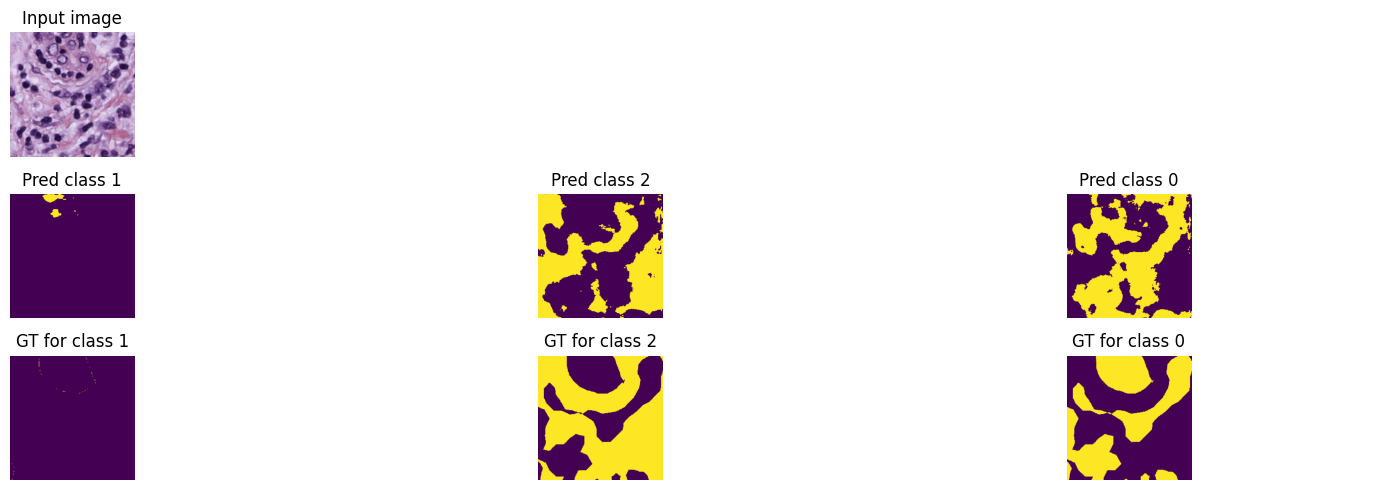

Train loss: 0.24517 | Time: 91m 9s | Val loss: 0.31815
Train_DICE_avg: 0.61715 | Train_Jaccard_avg: 0.56719 | Train_Sensitivity_avg: 0.81909 | Train_Specificity_avg: 0.81893 
Class 0 - Train_DICE: 0.60486 | Train_Jaccard: 0.56423 | Train_Sensitivity: 0.82426 | Train_Specificity: 0.85522 
Class 1 - Train_DICE: 0.71523 | Train_Jaccard: 0.66402 | Train_Sensitivity: 0.84187 | Train_Specificity: 0.80007 
Class 2 - Train_DICE: 0.53136 | Train_Jaccard: 0.47331 | Train_Sensitivity: 0.79114 | Train_Specificity: 0.80152 
Val_DICE_avg: 0.59847 | Val_Jaccard_avg: 0.54989 | Val_Sensitivity_avg: 0.83290 | Val_Specificity_avg: 0.78785 
Class 0 - Val_DICE: 0.59202 | Val_Jaccard: 0.55177 | Val_Sensitivity: 0.79404 | Val_Specificity: 0.83758 
Class 1 - Val_DICE: 0.71029 | Val_Jaccard: 0.65786 | Val_Sensitivity: 0.81863 | Val_Specificity: 0.77262 
Class 2 - Val_DICE: 0.49310 | Val_Jaccard: 0.44004 | Val_Sensitivity: 0.88604 | Val_Specificity: 0.75334 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.23927 | Time: 93m 24s | Val loss: 0.31623
Train_DICE_avg: 0.62398 | Train_Jaccard_avg: 0.57394 | Train_Sensitivity_avg: 0.82189 | Train_Specificity_avg: 0.82330 
Class 0 - Train_DICE: 0.61336 | Train_Jaccard: 0.57249 | Train_Sensitivity: 0.82742 | Train_Specificity: 0.85814 
Class 1 - Train_DICE: 0.72042 | Train_Jaccard: 0.66959 | Train_Sensitivity: 0.84371 | Train_Specificity: 0.80878 
Class 2 - Train_DICE: 0.53815 | Train_Jaccard: 0.47975 | Train_Sensitivity: 0.79456 | Train_Specificity: 0.80297 
Val_DICE_avg: 0.59898 | Val_Jaccard_avg: 0.54950 | Val_Sensitivity_avg: 0.82566 | Val_Specificity_avg: 0.78972 
Class 0 - Val_DICE: 0.58193 | Val_Jaccard: 0.54056 | Val_Sensitivity: 0.77523 | Val_Specificity: 0.84115 
Class 1 - Val_DICE: 0.71135 | Val_Jaccard: 0.65842 | Val_Sensitivity: 0.83486 | Val_Specificity: 0.76441 
Class 2 - Val_DICE: 0.50365 | Val_Jaccard: 0.44952 | Val_Sensitivity: 0.86688 | Val_Specificity: 0.76360 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.23546 | Time: 95m 39s | Val loss: 0.31720
Train_DICE_avg: 0.62789 | Train_Jaccard_avg: 0.57756 | Train_Sensitivity_avg: 0.82179 | Train_Specificity_avg: 0.82669 
Class 0 - Train_DICE: 0.61819 | Train_Jaccard: 0.57633 | Train_Sensitivity: 0.82647 | Train_Specificity: 0.85901 
Class 1 - Train_DICE: 0.72497 | Train_Jaccard: 0.67422 | Train_Sensitivity: 0.84811 | Train_Specificity: 0.81329 
Class 2 - Train_DICE: 0.54051 | Train_Jaccard: 0.48213 | Train_Sensitivity: 0.79080 | Train_Specificity: 0.80775 
Val_DICE_avg: 0.59734 | Val_Jaccard_avg: 0.54894 | Val_Sensitivity_avg: 0.82593 | Val_Specificity_avg: 0.79158 
Class 0 - Val_DICE: 0.58549 | Val_Jaccard: 0.54438 | Val_Sensitivity: 0.77784 | Val_Specificity: 0.84233 
Class 1 - Val_DICE: 0.70938 | Val_Jaccard: 0.65711 | Val_Sensitivity: 0.81583 | Val_Specificity: 0.77604 
Class 2 - Val_DICE: 0.49714 | Val_Jaccard: 0.44534 | Val_Sensitivity: 0.88411 | Val_Specificity: 0.75636 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.23300 | Time: 97m 53s | Val loss: 0.32232
Train_DICE_avg: 0.63105 | Train_Jaccard_avg: 0.58077 | Train_Sensitivity_avg: 0.82468 | Train_Specificity_avg: 0.82697 
Class 0 - Train_DICE: 0.61674 | Train_Jaccard: 0.57463 | Train_Sensitivity: 0.82462 | Train_Specificity: 0.85895 
Class 1 - Train_DICE: 0.73033 | Train_Jaccard: 0.67961 | Train_Sensitivity: 0.85317 | Train_Specificity: 0.81358 
Class 2 - Train_DICE: 0.54606 | Train_Jaccard: 0.48806 | Train_Sensitivity: 0.79624 | Train_Specificity: 0.80839 
Val_DICE_avg: 0.59797 | Val_Jaccard_avg: 0.54931 | Val_Sensitivity_avg: 0.82376 | Val_Specificity_avg: 0.79018 
Class 0 - Val_DICE: 0.58891 | Val_Jaccard: 0.54828 | Val_Sensitivity: 0.78278 | Val_Specificity: 0.84395 
Class 1 - Val_DICE: 0.70999 | Val_Jaccard: 0.65722 | Val_Sensitivity: 0.81930 | Val_Specificity: 0.76752 
Class 2 - Val_DICE: 0.49502 | Val_Jaccard: 0.44243 | Val_Sensitivity: 0.86920 | Val_Specificity: 0.75906 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.23064 | Time: 100m 8s | Val loss: 0.32062
Train_DICE_avg: 0.62826 | Train_Jaccard_avg: 0.57836 | Train_Sensitivity_avg: 0.82281 | Train_Specificity_avg: 0.82709 
Class 0 - Train_DICE: 0.61875 | Train_Jaccard: 0.57737 | Train_Sensitivity: 0.82686 | Train_Specificity: 0.86147 
Class 1 - Train_DICE: 0.72113 | Train_Jaccard: 0.67117 | Train_Sensitivity: 0.84571 | Train_Specificity: 0.81138 
Class 2 - Train_DICE: 0.54491 | Train_Jaccard: 0.48655 | Train_Sensitivity: 0.79585 | Train_Specificity: 0.80840 
Val_DICE_avg: 0.59932 | Val_Jaccard_avg: 0.55071 | Val_Sensitivity_avg: 0.82398 | Val_Specificity_avg: 0.79123 
Class 0 - Val_DICE: 0.58119 | Val_Jaccard: 0.54045 | Val_Sensitivity: 0.77507 | Val_Specificity: 0.84741 
Class 1 - Val_DICE: 0.70990 | Val_Jaccard: 0.65788 | Val_Sensitivity: 0.82599 | Val_Specificity: 0.76184 
Class 2 - Val_DICE: 0.50685 | Val_Jaccard: 0.45381 | Val_Sensitivity: 0.87090 | Val_Specificity: 0.76446 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


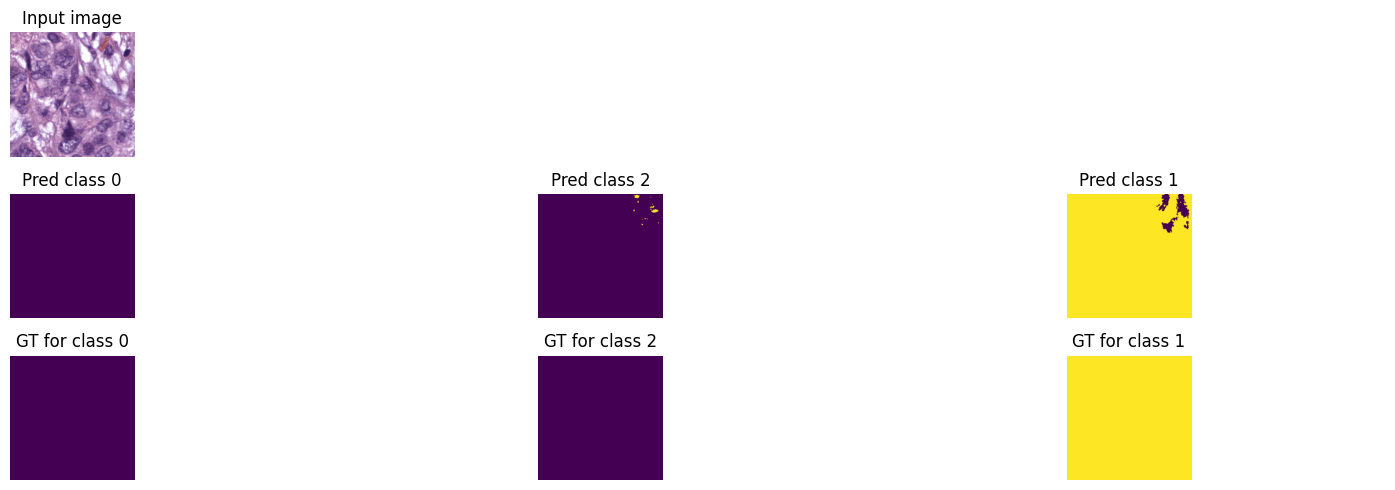

Train loss: 0.22649 | Time: 102m 23s | Val loss: 0.32141
Train_DICE_avg: 0.63435 | Train_Jaccard_avg: 0.58443 | Train_Sensitivity_avg: 0.82355 | Train_Specificity_avg: 0.82772 
Class 0 - Train_DICE: 0.62539 | Train_Jaccard: 0.58391 | Train_Sensitivity: 0.82913 | Train_Specificity: 0.86125 
Class 1 - Train_DICE: 0.72656 | Train_Jaccard: 0.67652 | Train_Sensitivity: 0.84486 | Train_Specificity: 0.81275 
Class 2 - Train_DICE: 0.55111 | Train_Jaccard: 0.49286 | Train_Sensitivity: 0.79667 | Train_Specificity: 0.80917 
Val_DICE_avg: 0.60222 | Val_Jaccard_avg: 0.55398 | Val_Sensitivity_avg: 0.82844 | Val_Specificity_avg: 0.79301 
Class 0 - Val_DICE: 0.59661 | Val_Jaccard: 0.55582 | Val_Sensitivity: 0.79418 | Val_Specificity: 0.84686 
Class 1 - Val_DICE: 0.71276 | Val_Jaccard: 0.66054 | Val_Sensitivity: 0.81844 | Val_Specificity: 0.77233 
Class 2 - Val_DICE: 0.49728 | Val_Jaccard: 0.44557 | Val_Sensitivity: 0.87269 | Val_Specificity: 0.75983 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.22323 | Time: 104m 38s | Val loss: 0.32189
Train_DICE_avg: 0.63984 | Train_Jaccard_avg: 0.59013 | Train_Sensitivity_avg: 0.82954 | Train_Specificity_avg: 0.83159 
Class 0 - Train_DICE: 0.62794 | Train_Jaccard: 0.58653 | Train_Sensitivity: 0.83283 | Train_Specificity: 0.86349 
Class 1 - Train_DICE: 0.73402 | Train_Jaccard: 0.68453 | Train_Sensitivity: 0.85319 | Train_Specificity: 0.81738 
Class 2 - Train_DICE: 0.55755 | Train_Jaccard: 0.49934 | Train_Sensitivity: 0.80261 | Train_Specificity: 0.81390 
Val_DICE_avg: 0.60545 | Val_Jaccard_avg: 0.55703 | Val_Sensitivity_avg: 0.82939 | Val_Specificity_avg: 0.79303 
Class 0 - Val_DICE: 0.58649 | Val_Jaccard: 0.54671 | Val_Sensitivity: 0.77935 | Val_Specificity: 0.84748 
Class 1 - Val_DICE: 0.72112 | Val_Jaccard: 0.66868 | Val_Sensitivity: 0.84345 | Val_Specificity: 0.76212 
Class 2 - Val_DICE: 0.50875 | Val_Jaccard: 0.45570 | Val_Sensitivity: 0.86536 | Val_Specificity: 0.76950 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.22097 | Time: 106m 52s | Val loss: 0.32581
Train_DICE_avg: 0.64210 | Train_Jaccard_avg: 0.59190 | Train_Sensitivity_avg: 0.82903 | Train_Specificity_avg: 0.83057 
Class 0 - Train_DICE: 0.63255 | Train_Jaccard: 0.59021 | Train_Sensitivity: 0.83039 | Train_Specificity: 0.86468 
Class 1 - Train_DICE: 0.73754 | Train_Jaccard: 0.68778 | Train_Sensitivity: 0.85362 | Train_Specificity: 0.81502 
Class 2 - Train_DICE: 0.55622 | Train_Jaccard: 0.49770 | Train_Sensitivity: 0.80307 | Train_Specificity: 0.81202 
Val_DICE_avg: 0.60171 | Val_Jaccard_avg: 0.55269 | Val_Sensitivity_avg: 0.82710 | Val_Specificity_avg: 0.78851 
Class 0 - Val_DICE: 0.59066 | Val_Jaccard: 0.54901 | Val_Sensitivity: 0.75715 | Val_Specificity: 0.85594 
Class 1 - Val_DICE: 0.71714 | Val_Jaccard: 0.66488 | Val_Sensitivity: 0.84898 | Val_Specificity: 0.75174 
Class 2 - Val_DICE: 0.49732 | Val_Jaccard: 0.44419 | Val_Sensitivity: 0.87517 | Val_Specificity: 0.75785 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.21801 | Time: 109m 7s | Val loss: 0.32210
Train_DICE_avg: 0.64364 | Train_Jaccard_avg: 0.59401 | Train_Sensitivity_avg: 0.83200 | Train_Specificity_avg: 0.83336 
Class 0 - Train_DICE: 0.63543 | Train_Jaccard: 0.59366 | Train_Sensitivity: 0.83695 | Train_Specificity: 0.86667 
Class 1 - Train_DICE: 0.73443 | Train_Jaccard: 0.68522 | Train_Sensitivity: 0.85157 | Train_Specificity: 0.81953 
Class 2 - Train_DICE: 0.56104 | Train_Jaccard: 0.50314 | Train_Sensitivity: 0.80748 | Train_Specificity: 0.81386 
Val_DICE_avg: 0.60420 | Val_Jaccard_avg: 0.55520 | Val_Sensitivity_avg: 0.82935 | Val_Specificity_avg: 0.79085 
Class 0 - Val_DICE: 0.58874 | Val_Jaccard: 0.54807 | Val_Sensitivity: 0.77193 | Val_Specificity: 0.85144 
Class 1 - Val_DICE: 0.71770 | Val_Jaccard: 0.66498 | Val_Sensitivity: 0.85297 | Val_Specificity: 0.75379 
Class 2 - Val_DICE: 0.50616 | Val_Jaccard: 0.45254 | Val_Sensitivity: 0.86315 | Val_Specificity: 0.76733 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.21674 | Time: 111m 21s | Val loss: 0.32350
Train_DICE_avg: 0.64320 | Train_Jaccard_avg: 0.59341 | Train_Sensitivity_avg: 0.82941 | Train_Specificity_avg: 0.83434 
Class 0 - Train_DICE: 0.63275 | Train_Jaccard: 0.59085 | Train_Sensitivity: 0.83231 | Train_Specificity: 0.86736 
Class 1 - Train_DICE: 0.73843 | Train_Jaccard: 0.68925 | Train_Sensitivity: 0.85357 | Train_Specificity: 0.82207 
Class 2 - Train_DICE: 0.55843 | Train_Jaccard: 0.50012 | Train_Sensitivity: 0.80234 | Train_Specificity: 0.81360 
Val_DICE_avg: 0.60783 | Val_Jaccard_avg: 0.55881 | Val_Sensitivity_avg: 0.82868 | Val_Specificity_avg: 0.78576 
Class 0 - Val_DICE: 0.59529 | Val_Jaccard: 0.55446 | Val_Sensitivity: 0.77884 | Val_Specificity: 0.85168 
Class 1 - Val_DICE: 0.72052 | Val_Jaccard: 0.66858 | Val_Sensitivity: 0.84122 | Val_Specificity: 0.74157 
Class 2 - Val_DICE: 0.50768 | Val_Jaccard: 0.45338 | Val_Sensitivity: 0.86599 | Val_Specificity: 0.76403 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


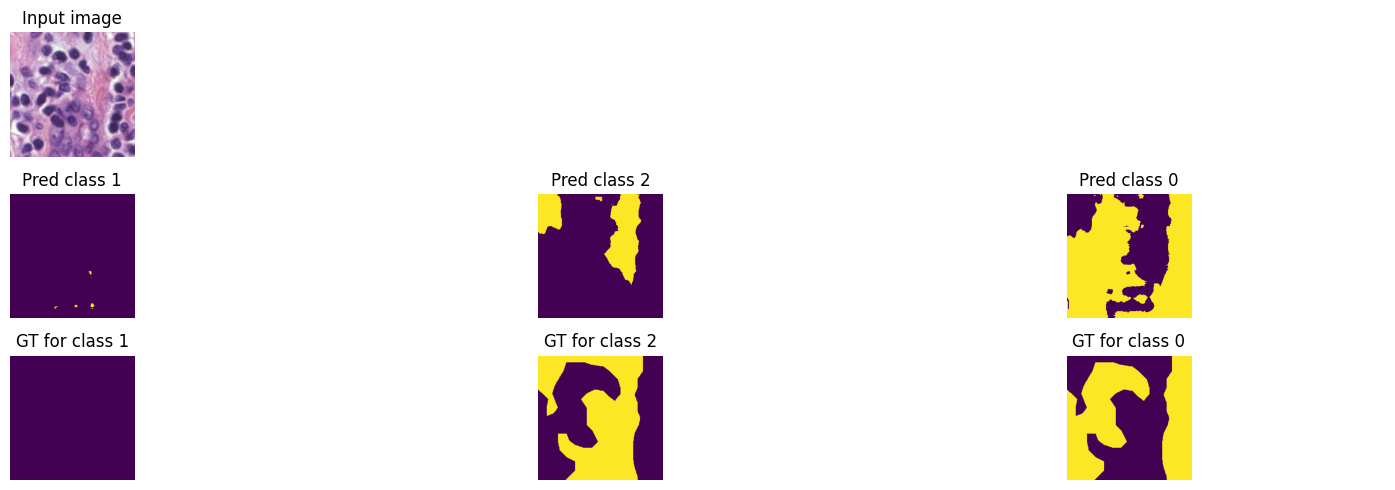

Train loss: 0.21508 | Time: 113m 36s | Val loss: 0.33281
Train_DICE_avg: 0.64643 | Train_Jaccard_avg: 0.59631 | Train_Sensitivity_avg: 0.83016 | Train_Specificity_avg: 0.83400 
Class 0 - Train_DICE: 0.63717 | Train_Jaccard: 0.59441 | Train_Sensitivity: 0.83363 | Train_Specificity: 0.86757 
Class 1 - Train_DICE: 0.73918 | Train_Jaccard: 0.69005 | Train_Sensitivity: 0.85418 | Train_Specificity: 0.81907 
Class 2 - Train_DICE: 0.56295 | Train_Jaccard: 0.50446 | Train_Sensitivity: 0.80266 | Train_Specificity: 0.81535 
Val_DICE_avg: 0.60264 | Val_Jaccard_avg: 0.55354 | Val_Sensitivity_avg: 0.82793 | Val_Specificity_avg: 0.78597 
Class 0 - Val_DICE: 0.59102 | Val_Jaccard: 0.54887 | Val_Sensitivity: 0.75602 | Val_Specificity: 0.85527 
Class 1 - Val_DICE: 0.72256 | Val_Jaccard: 0.67049 | Val_Sensitivity: 0.84776 | Val_Specificity: 0.74781 
Class 2 - Val_DICE: 0.49435 | Val_Jaccard: 0.44126 | Val_Sensitivity: 0.88003 | Val_Specificity: 0.75482 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.21333 | Time: 115m 50s | Val loss: 0.33361
Train_DICE_avg: 0.64514 | Train_Jaccard_avg: 0.59542 | Train_Sensitivity_avg: 0.83113 | Train_Specificity_avg: 0.83491 
Class 0 - Train_DICE: 0.63560 | Train_Jaccard: 0.59374 | Train_Sensitivity: 0.83280 | Train_Specificity: 0.86861 
Class 1 - Train_DICE: 0.73905 | Train_Jaccard: 0.68978 | Train_Sensitivity: 0.85513 | Train_Specificity: 0.82037 
Class 2 - Train_DICE: 0.56078 | Train_Jaccard: 0.50274 | Train_Sensitivity: 0.80545 | Train_Specificity: 0.81574 
Val_DICE_avg: 0.60505 | Val_Jaccard_avg: 0.55581 | Val_Sensitivity_avg: 0.82575 | Val_Specificity_avg: 0.78746 
Class 0 - Val_DICE: 0.59131 | Val_Jaccard: 0.54916 | Val_Sensitivity: 0.75751 | Val_Specificity: 0.85647 
Class 1 - Val_DICE: 0.72057 | Val_Jaccard: 0.66858 | Val_Sensitivity: 0.85542 | Val_Specificity: 0.73970 
Class 2 - Val_DICE: 0.50327 | Val_Jaccard: 0.44969 | Val_Sensitivity: 0.86431 | Val_Specificity: 0.76620 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.21136 | Time: 118m 4s | Val loss: 0.32456
Train_DICE_avg: 0.65203 | Train_Jaccard_avg: 0.60233 | Train_Sensitivity_avg: 0.83448 | Train_Specificity_avg: 0.83740 
Class 0 - Train_DICE: 0.64336 | Train_Jaccard: 0.60096 | Train_Sensitivity: 0.83546 | Train_Specificity: 0.87157 
Class 1 - Train_DICE: 0.74517 | Train_Jaccard: 0.69638 | Train_Sensitivity: 0.85679 | Train_Specificity: 0.82279 
Class 2 - Train_DICE: 0.56756 | Train_Jaccard: 0.50966 | Train_Sensitivity: 0.81119 | Train_Specificity: 0.81783 
Val_DICE_avg: 0.60464 | Val_Jaccard_avg: 0.55558 | Val_Sensitivity_avg: 0.82210 | Val_Specificity_avg: 0.78704 
Class 0 - Val_DICE: 0.58584 | Val_Jaccard: 0.54468 | Val_Sensitivity: 0.76432 | Val_Specificity: 0.85004 
Class 1 - Val_DICE: 0.71991 | Val_Jaccard: 0.66805 | Val_Sensitivity: 0.85277 | Val_Specificity: 0.73954 
Class 2 - Val_DICE: 0.50818 | Val_Jaccard: 0.45400 | Val_Sensitivity: 0.84922 | Val_Specificity: 0.77154 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.20931 | Time: 120m 19s | Val loss: 0.32752
Train_DICE_avg: 0.65268 | Train_Jaccard_avg: 0.60285 | Train_Sensitivity_avg: 0.83282 | Train_Specificity_avg: 0.83742 
Class 0 - Train_DICE: 0.64239 | Train_Jaccard: 0.59951 | Train_Sensitivity: 0.83305 | Train_Specificity: 0.86968 
Class 1 - Train_DICE: 0.74490 | Train_Jaccard: 0.69667 | Train_Sensitivity: 0.85651 | Train_Specificity: 0.82361 
Class 2 - Train_DICE: 0.57074 | Train_Jaccard: 0.51236 | Train_Sensitivity: 0.80890 | Train_Specificity: 0.81897 
Val_DICE_avg: 0.60678 | Val_Jaccard_avg: 0.55767 | Val_Sensitivity_avg: 0.82419 | Val_Specificity_avg: 0.78879 
Class 0 - Val_DICE: 0.59306 | Val_Jaccard: 0.55113 | Val_Sensitivity: 0.75832 | Val_Specificity: 0.85775 
Class 1 - Val_DICE: 0.72201 | Val_Jaccard: 0.67015 | Val_Sensitivity: 0.85298 | Val_Specificity: 0.74198 
Class 2 - Val_DICE: 0.50526 | Val_Jaccard: 0.45172 | Val_Sensitivity: 0.86128 | Val_Specificity: 0.76662 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.20873 | Time: 122m 33s | Val loss: 0.32490
Train_DICE_avg: 0.65117 | Train_Jaccard_avg: 0.60141 | Train_Sensitivity_avg: 0.83421 | Train_Specificity_avg: 0.83814 
Class 0 - Train_DICE: 0.64162 | Train_Jaccard: 0.59955 | Train_Sensitivity: 0.83625 | Train_Specificity: 0.87248 
Class 1 - Train_DICE: 0.74532 | Train_Jaccard: 0.69647 | Train_Sensitivity: 0.85928 | Train_Specificity: 0.82216 
Class 2 - Train_DICE: 0.56658 | Train_Jaccard: 0.50823 | Train_Sensitivity: 0.80710 | Train_Specificity: 0.81977 
Val_DICE_avg: 0.60694 | Val_Jaccard_avg: 0.55808 | Val_Sensitivity_avg: 0.82668 | Val_Specificity_avg: 0.78969 
Class 0 - Val_DICE: 0.59251 | Val_Jaccard: 0.55150 | Val_Sensitivity: 0.76939 | Val_Specificity: 0.85998 
Class 1 - Val_DICE: 0.71902 | Val_Jaccard: 0.66757 | Val_Sensitivity: 0.86515 | Val_Specificity: 0.73512 
Class 2 - Val_DICE: 0.50929 | Val_Jaccard: 0.45518 | Val_Sensitivity: 0.84549 | Val_Specificity: 0.77399 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


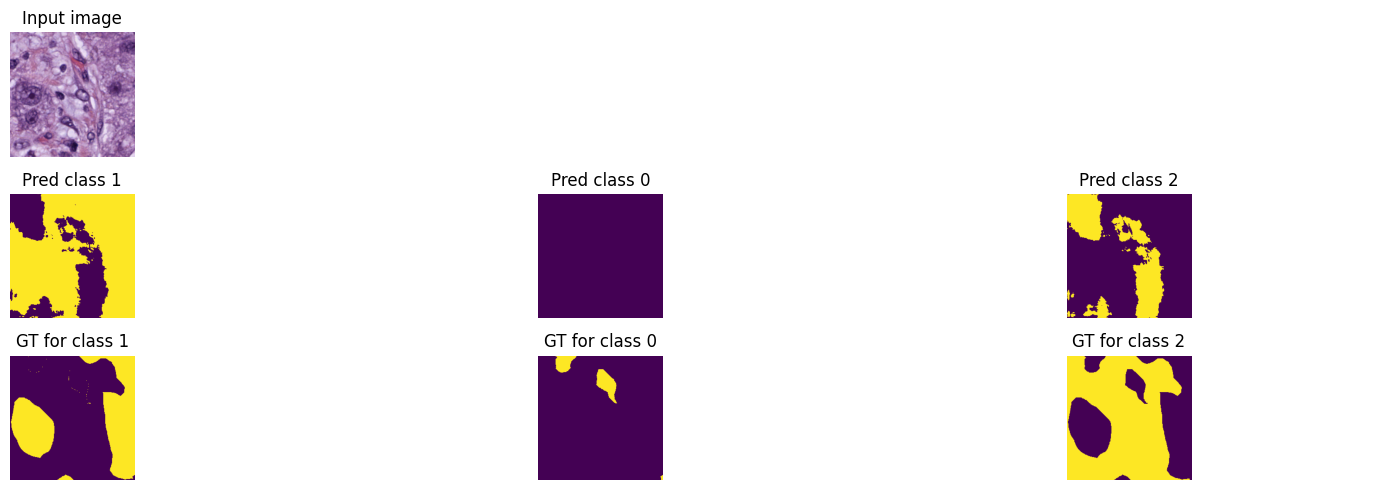

Train loss: 0.20708 | Time: 124m 49s | Val loss: 0.32805
Train_DICE_avg: 0.65383 | Train_Jaccard_avg: 0.60441 | Train_Sensitivity_avg: 0.83536 | Train_Specificity_avg: 0.83923 
Class 0 - Train_DICE: 0.64527 | Train_Jaccard: 0.60287 | Train_Sensitivity: 0.83612 | Train_Specificity: 0.87257 
Class 1 - Train_DICE: 0.74726 | Train_Jaccard: 0.69898 | Train_Sensitivity: 0.85897 | Train_Specificity: 0.82508 
Class 2 - Train_DICE: 0.56898 | Train_Jaccard: 0.51138 | Train_Sensitivity: 0.81101 | Train_Specificity: 0.82003 
Val_DICE_avg: 0.60804 | Val_Jaccard_avg: 0.55892 | Val_Sensitivity_avg: 0.82847 | Val_Specificity_avg: 0.78951 
Class 0 - Val_DICE: 0.59997 | Val_Jaccard: 0.55822 | Val_Sensitivity: 0.77150 | Val_Specificity: 0.85810 
Class 1 - Val_DICE: 0.71995 | Val_Jaccard: 0.66859 | Val_Sensitivity: 0.85611 | Val_Specificity: 0.74342 
Class 2 - Val_DICE: 0.50419 | Val_Jaccard: 0.44996 | Val_Sensitivity: 0.85781 | Val_Specificity: 0.76699 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.20570 | Time: 127m 4s | Val loss: 0.32844
Train_DICE_avg: 0.65439 | Train_Jaccard_avg: 0.60477 | Train_Sensitivity_avg: 0.83512 | Train_Specificity_avg: 0.83767 
Class 0 - Train_DICE: 0.64096 | Train_Jaccard: 0.59842 | Train_Sensitivity: 0.82913 | Train_Specificity: 0.87108 
Class 1 - Train_DICE: 0.74865 | Train_Jaccard: 0.70073 | Train_Sensitivity: 0.86056 | Train_Specificity: 0.82324 
Class 2 - Train_DICE: 0.57356 | Train_Jaccard: 0.51518 | Train_Sensitivity: 0.81568 | Train_Specificity: 0.81870 
Val_DICE_avg: 0.60886 | Val_Jaccard_avg: 0.55964 | Val_Sensitivity_avg: 0.82497 | Val_Specificity_avg: 0.78790 
Class 0 - Val_DICE: 0.59261 | Val_Jaccard: 0.55095 | Val_Sensitivity: 0.76944 | Val_Specificity: 0.85405 
Class 1 - Val_DICE: 0.72285 | Val_Jaccard: 0.67115 | Val_Sensitivity: 0.84918 | Val_Specificity: 0.73856 
Class 2 - Val_DICE: 0.51112 | Val_Jaccard: 0.45681 | Val_Sensitivity: 0.85631 | Val_Specificity: 0.77107 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.20433 | Time: 129m 18s | Val loss: 0.34036
Train_DICE_avg: 0.65675 | Train_Jaccard_avg: 0.60721 | Train_Sensitivity_avg: 0.83549 | Train_Specificity_avg: 0.83858 
Class 0 - Train_DICE: 0.64679 | Train_Jaccard: 0.60419 | Train_Sensitivity: 0.83446 | Train_Specificity: 0.87151 
Class 1 - Train_DICE: 0.74927 | Train_Jaccard: 0.70107 | Train_Sensitivity: 0.85988 | Train_Specificity: 0.82376 
Class 2 - Train_DICE: 0.57418 | Train_Jaccard: 0.51638 | Train_Sensitivity: 0.81213 | Train_Specificity: 0.82047 
Val_DICE_avg: 0.60646 | Val_Jaccard_avg: 0.55699 | Val_Sensitivity_avg: 0.82758 | Val_Specificity_avg: 0.79187 
Class 0 - Val_DICE: 0.59230 | Val_Jaccard: 0.54930 | Val_Sensitivity: 0.75143 | Val_Specificity: 0.86464 
Class 1 - Val_DICE: 0.72503 | Val_Jaccard: 0.67362 | Val_Sensitivity: 0.86447 | Val_Specificity: 0.74705 
Class 2 - Val_DICE: 0.50206 | Val_Jaccard: 0.44805 | Val_Sensitivity: 0.86683 | Val_Specificity: 0.76394 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.20318 | Time: 131m 34s | Val loss: 0.33319
Train_DICE_avg: 0.65749 | Train_Jaccard_avg: 0.60779 | Train_Sensitivity_avg: 0.83641 | Train_Specificity_avg: 0.84191 
Class 0 - Train_DICE: 0.64945 | Train_Jaccard: 0.60623 | Train_Sensitivity: 0.83538 | Train_Specificity: 0.87410 
Class 1 - Train_DICE: 0.74764 | Train_Jaccard: 0.69984 | Train_Sensitivity: 0.86050 | Train_Specificity: 0.83042 
Class 2 - Train_DICE: 0.57537 | Train_Jaccard: 0.51730 | Train_Sensitivity: 0.81336 | Train_Specificity: 0.82122 
Val_DICE_avg: 0.60983 | Val_Jaccard_avg: 0.56038 | Val_Sensitivity_avg: 0.82958 | Val_Specificity_avg: 0.78906 
Class 0 - Val_DICE: 0.59827 | Val_Jaccard: 0.55576 | Val_Sensitivity: 0.76441 | Val_Specificity: 0.86037 
Class 1 - Val_DICE: 0.72624 | Val_Jaccard: 0.67463 | Val_Sensitivity: 0.86106 | Val_Specificity: 0.74197 
Class 2 - Val_DICE: 0.50497 | Val_Jaccard: 0.45074 | Val_Sensitivity: 0.86327 | Val_Specificity: 0.76483 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.20285 | Time: 133m 48s | Val loss: 0.33544
Train_DICE_avg: 0.65858 | Train_Jaccard_avg: 0.60893 | Train_Sensitivity_avg: 0.83843 | Train_Specificity_avg: 0.84078 
Class 0 - Train_DICE: 0.65057 | Train_Jaccard: 0.60746 | Train_Sensitivity: 0.83873 | Train_Specificity: 0.87213 
Class 1 - Train_DICE: 0.75135 | Train_Jaccard: 0.70356 | Train_Sensitivity: 0.86251 | Train_Specificity: 0.82744 
Class 2 - Train_DICE: 0.57383 | Train_Jaccard: 0.51578 | Train_Sensitivity: 0.81405 | Train_Specificity: 0.82277 
Val_DICE_avg: 0.60591 | Val_Jaccard_avg: 0.55673 | Val_Sensitivity_avg: 0.82734 | Val_Specificity_avg: 0.79059 
Class 0 - Val_DICE: 0.59056 | Val_Jaccard: 0.54814 | Val_Sensitivity: 0.75366 | Val_Specificity: 0.86253 
Class 1 - Val_DICE: 0.72698 | Val_Jaccard: 0.67571 | Val_Sensitivity: 0.86594 | Val_Specificity: 0.74471 
Class 2 - Val_DICE: 0.50018 | Val_Jaccard: 0.44632 | Val_Sensitivity: 0.86243 | Val_Specificity: 0.76454 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


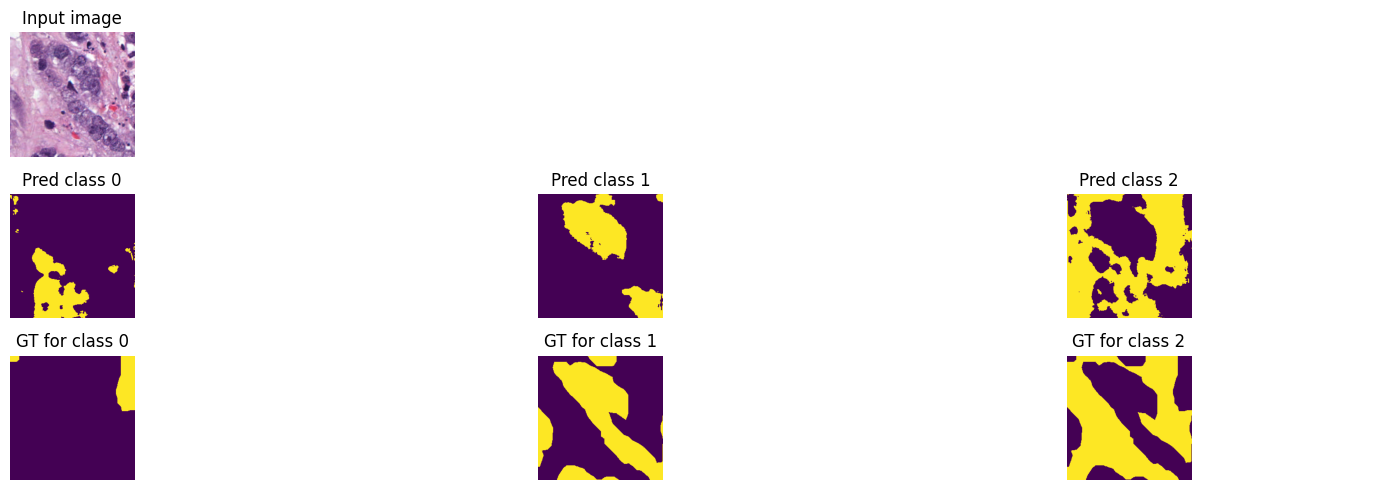

Train loss: 0.20156 | Time: 136m 3s | Val loss: 0.34029
Train_DICE_avg: 0.65892 | Train_Jaccard_avg: 0.60936 | Train_Sensitivity_avg: 0.83451 | Train_Specificity_avg: 0.84144 
Class 0 - Train_DICE: 0.65244 | Train_Jaccard: 0.60943 | Train_Sensitivity: 0.83635 | Train_Specificity: 0.87396 
Class 1 - Train_DICE: 0.74874 | Train_Jaccard: 0.70086 | Train_Sensitivity: 0.85681 | Train_Specificity: 0.82670 
Class 2 - Train_DICE: 0.57559 | Train_Jaccard: 0.51778 | Train_Sensitivity: 0.81038 | Train_Specificity: 0.82367 
Val_DICE_avg: 0.60723 | Val_Jaccard_avg: 0.55794 | Val_Sensitivity_avg: 0.82578 | Val_Specificity_avg: 0.79115 
Class 0 - Val_DICE: 0.59092 | Val_Jaccard: 0.54815 | Val_Sensitivity: 0.74749 | Val_Specificity: 0.86469 
Class 1 - Val_DICE: 0.73018 | Val_Jaccard: 0.67942 | Val_Sensitivity: 0.87030 | Val_Specificity: 0.74225 
Class 2 - Val_DICE: 0.50059 | Val_Jaccard: 0.44624 | Val_Sensitivity: 0.85955 | Val_Specificity: 0.76652 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [21]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [22]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Global Performance Metrics:
Loss mean: 0.34522, std: 0.09163
Dice Coefficient mean: 0.60561, std: 0.23850
Jaccard Index mean: 0.55242, std: 0.25333
Sensitivity mean: 0.71396, std: 0.21317
Specificity mean: 0.84355, std: 0.12069

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.57246, std: 0.41719
Jaccard mean: 0.52331, std: 0.41627
Sensitivity mean: 0.76909, std: 0.35989
Specificity mean: 0.83174, std: 0.29155

Class 1:
Dice mean: 0.73243, std: 0.35637
Jaccard mean: 0.68099, std: 0.36484
Sensitivity mean: 0.80870, std: 0.31855
Specificity mean: 0.82843, std: 0.30624

Class 2:
Dice mean: 0.51195, std: 0.40685
Jaccard mean: 0.45297, std: 0.39857
Sensitivity mean: 0.56408, std: 0.41964
Specificity mean: 0.87048, std: 0.23984


### Focal Loss

In [23]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-DeepLabV3+-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.67 GB
GPU Memory - Reserved: 1.59 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


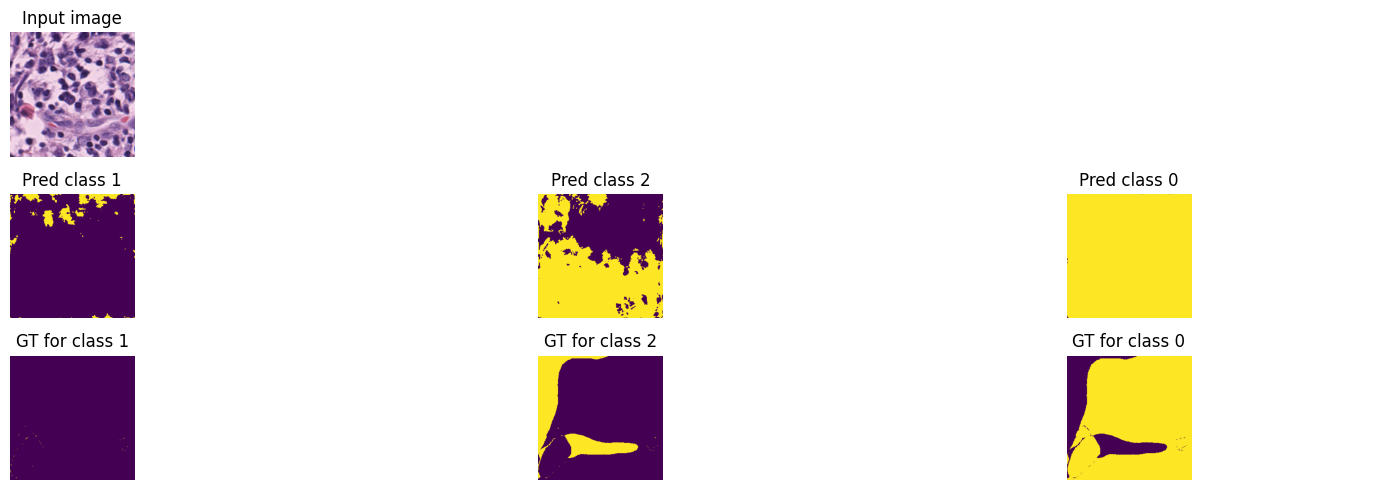

Train loss: 0.05482 | Time: 2m 14s | Val loss: 0.04108
Train_DICE_avg: 0.31674 | Train_Jaccard_avg: 0.26292 | Train_Sensitivity_avg: 0.53051 | Train_Specificity_avg: 0.72705 
Class 0 - Train_DICE: 0.26440 | Train_Jaccard: 0.22650 | Train_Sensitivity: 0.47758 | Train_Specificity: 0.79183 
Class 1 - Train_DICE: 0.40652 | Train_Jaccard: 0.34369 | Train_Sensitivity: 0.60633 | Train_Specificity: 0.67488 
Class 2 - Train_DICE: 0.27929 | Train_Jaccard: 0.21858 | Train_Sensitivity: 0.50761 | Train_Specificity: 0.71444 
Val_DICE_avg: 0.51082 | Val_Jaccard_avg: 0.46243 | Val_Sensitivity_avg: 0.73724 | Val_Specificity_avg: 0.74427 
Class 0 - Val_DICE: 0.51785 | Val_Jaccard: 0.48255 | Val_Sensitivity: 0.75143 | Val_Specificity: 0.80480 
Class 1 - Val_DICE: 0.60743 | Val_Jaccard: 0.55129 | Val_Sensitivity: 0.71292 | Val_Specificity: 0.70395 
Class 2 - Val_DICE: 0.40718 | Val_Jaccard: 0.35345 | Val_Sensitivity: 0.74736 | Val_Specificity: 0.72407 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.04958 | Time: 4m 28s | Val loss: 0.04025
Train_DICE_avg: 0.38940 | Train_Jaccard_avg: 0.33404 | Train_Sensitivity_avg: 0.59952 | Train_Specificity_avg: 0.74894 
Class 0 - Train_DICE: 0.35432 | Train_Jaccard: 0.31758 | Train_Sensitivity: 0.59670 | Train_Specificity: 0.80056 
Class 1 - Train_DICE: 0.47852 | Train_Jaccard: 0.41295 | Train_Sensitivity: 0.62807 | Train_Specificity: 0.71216 
Class 2 - Train_DICE: 0.33536 | Train_Jaccard: 0.27159 | Train_Sensitivity: 0.57378 | Train_Specificity: 0.73409 
Val_DICE_avg: 0.51624 | Val_Jaccard_avg: 0.46843 | Val_Sensitivity_avg: 0.75088 | Val_Specificity_avg: 0.75356 
Class 0 - Val_DICE: 0.51543 | Val_Jaccard: 0.47807 | Val_Sensitivity: 0.72252 | Val_Specificity: 0.81111 
Class 1 - Val_DICE: 0.61487 | Val_Jaccard: 0.55893 | Val_Sensitivity: 0.70433 | Val_Specificity: 0.72652 
Class 2 - Val_DICE: 0.41842 | Val_Jaccard: 0.36831 | Val_Sensitivity: 0.82579 | Val_Specificity: 0.72305 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.04843 | Time: 6m 41s | Val loss: 0.04008
Train_DICE_avg: 0.40511 | Train_Jaccard_avg: 0.34996 | Train_Sensitivity_avg: 0.62155 | Train_Specificity_avg: 0.75369 
Class 0 - Train_DICE: 0.37367 | Train_Jaccard: 0.33712 | Train_Sensitivity: 0.62944 | Train_Specificity: 0.80393 
Class 1 - Train_DICE: 0.49636 | Train_Jaccard: 0.43051 | Train_Sensitivity: 0.64826 | Train_Specificity: 0.71832 
Class 2 - Train_DICE: 0.34531 | Train_Jaccard: 0.28226 | Train_Sensitivity: 0.58695 | Train_Specificity: 0.73883 
Val_DICE_avg: 0.51880 | Val_Jaccard_avg: 0.47102 | Val_Sensitivity_avg: 0.75667 | Val_Specificity_avg: 0.75882 
Class 0 - Val_DICE: 0.52172 | Val_Jaccard: 0.48300 | Val_Sensitivity: 0.72886 | Val_Specificity: 0.81498 
Class 1 - Val_DICE: 0.62116 | Val_Jaccard: 0.56559 | Val_Sensitivity: 0.70638 | Val_Specificity: 0.73847 
Class 2 - Val_DICE: 0.41351 | Val_Jaccard: 0.36445 | Val_Sensitivity: 0.83478 | Val_Specificity: 0.72300 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.04741 | Time: 8m 55s | Val loss: 0.03919
Train_DICE_avg: 0.41415 | Train_Jaccard_avg: 0.35947 | Train_Sensitivity_avg: 0.63044 | Train_Specificity_avg: 0.75814 
Class 0 - Train_DICE: 0.37911 | Train_Jaccard: 0.34242 | Train_Sensitivity: 0.63083 | Train_Specificity: 0.80871 
Class 1 - Train_DICE: 0.50722 | Train_Jaccard: 0.44241 | Train_Sensitivity: 0.65432 | Train_Specificity: 0.72427 
Class 2 - Train_DICE: 0.35613 | Train_Jaccard: 0.29359 | Train_Sensitivity: 0.60616 | Train_Specificity: 0.74143 
Val_DICE_avg: 0.53265 | Val_Jaccard_avg: 0.48438 | Val_Sensitivity_avg: 0.77217 | Val_Specificity_avg: 0.76004 
Class 0 - Val_DICE: 0.53217 | Val_Jaccard: 0.49348 | Val_Sensitivity: 0.73504 | Val_Specificity: 0.81758 
Class 1 - Val_DICE: 0.63072 | Val_Jaccard: 0.57545 | Val_Sensitivity: 0.74455 | Val_Specificity: 0.73150 
Class 2 - Val_DICE: 0.43507 | Val_Jaccard: 0.38420 | Val_Sensitivity: 0.83692 | Val_Specificity: 0.73105 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.04691 | Time: 11m 8s | Val loss: 0.03939
Train_DICE_avg: 0.42187 | Train_Jaccard_avg: 0.36774 | Train_Sensitivity_avg: 0.64088 | Train_Specificity_avg: 0.75894 
Class 0 - Train_DICE: 0.39095 | Train_Jaccard: 0.35439 | Train_Sensitivity: 0.64675 | Train_Specificity: 0.80770 
Class 1 - Train_DICE: 0.51096 | Train_Jaccard: 0.44699 | Train_Sensitivity: 0.66216 | Train_Specificity: 0.72605 
Class 2 - Train_DICE: 0.36370 | Train_Jaccard: 0.30184 | Train_Sensitivity: 0.61372 | Train_Specificity: 0.74306 
Val_DICE_avg: 0.53169 | Val_Jaccard_avg: 0.48429 | Val_Sensitivity_avg: 0.77779 | Val_Specificity_avg: 0.76168 
Class 0 - Val_DICE: 0.54985 | Val_Jaccard: 0.51262 | Val_Sensitivity: 0.76748 | Val_Specificity: 0.81843 
Class 1 - Val_DICE: 0.62290 | Val_Jaccard: 0.56758 | Val_Sensitivity: 0.71467 | Val_Specificity: 0.74111 
Class 2 - Val_DICE: 0.42233 | Val_Jaccard: 0.37266 | Val_Sensitivity: 0.85122 | Val_Specificity: 0.72548 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


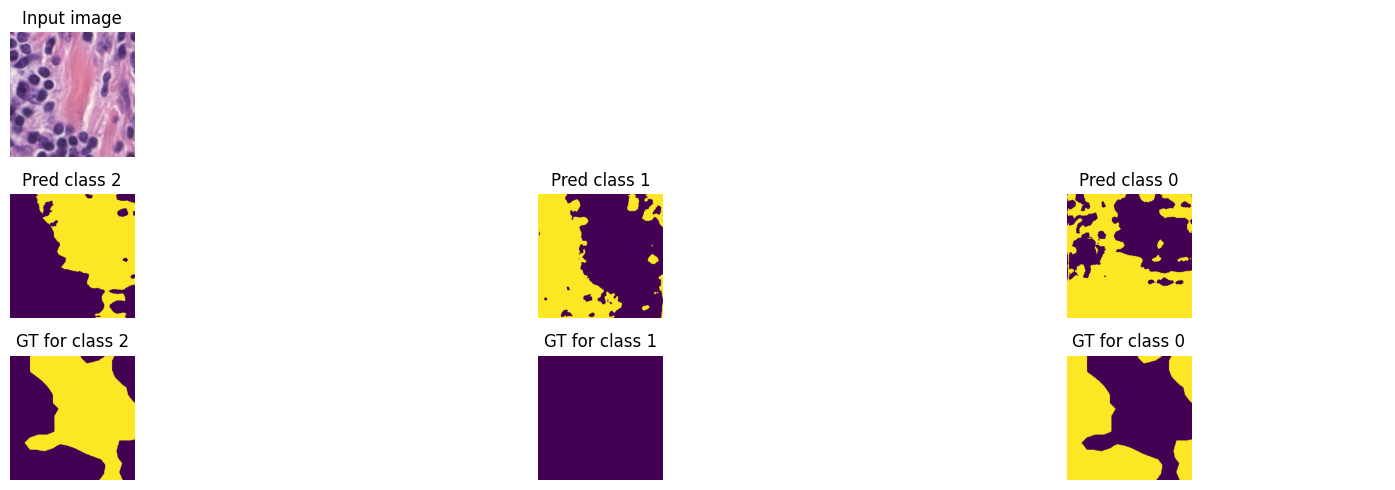

Train loss: 0.04625 | Time: 13m 21s | Val loss: 0.03963
Train_DICE_avg: 0.43280 | Train_Jaccard_avg: 0.37869 | Train_Sensitivity_avg: 0.65393 | Train_Specificity_avg: 0.76227 
Class 0 - Train_DICE: 0.40758 | Train_Jaccard: 0.37086 | Train_Sensitivity: 0.66644 | Train_Specificity: 0.81039 
Class 1 - Train_DICE: 0.51788 | Train_Jaccard: 0.45447 | Train_Sensitivity: 0.66862 | Train_Specificity: 0.72938 
Class 2 - Train_DICE: 0.37295 | Train_Jaccard: 0.31073 | Train_Sensitivity: 0.62675 | Train_Specificity: 0.74704 
Val_DICE_avg: 0.53230 | Val_Jaccard_avg: 0.48451 | Val_Sensitivity_avg: 0.77593 | Val_Specificity_avg: 0.76276 
Class 0 - Val_DICE: 0.53708 | Val_Jaccard: 0.49941 | Val_Sensitivity: 0.76097 | Val_Specificity: 0.81771 
Class 1 - Val_DICE: 0.62724 | Val_Jaccard: 0.57226 | Val_Sensitivity: 0.70912 | Val_Specificity: 0.74182 
Class 2 - Val_DICE: 0.43258 | Val_Jaccard: 0.38187 | Val_Sensitivity: 0.85770 | Val_Specificity: 0.72874 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.04552 | Time: 15m 35s | Val loss: 0.03942
Train_DICE_avg: 0.43557 | Train_Jaccard_avg: 0.38174 | Train_Sensitivity_avg: 0.65347 | Train_Specificity_avg: 0.76334 
Class 0 - Train_DICE: 0.40560 | Train_Jaccard: 0.36900 | Train_Sensitivity: 0.66075 | Train_Specificity: 0.81163 
Class 1 - Train_DICE: 0.52403 | Train_Jaccard: 0.46080 | Train_Sensitivity: 0.67173 | Train_Specificity: 0.72860 
Class 2 - Train_DICE: 0.37709 | Train_Jaccard: 0.31543 | Train_Sensitivity: 0.62793 | Train_Specificity: 0.74978 
Val_DICE_avg: 0.53945 | Val_Jaccard_avg: 0.49298 | Val_Sensitivity_avg: 0.78841 | Val_Specificity_avg: 0.77131 
Class 0 - Val_DICE: 0.55878 | Val_Jaccard: 0.52207 | Val_Sensitivity: 0.78636 | Val_Specificity: 0.82006 
Class 1 - Val_DICE: 0.62702 | Val_Jaccard: 0.57304 | Val_Sensitivity: 0.70818 | Val_Specificity: 0.76714 
Class 2 - Val_DICE: 0.43254 | Val_Jaccard: 0.38384 | Val_Sensitivity: 0.87069 | Val_Specificity: 0.72672 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.04513 | Time: 17m 48s | Val loss: 0.03868
Train_DICE_avg: 0.43947 | Train_Jaccard_avg: 0.38553 | Train_Sensitivity_avg: 0.65787 | Train_Specificity_avg: 0.76605 
Class 0 - Train_DICE: 0.40944 | Train_Jaccard: 0.37247 | Train_Sensitivity: 0.66488 | Train_Specificity: 0.81252 
Class 1 - Train_DICE: 0.52971 | Train_Jaccard: 0.46707 | Train_Sensitivity: 0.67812 | Train_Specificity: 0.73572 
Class 2 - Train_DICE: 0.37926 | Train_Jaccard: 0.31705 | Train_Sensitivity: 0.63060 | Train_Specificity: 0.74992 
Val_DICE_avg: 0.53904 | Val_Jaccard_avg: 0.49130 | Val_Sensitivity_avg: 0.78265 | Val_Specificity_avg: 0.76746 
Class 0 - Val_DICE: 0.53833 | Val_Jaccard: 0.50116 | Val_Sensitivity: 0.76530 | Val_Specificity: 0.81931 
Class 1 - Val_DICE: 0.63313 | Val_Jaccard: 0.57835 | Val_Sensitivity: 0.73026 | Val_Specificity: 0.74940 
Class 2 - Val_DICE: 0.44565 | Val_Jaccard: 0.39441 | Val_Sensitivity: 0.85239 | Val_Specificity: 0.73369 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.04461 | Time: 20m 2s | Val loss: 0.03892
Train_DICE_avg: 0.44156 | Train_Jaccard_avg: 0.38783 | Train_Sensitivity_avg: 0.65873 | Train_Specificity_avg: 0.76894 
Class 0 - Train_DICE: 0.41112 | Train_Jaccard: 0.37419 | Train_Sensitivity: 0.66904 | Train_Specificity: 0.81272 
Class 1 - Train_DICE: 0.53231 | Train_Jaccard: 0.46963 | Train_Sensitivity: 0.67388 | Train_Specificity: 0.74056 
Class 2 - Train_DICE: 0.38123 | Train_Jaccard: 0.31966 | Train_Sensitivity: 0.63328 | Train_Specificity: 0.75354 
Val_DICE_avg: 0.53746 | Val_Jaccard_avg: 0.49045 | Val_Sensitivity_avg: 0.78863 | Val_Specificity_avg: 0.77232 
Class 0 - Val_DICE: 0.52958 | Val_Jaccard: 0.49150 | Val_Sensitivity: 0.74495 | Val_Specificity: 0.82330 
Class 1 - Val_DICE: 0.64132 | Val_Jaccard: 0.58743 | Val_Sensitivity: 0.74199 | Val_Specificity: 0.76258 
Class 2 - Val_DICE: 0.44147 | Val_Jaccard: 0.39241 | Val_Sensitivity: 0.87896 | Val_Specificity: 0.73109 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.04420 | Time: 22m 15s | Val loss: 0.03820
Train_DICE_avg: 0.44766 | Train_Jaccard_avg: 0.39380 | Train_Sensitivity_avg: 0.66334 | Train_Specificity_avg: 0.76953 
Class 0 - Train_DICE: 0.42284 | Train_Jaccard: 0.38494 | Train_Sensitivity: 0.67544 | Train_Specificity: 0.81439 
Class 1 - Train_DICE: 0.53391 | Train_Jaccard: 0.47198 | Train_Sensitivity: 0.67722 | Train_Specificity: 0.74081 
Class 2 - Train_DICE: 0.38624 | Train_Jaccard: 0.32450 | Train_Sensitivity: 0.63735 | Train_Specificity: 0.75340 
Val_DICE_avg: 0.54479 | Val_Jaccard_avg: 0.49606 | Val_Sensitivity_avg: 0.77908 | Val_Specificity_avg: 0.77158 
Class 0 - Val_DICE: 0.54003 | Val_Jaccard: 0.50081 | Val_Sensitivity: 0.74459 | Val_Specificity: 0.82772 
Class 1 - Val_DICE: 0.64042 | Val_Jaccard: 0.58616 | Val_Sensitivity: 0.75279 | Val_Specificity: 0.74601 
Class 2 - Val_DICE: 0.45393 | Val_Jaccard: 0.40121 | Val_Sensitivity: 0.83986 | Val_Specificity: 0.74102 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


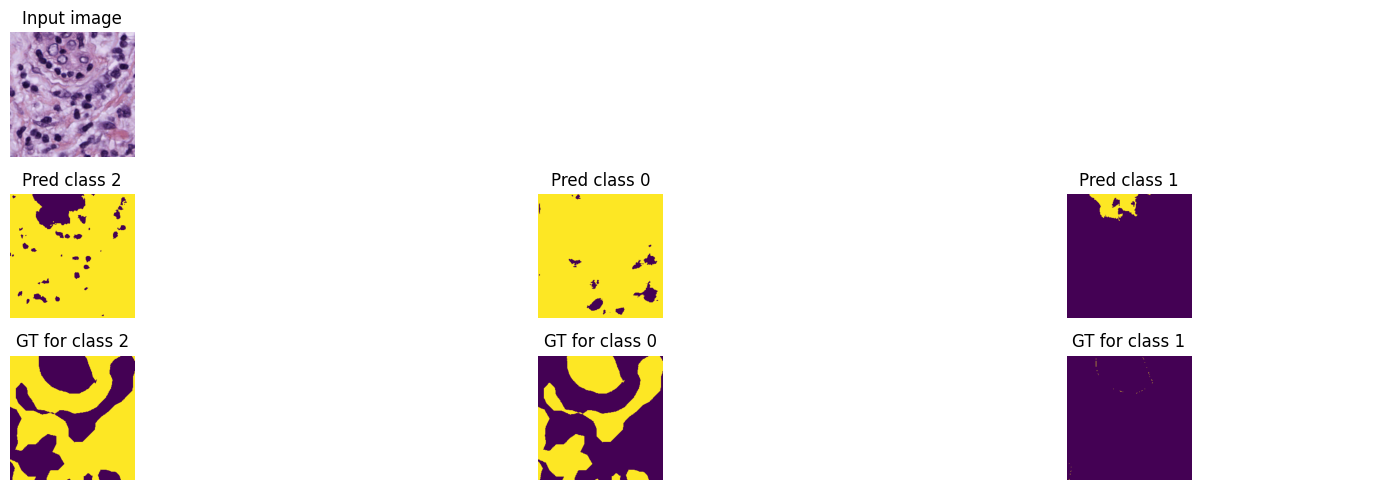

Train loss: 0.04402 | Time: 24m 32s | Val loss: 0.03814
Train_DICE_avg: 0.44797 | Train_Jaccard_avg: 0.39466 | Train_Sensitivity_avg: 0.66731 | Train_Specificity_avg: 0.76864 
Class 0 - Train_DICE: 0.42247 | Train_Jaccard: 0.38548 | Train_Sensitivity: 0.67946 | Train_Specificity: 0.81521 
Class 1 - Train_DICE: 0.53762 | Train_Jaccard: 0.47553 | Train_Sensitivity: 0.68405 | Train_Specificity: 0.73742 
Class 2 - Train_DICE: 0.38384 | Train_Jaccard: 0.32296 | Train_Sensitivity: 0.63841 | Train_Specificity: 0.75330 
Val_DICE_avg: 0.54709 | Val_Jaccard_avg: 0.49904 | Val_Sensitivity_avg: 0.79112 | Val_Specificity_avg: 0.77161 
Class 0 - Val_DICE: 0.55222 | Val_Jaccard: 0.51418 | Val_Sensitivity: 0.77337 | Val_Specificity: 0.82270 
Class 1 - Val_DICE: 0.63811 | Val_Jaccard: 0.58341 | Val_Sensitivity: 0.73526 | Val_Specificity: 0.75613 
Class 2 - Val_DICE: 0.45096 | Val_Jaccard: 0.39953 | Val_Sensitivity: 0.86474 | Val_Specificity: 0.73602 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.04336 | Time: 26m 49s | Val loss: 0.03802
Train_DICE_avg: 0.45151 | Train_Jaccard_avg: 0.39807 | Train_Sensitivity_avg: 0.66655 | Train_Specificity_avg: 0.77157 
Class 0 - Train_DICE: 0.42550 | Train_Jaccard: 0.38781 | Train_Sensitivity: 0.67877 | Train_Specificity: 0.81518 
Class 1 - Train_DICE: 0.53969 | Train_Jaccard: 0.47805 | Train_Sensitivity: 0.68201 | Train_Specificity: 0.74381 
Class 2 - Train_DICE: 0.38932 | Train_Jaccard: 0.32835 | Train_Sensitivity: 0.63886 | Train_Specificity: 0.75574 
Val_DICE_avg: 0.54320 | Val_Jaccard_avg: 0.49505 | Val_Sensitivity_avg: 0.78303 | Val_Specificity_avg: 0.77202 
Class 0 - Val_DICE: 0.54276 | Val_Jaccard: 0.50475 | Val_Sensitivity: 0.75677 | Val_Specificity: 0.82798 
Class 1 - Val_DICE: 0.63417 | Val_Jaccard: 0.57903 | Val_Sensitivity: 0.72974 | Val_Specificity: 0.74986 
Class 2 - Val_DICE: 0.45269 | Val_Jaccard: 0.40137 | Val_Sensitivity: 0.86257 | Val_Specificity: 0.73823 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04287 | Time: 29m 5s | Val loss: 0.03722
Train_DICE_avg: 0.46029 | Train_Jaccard_avg: 0.40704 | Train_Sensitivity_avg: 0.67500 | Train_Specificity_avg: 0.77337 
Class 0 - Train_DICE: 0.43385 | Train_Jaccard: 0.39675 | Train_Sensitivity: 0.68969 | Train_Specificity: 0.81672 
Class 1 - Train_DICE: 0.54790 | Train_Jaccard: 0.48640 | Train_Sensitivity: 0.68728 | Train_Specificity: 0.74358 
Class 2 - Train_DICE: 0.39912 | Train_Jaccard: 0.33798 | Train_Sensitivity: 0.64803 | Train_Specificity: 0.75980 
Val_DICE_avg: 0.55574 | Val_Jaccard_avg: 0.50783 | Val_Sensitivity_avg: 0.79209 | Val_Specificity_avg: 0.77688 
Class 0 - Val_DICE: 0.55108 | Val_Jaccard: 0.51349 | Val_Sensitivity: 0.76775 | Val_Specificity: 0.83221 
Class 1 - Val_DICE: 0.65098 | Val_Jaccard: 0.59713 | Val_Sensitivity: 0.76901 | Val_Specificity: 0.74783 
Class 2 - Val_DICE: 0.46517 | Val_Jaccard: 0.41287 | Val_Sensitivity: 0.83950 | Val_Specificity: 0.75058 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.04233 | Time: 31m 22s | Val loss: 0.03721
Train_DICE_avg: 0.46340 | Train_Jaccard_avg: 0.41026 | Train_Sensitivity_avg: 0.67629 | Train_Specificity_avg: 0.77622 
Class 0 - Train_DICE: 0.43877 | Train_Jaccard: 0.40117 | Train_Sensitivity: 0.69038 | Train_Specificity: 0.81852 
Class 1 - Train_DICE: 0.55062 | Train_Jaccard: 0.48998 | Train_Sensitivity: 0.69212 | Train_Specificity: 0.75053 
Class 2 - Train_DICE: 0.40080 | Train_Jaccard: 0.33964 | Train_Sensitivity: 0.64637 | Train_Specificity: 0.75960 
Val_DICE_avg: 0.55382 | Val_Jaccard_avg: 0.50564 | Val_Sensitivity_avg: 0.79556 | Val_Specificity_avg: 0.77441 
Class 0 - Val_DICE: 0.55050 | Val_Jaccard: 0.51241 | Val_Sensitivity: 0.77487 | Val_Specificity: 0.82902 
Class 1 - Val_DICE: 0.64938 | Val_Jaccard: 0.59526 | Val_Sensitivity: 0.77123 | Val_Specificity: 0.74608 
Class 2 - Val_DICE: 0.46158 | Val_Jaccard: 0.40924 | Val_Sensitivity: 0.84058 | Val_Specificity: 0.74813 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.04171 | Time: 33m 38s | Val loss: 0.03722
Train_DICE_avg: 0.46573 | Train_Jaccard_avg: 0.41291 | Train_Sensitivity_avg: 0.67608 | Train_Specificity_avg: 0.77958 
Class 0 - Train_DICE: 0.43834 | Train_Jaccard: 0.40090 | Train_Sensitivity: 0.68867 | Train_Specificity: 0.82103 
Class 1 - Train_DICE: 0.55402 | Train_Jaccard: 0.49385 | Train_Sensitivity: 0.69217 | Train_Specificity: 0.75553 
Class 2 - Train_DICE: 0.40483 | Train_Jaccard: 0.34399 | Train_Sensitivity: 0.64741 | Train_Specificity: 0.76218 
Val_DICE_avg: 0.55381 | Val_Jaccard_avg: 0.50504 | Val_Sensitivity_avg: 0.78992 | Val_Specificity_avg: 0.77339 
Class 0 - Val_DICE: 0.55951 | Val_Jaccard: 0.52087 | Val_Sensitivity: 0.77858 | Val_Specificity: 0.83192 
Class 1 - Val_DICE: 0.63841 | Val_Jaccard: 0.58351 | Val_Sensitivity: 0.76362 | Val_Specificity: 0.73526 
Class 2 - Val_DICE: 0.46351 | Val_Jaccard: 0.41076 | Val_Sensitivity: 0.82757 | Val_Specificity: 0.75299 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


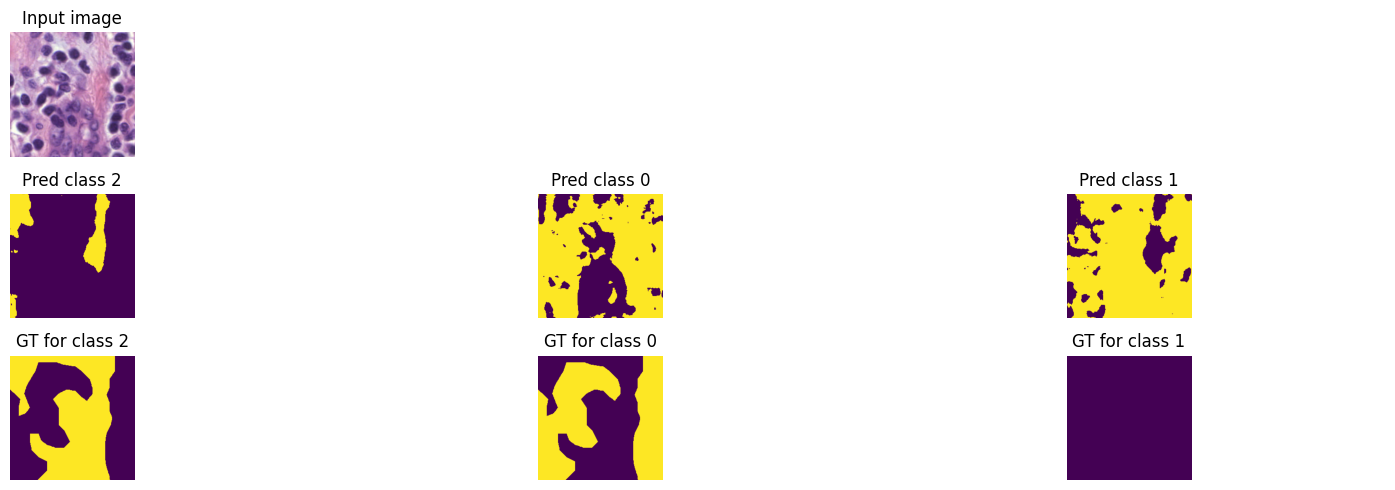

Train loss: 0.04139 | Time: 35m 55s | Val loss: 0.03742
Train_DICE_avg: 0.46937 | Train_Jaccard_avg: 0.41624 | Train_Sensitivity_avg: 0.67779 | Train_Specificity_avg: 0.77910 
Class 0 - Train_DICE: 0.44538 | Train_Jaccard: 0.40738 | Train_Sensitivity: 0.69325 | Train_Specificity: 0.82290 
Class 1 - Train_DICE: 0.55687 | Train_Jaccard: 0.49673 | Train_Sensitivity: 0.69199 | Train_Specificity: 0.75229 
Class 2 - Train_DICE: 0.40587 | Train_Jaccard: 0.34461 | Train_Sensitivity: 0.64814 | Train_Specificity: 0.76211 
Val_DICE_avg: 0.55661 | Val_Jaccard_avg: 0.50840 | Val_Sensitivity_avg: 0.79650 | Val_Specificity_avg: 0.77764 
Class 0 - Val_DICE: 0.56188 | Val_Jaccard: 0.52492 | Val_Sensitivity: 0.80280 | Val_Specificity: 0.82634 
Class 1 - Val_DICE: 0.64629 | Val_Jaccard: 0.59097 | Val_Sensitivity: 0.75330 | Val_Specificity: 0.75823 
Class 2 - Val_DICE: 0.46165 | Val_Jaccard: 0.40932 | Val_Sensitivity: 0.83341 | Val_Specificity: 0.74834 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.04079 | Time: 38m 12s | Val loss: 0.03658
Train_DICE_avg: 0.47430 | Train_Jaccard_avg: 0.42161 | Train_Sensitivity_avg: 0.68378 | Train_Specificity_avg: 0.78177 
Class 0 - Train_DICE: 0.44664 | Train_Jaccard: 0.40924 | Train_Sensitivity: 0.69501 | Train_Specificity: 0.82064 
Class 1 - Train_DICE: 0.56119 | Train_Jaccard: 0.50128 | Train_Sensitivity: 0.69994 | Train_Specificity: 0.75755 
Class 2 - Train_DICE: 0.41507 | Train_Jaccard: 0.35433 | Train_Sensitivity: 0.65638 | Train_Specificity: 0.76712 
Val_DICE_avg: 0.55711 | Val_Jaccard_avg: 0.50798 | Val_Sensitivity_avg: 0.79289 | Val_Specificity_avg: 0.77241 
Class 0 - Val_DICE: 0.55351 | Val_Jaccard: 0.51574 | Val_Sensitivity: 0.77970 | Val_Specificity: 0.82842 
Class 1 - Val_DICE: 0.64882 | Val_Jaccard: 0.59342 | Val_Sensitivity: 0.78625 | Val_Specificity: 0.73247 
Class 2 - Val_DICE: 0.46898 | Val_Jaccard: 0.41477 | Val_Sensitivity: 0.81270 | Val_Specificity: 0.75633 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.04059 | Time: 40m 28s | Val loss: 0.03702
Train_DICE_avg: 0.47409 | Train_Jaccard_avg: 0.42095 | Train_Sensitivity_avg: 0.68143 | Train_Specificity_avg: 0.78225 
Class 0 - Train_DICE: 0.44820 | Train_Jaccard: 0.40965 | Train_Sensitivity: 0.69396 | Train_Specificity: 0.82227 
Class 1 - Train_DICE: 0.55864 | Train_Jaccard: 0.49871 | Train_Sensitivity: 0.69592 | Train_Specificity: 0.75774 
Class 2 - Train_DICE: 0.41543 | Train_Jaccard: 0.35450 | Train_Sensitivity: 0.65439 | Train_Specificity: 0.76676 
Val_DICE_avg: 0.55840 | Val_Jaccard_avg: 0.50898 | Val_Sensitivity_avg: 0.79359 | Val_Specificity_avg: 0.77528 
Class 0 - Val_DICE: 0.55317 | Val_Jaccard: 0.51365 | Val_Sensitivity: 0.76310 | Val_Specificity: 0.83552 
Class 1 - Val_DICE: 0.65114 | Val_Jaccard: 0.59631 | Val_Sensitivity: 0.78111 | Val_Specificity: 0.73770 
Class 2 - Val_DICE: 0.47088 | Val_Jaccard: 0.41696 | Val_Sensitivity: 0.83657 | Val_Specificity: 0.75261 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.04001 | Time: 42m 45s | Val loss: 0.03673
Train_DICE_avg: 0.47795 | Train_Jaccard_avg: 0.42519 | Train_Sensitivity_avg: 0.68265 | Train_Specificity_avg: 0.78496 
Class 0 - Train_DICE: 0.45007 | Train_Jaccard: 0.41196 | Train_Sensitivity: 0.69458 | Train_Specificity: 0.82437 
Class 1 - Train_DICE: 0.56592 | Train_Jaccard: 0.50631 | Train_Sensitivity: 0.69609 | Train_Specificity: 0.76103 
Class 2 - Train_DICE: 0.41785 | Train_Jaccard: 0.35729 | Train_Sensitivity: 0.65730 | Train_Specificity: 0.76949 
Val_DICE_avg: 0.56598 | Val_Jaccard_avg: 0.51679 | Val_Sensitivity_avg: 0.79834 | Val_Specificity_avg: 0.77837 
Class 0 - Val_DICE: 0.56919 | Val_Jaccard: 0.52934 | Val_Sensitivity: 0.77130 | Val_Specificity: 0.83519 
Class 1 - Val_DICE: 0.65337 | Val_Jaccard: 0.59953 | Val_Sensitivity: 0.78417 | Val_Specificity: 0.74514 
Class 2 - Val_DICE: 0.47536 | Val_Jaccard: 0.42150 | Val_Sensitivity: 0.83956 | Val_Specificity: 0.75478 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03953 | Time: 45m 1s | Val loss: 0.03675
Train_DICE_avg: 0.48329 | Train_Jaccard_avg: 0.43056 | Train_Sensitivity_avg: 0.68507 | Train_Specificity_avg: 0.78640 
Class 0 - Train_DICE: 0.45637 | Train_Jaccard: 0.41786 | Train_Sensitivity: 0.69614 | Train_Specificity: 0.82541 
Class 1 - Train_DICE: 0.57134 | Train_Jaccard: 0.51227 | Train_Sensitivity: 0.70337 | Train_Specificity: 0.76230 
Class 2 - Train_DICE: 0.42216 | Train_Jaccard: 0.36156 | Train_Sensitivity: 0.65570 | Train_Specificity: 0.77150 
Val_DICE_avg: 0.56343 | Val_Jaccard_avg: 0.51437 | Val_Sensitivity_avg: 0.79887 | Val_Specificity_avg: 0.78040 
Class 0 - Val_DICE: 0.56630 | Val_Jaccard: 0.52610 | Val_Sensitivity: 0.77112 | Val_Specificity: 0.83350 
Class 1 - Val_DICE: 0.65412 | Val_Jaccard: 0.59978 | Val_Sensitivity: 0.78340 | Val_Specificity: 0.75331 
Class 2 - Val_DICE: 0.46988 | Val_Jaccard: 0.41722 | Val_Sensitivity: 0.84210 | Val_Specificity: 0.75440 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


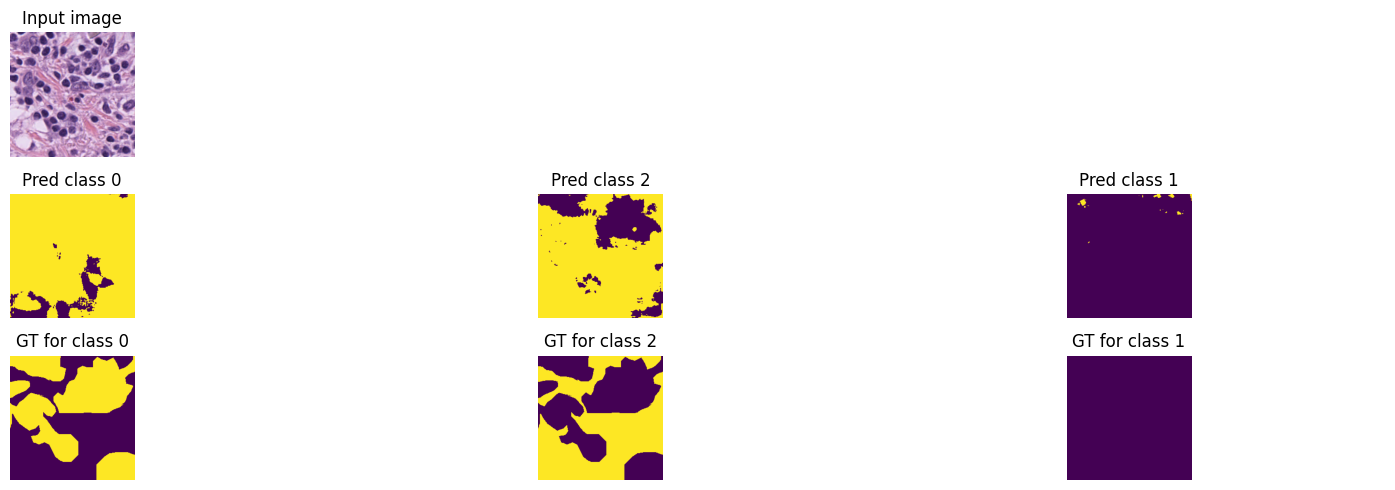

Train loss: 0.03955 | Time: 47m 19s | Val loss: 0.03640
Train_DICE_avg: 0.48625 | Train_Jaccard_avg: 0.43363 | Train_Sensitivity_avg: 0.69181 | Train_Specificity_avg: 0.78753 
Class 0 - Train_DICE: 0.45959 | Train_Jaccard: 0.42167 | Train_Sensitivity: 0.70343 | Train_Specificity: 0.82468 
Class 1 - Train_DICE: 0.57224 | Train_Jaccard: 0.51354 | Train_Sensitivity: 0.70773 | Train_Specificity: 0.76593 
Class 2 - Train_DICE: 0.42692 | Train_Jaccard: 0.36568 | Train_Sensitivity: 0.66428 | Train_Specificity: 0.77198 
Val_DICE_avg: 0.56739 | Val_Jaccard_avg: 0.51656 | Val_Sensitivity_avg: 0.79805 | Val_Specificity_avg: 0.77238 
Class 0 - Val_DICE: 0.56299 | Val_Jaccard: 0.52156 | Val_Sensitivity: 0.76434 | Val_Specificity: 0.83625 
Class 1 - Val_DICE: 0.65601 | Val_Jaccard: 0.60070 | Val_Sensitivity: 0.81635 | Val_Specificity: 0.71521 
Class 2 - Val_DICE: 0.48316 | Val_Jaccard: 0.42742 | Val_Sensitivity: 0.81346 | Val_Specificity: 0.76569 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03859 | Time: 49m 36s | Val loss: 0.03577
Train_DICE_avg: 0.49031 | Train_Jaccard_avg: 0.43800 | Train_Sensitivity_avg: 0.69214 | Train_Specificity_avg: 0.79136 
Class 0 - Train_DICE: 0.46202 | Train_Jaccard: 0.42355 | Train_Sensitivity: 0.70054 | Train_Specificity: 0.83060 
Class 1 - Train_DICE: 0.57966 | Train_Jaccard: 0.52137 | Train_Sensitivity: 0.70970 | Train_Specificity: 0.76735 
Class 2 - Train_DICE: 0.42924 | Train_Jaccard: 0.36907 | Train_Sensitivity: 0.66619 | Train_Specificity: 0.77612 
Val_DICE_avg: 0.57497 | Val_Jaccard_avg: 0.52441 | Val_Sensitivity_avg: 0.80405 | Val_Specificity_avg: 0.77219 
Class 0 - Val_DICE: 0.57206 | Val_Jaccard: 0.53163 | Val_Sensitivity: 0.77858 | Val_Specificity: 0.83703 
Class 1 - Val_DICE: 0.66473 | Val_Jaccard: 0.61029 | Val_Sensitivity: 0.82842 | Val_Specificity: 0.71276 
Class 2 - Val_DICE: 0.48812 | Val_Jaccard: 0.43130 | Val_Sensitivity: 0.80514 | Val_Specificity: 0.76677 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03773 | Time: 51m 53s | Val loss: 0.03560
Train_DICE_avg: 0.50103 | Train_Jaccard_avg: 0.44886 | Train_Sensitivity_avg: 0.69921 | Train_Specificity_avg: 0.79529 
Class 0 - Train_DICE: 0.47279 | Train_Jaccard: 0.43412 | Train_Sensitivity: 0.70885 | Train_Specificity: 0.82944 
Class 1 - Train_DICE: 0.59109 | Train_Jaccard: 0.53391 | Train_Sensitivity: 0.71877 | Train_Specificity: 0.77626 
Class 2 - Train_DICE: 0.43919 | Train_Jaccard: 0.37855 | Train_Sensitivity: 0.67001 | Train_Specificity: 0.78018 
Val_DICE_avg: 0.57462 | Val_Jaccard_avg: 0.52500 | Val_Sensitivity_avg: 0.80661 | Val_Specificity_avg: 0.77760 
Class 0 - Val_DICE: 0.56415 | Val_Jaccard: 0.52349 | Val_Sensitivity: 0.76586 | Val_Specificity: 0.83812 
Class 1 - Val_DICE: 0.67503 | Val_Jaccard: 0.62129 | Val_Sensitivity: 0.83335 | Val_Specificity: 0.72573 
Class 2 - Val_DICE: 0.48468 | Val_Jaccard: 0.43022 | Val_Sensitivity: 0.82063 | Val_Specificity: 0.76895 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03711 | Time: 54m 10s | Val loss: 0.03544
Train_DICE_avg: 0.50579 | Train_Jaccard_avg: 0.45345 | Train_Sensitivity_avg: 0.70302 | Train_Specificity_avg: 0.79913 
Class 0 - Train_DICE: 0.48369 | Train_Jaccard: 0.44426 | Train_Sensitivity: 0.71767 | Train_Specificity: 0.83426 
Class 1 - Train_DICE: 0.59323 | Train_Jaccard: 0.53616 | Train_Sensitivity: 0.71903 | Train_Specificity: 0.78088 
Class 2 - Train_DICE: 0.44046 | Train_Jaccard: 0.37992 | Train_Sensitivity: 0.67237 | Train_Specificity: 0.78225 
Val_DICE_avg: 0.57778 | Val_Jaccard_avg: 0.52795 | Val_Sensitivity_avg: 0.80525 | Val_Specificity_avg: 0.78023 
Class 0 - Val_DICE: 0.57732 | Val_Jaccard: 0.53714 | Val_Sensitivity: 0.78263 | Val_Specificity: 0.83571 
Class 1 - Val_DICE: 0.67138 | Val_Jaccard: 0.61780 | Val_Sensitivity: 0.81296 | Val_Specificity: 0.74182 
Class 2 - Val_DICE: 0.48463 | Val_Jaccard: 0.42891 | Val_Sensitivity: 0.82016 | Val_Specificity: 0.76315 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03638 | Time: 56m 26s | Val loss: 0.03576
Train_DICE_avg: 0.51214 | Train_Jaccard_avg: 0.45998 | Train_Sensitivity_avg: 0.70333 | Train_Specificity_avg: 0.79958 
Class 0 - Train_DICE: 0.48272 | Train_Jaccard: 0.44317 | Train_Sensitivity: 0.70920 | Train_Specificity: 0.83607 
Class 1 - Train_DICE: 0.60681 | Train_Jaccard: 0.55042 | Train_Sensitivity: 0.73185 | Train_Specificity: 0.78128 
Class 2 - Train_DICE: 0.44688 | Train_Jaccard: 0.38634 | Train_Sensitivity: 0.66893 | Train_Specificity: 0.78138 
Val_DICE_avg: 0.57199 | Val_Jaccard_avg: 0.52063 | Val_Sensitivity_avg: 0.79305 | Val_Specificity_avg: 0.77601 
Class 0 - Val_DICE: 0.56745 | Val_Jaccard: 0.52516 | Val_Sensitivity: 0.74440 | Val_Specificity: 0.84458 
Class 1 - Val_DICE: 0.66783 | Val_Jaccard: 0.61409 | Val_Sensitivity: 0.84825 | Val_Specificity: 0.71464 
Class 2 - Val_DICE: 0.48068 | Val_Jaccard: 0.42264 | Val_Sensitivity: 0.78651 | Val_Specificity: 0.76881 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


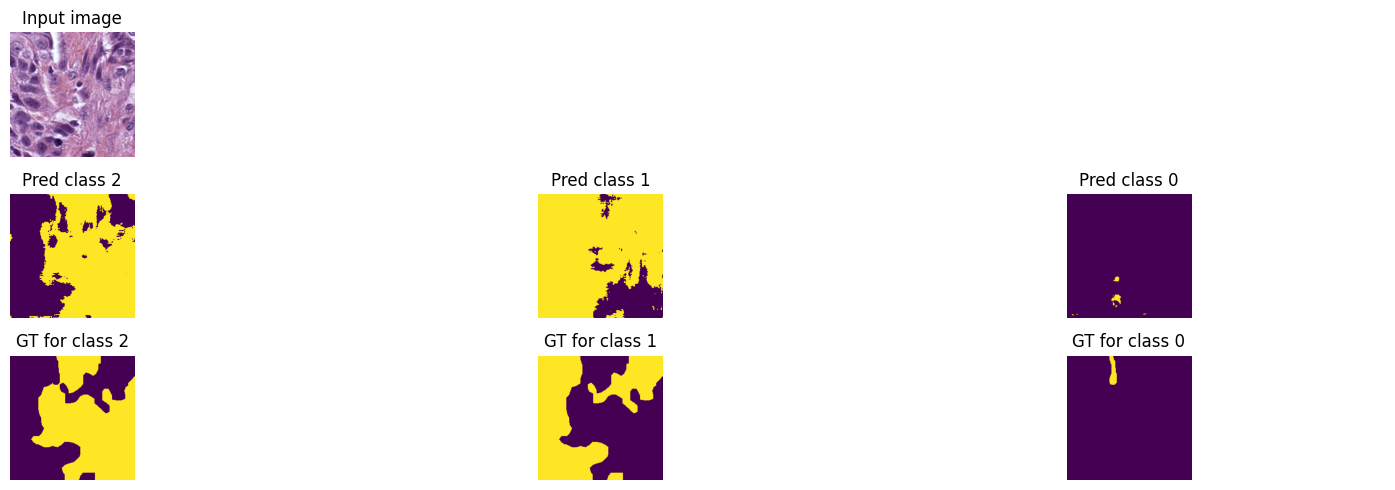

Train loss: 0.03572 | Time: 58m 43s | Val loss: 0.03636
Train_DICE_avg: 0.51418 | Train_Jaccard_avg: 0.46209 | Train_Sensitivity_avg: 0.70350 | Train_Specificity_avg: 0.80228 
Class 0 - Train_DICE: 0.49312 | Train_Jaccard: 0.45330 | Train_Sensitivity: 0.71610 | Train_Specificity: 0.83614 
Class 1 - Train_DICE: 0.60118 | Train_Jaccard: 0.54514 | Train_Sensitivity: 0.72286 | Train_Specificity: 0.78875 
Class 2 - Train_DICE: 0.44822 | Train_Jaccard: 0.38784 | Train_Sensitivity: 0.67153 | Train_Specificity: 0.78197 
Val_DICE_avg: 0.56754 | Val_Jaccard_avg: 0.51723 | Val_Sensitivity_avg: 0.79837 | Val_Specificity_avg: 0.77686 
Class 0 - Val_DICE: 0.56434 | Val_Jaccard: 0.52089 | Val_Sensitivity: 0.72970 | Val_Specificity: 0.84351 
Class 1 - Val_DICE: 0.67366 | Val_Jaccard: 0.62046 | Val_Sensitivity: 0.82181 | Val_Specificity: 0.73137 
Class 2 - Val_DICE: 0.46462 | Val_Jaccard: 0.41034 | Val_Sensitivity: 0.84359 | Val_Specificity: 0.75571 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.03531 | Time: 61m 0s | Val loss: 0.03515
Train_DICE_avg: 0.51921 | Train_Jaccard_avg: 0.46718 | Train_Sensitivity_avg: 0.70668 | Train_Specificity_avg: 0.80507 
Class 0 - Train_DICE: 0.49368 | Train_Jaccard: 0.45336 | Train_Sensitivity: 0.71124 | Train_Specificity: 0.84022 
Class 1 - Train_DICE: 0.61036 | Train_Jaccard: 0.55473 | Train_Sensitivity: 0.73333 | Train_Specificity: 0.78651 
Class 2 - Train_DICE: 0.45360 | Train_Jaccard: 0.39346 | Train_Sensitivity: 0.67546 | Train_Specificity: 0.78848 
Val_DICE_avg: 0.57699 | Val_Jaccard_avg: 0.52635 | Val_Sensitivity_avg: 0.80567 | Val_Specificity_avg: 0.77673 
Class 0 - Val_DICE: 0.57174 | Val_Jaccard: 0.53006 | Val_Sensitivity: 0.76579 | Val_Specificity: 0.83864 
Class 1 - Val_DICE: 0.67925 | Val_Jaccard: 0.62607 | Val_Sensitivity: 0.84364 | Val_Specificity: 0.72519 
Class 2 - Val_DICE: 0.47997 | Val_Jaccard: 0.42291 | Val_Sensitivity: 0.80758 | Val_Specificity: 0.76634 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.03459 | Time: 63m 17s | Val loss: 0.03508
Train_DICE_avg: 0.52763 | Train_Jaccard_avg: 0.47548 | Train_Sensitivity_avg: 0.71506 | Train_Specificity_avg: 0.80905 
Class 0 - Train_DICE: 0.50671 | Train_Jaccard: 0.46676 | Train_Sensitivity: 0.72675 | Train_Specificity: 0.84222 
Class 1 - Train_DICE: 0.62020 | Train_Jaccard: 0.56450 | Train_Sensitivity: 0.74017 | Train_Specificity: 0.79272 
Class 2 - Train_DICE: 0.45598 | Train_Jaccard: 0.39518 | Train_Sensitivity: 0.67825 | Train_Specificity: 0.79220 
Val_DICE_avg: 0.58124 | Val_Jaccard_avg: 0.53087 | Val_Sensitivity_avg: 0.80144 | Val_Specificity_avg: 0.78387 
Class 0 - Val_DICE: 0.57438 | Val_Jaccard: 0.53120 | Val_Sensitivity: 0.75014 | Val_Specificity: 0.84043 
Class 1 - Val_DICE: 0.68910 | Val_Jaccard: 0.63685 | Val_Sensitivity: 0.83171 | Val_Specificity: 0.75009 
Class 2 - Val_DICE: 0.48024 | Val_Jaccard: 0.42455 | Val_Sensitivity: 0.82246 | Val_Specificity: 0.76108 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03400 | Time: 65m 34s | Val loss: 0.03489
Train_DICE_avg: 0.53030 | Train_Jaccard_avg: 0.47811 | Train_Sensitivity_avg: 0.71366 | Train_Specificity_avg: 0.81018 
Class 0 - Train_DICE: 0.50686 | Train_Jaccard: 0.46615 | Train_Sensitivity: 0.72022 | Train_Specificity: 0.84355 
Class 1 - Train_DICE: 0.62110 | Train_Jaccard: 0.56593 | Train_Sensitivity: 0.73857 | Train_Specificity: 0.79449 
Class 2 - Train_DICE: 0.46294 | Train_Jaccard: 0.40224 | Train_Sensitivity: 0.68217 | Train_Specificity: 0.79250 
Val_DICE_avg: 0.58152 | Val_Jaccard_avg: 0.53140 | Val_Sensitivity_avg: 0.80352 | Val_Specificity_avg: 0.78302 
Class 0 - Val_DICE: 0.56872 | Val_Jaccard: 0.52694 | Val_Sensitivity: 0.76084 | Val_Specificity: 0.83769 
Class 1 - Val_DICE: 0.68890 | Val_Jaccard: 0.63701 | Val_Sensitivity: 0.84163 | Val_Specificity: 0.74187 
Class 2 - Val_DICE: 0.48693 | Val_Jaccard: 0.43027 | Val_Sensitivity: 0.80808 | Val_Specificity: 0.76949 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03361 | Time: 67m 51s | Val loss: 0.03573
Train_DICE_avg: 0.53346 | Train_Jaccard_avg: 0.48127 | Train_Sensitivity_avg: 0.71507 | Train_Specificity_avg: 0.81371 
Class 0 - Train_DICE: 0.50753 | Train_Jaccard: 0.46695 | Train_Sensitivity: 0.71904 | Train_Specificity: 0.84376 
Class 1 - Train_DICE: 0.62450 | Train_Jaccard: 0.56931 | Train_Sensitivity: 0.74453 | Train_Specificity: 0.80123 
Class 2 - Train_DICE: 0.46836 | Train_Jaccard: 0.40756 | Train_Sensitivity: 0.68165 | Train_Specificity: 0.79613 
Val_DICE_avg: 0.57945 | Val_Jaccard_avg: 0.52869 | Val_Sensitivity_avg: 0.80027 | Val_Specificity_avg: 0.78166 
Class 0 - Val_DICE: 0.57635 | Val_Jaccard: 0.53351 | Val_Sensitivity: 0.76481 | Val_Specificity: 0.83173 
Class 1 - Val_DICE: 0.68347 | Val_Jaccard: 0.63064 | Val_Sensitivity: 0.81813 | Val_Specificity: 0.75211 
Class 2 - Val_DICE: 0.47854 | Val_Jaccard: 0.42194 | Val_Sensitivity: 0.81786 | Val_Specificity: 0.76114 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


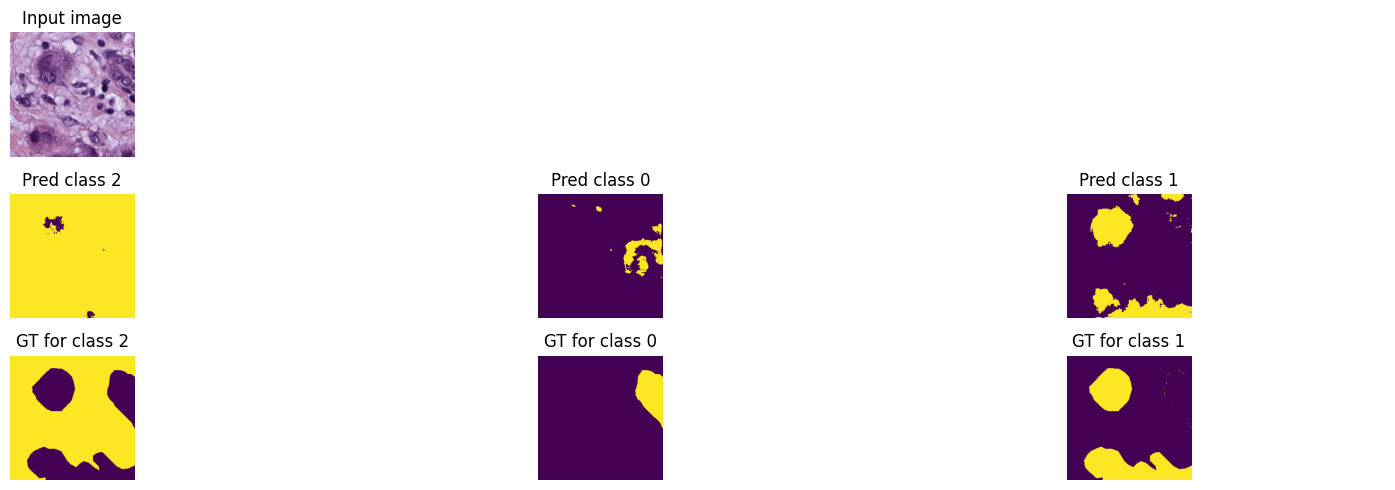

Train loss: 0.03313 | Time: 70m 9s | Val loss: 0.03491
Train_DICE_avg: 0.54093 | Train_Jaccard_avg: 0.48909 | Train_Sensitivity_avg: 0.72284 | Train_Specificity_avg: 0.81423 
Class 0 - Train_DICE: 0.51740 | Train_Jaccard: 0.47722 | Train_Sensitivity: 0.72902 | Train_Specificity: 0.84503 
Class 1 - Train_DICE: 0.63490 | Train_Jaccard: 0.58019 | Train_Sensitivity: 0.75195 | Train_Specificity: 0.80357 
Class 2 - Train_DICE: 0.47050 | Train_Jaccard: 0.40985 | Train_Sensitivity: 0.68754 | Train_Specificity: 0.79411 
Val_DICE_avg: 0.58810 | Val_Jaccard_avg: 0.53803 | Val_Sensitivity_avg: 0.80756 | Val_Specificity_avg: 0.78871 
Class 0 - Val_DICE: 0.59109 | Val_Jaccard: 0.54806 | Val_Sensitivity: 0.76688 | Val_Specificity: 0.84541 
Class 1 - Val_DICE: 0.69562 | Val_Jaccard: 0.64429 | Val_Sensitivity: 0.83852 | Val_Specificity: 0.75568 
Class 2 - Val_DICE: 0.47758 | Val_Jaccard: 0.42174 | Val_Sensitivity: 0.81729 | Val_Specificity: 0.76505 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.03221 | Time: 72m 24s | Val loss: 0.03477
Train_DICE_avg: 0.54867 | Train_Jaccard_avg: 0.49667 | Train_Sensitivity_avg: 0.72392 | Train_Specificity_avg: 0.81874 
Class 0 - Train_DICE: 0.52896 | Train_Jaccard: 0.48793 | Train_Sensitivity: 0.72882 | Train_Specificity: 0.84978 
Class 1 - Train_DICE: 0.64129 | Train_Jaccard: 0.58741 | Train_Sensitivity: 0.75999 | Train_Specificity: 0.80813 
Class 2 - Train_DICE: 0.47577 | Train_Jaccard: 0.41467 | Train_Sensitivity: 0.68294 | Train_Specificity: 0.79831 
Val_DICE_avg: 0.59067 | Val_Jaccard_avg: 0.54006 | Val_Sensitivity_avg: 0.80588 | Val_Specificity_avg: 0.78950 
Class 0 - Val_DICE: 0.59632 | Val_Jaccard: 0.55233 | Val_Sensitivity: 0.76399 | Val_Specificity: 0.84717 
Class 1 - Val_DICE: 0.69261 | Val_Jaccard: 0.64055 | Val_Sensitivity: 0.82451 | Val_Specificity: 0.75834 
Class 2 - Val_DICE: 0.48308 | Val_Jaccard: 0.42729 | Val_Sensitivity: 0.82914 | Val_Specificity: 0.76298 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.03132 | Time: 74m 38s | Val loss: 0.03515
Train_DICE_avg: 0.55913 | Train_Jaccard_avg: 0.50706 | Train_Sensitivity_avg: 0.73297 | Train_Specificity_avg: 0.82247 
Class 0 - Train_DICE: 0.53675 | Train_Jaccard: 0.49496 | Train_Sensitivity: 0.73393 | Train_Specificity: 0.85386 
Class 1 - Train_DICE: 0.65432 | Train_Jaccard: 0.60043 | Train_Sensitivity: 0.76671 | Train_Specificity: 0.81004 
Class 2 - Train_DICE: 0.48633 | Train_Jaccard: 0.42580 | Train_Sensitivity: 0.69826 | Train_Specificity: 0.80351 
Val_DICE_avg: 0.59243 | Val_Jaccard_avg: 0.54138 | Val_Sensitivity_avg: 0.80589 | Val_Specificity_avg: 0.79348 
Class 0 - Val_DICE: 0.59213 | Val_Jaccard: 0.54740 | Val_Sensitivity: 0.76514 | Val_Specificity: 0.84442 
Class 1 - Val_DICE: 0.70250 | Val_Jaccard: 0.65058 | Val_Sensitivity: 0.83388 | Val_Specificity: 0.77065 
Class 2 - Val_DICE: 0.48265 | Val_Jaccard: 0.42616 | Val_Sensitivity: 0.81864 | Val_Specificity: 0.76536 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03067 | Time: 76m 53s | Val loss: 0.03564
Train_DICE_avg: 0.56391 | Train_Jaccard_avg: 0.51208 | Train_Sensitivity_avg: 0.73476 | Train_Specificity_avg: 0.82560 
Class 0 - Train_DICE: 0.54278 | Train_Jaccard: 0.50056 | Train_Sensitivity: 0.73577 | Train_Specificity: 0.85510 
Class 1 - Train_DICE: 0.65771 | Train_Jaccard: 0.60463 | Train_Sensitivity: 0.77057 | Train_Specificity: 0.81442 
Class 2 - Train_DICE: 0.49123 | Train_Jaccard: 0.43104 | Train_Sensitivity: 0.69793 | Train_Specificity: 0.80728 
Val_DICE_avg: 0.59160 | Val_Jaccard_avg: 0.54111 | Val_Sensitivity_avg: 0.80912 | Val_Specificity_avg: 0.79450 
Class 0 - Val_DICE: 0.59039 | Val_Jaccard: 0.54644 | Val_Sensitivity: 0.75887 | Val_Specificity: 0.85133 
Class 1 - Val_DICE: 0.69422 | Val_Jaccard: 0.64298 | Val_Sensitivity: 0.83711 | Val_Specificity: 0.76742 
Class 2 - Val_DICE: 0.49017 | Val_Jaccard: 0.43390 | Val_Sensitivity: 0.83137 | Val_Specificity: 0.76475 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.03000 | Time: 79m 10s | Val loss: 0.03498
Train_DICE_avg: 0.56804 | Train_Jaccard_avg: 0.51638 | Train_Sensitivity_avg: 0.73777 | Train_Specificity_avg: 0.82658 
Class 0 - Train_DICE: 0.55134 | Train_Jaccard: 0.50900 | Train_Sensitivity: 0.74279 | Train_Specificity: 0.85720 
Class 1 - Train_DICE: 0.65956 | Train_Jaccard: 0.60693 | Train_Sensitivity: 0.77028 | Train_Specificity: 0.81484 
Class 2 - Train_DICE: 0.49323 | Train_Jaccard: 0.43320 | Train_Sensitivity: 0.70024 | Train_Specificity: 0.80769 
Val_DICE_avg: 0.59323 | Val_Jaccard_avg: 0.54276 | Val_Sensitivity_avg: 0.80738 | Val_Specificity_avg: 0.79389 
Class 0 - Val_DICE: 0.59360 | Val_Jaccard: 0.55012 | Val_Sensitivity: 0.76832 | Val_Specificity: 0.84499 
Class 1 - Val_DICE: 0.70184 | Val_Jaccard: 0.64970 | Val_Sensitivity: 0.82074 | Val_Specificity: 0.77360 
Class 2 - Val_DICE: 0.48425 | Val_Jaccard: 0.42845 | Val_Sensitivity: 0.83308 | Val_Specificity: 0.76309 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


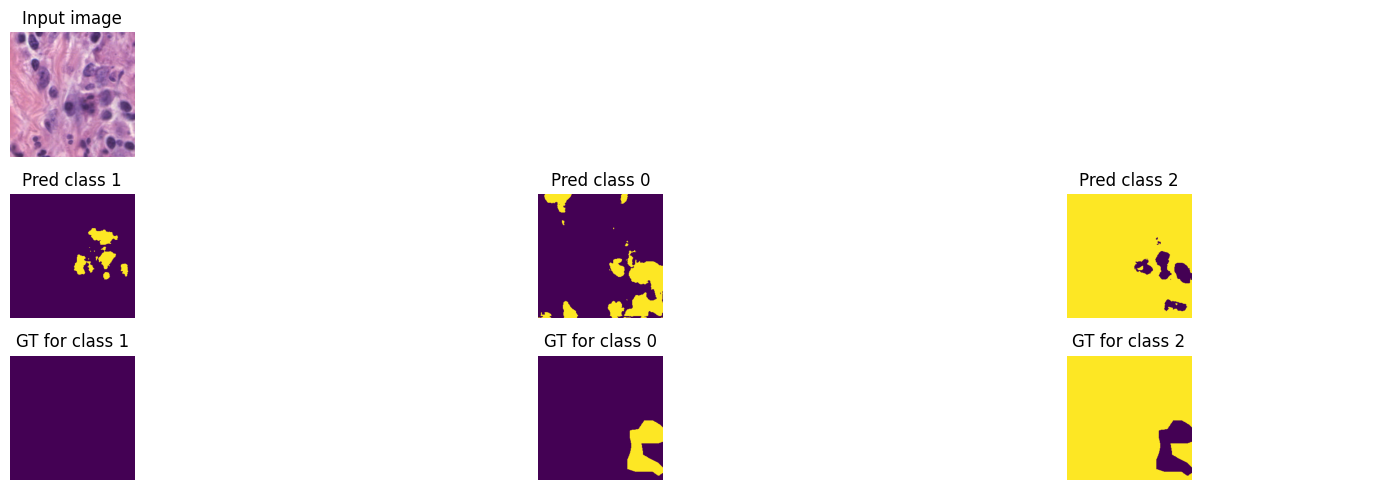

Train loss: 0.02919 | Time: 81m 28s | Val loss: 0.03467
Train_DICE_avg: 0.57905 | Train_Jaccard_avg: 0.52745 | Train_Sensitivity_avg: 0.74531 | Train_Specificity_avg: 0.83163 
Class 0 - Train_DICE: 0.56374 | Train_Jaccard: 0.52112 | Train_Sensitivity: 0.75176 | Train_Specificity: 0.86144 
Class 1 - Train_DICE: 0.66730 | Train_Jaccard: 0.61521 | Train_Sensitivity: 0.77299 | Train_Specificity: 0.82167 
Class 2 - Train_DICE: 0.50610 | Train_Jaccard: 0.44603 | Train_Sensitivity: 0.71118 | Train_Specificity: 0.81179 
Val_DICE_avg: 0.59629 | Val_Jaccard_avg: 0.54480 | Val_Sensitivity_avg: 0.80402 | Val_Specificity_avg: 0.79351 
Class 0 - Val_DICE: 0.58859 | Val_Jaccard: 0.54437 | Val_Sensitivity: 0.75509 | Val_Specificity: 0.84795 
Class 1 - Val_DICE: 0.70476 | Val_Jaccard: 0.65313 | Val_Sensitivity: 0.84802 | Val_Specificity: 0.76082 
Class 2 - Val_DICE: 0.49551 | Val_Jaccard: 0.43689 | Val_Sensitivity: 0.80895 | Val_Specificity: 0.77176 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.02868 | Time: 83m 45s | Val loss: 0.03500
Train_DICE_avg: 0.58165 | Train_Jaccard_avg: 0.52975 | Train_Sensitivity_avg: 0.74542 | Train_Specificity_avg: 0.83317 
Class 0 - Train_DICE: 0.56772 | Train_Jaccard: 0.52467 | Train_Sensitivity: 0.75091 | Train_Specificity: 0.86242 
Class 1 - Train_DICE: 0.67532 | Train_Jaccard: 0.62302 | Train_Sensitivity: 0.78043 | Train_Specificity: 0.82261 
Class 2 - Train_DICE: 0.50192 | Train_Jaccard: 0.44157 | Train_Sensitivity: 0.70492 | Train_Specificity: 0.81448 
Val_DICE_avg: 0.59787 | Val_Jaccard_avg: 0.54729 | Val_Sensitivity_avg: 0.80907 | Val_Specificity_avg: 0.79753 
Class 0 - Val_DICE: 0.59968 | Val_Jaccard: 0.55708 | Val_Sensitivity: 0.77378 | Val_Specificity: 0.85024 
Class 1 - Val_DICE: 0.70479 | Val_Jaccard: 0.65301 | Val_Sensitivity: 0.82905 | Val_Specificity: 0.77695 
Class 2 - Val_DICE: 0.48915 | Val_Jaccard: 0.43179 | Val_Sensitivity: 0.82437 | Val_Specificity: 0.76539 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.02803 | Time: 86m 4s | Val loss: 0.03541
Train_DICE_avg: 0.59138 | Train_Jaccard_avg: 0.53986 | Train_Sensitivity_avg: 0.75482 | Train_Specificity_avg: 0.83700 
Class 0 - Train_DICE: 0.57974 | Train_Jaccard: 0.53706 | Train_Sensitivity: 0.76113 | Train_Specificity: 0.86303 
Class 1 - Train_DICE: 0.68155 | Train_Jaccard: 0.62961 | Train_Sensitivity: 0.78417 | Train_Specificity: 0.83120 
Class 2 - Train_DICE: 0.51286 | Train_Jaccard: 0.45290 | Train_Sensitivity: 0.71917 | Train_Specificity: 0.81676 
Val_DICE_avg: 0.60347 | Val_Jaccard_avg: 0.55348 | Val_Sensitivity_avg: 0.81479 | Val_Specificity_avg: 0.79973 
Class 0 - Val_DICE: 0.59820 | Val_Jaccard: 0.55588 | Val_Sensitivity: 0.78667 | Val_Specificity: 0.84351 
Class 1 - Val_DICE: 0.71084 | Val_Jaccard: 0.65962 | Val_Sensitivity: 0.82430 | Val_Specificity: 0.78470 
Class 2 - Val_DICE: 0.50136 | Val_Jaccard: 0.44493 | Val_Sensitivity: 0.83340 | Val_Specificity: 0.77097 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.02777 | Time: 88m 22s | Val loss: 0.03507
Train_DICE_avg: 0.59203 | Train_Jaccard_avg: 0.54043 | Train_Sensitivity_avg: 0.75201 | Train_Specificity_avg: 0.83716 
Class 0 - Train_DICE: 0.57732 | Train_Jaccard: 0.53388 | Train_Sensitivity: 0.75067 | Train_Specificity: 0.86716 
Class 1 - Train_DICE: 0.68396 | Train_Jaccard: 0.63240 | Train_Sensitivity: 0.78656 | Train_Specificity: 0.82853 
Class 2 - Train_DICE: 0.51480 | Train_Jaccard: 0.45503 | Train_Sensitivity: 0.71879 | Train_Specificity: 0.81579 
Val_DICE_avg: 0.60152 | Val_Jaccard_avg: 0.55078 | Val_Sensitivity_avg: 0.80905 | Val_Specificity_avg: 0.79834 
Class 0 - Val_DICE: 0.60111 | Val_Jaccard: 0.55824 | Val_Sensitivity: 0.79444 | Val_Specificity: 0.83922 
Class 1 - Val_DICE: 0.70517 | Val_Jaccard: 0.65291 | Val_Sensitivity: 0.81077 | Val_Specificity: 0.78514 
Class 2 - Val_DICE: 0.49826 | Val_Jaccard: 0.44120 | Val_Sensitivity: 0.82195 | Val_Specificity: 0.77066 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.02732 | Time: 90m 40s | Val loss: 0.03647
Train_DICE_avg: 0.59489 | Train_Jaccard_avg: 0.54324 | Train_Sensitivity_avg: 0.75250 | Train_Specificity_avg: 0.83967 
Class 0 - Train_DICE: 0.57823 | Train_Jaccard: 0.53486 | Train_Sensitivity: 0.74993 | Train_Specificity: 0.86968 
Class 1 - Train_DICE: 0.68913 | Train_Jaccard: 0.63775 | Train_Sensitivity: 0.79148 | Train_Specificity: 0.83156 
Class 2 - Train_DICE: 0.51731 | Train_Jaccard: 0.45712 | Train_Sensitivity: 0.71607 | Train_Specificity: 0.81778 
Val_DICE_avg: 0.60115 | Val_Jaccard_avg: 0.55065 | Val_Sensitivity_avg: 0.80526 | Val_Specificity_avg: 0.80450 
Class 0 - Val_DICE: 0.60803 | Val_Jaccard: 0.56525 | Val_Sensitivity: 0.78419 | Val_Specificity: 0.84447 
Class 1 - Val_DICE: 0.70563 | Val_Jaccard: 0.65392 | Val_Sensitivity: 0.80697 | Val_Specificity: 0.80387 
Class 2 - Val_DICE: 0.48977 | Val_Jaccard: 0.43279 | Val_Sensitivity: 0.82460 | Val_Specificity: 0.76517 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


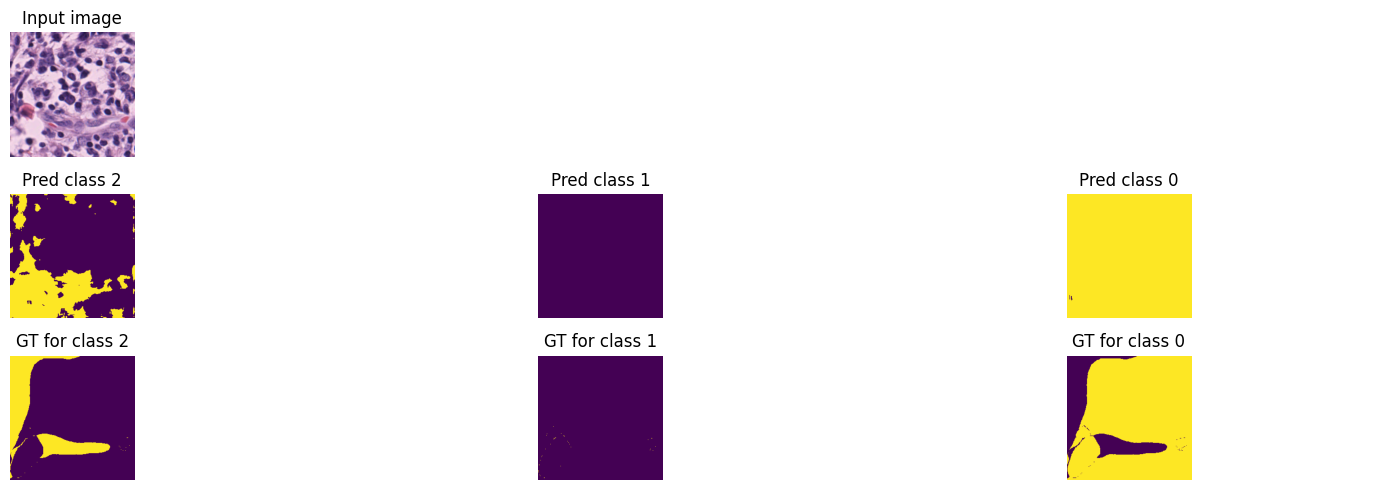

Train loss: 0.02705 | Time: 93m 1s | Val loss: 0.03546
Train_DICE_avg: 0.60032 | Train_Jaccard_avg: 0.54881 | Train_Sensitivity_avg: 0.76061 | Train_Specificity_avg: 0.84145 
Class 0 - Train_DICE: 0.58704 | Train_Jaccard: 0.54334 | Train_Sensitivity: 0.76257 | Train_Specificity: 0.87005 
Class 1 - Train_DICE: 0.69133 | Train_Jaccard: 0.64065 | Train_Sensitivity: 0.79602 | Train_Specificity: 0.83495 
Class 2 - Train_DICE: 0.52257 | Train_Jaccard: 0.46243 | Train_Sensitivity: 0.72325 | Train_Specificity: 0.81936 
Val_DICE_avg: 0.60076 | Val_Jaccard_avg: 0.55065 | Val_Sensitivity_avg: 0.80934 | Val_Specificity_avg: 0.80512 
Class 0 - Val_DICE: 0.59699 | Val_Jaccard: 0.55546 | Val_Sensitivity: 0.80241 | Val_Specificity: 0.83618 
Class 1 - Val_DICE: 0.70388 | Val_Jaccard: 0.65190 | Val_Sensitivity: 0.80264 | Val_Specificity: 0.80852 
Class 2 - Val_DICE: 0.50141 | Val_Jaccard: 0.44458 | Val_Sensitivity: 0.82295 | Val_Specificity: 0.77067 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.02647 | Time: 95m 19s | Val loss: 0.03592
Train_DICE_avg: 0.60776 | Train_Jaccard_avg: 0.55596 | Train_Sensitivity_avg: 0.76327 | Train_Specificity_avg: 0.84257 
Class 0 - Train_DICE: 0.59260 | Train_Jaccard: 0.54805 | Train_Sensitivity: 0.76071 | Train_Specificity: 0.87122 
Class 1 - Train_DICE: 0.69990 | Train_Jaccard: 0.64937 | Train_Sensitivity: 0.80011 | Train_Specificity: 0.83530 
Class 2 - Train_DICE: 0.53077 | Train_Jaccard: 0.47048 | Train_Sensitivity: 0.72899 | Train_Specificity: 0.82118 
Val_DICE_avg: 0.59950 | Val_Jaccard_avg: 0.54947 | Val_Sensitivity_avg: 0.80380 | Val_Specificity_avg: 0.80470 
Class 0 - Val_DICE: 0.59441 | Val_Jaccard: 0.55285 | Val_Sensitivity: 0.79045 | Val_Specificity: 0.83938 
Class 1 - Val_DICE: 0.70094 | Val_Jaccard: 0.64977 | Val_Sensitivity: 0.80860 | Val_Specificity: 0.80379 
Class 2 - Val_DICE: 0.50315 | Val_Jaccard: 0.44578 | Val_Sensitivity: 0.81234 | Val_Specificity: 0.77092 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.02629 | Time: 97m 39s | Val loss: 0.03547
Train_DICE_avg: 0.61020 | Train_Jaccard_avg: 0.55878 | Train_Sensitivity_avg: 0.76536 | Train_Specificity_avg: 0.84460 
Class 0 - Train_DICE: 0.60025 | Train_Jaccard: 0.55612 | Train_Sensitivity: 0.76885 | Train_Specificity: 0.87302 
Class 1 - Train_DICE: 0.70289 | Train_Jaccard: 0.65238 | Train_Sensitivity: 0.80126 | Train_Specificity: 0.83674 
Class 2 - Train_DICE: 0.52746 | Train_Jaccard: 0.46784 | Train_Sensitivity: 0.72598 | Train_Specificity: 0.82403 
Val_DICE_avg: 0.60087 | Val_Jaccard_avg: 0.55035 | Val_Sensitivity_avg: 0.80667 | Val_Specificity_avg: 0.80119 
Class 0 - Val_DICE: 0.58974 | Val_Jaccard: 0.54648 | Val_Sensitivity: 0.77243 | Val_Specificity: 0.84584 
Class 1 - Val_DICE: 0.70463 | Val_Jaccard: 0.65406 | Val_Sensitivity: 0.82939 | Val_Specificity: 0.78327 
Class 2 - Val_DICE: 0.50824 | Val_Jaccard: 0.45050 | Val_Sensitivity: 0.81819 | Val_Specificity: 0.77446 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.02581 | Time: 99m 58s | Val loss: 0.03571
Train_DICE_avg: 0.61254 | Train_Jaccard_avg: 0.56091 | Train_Sensitivity_avg: 0.76260 | Train_Specificity_avg: 0.84559 
Class 0 - Train_DICE: 0.59960 | Train_Jaccard: 0.55571 | Train_Sensitivity: 0.76510 | Train_Specificity: 0.87359 
Class 1 - Train_DICE: 0.70513 | Train_Jaccard: 0.65511 | Train_Sensitivity: 0.80008 | Train_Specificity: 0.84013 
Class 2 - Train_DICE: 0.53290 | Train_Jaccard: 0.47190 | Train_Sensitivity: 0.72263 | Train_Specificity: 0.82306 
Val_DICE_avg: 0.60774 | Val_Jaccard_avg: 0.55796 | Val_Sensitivity_avg: 0.81194 | Val_Specificity_avg: 0.80826 
Class 0 - Val_DICE: 0.60114 | Val_Jaccard: 0.55984 | Val_Sensitivity: 0.79251 | Val_Specificity: 0.84574 
Class 1 - Val_DICE: 0.70822 | Val_Jaccard: 0.65747 | Val_Sensitivity: 0.81828 | Val_Specificity: 0.80352 
Class 2 - Val_DICE: 0.51386 | Val_Jaccard: 0.45658 | Val_Sensitivity: 0.82502 | Val_Specificity: 0.77550 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.02562 | Time: 102m 17s | Val loss: 0.03580
Train_DICE_avg: 0.61452 | Train_Jaccard_avg: 0.56317 | Train_Sensitivity_avg: 0.76744 | Train_Specificity_avg: 0.84700 
Class 0 - Train_DICE: 0.60245 | Train_Jaccard: 0.55821 | Train_Sensitivity: 0.76677 | Train_Specificity: 0.87314 
Class 1 - Train_DICE: 0.70310 | Train_Jaccard: 0.65375 | Train_Sensitivity: 0.80245 | Train_Specificity: 0.84080 
Class 2 - Train_DICE: 0.53802 | Train_Jaccard: 0.47755 | Train_Sensitivity: 0.73309 | Train_Specificity: 0.82706 
Val_DICE_avg: 0.60277 | Val_Jaccard_avg: 0.55306 | Val_Sensitivity_avg: 0.80965 | Val_Specificity_avg: 0.80226 
Class 0 - Val_DICE: 0.59565 | Val_Jaccard: 0.55366 | Val_Sensitivity: 0.78281 | Val_Specificity: 0.84315 
Class 1 - Val_DICE: 0.71085 | Val_Jaccard: 0.65964 | Val_Sensitivity: 0.81893 | Val_Specificity: 0.79482 
Class 2 - Val_DICE: 0.50181 | Val_Jaccard: 0.44587 | Val_Sensitivity: 0.82721 | Val_Specificity: 0.76882 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


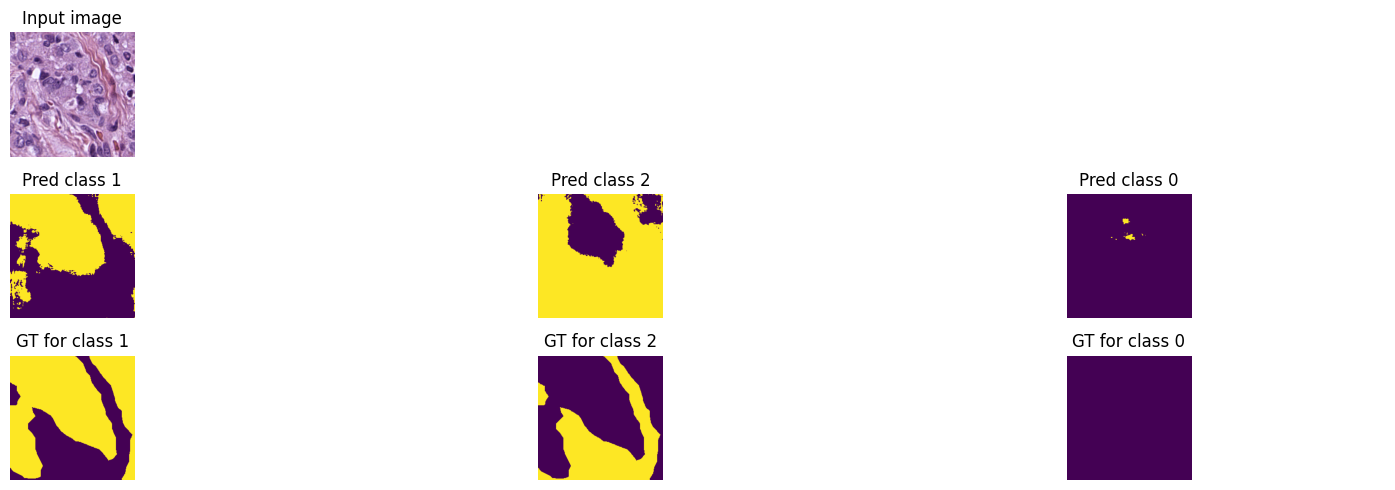

Train loss: 0.02532 | Time: 104m 36s | Val loss: 0.03644
Train_DICE_avg: 0.62024 | Train_Jaccard_avg: 0.56883 | Train_Sensitivity_avg: 0.77137 | Train_Specificity_avg: 0.84741 
Class 0 - Train_DICE: 0.60526 | Train_Jaccard: 0.56102 | Train_Sensitivity: 0.77009 | Train_Specificity: 0.87401 
Class 1 - Train_DICE: 0.71442 | Train_Jaccard: 0.66465 | Train_Sensitivity: 0.81320 | Train_Specificity: 0.84127 
Class 2 - Train_DICE: 0.54105 | Train_Jaccard: 0.48080 | Train_Sensitivity: 0.73082 | Train_Specificity: 0.82696 
Val_DICE_avg: 0.60711 | Val_Jaccard_avg: 0.55700 | Val_Sensitivity_avg: 0.80729 | Val_Specificity_avg: 0.80775 
Class 0 - Val_DICE: 0.59592 | Val_Jaccard: 0.55396 | Val_Sensitivity: 0.77714 | Val_Specificity: 0.84476 
Class 1 - Val_DICE: 0.70900 | Val_Jaccard: 0.65808 | Val_Sensitivity: 0.82874 | Val_Specificity: 0.79778 
Class 2 - Val_DICE: 0.51641 | Val_Jaccard: 0.45896 | Val_Sensitivity: 0.81599 | Val_Specificity: 0.78072 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.02503 | Time: 106m 54s | Val loss: 0.03580
Train_DICE_avg: 0.61654 | Train_Jaccard_avg: 0.56514 | Train_Sensitivity_avg: 0.76805 | Train_Specificity_avg: 0.84889 
Class 0 - Train_DICE: 0.59968 | Train_Jaccard: 0.55554 | Train_Sensitivity: 0.76261 | Train_Specificity: 0.87823 
Class 1 - Train_DICE: 0.70828 | Train_Jaccard: 0.65873 | Train_Sensitivity: 0.80713 | Train_Specificity: 0.84169 
Class 2 - Train_DICE: 0.54167 | Train_Jaccard: 0.48116 | Train_Sensitivity: 0.73441 | Train_Specificity: 0.82674 
Val_DICE_avg: 0.60760 | Val_Jaccard_avg: 0.55723 | Val_Sensitivity_avg: 0.80960 | Val_Specificity_avg: 0.80342 
Class 0 - Val_DICE: 0.59715 | Val_Jaccard: 0.55494 | Val_Sensitivity: 0.77938 | Val_Specificity: 0.84638 
Class 1 - Val_DICE: 0.71419 | Val_Jaccard: 0.66294 | Val_Sensitivity: 0.83183 | Val_Specificity: 0.79115 
Class 2 - Val_DICE: 0.51147 | Val_Jaccard: 0.45381 | Val_Sensitivity: 0.81760 | Val_Specificity: 0.77274 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.02474 | Time: 109m 13s | Val loss: 0.03676
Train_DICE_avg: 0.62224 | Train_Jaccard_avg: 0.57105 | Train_Sensitivity_avg: 0.77255 | Train_Specificity_avg: 0.85113 
Class 0 - Train_DICE: 0.61482 | Train_Jaccard: 0.57023 | Train_Sensitivity: 0.77281 | Train_Specificity: 0.87779 
Class 1 - Train_DICE: 0.70989 | Train_Jaccard: 0.66040 | Train_Sensitivity: 0.81063 | Train_Specificity: 0.84495 
Class 2 - Train_DICE: 0.54202 | Train_Jaccard: 0.48253 | Train_Sensitivity: 0.73420 | Train_Specificity: 0.83063 
Val_DICE_avg: 0.60758 | Val_Jaccard_avg: 0.55720 | Val_Sensitivity_avg: 0.80607 | Val_Specificity_avg: 0.80868 
Class 0 - Val_DICE: 0.59977 | Val_Jaccard: 0.55673 | Val_Sensitivity: 0.76676 | Val_Specificity: 0.85319 
Class 1 - Val_DICE: 0.71819 | Val_Jaccard: 0.66748 | Val_Sensitivity: 0.83643 | Val_Specificity: 0.80087 
Class 2 - Val_DICE: 0.50478 | Val_Jaccard: 0.44738 | Val_Sensitivity: 0.81502 | Val_Specificity: 0.77199 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.02464 | Time: 111m 31s | Val loss: 0.03732
Train_DICE_avg: 0.62530 | Train_Jaccard_avg: 0.57400 | Train_Sensitivity_avg: 0.77448 | Train_Specificity_avg: 0.85115 
Class 0 - Train_DICE: 0.61355 | Train_Jaccard: 0.56926 | Train_Sensitivity: 0.77471 | Train_Specificity: 0.87992 
Class 1 - Train_DICE: 0.71506 | Train_Jaccard: 0.66560 | Train_Sensitivity: 0.81454 | Train_Specificity: 0.84264 
Class 2 - Train_DICE: 0.54730 | Train_Jaccard: 0.48715 | Train_Sensitivity: 0.73418 | Train_Specificity: 0.83089 
Val_DICE_avg: 0.60709 | Val_Jaccard_avg: 0.55647 | Val_Sensitivity_avg: 0.80861 | Val_Specificity_avg: 0.80556 
Class 0 - Val_DICE: 0.60641 | Val_Jaccard: 0.56353 | Val_Sensitivity: 0.78812 | Val_Specificity: 0.84717 
Class 1 - Val_DICE: 0.70949 | Val_Jaccard: 0.65828 | Val_Sensitivity: 0.82419 | Val_Specificity: 0.79451 
Class 2 - Val_DICE: 0.50537 | Val_Jaccard: 0.44759 | Val_Sensitivity: 0.81350 | Val_Specificity: 0.77501 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.02424 | Time: 113m 50s | Val loss: 0.03672
Train_DICE_avg: 0.62787 | Train_Jaccard_avg: 0.57651 | Train_Sensitivity_avg: 0.77480 | Train_Specificity_avg: 0.85012 
Class 0 - Train_DICE: 0.61410 | Train_Jaccard: 0.56982 | Train_Sensitivity: 0.77403 | Train_Specificity: 0.87731 
Class 1 - Train_DICE: 0.72095 | Train_Jaccard: 0.67127 | Train_Sensitivity: 0.81453 | Train_Specificity: 0.84215 
Class 2 - Train_DICE: 0.54856 | Train_Jaccard: 0.48842 | Train_Sensitivity: 0.73583 | Train_Specificity: 0.83090 
Val_DICE_avg: 0.60772 | Val_Jaccard_avg: 0.55781 | Val_Sensitivity_avg: 0.81126 | Val_Specificity_avg: 0.80871 
Class 0 - Val_DICE: 0.59484 | Val_Jaccard: 0.55246 | Val_Sensitivity: 0.78422 | Val_Specificity: 0.84789 
Class 1 - Val_DICE: 0.71345 | Val_Jaccard: 0.66337 | Val_Sensitivity: 0.82919 | Val_Specificity: 0.79771 
Class 2 - Val_DICE: 0.51487 | Val_Jaccard: 0.45761 | Val_Sensitivity: 0.82038 | Val_Specificity: 0.78052 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


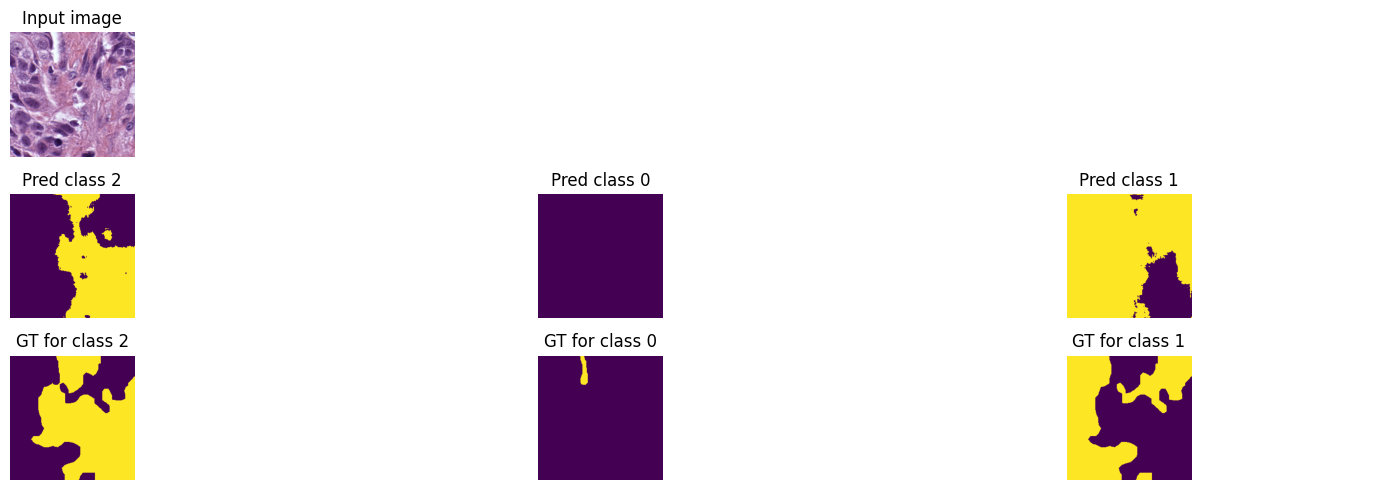

Train loss: 0.02418 | Time: 116m 9s | Val loss: 0.03750
Train_DICE_avg: 0.62723 | Train_Jaccard_avg: 0.57610 | Train_Sensitivity_avg: 0.77480 | Train_Specificity_avg: 0.85350 
Class 0 - Train_DICE: 0.61370 | Train_Jaccard: 0.56961 | Train_Sensitivity: 0.77228 | Train_Specificity: 0.88130 
Class 1 - Train_DICE: 0.71785 | Train_Jaccard: 0.66863 | Train_Sensitivity: 0.81370 | Train_Specificity: 0.84602 
Class 2 - Train_DICE: 0.55014 | Train_Jaccard: 0.49007 | Train_Sensitivity: 0.73844 | Train_Specificity: 0.83319 
Val_DICE_avg: 0.60439 | Val_Jaccard_avg: 0.55443 | Val_Sensitivity_avg: 0.80559 | Val_Specificity_avg: 0.80942 
Class 0 - Val_DICE: 0.60139 | Val_Jaccard: 0.55895 | Val_Sensitivity: 0.78088 | Val_Specificity: 0.85069 
Class 1 - Val_DICE: 0.70813 | Val_Jaccard: 0.65719 | Val_Sensitivity: 0.81852 | Val_Specificity: 0.80521 
Class 2 - Val_DICE: 0.50365 | Val_Jaccard: 0.44717 | Val_Sensitivity: 0.81738 | Val_Specificity: 0.77234 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.02381 | Time: 118m 28s | Val loss: 0.03750
Train_DICE_avg: 0.63252 | Train_Jaccard_avg: 0.58185 | Train_Sensitivity_avg: 0.77914 | Train_Specificity_avg: 0.85426 
Class 0 - Train_DICE: 0.62232 | Train_Jaccard: 0.57805 | Train_Sensitivity: 0.77835 | Train_Specificity: 0.88322 
Class 1 - Train_DICE: 0.72437 | Train_Jaccard: 0.67606 | Train_Sensitivity: 0.82000 | Train_Specificity: 0.84571 
Class 2 - Train_DICE: 0.55087 | Train_Jaccard: 0.49143 | Train_Sensitivity: 0.73907 | Train_Specificity: 0.83385 
Val_DICE_avg: 0.60349 | Val_Jaccard_avg: 0.55292 | Val_Sensitivity_avg: 0.80835 | Val_Specificity_avg: 0.80667 
Class 0 - Val_DICE: 0.58589 | Val_Jaccard: 0.54314 | Val_Sensitivity: 0.76702 | Val_Specificity: 0.84891 
Class 1 - Val_DICE: 0.71390 | Val_Jaccard: 0.66314 | Val_Sensitivity: 0.83873 | Val_Specificity: 0.79524 
Class 2 - Val_DICE: 0.51069 | Val_Jaccard: 0.45247 | Val_Sensitivity: 0.81931 | Val_Specificity: 0.77585 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.02379 | Time: 120m 48s | Val loss: 0.03721
Train_DICE_avg: 0.63257 | Train_Jaccard_avg: 0.58136 | Train_Sensitivity_avg: 0.77952 | Train_Specificity_avg: 0.85471 
Class 0 - Train_DICE: 0.62262 | Train_Jaccard: 0.57810 | Train_Sensitivity: 0.77755 | Train_Specificity: 0.88290 
Class 1 - Train_DICE: 0.71926 | Train_Jaccard: 0.67051 | Train_Sensitivity: 0.81434 | Train_Specificity: 0.84751 
Class 2 - Train_DICE: 0.55584 | Train_Jaccard: 0.49546 | Train_Sensitivity: 0.74666 | Train_Specificity: 0.83372 
Val_DICE_avg: 0.60892 | Val_Jaccard_avg: 0.55842 | Val_Sensitivity_avg: 0.80769 | Val_Specificity_avg: 0.80781 
Class 0 - Val_DICE: 0.60030 | Val_Jaccard: 0.55757 | Val_Sensitivity: 0.77745 | Val_Specificity: 0.84793 
Class 1 - Val_DICE: 0.71604 | Val_Jaccard: 0.66545 | Val_Sensitivity: 0.83116 | Val_Specificity: 0.80074 
Class 2 - Val_DICE: 0.51043 | Val_Jaccard: 0.45223 | Val_Sensitivity: 0.81446 | Val_Specificity: 0.77475 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.02365 | Time: 123m 7s | Val loss: 0.03740
Train_DICE_avg: 0.63516 | Train_Jaccard_avg: 0.58373 | Train_Sensitivity_avg: 0.78036 | Train_Specificity_avg: 0.85593 
Class 0 - Train_DICE: 0.62741 | Train_Jaccard: 0.58248 | Train_Sensitivity: 0.78269 | Train_Specificity: 0.88121 
Class 1 - Train_DICE: 0.72230 | Train_Jaccard: 0.67326 | Train_Sensitivity: 0.81586 | Train_Specificity: 0.85079 
Class 2 - Train_DICE: 0.55578 | Train_Jaccard: 0.49547 | Train_Sensitivity: 0.74252 | Train_Specificity: 0.83578 
Val_DICE_avg: 0.60500 | Val_Jaccard_avg: 0.55391 | Val_Sensitivity_avg: 0.80268 | Val_Specificity_avg: 0.80350 
Class 0 - Val_DICE: 0.59192 | Val_Jaccard: 0.54825 | Val_Sensitivity: 0.76344 | Val_Specificity: 0.84954 
Class 1 - Val_DICE: 0.71673 | Val_Jaccard: 0.66587 | Val_Sensitivity: 0.84274 | Val_Specificity: 0.78716 
Class 2 - Val_DICE: 0.50635 | Val_Jaccard: 0.44762 | Val_Sensitivity: 0.80186 | Val_Specificity: 0.77379 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.02351 | Time: 125m 24s | Val loss: 0.03775
Train_DICE_avg: 0.63490 | Train_Jaccard_avg: 0.58378 | Train_Sensitivity_avg: 0.77988 | Train_Specificity_avg: 0.85493 
Class 0 - Train_DICE: 0.62055 | Train_Jaccard: 0.57591 | Train_Sensitivity: 0.77385 | Train_Specificity: 0.88387 
Class 1 - Train_DICE: 0.72848 | Train_Jaccard: 0.67972 | Train_Sensitivity: 0.82193 | Train_Specificity: 0.84627 
Class 2 - Train_DICE: 0.55567 | Train_Jaccard: 0.49572 | Train_Sensitivity: 0.74386 | Train_Specificity: 0.83465 
Val_DICE_avg: 0.60752 | Val_Jaccard_avg: 0.55697 | Val_Sensitivity_avg: 0.80964 | Val_Specificity_avg: 0.80613 
Class 0 - Val_DICE: 0.59926 | Val_Jaccard: 0.55589 | Val_Sensitivity: 0.76400 | Val_Specificity: 0.85603 
Class 1 - Val_DICE: 0.71379 | Val_Jaccard: 0.66327 | Val_Sensitivity: 0.84738 | Val_Specificity: 0.78754 
Class 2 - Val_DICE: 0.50951 | Val_Jaccard: 0.45175 | Val_Sensitivity: 0.81754 | Val_Specificity: 0.77483 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


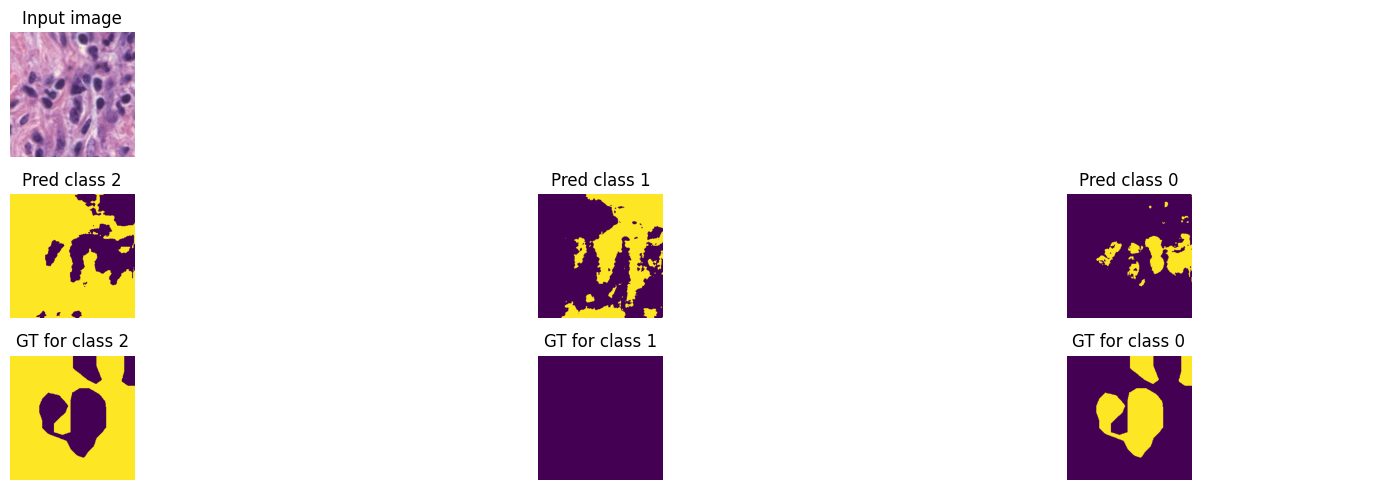

Train loss: 0.02334 | Time: 127m 42s | Val loss: 0.03797
Train_DICE_avg: 0.63728 | Train_Jaccard_avg: 0.58613 | Train_Sensitivity_avg: 0.78189 | Train_Specificity_avg: 0.85849 
Class 0 - Train_DICE: 0.62731 | Train_Jaccard: 0.58236 | Train_Sensitivity: 0.77864 | Train_Specificity: 0.88373 
Class 1 - Train_DICE: 0.72660 | Train_Jaccard: 0.67822 | Train_Sensitivity: 0.82003 | Train_Specificity: 0.85529 
Class 2 - Train_DICE: 0.55792 | Train_Jaccard: 0.49780 | Train_Sensitivity: 0.74701 | Train_Specificity: 0.83644 
Val_DICE_avg: 0.60465 | Val_Jaccard_avg: 0.55329 | Val_Sensitivity_avg: 0.80399 | Val_Specificity_avg: 0.80419 
Class 0 - Val_DICE: 0.59105 | Val_Jaccard: 0.54685 | Val_Sensitivity: 0.75607 | Val_Specificity: 0.85512 
Class 1 - Val_DICE: 0.71469 | Val_Jaccard: 0.66382 | Val_Sensitivity: 0.84433 | Val_Specificity: 0.78425 
Class 2 - Val_DICE: 0.50821 | Val_Jaccard: 0.44921 | Val_Sensitivity: 0.81157 | Val_Specificity: 0.77319 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.02315 | Time: 129m 57s | Val loss: 0.03755
Train_DICE_avg: 0.63917 | Train_Jaccard_avg: 0.58831 | Train_Sensitivity_avg: 0.78154 | Train_Specificity_avg: 0.85868 
Class 0 - Train_DICE: 0.62451 | Train_Jaccard: 0.58001 | Train_Sensitivity: 0.77586 | Train_Specificity: 0.88505 
Class 1 - Train_DICE: 0.73008 | Train_Jaccard: 0.68206 | Train_Sensitivity: 0.82278 | Train_Specificity: 0.85290 
Class 2 - Train_DICE: 0.56293 | Train_Jaccard: 0.50287 | Train_Sensitivity: 0.74599 | Train_Specificity: 0.83810 
Val_DICE_avg: 0.61098 | Val_Jaccard_avg: 0.56038 | Val_Sensitivity_avg: 0.81090 | Val_Specificity_avg: 0.80552 
Class 0 - Val_DICE: 0.60492 | Val_Jaccard: 0.56199 | Val_Sensitivity: 0.78345 | Val_Specificity: 0.85125 
Class 1 - Val_DICE: 0.71443 | Val_Jaccard: 0.66393 | Val_Sensitivity: 0.83346 | Val_Specificity: 0.79034 
Class 2 - Val_DICE: 0.51359 | Val_Jaccard: 0.45521 | Val_Sensitivity: 0.81578 | Val_Specificity: 0.77497 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.02323 | Time: 132m 12s | Val loss: 0.03833
Train_DICE_avg: 0.64007 | Train_Jaccard_avg: 0.58877 | Train_Sensitivity_avg: 0.78328 | Train_Specificity_avg: 0.85635 
Class 0 - Train_DICE: 0.63304 | Train_Jaccard: 0.58761 | Train_Sensitivity: 0.78471 | Train_Specificity: 0.88181 
Class 1 - Train_DICE: 0.72832 | Train_Jaccard: 0.67975 | Train_Sensitivity: 0.82080 | Train_Specificity: 0.85010 
Class 2 - Train_DICE: 0.55886 | Train_Jaccard: 0.49893 | Train_Sensitivity: 0.74435 | Train_Specificity: 0.83714 
Val_DICE_avg: 0.60284 | Val_Jaccard_avg: 0.55172 | Val_Sensitivity_avg: 0.80177 | Val_Specificity_avg: 0.80433 
Class 0 - Val_DICE: 0.58909 | Val_Jaccard: 0.54514 | Val_Sensitivity: 0.74681 | Val_Specificity: 0.86255 
Class 1 - Val_DICE: 0.71705 | Val_Jaccard: 0.66630 | Val_Sensitivity: 0.84573 | Val_Specificity: 0.78025 
Class 2 - Val_DICE: 0.50239 | Val_Jaccard: 0.44373 | Val_Sensitivity: 0.81277 | Val_Specificity: 0.77019 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.02303 | Time: 134m 27s | Val loss: 0.03839
Train_DICE_avg: 0.64105 | Train_Jaccard_avg: 0.58981 | Train_Sensitivity_avg: 0.78476 | Train_Specificity_avg: 0.85816 
Class 0 - Train_DICE: 0.63287 | Train_Jaccard: 0.58719 | Train_Sensitivity: 0.78316 | Train_Specificity: 0.88537 
Class 1 - Train_DICE: 0.72896 | Train_Jaccard: 0.68109 | Train_Sensitivity: 0.82440 | Train_Specificity: 0.85159 
Class 2 - Train_DICE: 0.56131 | Train_Jaccard: 0.50114 | Train_Sensitivity: 0.74672 | Train_Specificity: 0.83751 
Val_DICE_avg: 0.60692 | Val_Jaccard_avg: 0.55573 | Val_Sensitivity_avg: 0.80531 | Val_Specificity_avg: 0.80666 
Class 0 - Val_DICE: 0.59712 | Val_Jaccard: 0.55315 | Val_Sensitivity: 0.75852 | Val_Specificity: 0.85886 
Class 1 - Val_DICE: 0.71738 | Val_Jaccard: 0.66691 | Val_Sensitivity: 0.84933 | Val_Specificity: 0.78607 
Class 2 - Val_DICE: 0.50626 | Val_Jaccard: 0.44714 | Val_Sensitivity: 0.80808 | Val_Specificity: 0.77506 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.02283 | Time: 136m 45s | Val loss: 0.03802
Train_DICE_avg: 0.64357 | Train_Jaccard_avg: 0.59282 | Train_Sensitivity_avg: 0.78650 | Train_Specificity_avg: 0.86126 
Class 0 - Train_DICE: 0.63366 | Train_Jaccard: 0.58896 | Train_Sensitivity: 0.78391 | Train_Specificity: 0.88592 
Class 1 - Train_DICE: 0.73398 | Train_Jaccard: 0.68600 | Train_Sensitivity: 0.82483 | Train_Specificity: 0.85744 
Class 2 - Train_DICE: 0.56306 | Train_Jaccard: 0.50351 | Train_Sensitivity: 0.75076 | Train_Specificity: 0.84040 
Val_DICE_avg: 0.60853 | Val_Jaccard_avg: 0.55725 | Val_Sensitivity_avg: 0.80624 | Val_Specificity_avg: 0.80535 
Class 0 - Val_DICE: 0.60165 | Val_Jaccard: 0.55721 | Val_Sensitivity: 0.76273 | Val_Specificity: 0.85786 
Class 1 - Val_DICE: 0.71854 | Val_Jaccard: 0.66819 | Val_Sensitivity: 0.84193 | Val_Specificity: 0.79061 
Class 2 - Val_DICE: 0.50541 | Val_Jaccard: 0.44634 | Val_Sensitivity: 0.81408 | Val_Specificity: 0.76756 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


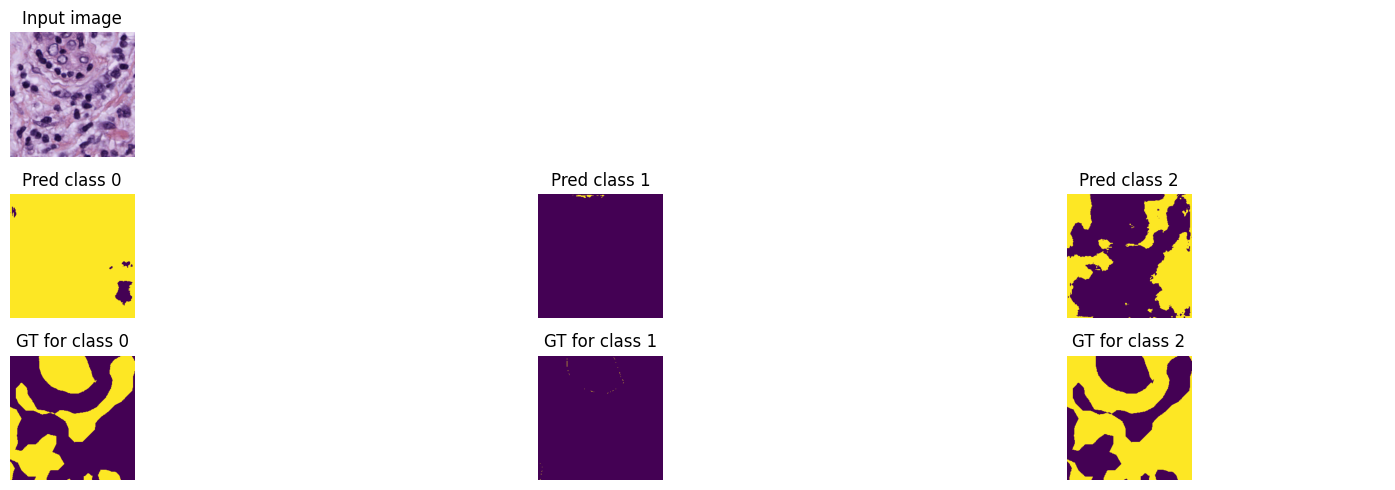

Train loss: 0.02276 | Time: 139m 3s | Val loss: 0.03915
Train_DICE_avg: 0.64416 | Train_Jaccard_avg: 0.59339 | Train_Sensitivity_avg: 0.78568 | Train_Specificity_avg: 0.85952 
Class 0 - Train_DICE: 0.63526 | Train_Jaccard: 0.59036 | Train_Sensitivity: 0.78376 | Train_Specificity: 0.88671 
Class 1 - Train_DICE: 0.73583 | Train_Jaccard: 0.68814 | Train_Sensitivity: 0.83051 | Train_Specificity: 0.85419 
Class 2 - Train_DICE: 0.56140 | Train_Jaccard: 0.50169 | Train_Sensitivity: 0.74278 | Train_Specificity: 0.83767 
Val_DICE_avg: 0.60612 | Val_Jaccard_avg: 0.55462 | Val_Sensitivity_avg: 0.80479 | Val_Specificity_avg: 0.80379 
Class 0 - Val_DICE: 0.60295 | Val_Jaccard: 0.55786 | Val_Sensitivity: 0.75338 | Val_Specificity: 0.86171 
Class 1 - Val_DICE: 0.72112 | Val_Jaccard: 0.67065 | Val_Sensitivity: 0.84306 | Val_Specificity: 0.78710 
Class 2 - Val_DICE: 0.49430 | Val_Jaccard: 0.43536 | Val_Sensitivity: 0.81793 | Val_Specificity: 0.76255 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [24]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [25]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Global Performance Metrics:
Loss mean: 0.03973, std: 0.00982
Dice Coefficient mean: 0.58999, std: 0.21111
Jaccard Index mean: 0.53084, std: 0.22149
Sensitivity mean: 0.79263, std: 0.18902
Specificity mean: 0.76937, std: 0.14145

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.54533, std: 0.41499
Jaccard mean: 0.49256, std: 0.41029
Sensitivity mean: 0.81545, std: 0.32342
Specificity mean: 0.78318, std: 0.32013

Class 1:
Dice mean: 0.69826, std: 0.37418
Jaccard mean: 0.64593, std: 0.37739
Sensitivity mean: 0.85833, std: 0.28388
Specificity mean: 0.76656, std: 0.35133

Class 2:
Dice mean: 0.52639, std: 0.38146
Jaccard mean: 0.45402, std: 0.37222
Sensitivity mean: 0.70411, std: 0.37532
Specificity mean: 0.75837, std: 0.31191


### Tversky Loss

In [26]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-DeepLabV3+-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.76 GB
GPU Memory - Reserved: 1.87 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


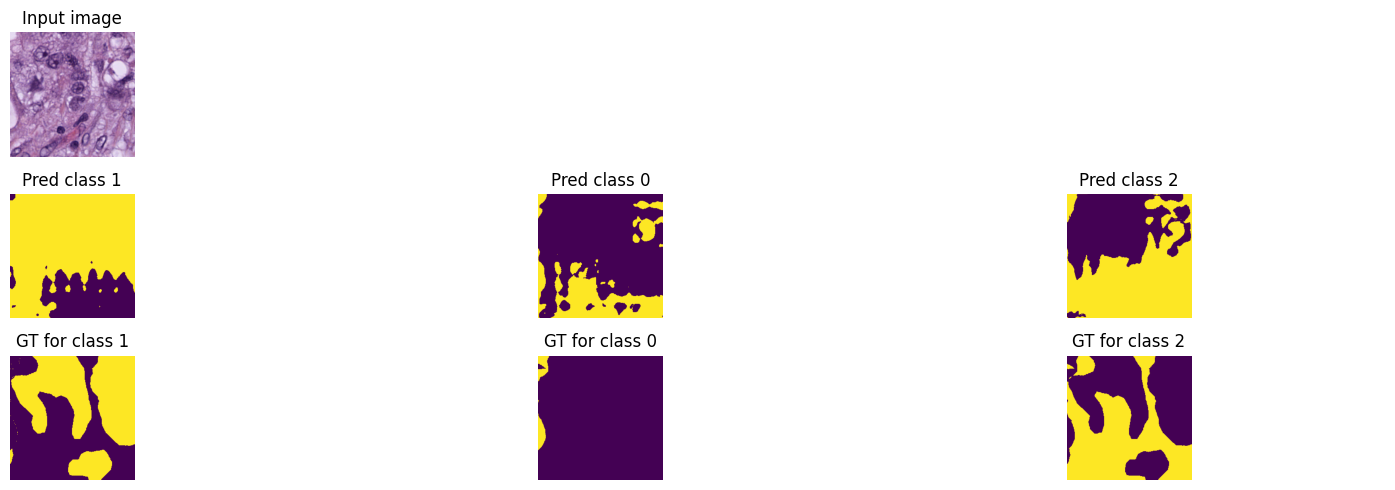

Train loss: 0.63135 | Time: 2m 11s | Val loss: 0.59739
Train_DICE_avg: 0.40271 | Train_Jaccard_avg: 0.33219 | Train_Sensitivity_avg: 0.38232 | Train_Specificity_avg: 0.80638 
Class 0 - Train_DICE: 0.28757 | Train_Jaccard: 0.22707 | Train_Sensitivity: 0.27576 | Train_Specificity: 0.85357 
Class 1 - Train_DICE: 0.47839 | Train_Jaccard: 0.40966 | Train_Sensitivity: 0.47347 | Train_Specificity: 0.75081 
Class 2 - Train_DICE: 0.44216 | Train_Jaccard: 0.35984 | Train_Sensitivity: 0.39772 | Train_Specificity: 0.81476 
Val_DICE_avg: 0.43056 | Val_Jaccard_avg: 0.36370 | Val_Sensitivity_avg: 0.40421 | Val_Specificity_avg: 0.79661 
Class 0 - Val_DICE: 0.31475 | Val_Jaccard: 0.25741 | Val_Sensitivity: 0.27663 | Val_Specificity: 0.88439 
Class 1 - Val_DICE: 0.51966 | Val_Jaccard: 0.45788 | Val_Sensitivity: 0.51081 | Val_Specificity: 0.70583 
Class 2 - Val_DICE: 0.45728 | Val_Jaccard: 0.37581 | Val_Sensitivity: 0.42520 | Val_Specificity: 0.79963 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.60355 | Time: 4m 22s | Val loss: 0.58685
Train_DICE_avg: 0.41925 | Train_Jaccard_avg: 0.34773 | Train_Sensitivity_avg: 0.40153 | Train_Specificity_avg: 0.81292 
Class 0 - Train_DICE: 0.30926 | Train_Jaccard: 0.24700 | Train_Sensitivity: 0.28892 | Train_Specificity: 0.86382 
Class 1 - Train_DICE: 0.49576 | Train_Jaccard: 0.42712 | Train_Sensitivity: 0.49130 | Train_Specificity: 0.76566 
Class 2 - Train_DICE: 0.45272 | Train_Jaccard: 0.36907 | Train_Sensitivity: 0.42436 | Train_Specificity: 0.80927 
Val_DICE_avg: 0.43393 | Val_Jaccard_avg: 0.36641 | Val_Sensitivity_avg: 0.41387 | Val_Specificity_avg: 0.79152 
Class 0 - Val_DICE: 0.31795 | Val_Jaccard: 0.26009 | Val_Sensitivity: 0.28144 | Val_Specificity: 0.88007 
Class 1 - Val_DICE: 0.52626 | Val_Jaccard: 0.46420 | Val_Sensitivity: 0.51556 | Val_Specificity: 0.70850 
Class 2 - Val_DICE: 0.45759 | Val_Jaccard: 0.37492 | Val_Sensitivity: 0.44461 | Val_Specificity: 0.78598 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.59548 | Time: 6m 33s | Val loss: 0.58015
Train_DICE_avg: 0.42135 | Train_Jaccard_avg: 0.34880 | Train_Sensitivity_avg: 0.41090 | Train_Specificity_avg: 0.80901 
Class 0 - Train_DICE: 0.31242 | Train_Jaccard: 0.24913 | Train_Sensitivity: 0.29781 | Train_Specificity: 0.86035 
Class 1 - Train_DICE: 0.49742 | Train_Jaccard: 0.42787 | Train_Sensitivity: 0.49988 | Train_Specificity: 0.76144 
Class 2 - Train_DICE: 0.45420 | Train_Jaccard: 0.36941 | Train_Sensitivity: 0.43500 | Train_Specificity: 0.80523 
Val_DICE_avg: 0.43689 | Val_Jaccard_avg: 0.36865 | Val_Sensitivity_avg: 0.42282 | Val_Specificity_avg: 0.78965 
Class 0 - Val_DICE: 0.32029 | Val_Jaccard: 0.26132 | Val_Sensitivity: 0.29277 | Val_Specificity: 0.87388 
Class 1 - Val_DICE: 0.52897 | Val_Jaccard: 0.46556 | Val_Sensitivity: 0.52286 | Val_Specificity: 0.70641 
Class 2 - Val_DICE: 0.46140 | Val_Jaccard: 0.37905 | Val_Sensitivity: 0.45283 | Val_Specificity: 0.78866 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.59019 | Time: 8m 44s | Val loss: 0.57664
Train_DICE_avg: 0.42352 | Train_Jaccard_avg: 0.35070 | Train_Sensitivity_avg: 0.41784 | Train_Specificity_avg: 0.80809 
Class 0 - Train_DICE: 0.31474 | Train_Jaccard: 0.25128 | Train_Sensitivity: 0.30384 | Train_Specificity: 0.86207 
Class 1 - Train_DICE: 0.49959 | Train_Jaccard: 0.42964 | Train_Sensitivity: 0.50720 | Train_Specificity: 0.75810 
Class 2 - Train_DICE: 0.45622 | Train_Jaccard: 0.37118 | Train_Sensitivity: 0.44249 | Train_Specificity: 0.80411 
Val_DICE_avg: 0.43702 | Val_Jaccard_avg: 0.36864 | Val_Sensitivity_avg: 0.42960 | Val_Specificity_avg: 0.78843 
Class 0 - Val_DICE: 0.32285 | Val_Jaccard: 0.26385 | Val_Sensitivity: 0.29823 | Val_Specificity: 0.87808 
Class 1 - Val_DICE: 0.52978 | Val_Jaccard: 0.46627 | Val_Sensitivity: 0.53046 | Val_Specificity: 0.70119 
Class 2 - Val_DICE: 0.45842 | Val_Jaccard: 0.37580 | Val_Sensitivity: 0.46011 | Val_Specificity: 0.78603 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.58708 | Time: 10m 56s | Val loss: 0.57400
Train_DICE_avg: 0.42494 | Train_Jaccard_avg: 0.35180 | Train_Sensitivity_avg: 0.42177 | Train_Specificity_avg: 0.80695 
Class 0 - Train_DICE: 0.31577 | Train_Jaccard: 0.25174 | Train_Sensitivity: 0.30743 | Train_Specificity: 0.85957 
Class 1 - Train_DICE: 0.50198 | Train_Jaccard: 0.43199 | Train_Sensitivity: 0.51182 | Train_Specificity: 0.75934 
Class 2 - Train_DICE: 0.45705 | Train_Jaccard: 0.37168 | Train_Sensitivity: 0.44605 | Train_Specificity: 0.80195 
Val_DICE_avg: 0.43947 | Val_Jaccard_avg: 0.37155 | Val_Sensitivity_avg: 0.43168 | Val_Specificity_avg: 0.79108 
Class 0 - Val_DICE: 0.32388 | Val_Jaccard: 0.26487 | Val_Sensitivity: 0.29917 | Val_Specificity: 0.87733 
Class 1 - Val_DICE: 0.53256 | Val_Jaccard: 0.47076 | Val_Sensitivity: 0.52831 | Val_Specificity: 0.71159 
Class 2 - Val_DICE: 0.46197 | Val_Jaccard: 0.37900 | Val_Sensitivity: 0.46756 | Val_Specificity: 0.78433 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


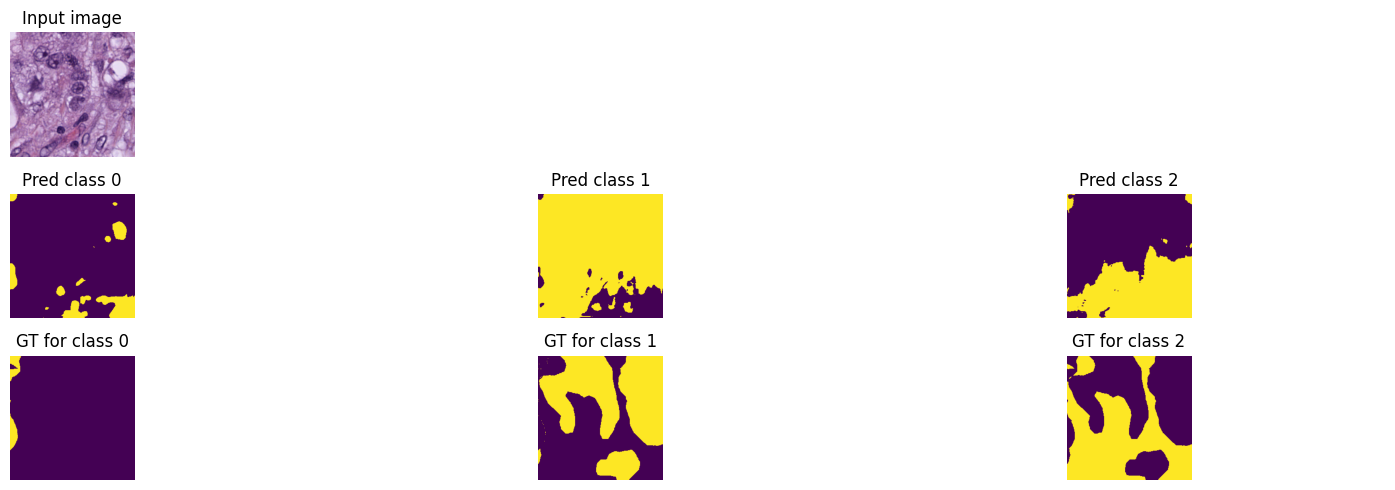

Train loss: 0.58464 | Time: 13m 7s | Val loss: 0.57322
Train_DICE_avg: 0.42595 | Train_Jaccard_avg: 0.35260 | Train_Sensitivity_avg: 0.42429 | Train_Specificity_avg: 0.80601 
Class 0 - Train_DICE: 0.31817 | Train_Jaccard: 0.25391 | Train_Sensitivity: 0.31072 | Train_Specificity: 0.86021 
Class 1 - Train_DICE: 0.50153 | Train_Jaccard: 0.43149 | Train_Sensitivity: 0.51346 | Train_Specificity: 0.75663 
Class 2 - Train_DICE: 0.45815 | Train_Jaccard: 0.37240 | Train_Sensitivity: 0.44869 | Train_Specificity: 0.80120 
Val_DICE_avg: 0.44090 | Val_Jaccard_avg: 0.37276 | Val_Sensitivity_avg: 0.43638 | Val_Specificity_avg: 0.78852 
Class 0 - Val_DICE: 0.32498 | Val_Jaccard: 0.26581 | Val_Sensitivity: 0.29964 | Val_Specificity: 0.87413 
Class 1 - Val_DICE: 0.54163 | Val_Jaccard: 0.48098 | Val_Sensitivity: 0.53152 | Val_Specificity: 0.71753 
Class 2 - Val_DICE: 0.45609 | Val_Jaccard: 0.37149 | Val_Sensitivity: 0.47798 | Val_Specificity: 0.77390 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.58259 | Time: 15m 18s | Val loss: 0.57098
Train_DICE_avg: 0.42686 | Train_Jaccard_avg: 0.35367 | Train_Sensitivity_avg: 0.42650 | Train_Specificity_avg: 0.80596 
Class 0 - Train_DICE: 0.31882 | Train_Jaccard: 0.25464 | Train_Sensitivity: 0.31367 | Train_Specificity: 0.85868 
Class 1 - Train_DICE: 0.50378 | Train_Jaccard: 0.43401 | Train_Sensitivity: 0.51543 | Train_Specificity: 0.75908 
Class 2 - Train_DICE: 0.45799 | Train_Jaccard: 0.37237 | Train_Sensitivity: 0.45041 | Train_Specificity: 0.80012 
Val_DICE_avg: 0.44177 | Val_Jaccard_avg: 0.37350 | Val_Sensitivity_avg: 0.43906 | Val_Specificity_avg: 0.78826 
Class 0 - Val_DICE: 0.32536 | Val_Jaccard: 0.26612 | Val_Sensitivity: 0.30042 | Val_Specificity: 0.87669 
Class 1 - Val_DICE: 0.54382 | Val_Jaccard: 0.48243 | Val_Sensitivity: 0.53784 | Val_Specificity: 0.71355 
Class 2 - Val_DICE: 0.45612 | Val_Jaccard: 0.37196 | Val_Sensitivity: 0.47891 | Val_Specificity: 0.77453 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.58073 | Time: 17m 29s | Val loss: 0.57066
Train_DICE_avg: 0.42813 | Train_Jaccard_avg: 0.35498 | Train_Sensitivity_avg: 0.42924 | Train_Specificity_avg: 0.80644 
Class 0 - Train_DICE: 0.31859 | Train_Jaccard: 0.25458 | Train_Sensitivity: 0.31560 | Train_Specificity: 0.85868 
Class 1 - Train_DICE: 0.50566 | Train_Jaccard: 0.43577 | Train_Sensitivity: 0.51947 | Train_Specificity: 0.75838 
Class 2 - Train_DICE: 0.46015 | Train_Jaccard: 0.37460 | Train_Sensitivity: 0.45264 | Train_Specificity: 0.80227 
Val_DICE_avg: 0.44081 | Val_Jaccard_avg: 0.37288 | Val_Sensitivity_avg: 0.44048 | Val_Specificity_avg: 0.78935 
Class 0 - Val_DICE: 0.32888 | Val_Jaccard: 0.26920 | Val_Sensitivity: 0.30802 | Val_Specificity: 0.86979 
Class 1 - Val_DICE: 0.53969 | Val_Jaccard: 0.48011 | Val_Sensitivity: 0.52281 | Val_Specificity: 0.72788 
Class 2 - Val_DICE: 0.45385 | Val_Jaccard: 0.36934 | Val_Sensitivity: 0.49062 | Val_Specificity: 0.77037 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.57864 | Time: 19m 40s | Val loss: 0.56884
Train_DICE_avg: 0.42940 | Train_Jaccard_avg: 0.35598 | Train_Sensitivity_avg: 0.43160 | Train_Specificity_avg: 0.80708 
Class 0 - Train_DICE: 0.32082 | Train_Jaccard: 0.25647 | Train_Sensitivity: 0.31785 | Train_Specificity: 0.86160 
Class 1 - Train_DICE: 0.50676 | Train_Jaccard: 0.43646 | Train_Sensitivity: 0.52264 | Train_Specificity: 0.75826 
Class 2 - Train_DICE: 0.46062 | Train_Jaccard: 0.37502 | Train_Sensitivity: 0.45432 | Train_Specificity: 0.80138 
Val_DICE_avg: 0.44263 | Val_Jaccard_avg: 0.37458 | Val_Sensitivity_avg: 0.44138 | Val_Specificity_avg: 0.79055 
Class 0 - Val_DICE: 0.32982 | Val_Jaccard: 0.27009 | Val_Sensitivity: 0.30904 | Val_Specificity: 0.87609 
Class 1 - Val_DICE: 0.54309 | Val_Jaccard: 0.48320 | Val_Sensitivity: 0.52992 | Val_Specificity: 0.72446 
Class 2 - Val_DICE: 0.45497 | Val_Jaccard: 0.37043 | Val_Sensitivity: 0.48517 | Val_Specificity: 0.77109 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.57800 | Time: 21m 50s | Val loss: 0.56675
Train_DICE_avg: 0.42972 | Train_Jaccard_avg: 0.35656 | Train_Sensitivity_avg: 0.43293 | Train_Specificity_avg: 0.80656 
Class 0 - Train_DICE: 0.32100 | Train_Jaccard: 0.25677 | Train_Sensitivity: 0.31985 | Train_Specificity: 0.86081 
Class 1 - Train_DICE: 0.50728 | Train_Jaccard: 0.43742 | Train_Sensitivity: 0.52382 | Train_Specificity: 0.75825 
Class 2 - Train_DICE: 0.46089 | Train_Jaccard: 0.37549 | Train_Sensitivity: 0.45511 | Train_Specificity: 0.80063 
Val_DICE_avg: 0.44503 | Val_Jaccard_avg: 0.37701 | Val_Sensitivity_avg: 0.44108 | Val_Specificity_avg: 0.79175 
Class 0 - Val_DICE: 0.33038 | Val_Jaccard: 0.27131 | Val_Sensitivity: 0.30586 | Val_Specificity: 0.88140 
Class 1 - Val_DICE: 0.54256 | Val_Jaccard: 0.48136 | Val_Sensitivity: 0.53540 | Val_Specificity: 0.71581 
Class 2 - Val_DICE: 0.46215 | Val_Jaccard: 0.37837 | Val_Sensitivity: 0.48197 | Val_Specificity: 0.77806 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


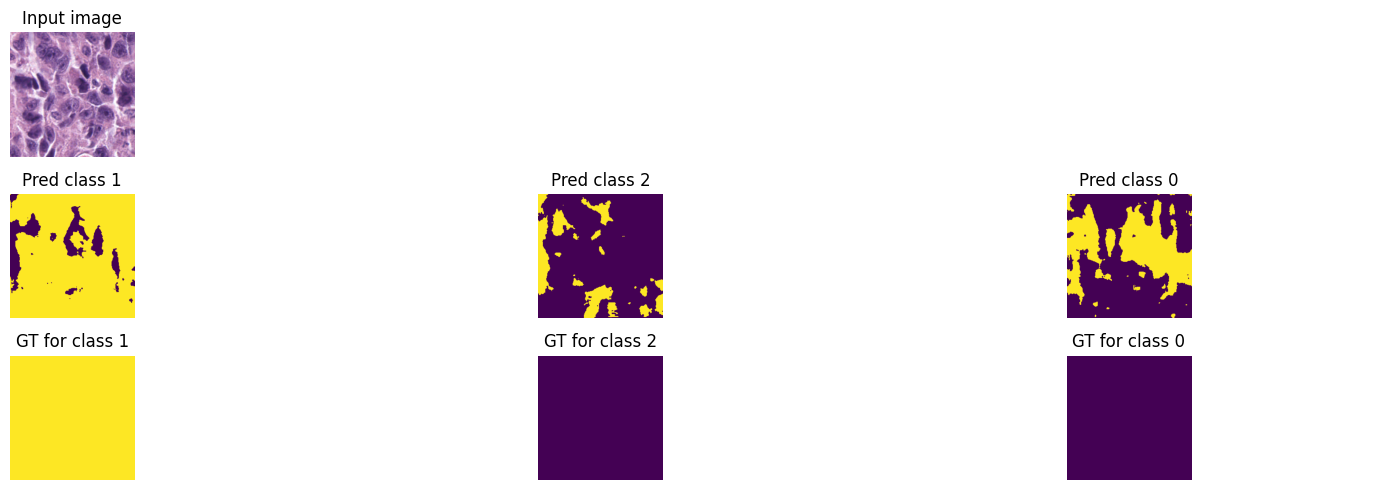

Train loss: 0.57719 | Time: 24m 5s | Val loss: 0.56724
Train_DICE_avg: 0.43055 | Train_Jaccard_avg: 0.35745 | Train_Sensitivity_avg: 0.43313 | Train_Specificity_avg: 0.80909 
Class 0 - Train_DICE: 0.32214 | Train_Jaccard: 0.25790 | Train_Sensitivity: 0.31999 | Train_Specificity: 0.86229 
Class 1 - Train_DICE: 0.50797 | Train_Jaccard: 0.43835 | Train_Sensitivity: 0.52382 | Train_Specificity: 0.76129 
Class 2 - Train_DICE: 0.46154 | Train_Jaccard: 0.37610 | Train_Sensitivity: 0.45556 | Train_Specificity: 0.80369 
Val_DICE_avg: 0.44255 | Val_Jaccard_avg: 0.37407 | Val_Sensitivity_avg: 0.44359 | Val_Specificity_avg: 0.78765 
Class 0 - Val_DICE: 0.33142 | Val_Jaccard: 0.27208 | Val_Sensitivity: 0.30735 | Val_Specificity: 0.87901 
Class 1 - Val_DICE: 0.54404 | Val_Jaccard: 0.48313 | Val_Sensitivity: 0.53489 | Val_Specificity: 0.71364 
Class 2 - Val_DICE: 0.45221 | Val_Jaccard: 0.36699 | Val_Sensitivity: 0.48853 | Val_Specificity: 0.77031 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.57561 | Time: 26m 19s | Val loss: 0.56456
Train_DICE_avg: 0.43165 | Train_Jaccard_avg: 0.35861 | Train_Sensitivity_avg: 0.43575 | Train_Specificity_avg: 0.80818 
Class 0 - Train_DICE: 0.32276 | Train_Jaccard: 0.25831 | Train_Sensitivity: 0.32326 | Train_Specificity: 0.86023 
Class 1 - Train_DICE: 0.51030 | Train_Jaccard: 0.44074 | Train_Sensitivity: 0.52737 | Train_Specificity: 0.76161 
Class 2 - Train_DICE: 0.46188 | Train_Jaccard: 0.37677 | Train_Sensitivity: 0.45662 | Train_Specificity: 0.80272 
Val_DICE_avg: 0.44580 | Val_Jaccard_avg: 0.37792 | Val_Sensitivity_avg: 0.44803 | Val_Specificity_avg: 0.79127 
Class 0 - Val_DICE: 0.33129 | Val_Jaccard: 0.27179 | Val_Sensitivity: 0.31219 | Val_Specificity: 0.87517 
Class 1 - Val_DICE: 0.54950 | Val_Jaccard: 0.48999 | Val_Sensitivity: 0.54270 | Val_Specificity: 0.72528 
Class 2 - Val_DICE: 0.45661 | Val_Jaccard: 0.37198 | Val_Sensitivity: 0.48919 | Val_Specificity: 0.77337 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.57392 | Time: 28m 33s | Val loss: 0.56103
Train_DICE_avg: 0.43334 | Train_Jaccard_avg: 0.36040 | Train_Sensitivity_avg: 0.43805 | Train_Specificity_avg: 0.80905 
Class 0 - Train_DICE: 0.32476 | Train_Jaccard: 0.26009 | Train_Sensitivity: 0.32553 | Train_Specificity: 0.85952 
Class 1 - Train_DICE: 0.51200 | Train_Jaccard: 0.44300 | Train_Sensitivity: 0.53036 | Train_Specificity: 0.76326 
Class 2 - Train_DICE: 0.46327 | Train_Jaccard: 0.37811 | Train_Sensitivity: 0.45827 | Train_Specificity: 0.80437 
Val_DICE_avg: 0.45038 | Val_Jaccard_avg: 0.38256 | Val_Sensitivity_avg: 0.44959 | Val_Specificity_avg: 0.79162 
Class 0 - Val_DICE: 0.33250 | Val_Jaccard: 0.27151 | Val_Sensitivity: 0.32120 | Val_Specificity: 0.87079 
Class 1 - Val_DICE: 0.55212 | Val_Jaccard: 0.49268 | Val_Sensitivity: 0.54691 | Val_Specificity: 0.72058 
Class 2 - Val_DICE: 0.46653 | Val_Jaccard: 0.38349 | Val_Sensitivity: 0.48067 | Val_Specificity: 0.78347 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.57251 | Time: 30m 48s | Val loss: 0.55952
Train_DICE_avg: 0.43490 | Train_Jaccard_avg: 0.36192 | Train_Sensitivity_avg: 0.44084 | Train_Specificity_avg: 0.80945 
Class 0 - Train_DICE: 0.32530 | Train_Jaccard: 0.26091 | Train_Sensitivity: 0.32765 | Train_Specificity: 0.86163 
Class 1 - Train_DICE: 0.51389 | Train_Jaccard: 0.44451 | Train_Sensitivity: 0.53410 | Train_Specificity: 0.76247 
Class 2 - Train_DICE: 0.46550 | Train_Jaccard: 0.38036 | Train_Sensitivity: 0.46077 | Train_Specificity: 0.80426 
Val_DICE_avg: 0.45366 | Val_Jaccard_avg: 0.38595 | Val_Sensitivity_avg: 0.45739 | Val_Specificity_avg: 0.79158 
Class 0 - Val_DICE: 0.33099 | Val_Jaccard: 0.27123 | Val_Sensitivity: 0.30941 | Val_Specificity: 0.88027 
Class 1 - Val_DICE: 0.56499 | Val_Jaccard: 0.50412 | Val_Sensitivity: 0.57701 | Val_Specificity: 0.71140 
Class 2 - Val_DICE: 0.46498 | Val_Jaccard: 0.38251 | Val_Sensitivity: 0.48574 | Val_Specificity: 0.78306 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.56994 | Time: 33m 2s | Val loss: 0.54234
Train_DICE_avg: 0.43880 | Train_Jaccard_avg: 0.36649 | Train_Sensitivity_avg: 0.44853 | Train_Specificity_avg: 0.81189 
Class 0 - Train_DICE: 0.32568 | Train_Jaccard: 0.26136 | Train_Sensitivity: 0.32791 | Train_Specificity: 0.86212 
Class 1 - Train_DICE: 0.52517 | Train_Jaccard: 0.45717 | Train_Sensitivity: 0.55578 | Train_Specificity: 0.76441 
Class 2 - Train_DICE: 0.46555 | Train_Jaccard: 0.38094 | Train_Sensitivity: 0.46189 | Train_Specificity: 0.80914 
Val_DICE_avg: 0.46868 | Val_Jaccard_avg: 0.40205 | Val_Sensitivity_avg: 0.48303 | Val_Specificity_avg: 0.79610 
Class 0 - Val_DICE: 0.33439 | Val_Jaccard: 0.27402 | Val_Sensitivity: 0.31736 | Val_Specificity: 0.88218 
Class 1 - Val_DICE: 0.60454 | Val_Jaccard: 0.54695 | Val_Sensitivity: 0.65043 | Val_Specificity: 0.71039 
Class 2 - Val_DICE: 0.46712 | Val_Jaccard: 0.38518 | Val_Sensitivity: 0.48130 | Val_Specificity: 0.79572 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


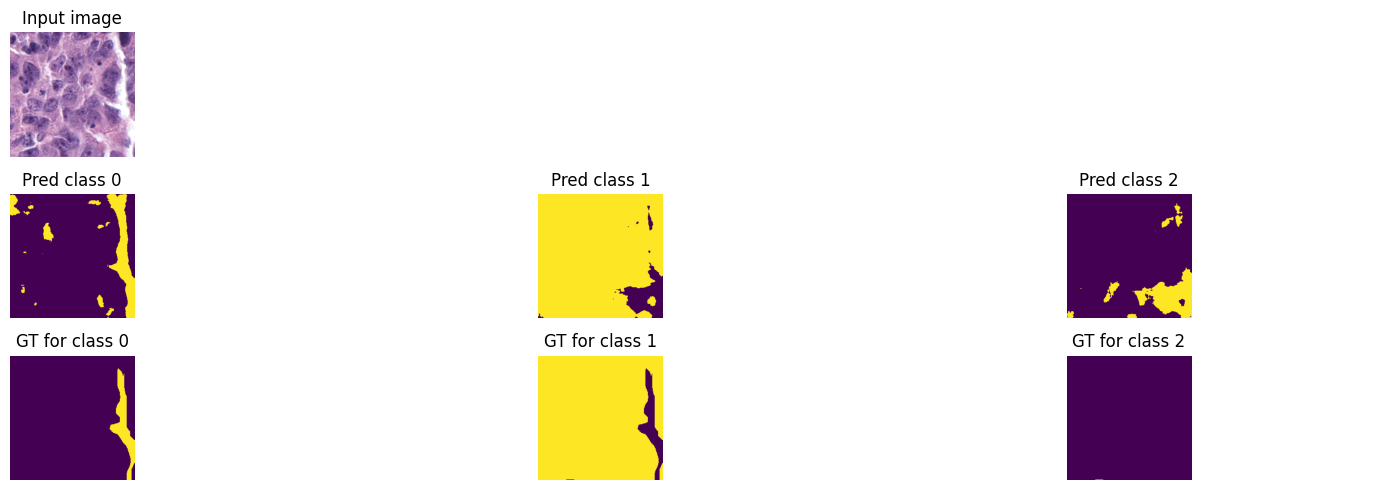

Train loss: 0.55867 | Time: 35m 17s | Val loss: 0.52133
Train_DICE_avg: 0.45032 | Train_Jaccard_avg: 0.37990 | Train_Sensitivity_avg: 0.47718 | Train_Specificity_avg: 0.81508 
Class 0 - Train_DICE: 0.32572 | Train_Jaccard: 0.26113 | Train_Sensitivity: 0.32982 | Train_Specificity: 0.86278 
Class 1 - Train_DICE: 0.56085 | Train_Jaccard: 0.49873 | Train_Sensitivity: 0.64228 | Train_Specificity: 0.77219 
Class 2 - Train_DICE: 0.46439 | Train_Jaccard: 0.37985 | Train_Sensitivity: 0.45943 | Train_Specificity: 0.81025 
Val_DICE_avg: 0.48748 | Val_Jaccard_avg: 0.42205 | Val_Sensitivity_avg: 0.52297 | Val_Specificity_avg: 0.79761 
Class 0 - Val_DICE: 0.33424 | Val_Jaccard: 0.27372 | Val_Sensitivity: 0.32120 | Val_Specificity: 0.88443 
Class 1 - Val_DICE: 0.66867 | Val_Jaccard: 0.61546 | Val_Sensitivity: 0.75104 | Val_Specificity: 0.72741 
Class 2 - Val_DICE: 0.45954 | Val_Jaccard: 0.37697 | Val_Sensitivity: 0.49668 | Val_Specificity: 0.78099 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.54270 | Time: 37m 32s | Val loss: 0.51239
Train_DICE_avg: 0.46515 | Train_Jaccard_avg: 0.39649 | Train_Sensitivity_avg: 0.51143 | Train_Specificity_avg: 0.80963 
Class 0 - Train_DICE: 0.32537 | Train_Jaccard: 0.26100 | Train_Sensitivity: 0.32885 | Train_Specificity: 0.86350 
Class 1 - Train_DICE: 0.60576 | Train_Jaccard: 0.54847 | Train_Sensitivity: 0.74661 | Train_Specificity: 0.75458 
Class 2 - Train_DICE: 0.46432 | Train_Jaccard: 0.37999 | Train_Sensitivity: 0.45884 | Train_Specificity: 0.81082 
Val_DICE_avg: 0.49488 | Val_Jaccard_avg: 0.43075 | Val_Sensitivity_avg: 0.54365 | Val_Specificity_avg: 0.79364 
Class 0 - Val_DICE: 0.33573 | Val_Jaccard: 0.27591 | Val_Sensitivity: 0.31877 | Val_Specificity: 0.88707 
Class 1 - Val_DICE: 0.68737 | Val_Jaccard: 0.63737 | Val_Sensitivity: 0.82900 | Val_Specificity: 0.70656 
Class 2 - Val_DICE: 0.46155 | Val_Jaccard: 0.37899 | Val_Sensitivity: 0.48317 | Val_Specificity: 0.78728 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.53483 | Time: 39m 46s | Val loss: 0.50886
Train_DICE_avg: 0.47047 | Train_Jaccard_avg: 0.40186 | Train_Sensitivity_avg: 0.52035 | Train_Specificity_avg: 0.80710 
Class 0 - Train_DICE: 0.32619 | Train_Jaccard: 0.26185 | Train_Sensitivity: 0.33045 | Train_Specificity: 0.86320 
Class 1 - Train_DICE: 0.62065 | Train_Jaccard: 0.56397 | Train_Sensitivity: 0.77033 | Train_Specificity: 0.75148 
Class 2 - Train_DICE: 0.46458 | Train_Jaccard: 0.37978 | Train_Sensitivity: 0.46026 | Train_Specificity: 0.80661 
Val_DICE_avg: 0.49605 | Val_Jaccard_avg: 0.43143 | Val_Sensitivity_avg: 0.55106 | Val_Specificity_avg: 0.78983 
Class 0 - Val_DICE: 0.33576 | Val_Jaccard: 0.27587 | Val_Sensitivity: 0.31847 | Val_Specificity: 0.88458 
Class 1 - Val_DICE: 0.69193 | Val_Jaccard: 0.64123 | Val_Sensitivity: 0.83988 | Val_Specificity: 0.70436 
Class 2 - Val_DICE: 0.46048 | Val_Jaccard: 0.37720 | Val_Sensitivity: 0.49482 | Val_Specificity: 0.78054 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.53318 | Time: 42m 0s | Val loss: 0.50758
Train_DICE_avg: 0.47187 | Train_Jaccard_avg: 0.40391 | Train_Sensitivity_avg: 0.52994 | Train_Specificity_avg: 0.80625 
Class 0 - Train_DICE: 0.32780 | Train_Jaccard: 0.26269 | Train_Sensitivity: 0.33207 | Train_Specificity: 0.86079 
Class 1 - Train_DICE: 0.62187 | Train_Jaccard: 0.56771 | Train_Sensitivity: 0.79673 | Train_Specificity: 0.74719 
Class 2 - Train_DICE: 0.46594 | Train_Jaccard: 0.38133 | Train_Sensitivity: 0.46103 | Train_Specificity: 0.81077 
Val_DICE_avg: 0.49834 | Val_Jaccard_avg: 0.43484 | Val_Sensitivity_avg: 0.55786 | Val_Specificity_avg: 0.79232 
Class 0 - Val_DICE: 0.33568 | Val_Jaccard: 0.27612 | Val_Sensitivity: 0.31723 | Val_Specificity: 0.88946 
Class 1 - Val_DICE: 0.69743 | Val_Jaccard: 0.64910 | Val_Sensitivity: 0.86009 | Val_Specificity: 0.70545 
Class 2 - Val_DICE: 0.46191 | Val_Jaccard: 0.37931 | Val_Sensitivity: 0.49625 | Val_Specificity: 0.78204 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.52806 | Time: 44m 15s | Val loss: 0.50312
Train_DICE_avg: 0.47577 | Train_Jaccard_avg: 0.40802 | Train_Sensitivity_avg: 0.53301 | Train_Specificity_avg: 0.80597 
Class 0 - Train_DICE: 0.32779 | Train_Jaccard: 0.26340 | Train_Sensitivity: 0.33345 | Train_Specificity: 0.86281 
Class 1 - Train_DICE: 0.63269 | Train_Jaccard: 0.57842 | Train_Sensitivity: 0.80297 | Train_Specificity: 0.74508 
Class 2 - Train_DICE: 0.46682 | Train_Jaccard: 0.38223 | Train_Sensitivity: 0.46263 | Train_Specificity: 0.81002 
Val_DICE_avg: 0.50275 | Val_Jaccard_avg: 0.43858 | Val_Sensitivity_avg: 0.55431 | Val_Specificity_avg: 0.79191 
Class 0 - Val_DICE: 0.33815 | Val_Jaccard: 0.27909 | Val_Sensitivity: 0.31988 | Val_Specificity: 0.88859 
Class 1 - Val_DICE: 0.70377 | Val_Jaccard: 0.65370 | Val_Sensitivity: 0.85236 | Val_Specificity: 0.70360 
Class 2 - Val_DICE: 0.46632 | Val_Jaccard: 0.38295 | Val_Sensitivity: 0.49070 | Val_Specificity: 0.78355 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


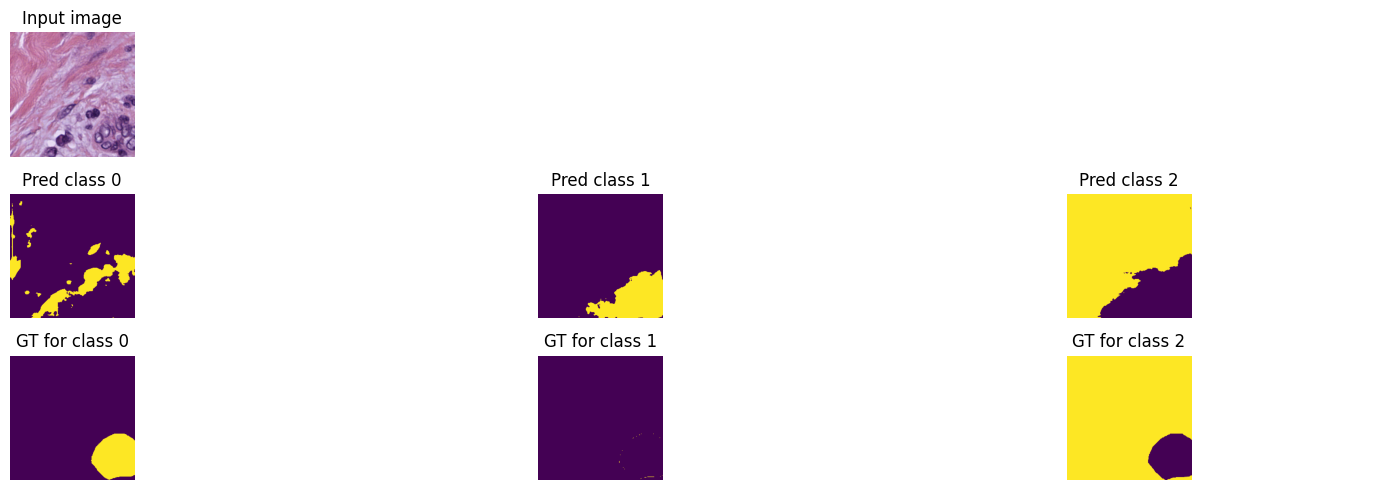

Train loss: 0.52943 | Time: 46m 30s | Val loss: 0.50356
Train_DICE_avg: 0.47473 | Train_Jaccard_avg: 0.40734 | Train_Sensitivity_avg: 0.53472 | Train_Specificity_avg: 0.80607 
Class 0 - Train_DICE: 0.32739 | Train_Jaccard: 0.26340 | Train_Sensitivity: 0.33156 | Train_Specificity: 0.86390 
Class 1 - Train_DICE: 0.62923 | Train_Jaccard: 0.57540 | Train_Sensitivity: 0.80927 | Train_Specificity: 0.74428 
Class 2 - Train_DICE: 0.46758 | Train_Jaccard: 0.38321 | Train_Sensitivity: 0.46334 | Train_Specificity: 0.81003 
Val_DICE_avg: 0.50140 | Val_Jaccard_avg: 0.43871 | Val_Sensitivity_avg: 0.56067 | Val_Specificity_avg: 0.79375 
Class 0 - Val_DICE: 0.33776 | Val_Jaccard: 0.27854 | Val_Sensitivity: 0.32036 | Val_Specificity: 0.88902 
Class 1 - Val_DICE: 0.70399 | Val_Jaccard: 0.65707 | Val_Sensitivity: 0.86922 | Val_Specificity: 0.70759 
Class 2 - Val_DICE: 0.46245 | Val_Jaccard: 0.38051 | Val_Sensitivity: 0.49244 | Val_Specificity: 0.78464 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.52461 | Time: 48m 44s | Val loss: 0.50611
Train_DICE_avg: 0.47914 | Train_Jaccard_avg: 0.41184 | Train_Sensitivity_avg: 0.53890 | Train_Specificity_avg: 0.80656 
Class 0 - Train_DICE: 0.32882 | Train_Jaccard: 0.26437 | Train_Sensitivity: 0.33396 | Train_Specificity: 0.86270 
Class 1 - Train_DICE: 0.64109 | Train_Jaccard: 0.58799 | Train_Sensitivity: 0.81892 | Train_Specificity: 0.74714 
Class 2 - Train_DICE: 0.46752 | Train_Jaccard: 0.38316 | Train_Sensitivity: 0.46382 | Train_Specificity: 0.80983 
Val_DICE_avg: 0.50142 | Val_Jaccard_avg: 0.43798 | Val_Sensitivity_avg: 0.55440 | Val_Specificity_avg: 0.79238 
Class 0 - Val_DICE: 0.33692 | Val_Jaccard: 0.27760 | Val_Sensitivity: 0.31908 | Val_Specificity: 0.88975 
Class 1 - Val_DICE: 0.70376 | Val_Jaccard: 0.65606 | Val_Sensitivity: 0.84162 | Val_Specificity: 0.71037 
Class 2 - Val_DICE: 0.46360 | Val_Jaccard: 0.38027 | Val_Sensitivity: 0.50251 | Val_Specificity: 0.77702 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.52038 | Time: 50m 59s | Val loss: 0.49929
Train_DICE_avg: 0.48372 | Train_Jaccard_avg: 0.41635 | Train_Sensitivity_avg: 0.54076 | Train_Specificity_avg: 0.80789 
Class 0 - Train_DICE: 0.33245 | Train_Jaccard: 0.26824 | Train_Sensitivity: 0.33894 | Train_Specificity: 0.86212 
Class 1 - Train_DICE: 0.64905 | Train_Jaccard: 0.59521 | Train_Sensitivity: 0.81738 | Train_Specificity: 0.75172 
Class 2 - Train_DICE: 0.46966 | Train_Jaccard: 0.38559 | Train_Sensitivity: 0.46596 | Train_Specificity: 0.80984 
Val_DICE_avg: 0.50621 | Val_Jaccard_avg: 0.44380 | Val_Sensitivity_avg: 0.57025 | Val_Specificity_avg: 0.79202 
Class 0 - Val_DICE: 0.34013 | Val_Jaccard: 0.28119 | Val_Sensitivity: 0.32555 | Val_Specificity: 0.88479 
Class 1 - Val_DICE: 0.70951 | Val_Jaccard: 0.66350 | Val_Sensitivity: 0.89138 | Val_Specificity: 0.70388 
Class 2 - Val_DICE: 0.46900 | Val_Jaccard: 0.38670 | Val_Sensitivity: 0.49383 | Val_Specificity: 0.78739 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


Train loss: 0.51928 | Time: 53m 13s | Val loss: 0.49560
Train_DICE_avg: 0.48455 | Train_Jaccard_avg: 0.41758 | Train_Sensitivity_avg: 0.54493 | Train_Specificity_avg: 0.80715 
Class 0 - Train_DICE: 0.33391 | Train_Jaccard: 0.27003 | Train_Sensitivity: 0.34253 | Train_Specificity: 0.86346 
Class 1 - Train_DICE: 0.64955 | Train_Jaccard: 0.59643 | Train_Sensitivity: 0.82594 | Train_Specificity: 0.74682 
Class 2 - Train_DICE: 0.47019 | Train_Jaccard: 0.38627 | Train_Sensitivity: 0.46632 | Train_Specificity: 0.81118 
Val_DICE_avg: 0.51304 | Val_Jaccard_avg: 0.45005 | Val_Sensitivity_avg: 0.57538 | Val_Specificity_avg: 0.79275 
Class 0 - Val_DICE: 0.35320 | Val_Jaccard: 0.29426 | Val_Sensitivity: 0.33733 | Val_Specificity: 0.88452 
Class 1 - Val_DICE: 0.71809 | Val_Jaccard: 0.67080 | Val_Sensitivity: 0.87301 | Val_Specificity: 0.71692 
Class 2 - Val_DICE: 0.46783 | Val_Jaccard: 0.38507 | Val_Sensitivity: 0.51581 | Val_Specificity: 0.77681 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.50819 | Time: 55m 27s | Val loss: 0.41949
Train_DICE_avg: 0.50063 | Train_Jaccard_avg: 0.43548 | Train_Sensitivity_avg: 0.56943 | Train_Specificity_avg: 0.81065 
Class 0 - Train_DICE: 0.37401 | Train_Jaccard: 0.31479 | Train_Sensitivity: 0.41142 | Train_Specificity: 0.86751 
Class 1 - Train_DICE: 0.65752 | Train_Jaccard: 0.60523 | Train_Sensitivity: 0.82892 | Train_Specificity: 0.75432 
Class 2 - Train_DICE: 0.47036 | Train_Jaccard: 0.38642 | Train_Sensitivity: 0.46794 | Train_Specificity: 0.81013 
Val_DICE_avg: 0.59531 | Val_Jaccard_avg: 0.53782 | Val_Sensitivity_avg: 0.68748 | Val_Specificity_avg: 0.80436 
Class 0 - Val_DICE: 0.58642 | Val_Jaccard: 0.54138 | Val_Sensitivity: 0.68681 | Val_Specificity: 0.89127 
Class 1 - Val_DICE: 0.72188 | Val_Jaccard: 0.67546 | Val_Sensitivity: 0.87273 | Val_Specificity: 0.73445 
Class 2 - Val_DICE: 0.47764 | Val_Jaccard: 0.39661 | Val_Sensitivity: 0.50289 | Val_Specificity: 0.78737 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


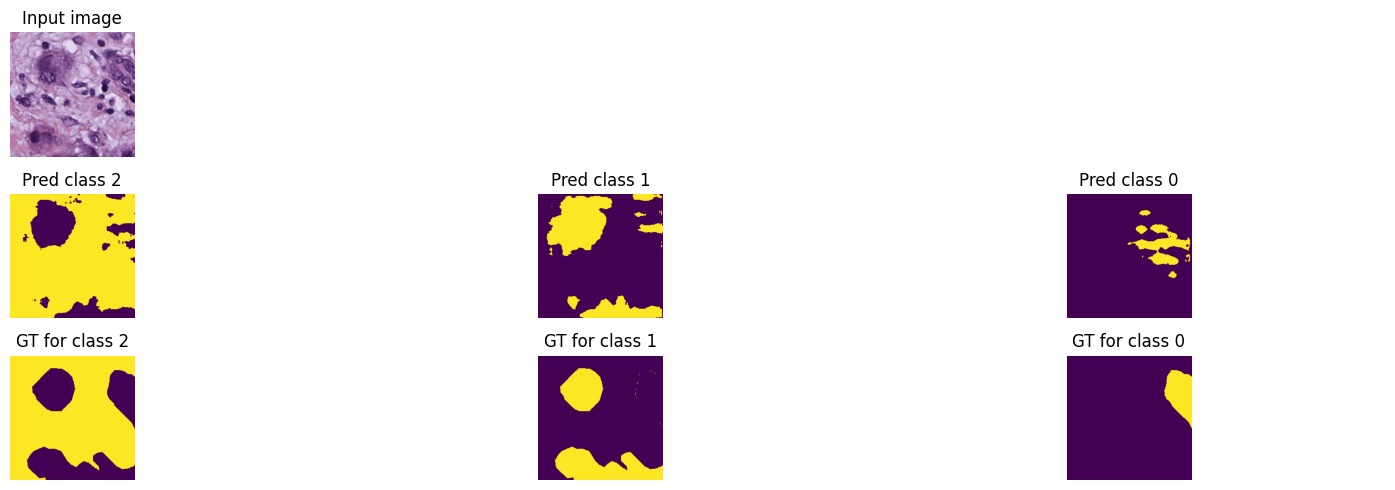

Train loss: 0.45732 | Time: 57m 43s | Val loss: 0.40487
Train_DICE_avg: 0.55409 | Train_Jaccard_avg: 0.49565 | Train_Sensitivity_avg: 0.66866 | Train_Specificity_avg: 0.81287 
Class 0 - Train_DICE: 0.53049 | Train_Jaccard: 0.49088 | Train_Sensitivity: 0.70852 | Train_Specificity: 0.86783 
Class 1 - Train_DICE: 0.66171 | Train_Jaccard: 0.60928 | Train_Sensitivity: 0.83125 | Train_Specificity: 0.75564 
Class 2 - Train_DICE: 0.47008 | Train_Jaccard: 0.38679 | Train_Sensitivity: 0.46619 | Train_Specificity: 0.81514 
Val_DICE_avg: 0.60551 | Val_Jaccard_avg: 0.54917 | Val_Sensitivity_avg: 0.70791 | Val_Specificity_avg: 0.80482 
Class 0 - Val_DICE: 0.61199 | Val_Jaccard: 0.57045 | Val_Sensitivity: 0.73500 | Val_Specificity: 0.89380 
Class 1 - Val_DICE: 0.72662 | Val_Jaccard: 0.68040 | Val_Sensitivity: 0.88549 | Val_Specificity: 0.72989 
Class 2 - Val_DICE: 0.47791 | Val_Jaccard: 0.39668 | Val_Sensitivity: 0.50324 | Val_Specificity: 0.79078 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.44379 | Time: 59m 58s | Val loss: 0.39612
Train_DICE_avg: 0.56367 | Train_Jaccard_avg: 0.50683 | Train_Sensitivity_avg: 0.69181 | Train_Specificity_avg: 0.81116 
Class 0 - Train_DICE: 0.55495 | Train_Jaccard: 0.51796 | Train_Sensitivity: 0.76448 | Train_Specificity: 0.86026 
Class 1 - Train_DICE: 0.66420 | Train_Jaccard: 0.61363 | Train_Sensitivity: 0.84459 | Train_Specificity: 0.75480 
Class 2 - Train_DICE: 0.47187 | Train_Jaccard: 0.38891 | Train_Sensitivity: 0.46635 | Train_Specificity: 0.81842 
Val_DICE_avg: 0.61391 | Val_Jaccard_avg: 0.55876 | Val_Sensitivity_avg: 0.72492 | Val_Specificity_avg: 0.80887 
Class 0 - Val_DICE: 0.63992 | Val_Jaccard: 0.59885 | Val_Sensitivity: 0.78437 | Val_Specificity: 0.88700 
Class 1 - Val_DICE: 0.72703 | Val_Jaccard: 0.68182 | Val_Sensitivity: 0.87743 | Val_Specificity: 0.74382 
Class 2 - Val_DICE: 0.47479 | Val_Jaccard: 0.39560 | Val_Sensitivity: 0.51298 | Val_Specificity: 0.79579 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.43634 | Time: 62m 12s | Val loss: 0.38709
Train_DICE_avg: 0.56931 | Train_Jaccard_avg: 0.51268 | Train_Sensitivity_avg: 0.70295 | Train_Specificity_avg: 0.80888 
Class 0 - Train_DICE: 0.56584 | Train_Jaccard: 0.53178 | Train_Sensitivity: 0.80659 | Train_Specificity: 0.85137 
Class 1 - Train_DICE: 0.67027 | Train_Jaccard: 0.61690 | Train_Sensitivity: 0.83404 | Train_Specificity: 0.75659 
Class 2 - Train_DICE: 0.47181 | Train_Jaccard: 0.38936 | Train_Sensitivity: 0.46822 | Train_Specificity: 0.81867 
Val_DICE_avg: 0.62107 | Val_Jaccard_avg: 0.56577 | Val_Sensitivity_avg: 0.73119 | Val_Specificity_avg: 0.81171 
Class 0 - Val_DICE: 0.64756 | Val_Jaccard: 0.60901 | Val_Sensitivity: 0.81934 | Val_Specificity: 0.89254 
Class 1 - Val_DICE: 0.72711 | Val_Jaccard: 0.67815 | Val_Sensitivity: 0.85765 | Val_Specificity: 0.74484 
Class 2 - Val_DICE: 0.48854 | Val_Jaccard: 0.41016 | Val_Sensitivity: 0.51657 | Val_Specificity: 0.79774 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.43199 | Time: 64m 28s | Val loss: 0.39449
Train_DICE_avg: 0.57296 | Train_Jaccard_avg: 0.51653 | Train_Sensitivity_avg: 0.71002 | Train_Specificity_avg: 0.80912 
Class 0 - Train_DICE: 0.57037 | Train_Jaccard: 0.53503 | Train_Sensitivity: 0.80474 | Train_Specificity: 0.85143 
Class 1 - Train_DICE: 0.67413 | Train_Jaccard: 0.62256 | Train_Sensitivity: 0.85319 | Train_Specificity: 0.75589 
Class 2 - Train_DICE: 0.47438 | Train_Jaccard: 0.39201 | Train_Sensitivity: 0.47213 | Train_Specificity: 0.82003 
Val_DICE_avg: 0.61446 | Val_Jaccard_avg: 0.56042 | Val_Sensitivity_avg: 0.73340 | Val_Specificity_avg: 0.80802 
Class 0 - Val_DICE: 0.63477 | Val_Jaccard: 0.59693 | Val_Sensitivity: 0.79624 | Val_Specificity: 0.88421 
Class 1 - Val_DICE: 0.72599 | Val_Jaccard: 0.68077 | Val_Sensitivity: 0.86977 | Val_Specificity: 0.74947 
Class 2 - Val_DICE: 0.48263 | Val_Jaccard: 0.40355 | Val_Sensitivity: 0.53420 | Val_Specificity: 0.79038 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.42769 | Time: 66m 42s | Val loss: 0.38327
Train_DICE_avg: 0.57655 | Train_Jaccard_avg: 0.52043 | Train_Sensitivity_avg: 0.71398 | Train_Specificity_avg: 0.80978 
Class 0 - Train_DICE: 0.57353 | Train_Jaccard: 0.53762 | Train_Sensitivity: 0.80406 | Train_Specificity: 0.85061 
Class 1 - Train_DICE: 0.67773 | Train_Jaccard: 0.62727 | Train_Sensitivity: 0.85400 | Train_Specificity: 0.75964 
Class 2 - Train_DICE: 0.47839 | Train_Jaccard: 0.39641 | Train_Sensitivity: 0.48390 | Train_Specificity: 0.81910 
Val_DICE_avg: 0.62517 | Val_Jaccard_avg: 0.57083 | Val_Sensitivity_avg: 0.74020 | Val_Specificity_avg: 0.81513 
Class 0 - Val_DICE: 0.64462 | Val_Jaccard: 0.60558 | Val_Sensitivity: 0.80460 | Val_Specificity: 0.88970 
Class 1 - Val_DICE: 0.72562 | Val_Jaccard: 0.67835 | Val_Sensitivity: 0.86446 | Val_Specificity: 0.75095 
Class 2 - Val_DICE: 0.50528 | Val_Jaccard: 0.42856 | Val_Sensitivity: 0.55154 | Val_Specificity: 0.80475 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


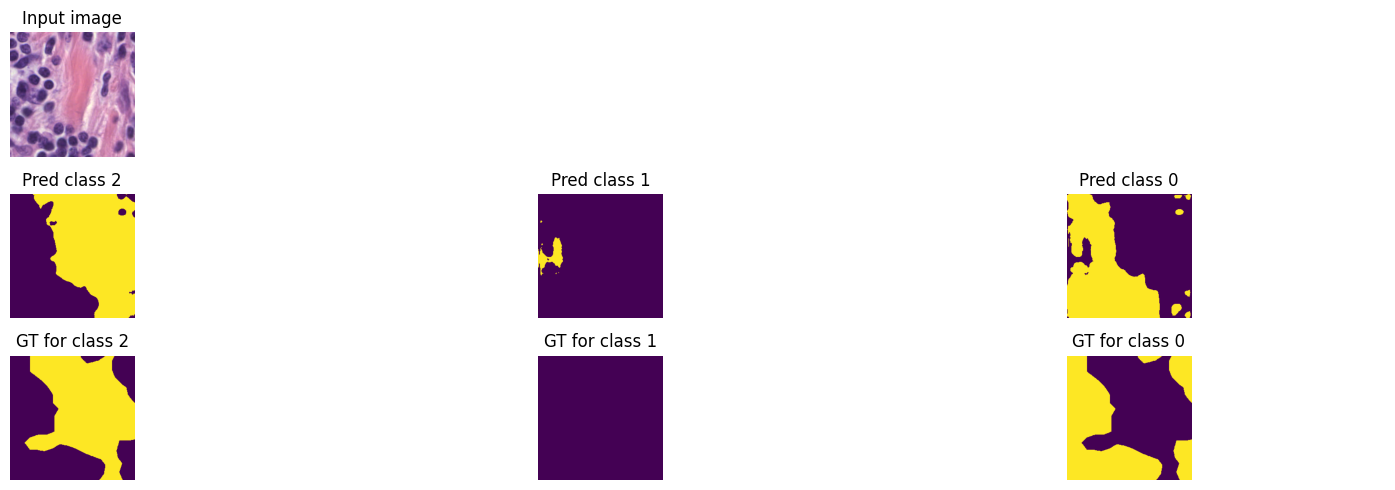

Train loss: 0.42191 | Time: 68m 58s | Val loss: 0.38144
Train_DICE_avg: 0.58227 | Train_Jaccard_avg: 0.52756 | Train_Sensitivity_avg: 0.73053 | Train_Specificity_avg: 0.81142 
Class 0 - Train_DICE: 0.58046 | Train_Jaccard: 0.54484 | Train_Sensitivity: 0.81739 | Train_Specificity: 0.85077 
Class 1 - Train_DICE: 0.68103 | Train_Jaccard: 0.63139 | Train_Sensitivity: 0.86053 | Train_Specificity: 0.76183 
Class 2 - Train_DICE: 0.48531 | Train_Jaccard: 0.40644 | Train_Sensitivity: 0.51368 | Train_Specificity: 0.82166 
Val_DICE_avg: 0.62730 | Val_Jaccard_avg: 0.57339 | Val_Sensitivity_avg: 0.75110 | Val_Specificity_avg: 0.80913 
Class 0 - Val_DICE: 0.64415 | Val_Jaccard: 0.60309 | Val_Sensitivity: 0.78596 | Val_Specificity: 0.87647 
Class 1 - Val_DICE: 0.72317 | Val_Jaccard: 0.67797 | Val_Sensitivity: 0.85849 | Val_Specificity: 0.76320 
Class 2 - Val_DICE: 0.51459 | Val_Jaccard: 0.43912 | Val_Sensitivity: 0.60885 | Val_Specificity: 0.78772 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.41512 | Time: 71m 12s | Val loss: 0.36649
Train_DICE_avg: 0.58729 | Train_Jaccard_avg: 0.53120 | Train_Sensitivity_avg: 0.72615 | Train_Specificity_avg: 0.81184 
Class 0 - Train_DICE: 0.58435 | Train_Jaccard: 0.54574 | Train_Sensitivity: 0.79585 | Train_Specificity: 0.85315 
Class 1 - Train_DICE: 0.68816 | Train_Jaccard: 0.63660 | Train_Sensitivity: 0.85483 | Train_Specificity: 0.76599 
Class 2 - Train_DICE: 0.48935 | Train_Jaccard: 0.41126 | Train_Sensitivity: 0.52777 | Train_Specificity: 0.81639 
Val_DICE_avg: 0.64015 | Val_Jaccard_avg: 0.58518 | Val_Sensitivity_avg: 0.74931 | Val_Specificity_avg: 0.80784 
Class 0 - Val_DICE: 0.66059 | Val_Jaccard: 0.61775 | Val_Sensitivity: 0.79343 | Val_Specificity: 0.86884 
Class 1 - Val_DICE: 0.73809 | Val_Jaccard: 0.69060 | Val_Sensitivity: 0.85768 | Val_Specificity: 0.75824 
Class 2 - Val_DICE: 0.52177 | Val_Jaccard: 0.44720 | Val_Sensitivity: 0.59683 | Val_Specificity: 0.79644 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.40973 | Time: 73m 27s | Val loss: 0.36917
Train_DICE_avg: 0.59372 | Train_Jaccard_avg: 0.53875 | Train_Sensitivity_avg: 0.74364 | Train_Specificity_avg: 0.81103 
Class 0 - Train_DICE: 0.58971 | Train_Jaccard: 0.55299 | Train_Sensitivity: 0.82076 | Train_Specificity: 0.84747 
Class 1 - Train_DICE: 0.69532 | Train_Jaccard: 0.64426 | Train_Sensitivity: 0.86166 | Train_Specificity: 0.76851 
Class 2 - Train_DICE: 0.49612 | Train_Jaccard: 0.41899 | Train_Sensitivity: 0.54850 | Train_Specificity: 0.81709 
Val_DICE_avg: 0.63784 | Val_Jaccard_avg: 0.58572 | Val_Sensitivity_avg: 0.77971 | Val_Specificity_avg: 0.80562 
Class 0 - Val_DICE: 0.64894 | Val_Jaccard: 0.60984 | Val_Sensitivity: 0.81776 | Val_Specificity: 0.85894 
Class 1 - Val_DICE: 0.74047 | Val_Jaccard: 0.69407 | Val_Sensitivity: 0.85666 | Val_Specificity: 0.77458 
Class 2 - Val_DICE: 0.52412 | Val_Jaccard: 0.45324 | Val_Sensitivity: 0.66472 | Val_Specificity: 0.78336 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.40335 | Time: 75m 41s | Val loss: 0.36797
Train_DICE_avg: 0.59893 | Train_Jaccard_avg: 0.54398 | Train_Sensitivity_avg: 0.74988 | Train_Specificity_avg: 0.81046 
Class 0 - Train_DICE: 0.59506 | Train_Jaccard: 0.55699 | Train_Sensitivity: 0.81735 | Train_Specificity: 0.84539 
Class 1 - Train_DICE: 0.69810 | Train_Jaccard: 0.64722 | Train_Sensitivity: 0.85739 | Train_Specificity: 0.77576 
Class 2 - Train_DICE: 0.50364 | Train_Jaccard: 0.42773 | Train_Sensitivity: 0.57490 | Train_Specificity: 0.81022 
Val_DICE_avg: 0.63816 | Val_Jaccard_avg: 0.58660 | Val_Sensitivity_avg: 0.78323 | Val_Specificity_avg: 0.79891 
Class 0 - Val_DICE: 0.65136 | Val_Jaccard: 0.61096 | Val_Sensitivity: 0.78531 | Val_Specificity: 0.86393 
Class 1 - Val_DICE: 0.73668 | Val_Jaccard: 0.68958 | Val_Sensitivity: 0.85389 | Val_Specificity: 0.75115 
Class 2 - Val_DICE: 0.52645 | Val_Jaccard: 0.45925 | Val_Sensitivity: 0.71050 | Val_Specificity: 0.78164 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.39746 | Time: 77m 56s | Val loss: 0.35970
Train_DICE_avg: 0.60425 | Train_Jaccard_avg: 0.54917 | Train_Sensitivity_avg: 0.75753 | Train_Specificity_avg: 0.81377 
Class 0 - Train_DICE: 0.59892 | Train_Jaccard: 0.55980 | Train_Sensitivity: 0.82054 | Train_Specificity: 0.84606 
Class 1 - Train_DICE: 0.70463 | Train_Jaccard: 0.65370 | Train_Sensitivity: 0.86575 | Train_Specificity: 0.78172 
Class 2 - Train_DICE: 0.50920 | Train_Jaccard: 0.43402 | Train_Sensitivity: 0.58630 | Train_Specificity: 0.81353 
Val_DICE_avg: 0.64514 | Val_Jaccard_avg: 0.59195 | Val_Sensitivity_avg: 0.77872 | Val_Specificity_avg: 0.79815 
Class 0 - Val_DICE: 0.65618 | Val_Jaccard: 0.61321 | Val_Sensitivity: 0.78286 | Val_Specificity: 0.86430 
Class 1 - Val_DICE: 0.74559 | Val_Jaccard: 0.69952 | Val_Sensitivity: 0.88508 | Val_Specificity: 0.73708 
Class 2 - Val_DICE: 0.53364 | Val_Jaccard: 0.46312 | Val_Sensitivity: 0.66821 | Val_Specificity: 0.79307 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


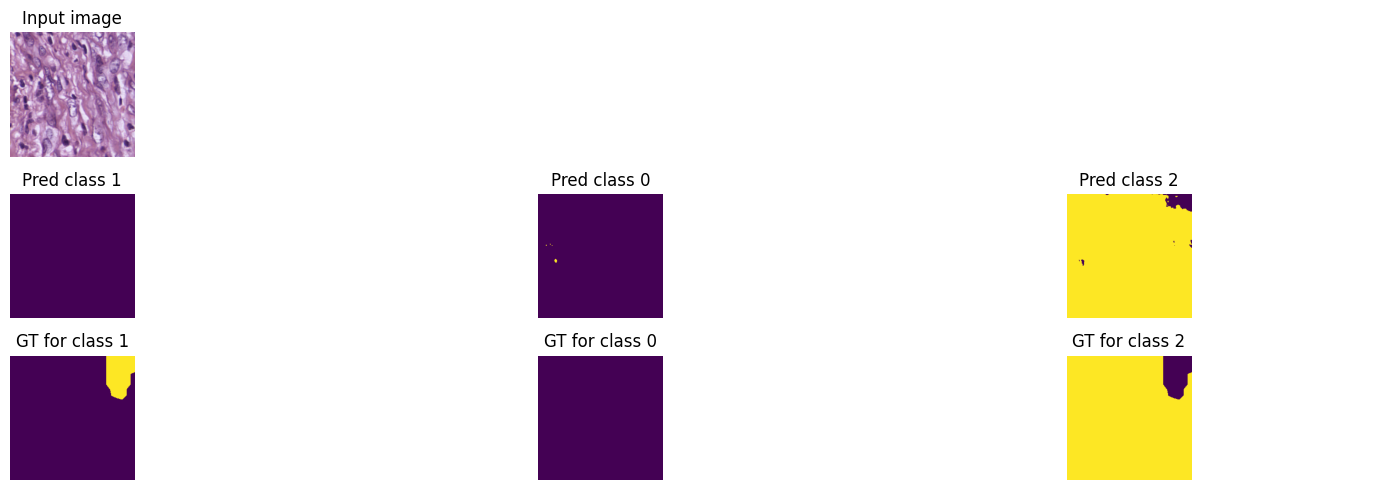

Train loss: 0.39413 | Time: 80m 11s | Val loss: 0.36491
Train_DICE_avg: 0.60786 | Train_Jaccard_avg: 0.55338 | Train_Sensitivity_avg: 0.76195 | Train_Specificity_avg: 0.81157 
Class 0 - Train_DICE: 0.60236 | Train_Jaccard: 0.56440 | Train_Sensitivity: 0.83041 | Train_Specificity: 0.84428 
Class 1 - Train_DICE: 0.70998 | Train_Jaccard: 0.65865 | Train_Sensitivity: 0.86154 | Train_Specificity: 0.77504 
Class 2 - Train_DICE: 0.51125 | Train_Jaccard: 0.43710 | Train_Sensitivity: 0.59392 | Train_Specificity: 0.81538 
Val_DICE_avg: 0.63986 | Val_Jaccard_avg: 0.58752 | Val_Sensitivity_avg: 0.78411 | Val_Specificity_avg: 0.79715 
Class 0 - Val_DICE: 0.65624 | Val_Jaccard: 0.61404 | Val_Sensitivity: 0.80062 | Val_Specificity: 0.85709 
Class 1 - Val_DICE: 0.73826 | Val_Jaccard: 0.69107 | Val_Sensitivity: 0.84408 | Val_Specificity: 0.75815 
Class 2 - Val_DICE: 0.52508 | Val_Jaccard: 0.45747 | Val_Sensitivity: 0.70764 | Val_Specificity: 0.77621 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.38999 | Time: 82m 26s | Val loss: 0.35760
Train_DICE_avg: 0.61164 | Train_Jaccard_avg: 0.55733 | Train_Sensitivity_avg: 0.76641 | Train_Specificity_avg: 0.81354 
Class 0 - Train_DICE: 0.60599 | Train_Jaccard: 0.56652 | Train_Sensitivity: 0.82335 | Train_Specificity: 0.84659 
Class 1 - Train_DICE: 0.71070 | Train_Jaccard: 0.66027 | Train_Sensitivity: 0.86340 | Train_Specificity: 0.77862 
Class 2 - Train_DICE: 0.51823 | Train_Jaccard: 0.44520 | Train_Sensitivity: 0.61248 | Train_Specificity: 0.81542 
Val_DICE_avg: 0.64492 | Val_Jaccard_avg: 0.59339 | Val_Sensitivity_avg: 0.80289 | Val_Specificity_avg: 0.79544 
Class 0 - Val_DICE: 0.66533 | Val_Jaccard: 0.62455 | Val_Sensitivity: 0.82709 | Val_Specificity: 0.85775 
Class 1 - Val_DICE: 0.74370 | Val_Jaccard: 0.69571 | Val_Sensitivity: 0.85347 | Val_Specificity: 0.74966 
Class 2 - Val_DICE: 0.52574 | Val_Jaccard: 0.45992 | Val_Sensitivity: 0.72811 | Val_Specificity: 0.77892 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.38639 | Time: 84m 40s | Val loss: 0.35578
Train_DICE_avg: 0.61472 | Train_Jaccard_avg: 0.55961 | Train_Sensitivity_avg: 0.76367 | Train_Specificity_avg: 0.81478 
Class 0 - Train_DICE: 0.60691 | Train_Jaccard: 0.56804 | Train_Sensitivity: 0.82839 | Train_Specificity: 0.84775 
Class 1 - Train_DICE: 0.71683 | Train_Jaccard: 0.66484 | Train_Sensitivity: 0.86257 | Train_Specificity: 0.78032 
Class 2 - Train_DICE: 0.52041 | Train_Jaccard: 0.44595 | Train_Sensitivity: 0.60004 | Train_Specificity: 0.81627 
Val_DICE_avg: 0.64786 | Val_Jaccard_avg: 0.59662 | Val_Sensitivity_avg: 0.80129 | Val_Specificity_avg: 0.79148 
Class 0 - Val_DICE: 0.66874 | Val_Jaccard: 0.62895 | Val_Sensitivity: 0.83567 | Val_Specificity: 0.85602 
Class 1 - Val_DICE: 0.74442 | Val_Jaccard: 0.69776 | Val_Sensitivity: 0.85718 | Val_Specificity: 0.73226 
Class 2 - Val_DICE: 0.53042 | Val_Jaccard: 0.46314 | Val_Sensitivity: 0.71103 | Val_Specificity: 0.78617 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.38360 | Time: 86m 55s | Val loss: 0.35762
Train_DICE_avg: 0.61762 | Train_Jaccard_avg: 0.56319 | Train_Sensitivity_avg: 0.77094 | Train_Specificity_avg: 0.81486 
Class 0 - Train_DICE: 0.60591 | Train_Jaccard: 0.56768 | Train_Sensitivity: 0.83492 | Train_Specificity: 0.84445 
Class 1 - Train_DICE: 0.72220 | Train_Jaccard: 0.67074 | Train_Sensitivity: 0.86663 | Train_Specificity: 0.78066 
Class 2 - Train_DICE: 0.52476 | Train_Jaccard: 0.45114 | Train_Sensitivity: 0.61127 | Train_Specificity: 0.81948 
Val_DICE_avg: 0.64695 | Val_Jaccard_avg: 0.59604 | Val_Sensitivity_avg: 0.80311 | Val_Specificity_avg: 0.79891 
Class 0 - Val_DICE: 0.66527 | Val_Jaccard: 0.62448 | Val_Sensitivity: 0.82864 | Val_Specificity: 0.85418 
Class 1 - Val_DICE: 0.74604 | Val_Jaccard: 0.69909 | Val_Sensitivity: 0.84540 | Val_Specificity: 0.75783 
Class 2 - Val_DICE: 0.52955 | Val_Jaccard: 0.46454 | Val_Sensitivity: 0.73529 | Val_Specificity: 0.78472 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Train loss: 0.37856 | Time: 89m 9s | Val loss: 0.35491
Train_DICE_avg: 0.62228 | Train_Jaccard_avg: 0.56741 | Train_Sensitivity_avg: 0.77032 | Train_Specificity_avg: 0.81522 
Class 0 - Train_DICE: 0.61643 | Train_Jaccard: 0.57638 | Train_Sensitivity: 0.82759 | Train_Specificity: 0.84682 
Class 1 - Train_DICE: 0.72389 | Train_Jaccard: 0.67289 | Train_Sensitivity: 0.86918 | Train_Specificity: 0.78347 
Class 2 - Train_DICE: 0.52652 | Train_Jaccard: 0.45295 | Train_Sensitivity: 0.61417 | Train_Specificity: 0.81537 
Val_DICE_avg: 0.64767 | Val_Jaccard_avg: 0.59625 | Val_Sensitivity_avg: 0.80518 | Val_Specificity_avg: 0.79674 
Class 0 - Val_DICE: 0.67100 | Val_Jaccard: 0.63084 | Val_Sensitivity: 0.83565 | Val_Specificity: 0.85845 
Class 1 - Val_DICE: 0.74741 | Val_Jaccard: 0.69996 | Val_Sensitivity: 0.84654 | Val_Specificity: 0.75819 
Class 2 - Val_DICE: 0.52461 | Val_Jaccard: 0.45796 | Val_Sensitivity: 0.73335 | Val_Specificity: 0.77357 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


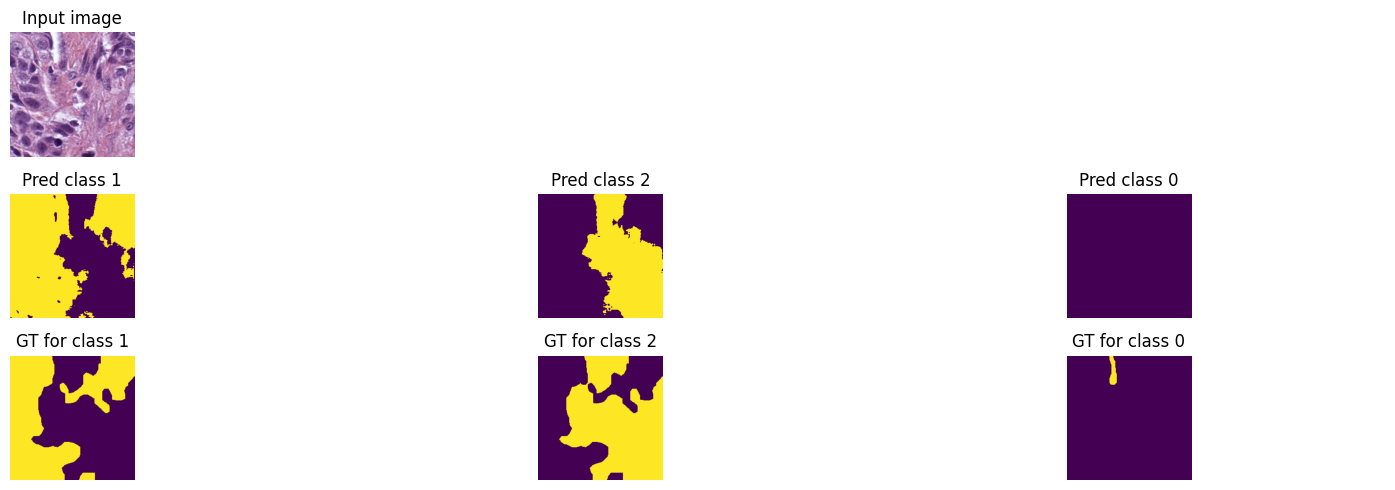

Train loss: 0.37544 | Time: 91m 25s | Val loss: 0.35246
Train_DICE_avg: 0.62510 | Train_Jaccard_avg: 0.57038 | Train_Sensitivity_avg: 0.77408 | Train_Specificity_avg: 0.81454 
Class 0 - Train_DICE: 0.61441 | Train_Jaccard: 0.57521 | Train_Sensitivity: 0.83655 | Train_Specificity: 0.84475 
Class 1 - Train_DICE: 0.72782 | Train_Jaccard: 0.67652 | Train_Sensitivity: 0.86539 | Train_Specificity: 0.78300 
Class 2 - Train_DICE: 0.53308 | Train_Jaccard: 0.45943 | Train_Sensitivity: 0.62029 | Train_Specificity: 0.81587 
Val_DICE_avg: 0.64794 | Val_Jaccard_avg: 0.59661 | Val_Sensitivity_avg: 0.80916 | Val_Specificity_avg: 0.79941 
Class 0 - Val_DICE: 0.67217 | Val_Jaccard: 0.63058 | Val_Sensitivity: 0.83419 | Val_Specificity: 0.85548 
Class 1 - Val_DICE: 0.74669 | Val_Jaccard: 0.69950 | Val_Sensitivity: 0.85123 | Val_Specificity: 0.76629 
Class 2 - Val_DICE: 0.52495 | Val_Jaccard: 0.45976 | Val_Sensitivity: 0.74205 | Val_Specificity: 0.77647 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.37326 | Time: 93m 40s | Val loss: 0.35055
Train_DICE_avg: 0.62619 | Train_Jaccard_avg: 0.57040 | Train_Sensitivity_avg: 0.76975 | Train_Specificity_avg: 0.81397 
Class 0 - Train_DICE: 0.61512 | Train_Jaccard: 0.57399 | Train_Sensitivity: 0.82243 | Train_Specificity: 0.84725 
Class 1 - Train_DICE: 0.72987 | Train_Jaccard: 0.67796 | Train_Sensitivity: 0.87252 | Train_Specificity: 0.77756 
Class 2 - Train_DICE: 0.53359 | Train_Jaccard: 0.45925 | Train_Sensitivity: 0.61430 | Train_Specificity: 0.81709 
Val_DICE_avg: 0.65288 | Val_Jaccard_avg: 0.60020 | Val_Sensitivity_avg: 0.79824 | Val_Specificity_avg: 0.79851 
Class 0 - Val_DICE: 0.67238 | Val_Jaccard: 0.62823 | Val_Sensitivity: 0.81047 | Val_Specificity: 0.85573 
Class 1 - Val_DICE: 0.74734 | Val_Jaccard: 0.69991 | Val_Sensitivity: 0.85652 | Val_Specificity: 0.75323 
Class 2 - Val_DICE: 0.53892 | Val_Jaccard: 0.47245 | Val_Sensitivity: 0.72773 | Val_Specificity: 0.78655 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.37275 | Time: 95m 55s | Val loss: 0.35238
Train_DICE_avg: 0.62754 | Train_Jaccard_avg: 0.57272 | Train_Sensitivity_avg: 0.77514 | Train_Specificity_avg: 0.81760 
Class 0 - Train_DICE: 0.61747 | Train_Jaccard: 0.57681 | Train_Sensitivity: 0.82693 | Train_Specificity: 0.84811 
Class 1 - Train_DICE: 0.72997 | Train_Jaccard: 0.67914 | Train_Sensitivity: 0.87522 | Train_Specificity: 0.78485 
Class 2 - Train_DICE: 0.53516 | Train_Jaccard: 0.46222 | Train_Sensitivity: 0.62326 | Train_Specificity: 0.81983 
Val_DICE_avg: 0.65126 | Val_Jaccard_avg: 0.60016 | Val_Sensitivity_avg: 0.81479 | Val_Specificity_avg: 0.79858 
Class 0 - Val_DICE: 0.67314 | Val_Jaccard: 0.63095 | Val_Sensitivity: 0.82132 | Val_Specificity: 0.85872 
Class 1 - Val_DICE: 0.75373 | Val_Jaccard: 0.70704 | Val_Sensitivity: 0.86164 | Val_Specificity: 0.76380 
Class 2 - Val_DICE: 0.52690 | Val_Jaccard: 0.46250 | Val_Sensitivity: 0.76140 | Val_Specificity: 0.77322 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.36788 | Time: 98m 10s | Val loss: 0.34623
Train_DICE_avg: 0.63191 | Train_Jaccard_avg: 0.57807 | Train_Sensitivity_avg: 0.78590 | Train_Specificity_avg: 0.81831 
Class 0 - Train_DICE: 0.62383 | Train_Jaccard: 0.58481 | Train_Sensitivity: 0.84703 | Train_Specificity: 0.84751 
Class 1 - Train_DICE: 0.73235 | Train_Jaccard: 0.68211 | Train_Sensitivity: 0.87301 | Train_Specificity: 0.78881 
Class 2 - Train_DICE: 0.53956 | Train_Jaccard: 0.46729 | Train_Sensitivity: 0.63767 | Train_Specificity: 0.81860 
Val_DICE_avg: 0.65649 | Val_Jaccard_avg: 0.60538 | Val_Sensitivity_avg: 0.81588 | Val_Specificity_avg: 0.79420 
Class 0 - Val_DICE: 0.67671 | Val_Jaccard: 0.63373 | Val_Sensitivity: 0.82305 | Val_Specificity: 0.85740 
Class 1 - Val_DICE: 0.75139 | Val_Jaccard: 0.70540 | Val_Sensitivity: 0.87761 | Val_Specificity: 0.73844 
Class 2 - Val_DICE: 0.54136 | Val_Jaccard: 0.47700 | Val_Sensitivity: 0.74697 | Val_Specificity: 0.78675 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.36725 | Time: 100m 25s | Val loss: 0.35198
Train_DICE_avg: 0.63260 | Train_Jaccard_avg: 0.57814 | Train_Sensitivity_avg: 0.78197 | Train_Specificity_avg: 0.81733 
Class 0 - Train_DICE: 0.62317 | Train_Jaccard: 0.58288 | Train_Sensitivity: 0.83422 | Train_Specificity: 0.84960 
Class 1 - Train_DICE: 0.73238 | Train_Jaccard: 0.68195 | Train_Sensitivity: 0.87747 | Train_Specificity: 0.78320 
Class 2 - Train_DICE: 0.54224 | Train_Jaccard: 0.46958 | Train_Sensitivity: 0.63424 | Train_Specificity: 0.81918 
Val_DICE_avg: 0.64937 | Val_Jaccard_avg: 0.59871 | Val_Sensitivity_avg: 0.81674 | Val_Specificity_avg: 0.79276 
Class 0 - Val_DICE: 0.66964 | Val_Jaccard: 0.62633 | Val_Sensitivity: 0.81285 | Val_Specificity: 0.85628 
Class 1 - Val_DICE: 0.75152 | Val_Jaccard: 0.70554 | Val_Sensitivity: 0.87214 | Val_Specificity: 0.74732 
Class 2 - Val_DICE: 0.52696 | Val_Jaccard: 0.46426 | Val_Sensitivity: 0.76524 | Val_Specificity: 0.77467 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


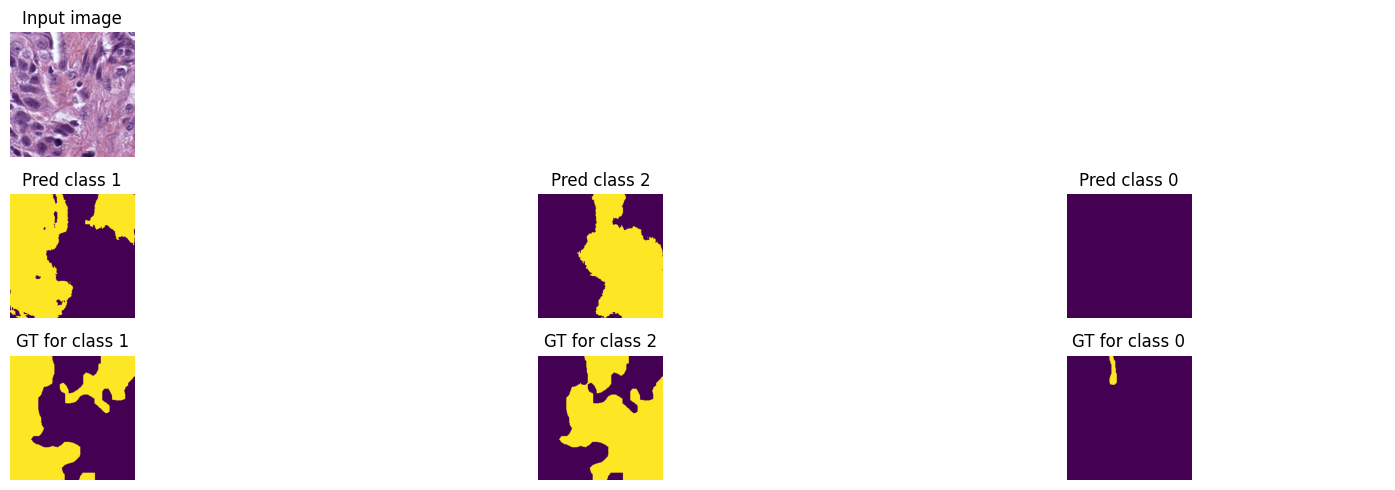

Train loss: 0.36415 | Time: 102m 42s | Val loss: 0.35102
Train_DICE_avg: 0.63522 | Train_Jaccard_avg: 0.58030 | Train_Sensitivity_avg: 0.78380 | Train_Specificity_avg: 0.81848 
Class 0 - Train_DICE: 0.62734 | Train_Jaccard: 0.58489 | Train_Sensitivity: 0.82618 | Train_Specificity: 0.84984 
Class 1 - Train_DICE: 0.73494 | Train_Jaccard: 0.68461 | Train_Sensitivity: 0.87956 | Train_Specificity: 0.78513 
Class 2 - Train_DICE: 0.54337 | Train_Jaccard: 0.47140 | Train_Sensitivity: 0.64566 | Train_Specificity: 0.82047 
Val_DICE_avg: 0.65052 | Val_Jaccard_avg: 0.59783 | Val_Sensitivity_avg: 0.80183 | Val_Specificity_avg: 0.79512 
Class 0 - Val_DICE: 0.66516 | Val_Jaccard: 0.62026 | Val_Sensitivity: 0.79230 | Val_Specificity: 0.85774 
Class 1 - Val_DICE: 0.75554 | Val_Jaccard: 0.70826 | Val_Sensitivity: 0.86820 | Val_Specificity: 0.75127 
Class 2 - Val_DICE: 0.53087 | Val_Jaccard: 0.46497 | Val_Sensitivity: 0.74499 | Val_Specificity: 0.77634 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.36035 | Time: 104m 58s | Val loss: 0.34594
Train_DICE_avg: 0.63918 | Train_Jaccard_avg: 0.58437 | Train_Sensitivity_avg: 0.78483 | Train_Specificity_avg: 0.81959 
Class 0 - Train_DICE: 0.63130 | Train_Jaccard: 0.58898 | Train_Sensitivity: 0.82943 | Train_Specificity: 0.85153 
Class 1 - Train_DICE: 0.73845 | Train_Jaccard: 0.68878 | Train_Sensitivity: 0.88470 | Train_Specificity: 0.78490 
Class 2 - Train_DICE: 0.54779 | Train_Jaccard: 0.47536 | Train_Sensitivity: 0.64035 | Train_Specificity: 0.82233 
Val_DICE_avg: 0.65617 | Val_Jaccard_avg: 0.60371 | Val_Sensitivity_avg: 0.80888 | Val_Specificity_avg: 0.79604 
Class 0 - Val_DICE: 0.67133 | Val_Jaccard: 0.62620 | Val_Sensitivity: 0.80538 | Val_Specificity: 0.85652 
Class 1 - Val_DICE: 0.75659 | Val_Jaccard: 0.71009 | Val_Sensitivity: 0.87422 | Val_Specificity: 0.75095 
Class 2 - Val_DICE: 0.54060 | Val_Jaccard: 0.47484 | Val_Sensitivity: 0.74704 | Val_Specificity: 0.78065 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.35998 | Time: 107m 13s | Val loss: 0.34909
Train_DICE_avg: 0.63986 | Train_Jaccard_avg: 0.58475 | Train_Sensitivity_avg: 0.78207 | Train_Specificity_avg: 0.82007 
Class 0 - Train_DICE: 0.63256 | Train_Jaccard: 0.59077 | Train_Sensitivity: 0.83715 | Train_Specificity: 0.84701 
Class 1 - Train_DICE: 0.73901 | Train_Jaccard: 0.68866 | Train_Sensitivity: 0.87669 | Train_Specificity: 0.79026 
Class 2 - Train_DICE: 0.54803 | Train_Jaccard: 0.47481 | Train_Sensitivity: 0.63237 | Train_Specificity: 0.82293 
Val_DICE_avg: 0.65289 | Val_Jaccard_avg: 0.60039 | Val_Sensitivity_avg: 0.80125 | Val_Specificity_avg: 0.79493 
Class 0 - Val_DICE: 0.66705 | Val_Jaccard: 0.62225 | Val_Sensitivity: 0.80132 | Val_Specificity: 0.85591 
Class 1 - Val_DICE: 0.74744 | Val_Jaccard: 0.70165 | Val_Sensitivity: 0.87726 | Val_Specificity: 0.74245 
Class 2 - Val_DICE: 0.54418 | Val_Jaccard: 0.47726 | Val_Sensitivity: 0.72517 | Val_Specificity: 0.78642 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.35971 | Time: 109m 28s | Val loss: 0.34660
Train_DICE_avg: 0.64004 | Train_Jaccard_avg: 0.58489 | Train_Sensitivity_avg: 0.78365 | Train_Specificity_avg: 0.82010 
Class 0 - Train_DICE: 0.63053 | Train_Jaccard: 0.58978 | Train_Sensitivity: 0.84157 | Train_Specificity: 0.84915 
Class 1 - Train_DICE: 0.74124 | Train_Jaccard: 0.69029 | Train_Sensitivity: 0.87623 | Train_Specificity: 0.78840 
Class 2 - Train_DICE: 0.54836 | Train_Jaccard: 0.47460 | Train_Sensitivity: 0.63314 | Train_Specificity: 0.82275 
Val_DICE_avg: 0.65696 | Val_Jaccard_avg: 0.60375 | Val_Sensitivity_avg: 0.79781 | Val_Specificity_avg: 0.79452 
Class 0 - Val_DICE: 0.66768 | Val_Jaccard: 0.62354 | Val_Sensitivity: 0.80623 | Val_Specificity: 0.85535 
Class 1 - Val_DICE: 0.75603 | Val_Jaccard: 0.70873 | Val_Sensitivity: 0.87778 | Val_Specificity: 0.73870 
Class 2 - Val_DICE: 0.54718 | Val_Jaccard: 0.47897 | Val_Sensitivity: 0.70941 | Val_Specificity: 0.78951 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.35982 | Time: 111m 42s | Val loss: 0.34701
Train_DICE_avg: 0.64055 | Train_Jaccard_avg: 0.58604 | Train_Sensitivity_avg: 0.78898 | Train_Specificity_avg: 0.82006 
Class 0 - Train_DICE: 0.63262 | Train_Jaccard: 0.59226 | Train_Sensitivity: 0.84449 | Train_Specificity: 0.84985 
Class 1 - Train_DICE: 0.73873 | Train_Jaccard: 0.68871 | Train_Sensitivity: 0.87982 | Train_Specificity: 0.78741 
Class 2 - Train_DICE: 0.55029 | Train_Jaccard: 0.47713 | Train_Sensitivity: 0.64262 | Train_Specificity: 0.82292 
Val_DICE_avg: 0.65524 | Val_Jaccard_avg: 0.60377 | Val_Sensitivity_avg: 0.81273 | Val_Specificity_avg: 0.79699 
Class 0 - Val_DICE: 0.67308 | Val_Jaccard: 0.62930 | Val_Sensitivity: 0.80970 | Val_Specificity: 0.85931 
Class 1 - Val_DICE: 0.75194 | Val_Jaccard: 0.70547 | Val_Sensitivity: 0.86418 | Val_Specificity: 0.75225 
Class 2 - Val_DICE: 0.54072 | Val_Jaccard: 0.47653 | Val_Sensitivity: 0.76432 | Val_Specificity: 0.77941 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


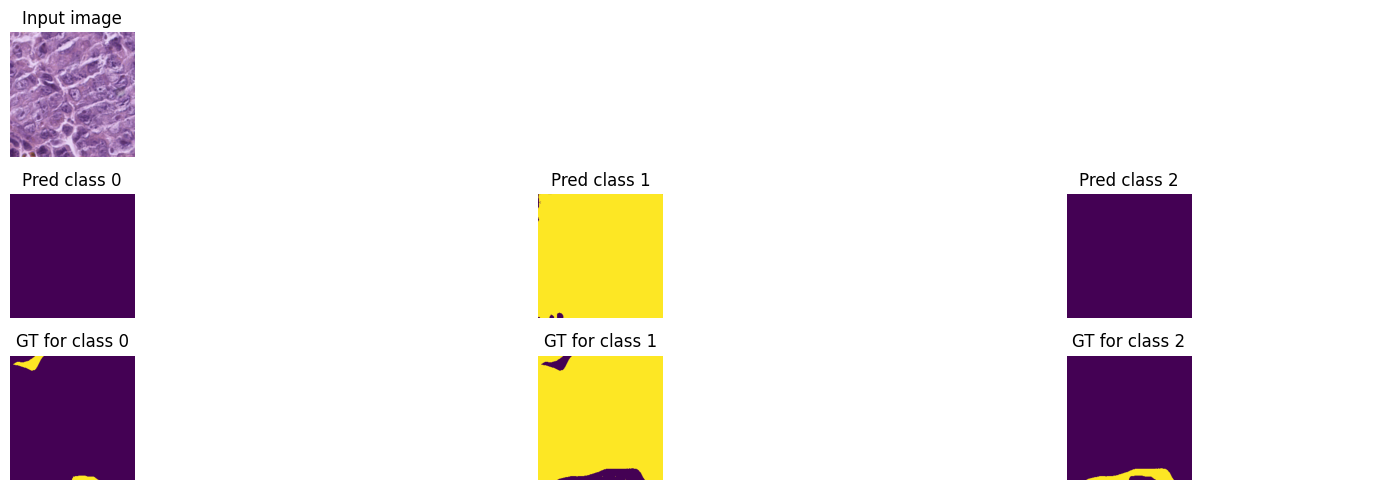

Train loss: 0.35732 | Time: 113m 58s | Val loss: 0.34366
Train_DICE_avg: 0.64227 | Train_Jaccard_avg: 0.58747 | Train_Sensitivity_avg: 0.78797 | Train_Specificity_avg: 0.82137 
Class 0 - Train_DICE: 0.63702 | Train_Jaccard: 0.59530 | Train_Sensitivity: 0.83987 | Train_Specificity: 0.85181 
Class 1 - Train_DICE: 0.73960 | Train_Jaccard: 0.68937 | Train_Sensitivity: 0.87804 | Train_Specificity: 0.79146 
Class 2 - Train_DICE: 0.55017 | Train_Jaccard: 0.47775 | Train_Sensitivity: 0.64600 | Train_Specificity: 0.82083 
Val_DICE_avg: 0.65923 | Val_Jaccard_avg: 0.60642 | Val_Sensitivity_avg: 0.80654 | Val_Specificity_avg: 0.80103 
Class 0 - Val_DICE: 0.67364 | Val_Jaccard: 0.62762 | Val_Sensitivity: 0.79496 | Val_Specificity: 0.86061 
Class 1 - Val_DICE: 0.75746 | Val_Jaccard: 0.71110 | Val_Sensitivity: 0.88271 | Val_Specificity: 0.75604 
Class 2 - Val_DICE: 0.54658 | Val_Jaccard: 0.48054 | Val_Sensitivity: 0.74195 | Val_Specificity: 0.78643 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.35422 | Time: 116m 13s | Val loss: 0.34510
Train_DICE_avg: 0.64540 | Train_Jaccard_avg: 0.59073 | Train_Sensitivity_avg: 0.79089 | Train_Specificity_avg: 0.82098 
Class 0 - Train_DICE: 0.63798 | Train_Jaccard: 0.59659 | Train_Sensitivity: 0.85091 | Train_Specificity: 0.84842 
Class 1 - Train_DICE: 0.74581 | Train_Jaccard: 0.69529 | Train_Sensitivity: 0.87686 | Train_Specificity: 0.78893 
Class 2 - Train_DICE: 0.55242 | Train_Jaccard: 0.48029 | Train_Sensitivity: 0.64492 | Train_Specificity: 0.82559 
Val_DICE_avg: 0.65617 | Val_Jaccard_avg: 0.60388 | Val_Sensitivity_avg: 0.80733 | Val_Specificity_avg: 0.79940 
Class 0 - Val_DICE: 0.66838 | Val_Jaccard: 0.62319 | Val_Sensitivity: 0.78987 | Val_Specificity: 0.86102 
Class 1 - Val_DICE: 0.75567 | Val_Jaccard: 0.70879 | Val_Sensitivity: 0.87884 | Val_Specificity: 0.75435 
Class 2 - Val_DICE: 0.54447 | Val_Jaccard: 0.47966 | Val_Sensitivity: 0.75330 | Val_Specificity: 0.78283 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.35336 | Time: 118m 27s | Val loss: 0.34641
Train_DICE_avg: 0.64535 | Train_Jaccard_avg: 0.59067 | Train_Sensitivity_avg: 0.79204 | Train_Specificity_avg: 0.82044 
Class 0 - Train_DICE: 0.63949 | Train_Jaccard: 0.59806 | Train_Sensitivity: 0.84553 | Train_Specificity: 0.84994 
Class 1 - Train_DICE: 0.74378 | Train_Jaccard: 0.69348 | Train_Sensitivity: 0.88197 | Train_Specificity: 0.78613 
Class 2 - Train_DICE: 0.55278 | Train_Jaccard: 0.48045 | Train_Sensitivity: 0.64861 | Train_Specificity: 0.82526 
Val_DICE_avg: 0.65697 | Val_Jaccard_avg: 0.60505 | Val_Sensitivity_avg: 0.80989 | Val_Specificity_avg: 0.79997 
Class 0 - Val_DICE: 0.67460 | Val_Jaccard: 0.62885 | Val_Sensitivity: 0.79799 | Val_Specificity: 0.85763 
Class 1 - Val_DICE: 0.75345 | Val_Jaccard: 0.70696 | Val_Sensitivity: 0.87089 | Val_Specificity: 0.75910 
Class 2 - Val_DICE: 0.54285 | Val_Jaccard: 0.47935 | Val_Sensitivity: 0.76078 | Val_Specificity: 0.78319 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.35256 | Time: 120m 43s | Val loss: 0.34404
Train_DICE_avg: 0.64615 | Train_Jaccard_avg: 0.59081 | Train_Sensitivity_avg: 0.78960 | Train_Specificity_avg: 0.82079 
Class 0 - Train_DICE: 0.63845 | Train_Jaccard: 0.59631 | Train_Sensitivity: 0.83983 | Train_Specificity: 0.85006 
Class 1 - Train_DICE: 0.74578 | Train_Jaccard: 0.69493 | Train_Sensitivity: 0.87734 | Train_Specificity: 0.78995 
Class 2 - Train_DICE: 0.55422 | Train_Jaccard: 0.48118 | Train_Sensitivity: 0.65162 | Train_Specificity: 0.82237 
Val_DICE_avg: 0.65967 | Val_Jaccard_avg: 0.60719 | Val_Sensitivity_avg: 0.80925 | Val_Specificity_avg: 0.80285 
Class 0 - Val_DICE: 0.67488 | Val_Jaccard: 0.62939 | Val_Sensitivity: 0.80457 | Val_Specificity: 0.85756 
Class 1 - Val_DICE: 0.75748 | Val_Jaccard: 0.71049 | Val_Sensitivity: 0.87238 | Val_Specificity: 0.76124 
Class 2 - Val_DICE: 0.54665 | Val_Jaccard: 0.48169 | Val_Sensitivity: 0.75080 | Val_Specificity: 0.78976 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.35173 | Time: 122m 58s | Val loss: 0.34466
Train_DICE_avg: 0.64698 | Train_Jaccard_avg: 0.59157 | Train_Sensitivity_avg: 0.78709 | Train_Specificity_avg: 0.82207 
Class 0 - Train_DICE: 0.63953 | Train_Jaccard: 0.59769 | Train_Sensitivity: 0.84179 | Train_Specificity: 0.85099 
Class 1 - Train_DICE: 0.74439 | Train_Jaccard: 0.69351 | Train_Sensitivity: 0.87797 | Train_Specificity: 0.78806 
Class 2 - Train_DICE: 0.55703 | Train_Jaccard: 0.48350 | Train_Sensitivity: 0.64153 | Train_Specificity: 0.82714 
Val_DICE_avg: 0.65901 | Val_Jaccard_avg: 0.60575 | Val_Sensitivity_avg: 0.80373 | Val_Specificity_avg: 0.79866 
Class 0 - Val_DICE: 0.67463 | Val_Jaccard: 0.62876 | Val_Sensitivity: 0.79737 | Val_Specificity: 0.85864 
Class 1 - Val_DICE: 0.75450 | Val_Jaccard: 0.70786 | Val_Sensitivity: 0.88514 | Val_Specificity: 0.74579 
Class 2 - Val_DICE: 0.54790 | Val_Jaccard: 0.48062 | Val_Sensitivity: 0.72868 | Val_Specificity: 0.79156 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


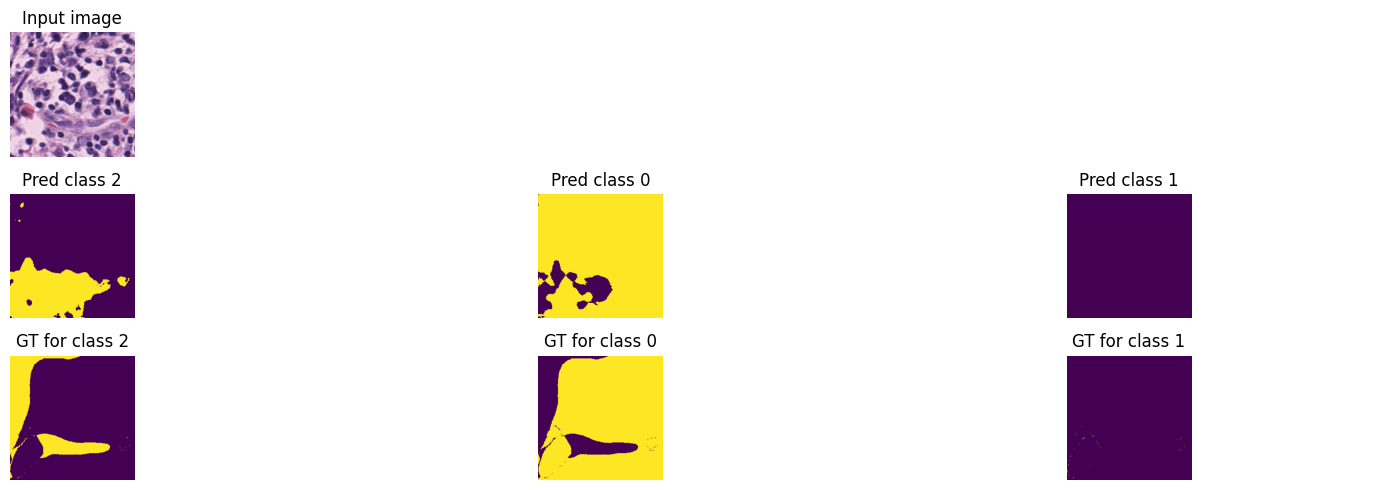

Train loss: 0.34979 | Time: 125m 13s | Val loss: 0.34514
Train_DICE_avg: 0.64936 | Train_Jaccard_avg: 0.59400 | Train_Sensitivity_avg: 0.78932 | Train_Specificity_avg: 0.82121 
Class 0 - Train_DICE: 0.64217 | Train_Jaccard: 0.59995 | Train_Sensitivity: 0.84426 | Train_Specificity: 0.85081 
Class 1 - Train_DICE: 0.74849 | Train_Jaccard: 0.69802 | Train_Sensitivity: 0.87856 | Train_Specificity: 0.78877 
Class 2 - Train_DICE: 0.55743 | Train_Jaccard: 0.48404 | Train_Sensitivity: 0.64513 | Train_Specificity: 0.82407 
Val_DICE_avg: 0.65845 | Val_Jaccard_avg: 0.60615 | Val_Sensitivity_avg: 0.81062 | Val_Specificity_avg: 0.79996 
Class 0 - Val_DICE: 0.67596 | Val_Jaccard: 0.63096 | Val_Sensitivity: 0.80503 | Val_Specificity: 0.85856 
Class 1 - Val_DICE: 0.75766 | Val_Jaccard: 0.71066 | Val_Sensitivity: 0.87291 | Val_Specificity: 0.75889 
Class 2 - Val_DICE: 0.54172 | Val_Jaccard: 0.47684 | Val_Sensitivity: 0.75391 | Val_Specificity: 0.78242 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.34968 | Time: 127m 29s | Val loss: 0.34491
Train_DICE_avg: 0.64937 | Train_Jaccard_avg: 0.59406 | Train_Sensitivity_avg: 0.79171 | Train_Specificity_avg: 0.82160 
Class 0 - Train_DICE: 0.64126 | Train_Jaccard: 0.59885 | Train_Sensitivity: 0.84164 | Train_Specificity: 0.85153 
Class 1 - Train_DICE: 0.74766 | Train_Jaccard: 0.69720 | Train_Sensitivity: 0.88228 | Train_Specificity: 0.79051 
Class 2 - Train_DICE: 0.55920 | Train_Jaccard: 0.48612 | Train_Sensitivity: 0.65121 | Train_Specificity: 0.82277 
Val_DICE_avg: 0.65800 | Val_Jaccard_avg: 0.60680 | Val_Sensitivity_avg: 0.81764 | Val_Specificity_avg: 0.80079 
Class 0 - Val_DICE: 0.67534 | Val_Jaccard: 0.63059 | Val_Sensitivity: 0.80929 | Val_Specificity: 0.85719 
Class 1 - Val_DICE: 0.75745 | Val_Jaccard: 0.71127 | Val_Sensitivity: 0.87933 | Val_Specificity: 0.75932 
Class 2 - Val_DICE: 0.54122 | Val_Jaccard: 0.47853 | Val_Sensitivity: 0.76431 | Val_Specificity: 0.78585 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


Train loss: 0.34980 | Time: 129m 44s | Val loss: 0.34219
Train_DICE_avg: 0.64858 | Train_Jaccard_avg: 0.59406 | Train_Sensitivity_avg: 0.79414 | Train_Specificity_avg: 0.82098 
Class 0 - Train_DICE: 0.64068 | Train_Jaccard: 0.59932 | Train_Sensitivity: 0.84479 | Train_Specificity: 0.85102 
Class 1 - Train_DICE: 0.74584 | Train_Jaccard: 0.69588 | Train_Sensitivity: 0.88536 | Train_Specificity: 0.78808 
Class 2 - Train_DICE: 0.55921 | Train_Jaccard: 0.48699 | Train_Sensitivity: 0.65227 | Train_Specificity: 0.82384 
Val_DICE_avg: 0.65876 | Val_Jaccard_avg: 0.60619 | Val_Sensitivity_avg: 0.80938 | Val_Specificity_avg: 0.79684 
Class 0 - Val_DICE: 0.67514 | Val_Jaccard: 0.62996 | Val_Sensitivity: 0.80219 | Val_Specificity: 0.85736 
Class 1 - Val_DICE: 0.75816 | Val_Jaccard: 0.71100 | Val_Sensitivity: 0.87885 | Val_Specificity: 0.74429 
Class 2 - Val_DICE: 0.54297 | Val_Jaccard: 0.47761 | Val_Sensitivity: 0.74709 | Val_Specificity: 0.78885 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.34901 | Time: 131m 59s | Val loss: 0.34010
Train_DICE_avg: 0.65027 | Train_Jaccard_avg: 0.59477 | Train_Sensitivity_avg: 0.79147 | Train_Specificity_avg: 0.82032 
Class 0 - Train_DICE: 0.64256 | Train_Jaccard: 0.59970 | Train_Sensitivity: 0.84167 | Train_Specificity: 0.85145 
Class 1 - Train_DICE: 0.74728 | Train_Jaccard: 0.69689 | Train_Sensitivity: 0.88593 | Train_Specificity: 0.78424 
Class 2 - Train_DICE: 0.56098 | Train_Jaccard: 0.48771 | Train_Sensitivity: 0.64682 | Train_Specificity: 0.82528 
Val_DICE_avg: 0.66175 | Val_Jaccard_avg: 0.60951 | Val_Sensitivity_avg: 0.81296 | Val_Specificity_avg: 0.80116 
Class 0 - Val_DICE: 0.68010 | Val_Jaccard: 0.63509 | Val_Sensitivity: 0.81640 | Val_Specificity: 0.85555 
Class 1 - Val_DICE: 0.76177 | Val_Jaccard: 0.71506 | Val_Sensitivity: 0.87957 | Val_Specificity: 0.75758 
Class 2 - Val_DICE: 0.54338 | Val_Jaccard: 0.47839 | Val_Sensitivity: 0.74290 | Val_Specificity: 0.79035 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.34742 | Time: 134m 15s | Val loss: 0.33923
Train_DICE_avg: 0.65110 | Train_Jaccard_avg: 0.59555 | Train_Sensitivity_avg: 0.78955 | Train_Specificity_avg: 0.82115 
Class 0 - Train_DICE: 0.64279 | Train_Jaccard: 0.60015 | Train_Sensitivity: 0.84011 | Train_Specificity: 0.85003 
Class 1 - Train_DICE: 0.74874 | Train_Jaccard: 0.69819 | Train_Sensitivity: 0.88280 | Train_Specificity: 0.78788 
Class 2 - Train_DICE: 0.56177 | Train_Jaccard: 0.48832 | Train_Sensitivity: 0.64572 | Train_Specificity: 0.82554 
Val_DICE_avg: 0.66212 | Val_Jaccard_avg: 0.60937 | Val_Sensitivity_avg: 0.80906 | Val_Specificity_avg: 0.80215 
Class 0 - Val_DICE: 0.67805 | Val_Jaccard: 0.63271 | Val_Sensitivity: 0.81267 | Val_Specificity: 0.85473 
Class 1 - Val_DICE: 0.75852 | Val_Jaccard: 0.71102 | Val_Sensitivity: 0.87718 | Val_Specificity: 0.75775 
Class 2 - Val_DICE: 0.54977 | Val_Jaccard: 0.48438 | Val_Sensitivity: 0.73734 | Val_Specificity: 0.79397 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


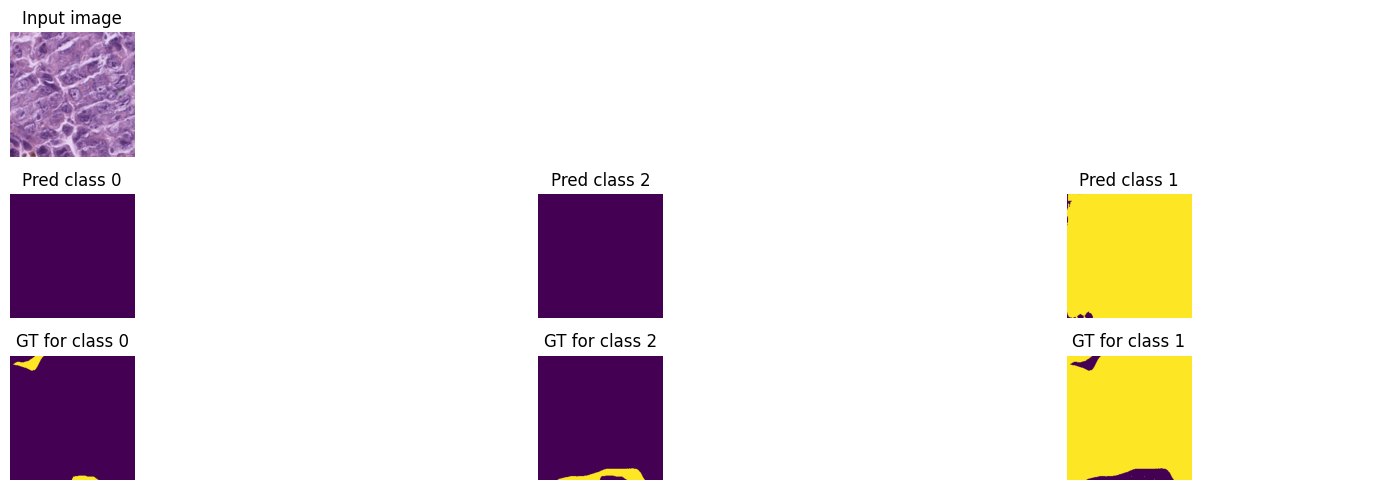

Train loss: 0.34750 | Time: 136m 30s | Val loss: 0.34262
Train_DICE_avg: 0.65158 | Train_Jaccard_avg: 0.59630 | Train_Sensitivity_avg: 0.78972 | Train_Specificity_avg: 0.82245 
Class 0 - Train_DICE: 0.64319 | Train_Jaccard: 0.60064 | Train_Sensitivity: 0.84389 | Train_Specificity: 0.85076 
Class 1 - Train_DICE: 0.75033 | Train_Jaccard: 0.70001 | Train_Sensitivity: 0.88022 | Train_Specificity: 0.78922 
Class 2 - Train_DICE: 0.56122 | Train_Jaccard: 0.48824 | Train_Sensitivity: 0.64505 | Train_Specificity: 0.82739 
Val_DICE_avg: 0.65864 | Val_Jaccard_avg: 0.60595 | Val_Sensitivity_avg: 0.80647 | Val_Specificity_avg: 0.79878 
Class 0 - Val_DICE: 0.66926 | Val_Jaccard: 0.62285 | Val_Sensitivity: 0.78925 | Val_Specificity: 0.85871 
Class 1 - Val_DICE: 0.75984 | Val_Jaccard: 0.71335 | Val_Sensitivity: 0.89176 | Val_Specificity: 0.74641 
Class 2 - Val_DICE: 0.54681 | Val_Jaccard: 0.48165 | Val_Sensitivity: 0.73841 | Val_Specificity: 0.79120 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [27]:
model = DeepLabV3Plus(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [28]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Global Performance Metrics:
Loss mean: 0.34033, std: 0.06067
Dice Coefficient mean: 0.66400, std: 0.23898
Jaccard Index mean: 0.61110, std: 0.25520
Sensitivity mean: 0.74257, std: 0.21369
Specificity mean: 0.82152, std: 0.14019

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.67199, std: 0.39769
Jaccard mean: 0.62618, std: 0.40481
Sensitivity mean: 0.76372, std: 0.36676
Specificity mean: 0.84067, std: 0.27740

Class 1:
Dice mean: 0.75803, std: 0.34887
Jaccard mean: 0.71112, std: 0.35946
Sensitivity mean: 0.80711, std: 0.33714
Specificity mean: 0.81010, std: 0.33064

Class 2:
Dice mean: 0.56198, std: 0.39285
Jaccard mean: 0.49599, std: 0.38762
Sensitivity mean: 0.65688, std: 0.38622
Specificity mean: 0.81379, std: 0.26420
